In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/auth_parsed.csv', parse_dates=['timestamp'])
display(df.head())
df['result'].value_counts()


FileNotFoundError: [Errno 2] No such file or directory: 'data/auth_parsed.csv'

In [ ]:
df.set_index('timestamp', inplace=True)
df.resample('1H')['result'].count().plot(title='Events per hour')
plt.xlabel('Time')
plt.ylabel('Number of events')


In [ ]:
feat = pd.read_csv('data/auth_features.csv', parse_dates=['timestamp'])
display(feat.head())
feat[['cnt_last_1m','cnt_last_5m','cnt_last_15m']].describe()


In [ ]:
plt.figure()
feat['cnt_last_5m'].hist(bins=50)
plt.title('Distribution of events per IP in last 5 minutes')
plt.xlabel('Count')
plt.ylabel('Frequency')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# تبسيط: سنعتبر الحدث مشبوه إذا كان event_result == 'failed'
feat = feat.dropna(subset=['event_result'])
feat['label'] = feat['event_result'].apply(lambda x: 1 if x=='failed' else 0)

X = feat[['cnt_last_1m','cnt_last_5m','cnt_last_15m','fail_rate']].values
y = feat['label'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


In [ ]:
import joblib
joblib.dump(model, 'models/logreg_baseline.joblib')
print("Saved model to models/logreg_baseline.joblib")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# تحميل البيانات
df = pd.read_csv('../data/auth_features.csv')

# عرض أول 5 صفوف للتأكد
display(df.head())

# نفترض أن لدينا عمود target = 1 (مشبوه) أو 0 (عادي)
# إذا لم يكن موجودًا، سننشئ عمودًا بسيطًا مؤقتًا
if 'target' not in df.columns:
    # قاعدة مؤقتة: إذا فشل الدخول أكثر من 3 مرات في الدقيقة = مشبوه
    df['target'] = (df['fail_count'] > 3).astype(int)

# اختيار الميزات للتدريب
features = ['fail_count', 'success_count', 'unique_users', 'hour']
X = df[features]
y = df['target']

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# إنشاء النموذج
model = LogisticRegression()

# تدريب النموذج
model.fit(X_train, y_train)

# التقييم
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# حفظ النموذج
joblib.dump(model, '../models/logreg_baseline.joblib')
print("✅ تم حفظ النموذج في ../models/logreg_baseline.joblib")


In [ ]:
df = pd.read_csv('data/auth_parsed.csv', parse_dates=['timestamp'])
print(df.isnull().mean())            # نسبة القيم الفارغة لكل عمود
print(df['result'].value_counts())   # توازن النتائج
feat = pd.read_csv('data/auth_features.csv', parse_dates=['timestamp'])
print(feat.describe())               # إحصاءات عددية


In [ ]:
import pandas as pd

# قراءة ملفات CSV
df = pd.read_csv('data/auth_parsed.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features.csv', parse_dates=['timestamp'])


In [ ]:
# نسبة القيم المفقودة لكل عمود
print("Missing values in auth_parsed.csv:")
print(df.isnull().mean())

print("\nMissing values in auth_features.csv:")
print(feat.isnull().mean())


In [ ]:
# نسبة القيم المفقودة لكل عمود
print("Missing values in auth_parsed.csv:")
print(df.isnull().mean())

print("\nMissing values in auth_features.csv:")
print(feat.isnull().mean())


In [ ]:
# نسبة القيم المفقودة لكل عمود
print("Missing values in auth_parsed.csv:")
print(df.isnull().mean())

print("\nMissing values in auth_features.csv:")
print(feat.isnull().mean())


In [ ]:
import pandas as pd
df = pd.read_csv('data/auth_parsed.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features.csv', parse_dates=['timestamp'])


In [ ]:
# ------------------------------
# خلية 1: استيراد المكتبات وقراءة البيانات
# ------------------------------
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/auth_parsed.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features.csv', parse_dates=['timestamp'])
print("البيانات تم تحميلها بنجاح!")

# ------------------------------
# خلية 2: فحص القيم المفقودة
# ------------------------------
print("نسبة القيم المفقودة في auth_parsed.csv:")
print(df.isnull().mean())

print("\nنسبة القيم المفقودة في auth_features.csv:")
print(feat.isnull().mean())

# ------------------------------
# خلية 3: فحص توازن الفئات
# ------------------------------
print("\nتعداد فئات 'result' في auth_parsed.csv:")
print(df['result'].value_counts())

print("\nنسبة كل فئة:")
print(df['result'].value_counts(normalize=True))

# ------------------------------
# خلية 4: فحص الإحصاءات العددية
# ------------------------------
print("\nالإحصاءات العددية في auth_features.csv:")
print(feat.describe())

# ------------------------------
# خلية 5: إزالة الصفوف الغير صالحة
# ------------------------------
df_clean = df.dropna(subset=['timestamp', 'ip'])
feat_clean = feat.dropna(subset=['timestamp'])

print("\nتم تنظيف البيانات: الصفوف التي تحتوي على timestamp أو ip مفقود تم استبعادها.")
print(f"auth_parsed: {len(df)} -> {len(df_clean)} صفوف")
print(f"auth_features: {len(feat)} -> {len(feat_clean)} صفوف")

# ------------------------------
# خلية 6: فحص القيم المتطرفة (Boxplot سريع)
# ------------------------------
feat_clean[['duration', 'num_failures']].boxplot()
plt.title("Boxplot للقيم العددية")
plt.show()


In [ ]:
# ------------------------------
# خلية 1: استيراد المكتبات وقراءة البيانات
# ------------------------------
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/auth_parsed.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features.csv', parse_dates=['timestamp'])
print("البيانات تم تحميلها بنجاح!")

# ------------------------------
# خلية 2: فحص القيم المفقودة
# ------------------------------
print("نسبة القيم المفقودة في auth_parsed.csv:")
print(df.isnull().mean())

print("\nنسبة القيم المفقودة في auth_features.csv:")
print(feat.isnull().mean())

# ------------------------------
# خلية 3: فحص توازن الفئات
# ------------------------------
print("\nتعداد فئات 'result' في auth_parsed.csv:")
print(df['result'].value_counts())

print("\nنسبة كل فئة:")
print(df['result'].value_counts(normalize=True))

# ------------------------------
# خلية 4: فحص الإحصاءات العددية
# ------------------------------
print("\nالإحصاءات العددية في auth_features.csv:")
print(feat.describe())

# ------------------------------
# خلية 5: إزالة الصفوف الغير صالحة
# ------------------------------
df_clean = df.dropna(subset=['timestamp', 'ip'])
feat_clean = feat.dropna(subset=['timestamp'])

print("\nتم تنظيف البيانات: الصفوف التي تحتوي على timestamp أو ip مفقود تم استبعادها.")
print(f"auth_parsed: {len(df)} -> {len(df_clean)} صفوف")
print(f"auth_features: {len(feat)} -> {len(feat_clean)} صفوف")

# ------------------------------
# خلية 6: فحص القيم المتطرفة (Boxplot سريع)
# ------------------------------
feat_clean[['duration', 'num_failures']].boxplot()
plt.title("Boxplot للقيم العددية")
plt.show()


In [ ]:
df = pd.read_csv('C:/Users/Bakri/Documents/csv_files/auth_parsed.csv', parse_dates=['timestamp'])
feat = pd.read_csv('C:/Users/Bakri/Documents/csv_files/auth_features.csv', parse_dates=['timestamp'])


In [ ]:
import os
import pandas as pd

# مسارات الملفات
parsed_path = 'data/auth_parsed.csv'
features_path = 'data/auth_features.csv'

# التحقق من وجود الملفات
if os.path.exists(parsed_path) and os.path.exists(features_path):
    # قراءة الملفات
    df = pd.read_csv(parsed_path, parse_dates=['timestamp'])
    feat = pd.read_csv(features_path, parse_dates=['timestamp'])
    print("الملفات تم تحميلها بنجاح!")
else:
    # إعلام المستخدم بالملفات المفقودة
    if not os.path.exists(parsed_path):
        print(f"ملف مفقود: {parsed_path}")
    if not os.path.exists(features_path):
        print(f"ملف مفقود: {features_path}")
    print("تأكد من أن الملفات موجودة في المسار الصحيح قبل المتابعة.")


In [ ]:
import os

# عرض الملفات الموجودة داخل مجلد data
print(os.listdir('data'))


In [ ]:
import os

# إظهار المسار الحالي للـ Notebook
print("المجلد الحالي للـ Notebook:")
print(os.getcwd())


In [ ]:
df = pd.read_csv('../data/auth_parsed.csv', parse_dates=['timestamp'])
feat = pd.read_csv('../data/auth_features.csv', parse_dates=['timestamp'])
print("الملفات تم تحميلها بنجاح!")


In [ ]:
# ------------------------------
# خلية 1: استيراد المكتبات والتأكد من الملفات
# ------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import os

# المسار الصحيح من scripts إلى مجلد data
data_path = '../data'

# عرض الملفات الموجودة داخل data للتأكد
print("الملفات الموجودة في مجلد data:")
print(os.listdir(data_path))

# ------------------------------
# خلية 2: قراءة الملفات
# ------------------------------
df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])
print("الملفات تم تحميلها بنجاح!")

# ------------------------------
# خلية 3: فحص القيم المفقودة
# ------------------------------
print("\nنسبة القيم المفقودة في auth_parsed.csv:")
print(df.isnull().mean())

print("\nنسبة القيم المفقودة في auth_features.csv:")
print(feat.isnull().mean())

# ------------------------------
# خلية 4: فحص توازن الفئات
# ------------------------------
print("\nتعداد فئات 'result' في auth_parsed.csv:")
print(df['result'].value_counts())

print("\nنسبة كل فئة:")
print(df['result'].value_counts(normalize=True))

# ------------------------------
# خلية 5: فحص الإحصاءات العددية
# ------------------------------
print("\nالإحصاءات العددية في auth_features.csv:")
print(feat.describe())

# ------------------------------
# خلية 6: إزالة الصفوف الغير صالحة
# ------------------------------
df_clean = df.dropna(subset=['timestamp', 'ip'])
feat_clean = feat.dropna(subset=['timestamp'])

print("\nتم تنظيف البيانات: الصفوف التي تحتوي على timestamp أو ip مفقود تم استبعادها.")
print(f"auth_parsed: {len(df)} -> {len(df_clean)} صفوف")
print(f"auth_features: {len(feat)} -> {len(feat_clean)} صفوف")

# ------------------------------
# خلية 7: فحص القيم المتطرفة (Boxplot سريع)
# ------------------------------
feat_clean[['duration', 'num_failures']].boxplot()
plt.title("Boxplot للقيم العددية")
plt.show()


In [ ]:
print("أسماء الأعمدة في auth_features.csv:")
print(feat_clean.columns)


In [ ]:
# رسم Boxplot لجميع الأعمدة العددية في auth_features
numeric_cols = ['cnt_last_1m', 'cnt_last_5m', 'cnt_last_15m', 
                'succ_count', 'fail_count', 'total_count', 'fail_rate']

feat_clean[numeric_cols].boxplot(figsize=(10,6))
plt.title("Boxplot للقيم العددية في auth_features")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# ------------------------------
# خلية 1: استيراد المكتبات والتأكد من الملفات
# ------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import os

# المسار الصحيح من scripts إلى مجلد data
data_path = '../data'

# عرض الملفات الموجودة داخل data للتأكد
print("الملفات الموجودة في مجلد data:")
print(os.listdir(data_path))

# ------------------------------
# خلية 2: قراءة الملفات
# ------------------------------
df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])
print("الملفات تم تحميلها بنجاح!")

# ------------------------------
# خلية 3: فحص القيم المفقودة
# ------------------------------
print("\nنسبة القيم المفقودة في auth_parsed.csv:")
print(df.isnull().mean())

print("\nنسبة القيم المفقودة في auth_features.csv:")
print(feat.isnull().mean())

# ------------------------------
# خلية 4: فحص توازن الفئات
# ------------------------------
print("\nتعداد فئات 'result' في auth_parsed.csv:")
print(df['res]()


In [ ]:
# ------------------------------
# خلية 1: استيراد المكتبات والتأكد من الملفات
# ------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import os

# المسار الصحيح من scripts إلى مجلد data
data_path = '../data'

# عرض الملفات الموجودة داخل data للتأكد
print("الملفات الموجودة في مجلد data:")
print(os.listdir(data_path))

# ------------------------------
# خلية 2: قراءة الملفات
# ------------------------------
df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])
print("الملفات تم تحميلها بنجاح!")

# ------------------------------
# خلية 3: فحص القيم المفقودة
# ------------------------------
print("\nنسبة القيم المفقودة في auth_parsed.csv:")
print(df.isnull().mean())

print("\nنسبة القيم المفقودة في auth_features.csv:")
print(feat.isnull().mean())

# ------------------------------
# خلية 4: فحص توازن الفئات
# ------------------------------
print("\nتعداد فئات 'result' في auth_parsed.csv:")
print(df['result']()


In [ ]:
# ------------------------------
# خلية 1: استيراد المكتبات والتأكد من الملفات
# ------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import os

# المسار الصحيح من scripts إلى مجلد data
data_path = '../data'

# عرض الملفات الموجودة داخل data للتأكد
print("الملفات الموجودة في مجلد data:")
print(os.listdir(data_path))

# ------------------------------
# خلية 2: قراءة الملفات
# ------------------------------
df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])
print("الملفات تم تحميلها بنجاح!")

# ------------------------------
# خلية 3: فحص القيم المفقودة
# ------------------------------
print("\nنسبة القيم المفقودة في auth_parsed.csv:")
print(df.isnull().mean())

print("\nنسبة القيم المفقودة في auth_features.csv:")
print(feat.isnull().mean())

# ------------------------------
# خلية 4: فحص توازن الفئات
# ------------------------------
print("\nتعداد فئات 'result' في auth_parsed.csv:")
print(df['result'].value_counts())  # تصحيح الاسم والأقواس

print("\nنسبة كل فئة:")
print(df['result'].value_counts(normalize=True))

# ------------------------------
# خلية 5: فحص الإحصاءات العددية
# ------------------------------
print("\nالإحصاءات العددية في auth_features.csv:")
print(feat.describe())

# ------------------------------
# خلية 6: إزالة الصفوف الغير صالحة
# ------------------------------
df_clean = df.dropna(subset=['timestamp', 'ip'])
feat_clean = feat.dropna(subset=['timestamp'])

print("\nتم تنظيف البيانات: الصفوف التي تحتوي على timestamp أو ip مفقود تم استبعادها.")
print(f"auth_parsed: {len(df)} -> {len(df_clean)} صفوف")
print(f"auth_features: {len(feat)} -> {len(feat_clean)} صفوف")

# -----


In [ ]:
# ------------------------------
# خلية 1: استيراد المكتبات والتأكد من الملفات + تفعيل الرسومات
# ------------------------------
%matplotlib inline  # لتفعيل عرض الرسومات داخل Notebook

import pandas as pd
import matplotlib.pyplot as plt
import os

# المسار الصحيح من scripts إلى مجلد data
data_path = '../data'

# عرض الملفات الموجودة داخل data للتأكد
print("الملفات الموجودة في مجلد data:")
print(os.listdir(data_path))

# ------------------------------
# خلية 2: قراءة الملفات
# ------------------------------
df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])
print("الملفات تم تحميلها بنجاح!")

# ------------------------------
# خلية 3: فحص القيم المفقودة
# ------------------------------
print("\nنسبة القيم المفقودة في auth_parsed.csv:")
print(df.isnull().mean())

print("\nنسبة القيم المفقودة في auth_features.csv:")
print(feat.isnull().mean())

# ----------------------------


In [ ]:
# ------------------------------
# خلية 1: استيراد المكتبات والتأكد من الملفات + تفعيل الرسومات
# ------------------------------
%matplotlib inline  # لتفعيل عرض الرسومات داخل Notebook

import pandas as pd
import matplotlib.pyplot as plt
import os

# المسار الصحيح من scripts إلى مجلد data
data_path = '../data'

# عرض الملفات الموجودة داخل data للتأكد
print("الملفات الموجودة في مجلد data:")
print(os.listdir(data_path))

# ------------------------------
# خلية 2: قراءة الملفات
# ------------------------------
df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])
print("الملفات تم تحميلها بنجاح!")

# ------------------------------
# خلية 3: فحص القيم المفقودة
# ------------------------------
print("\nنسبة القيم المفقودة في auth_parsed.csv:")
print(df.isnull().mean())

print("\nنسبة القيم المفقودة في auth_featur_


In [ ]:
# ------------------------------
# خلية 1: استيراد المكتبات والتأكد من الملفات + تفعيل الرسومات
# ------------------------------
%matplotlib inline  # لتفعيل عرض الرسومات داخل Notebook

import pandas as pd
import matplotlib.pyplot as plt
import os

# المسار الصحيح من scripts إلى مجلد data
data_path = '../data'

# عرض الملفات الموجودة داخل data للتأكد
print("الملفات الموجودة في مجلد data:")
print(os.listdir(data_path))

# ------------------------------
# خلية 2: قراءة الملفات
# ------------------------------
df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])
print("الملفات تم تحميلها بنجاح!")

# ------------------------------
# خلية 3: فحص القيم المفقودة
# ------------------------------
print("\nنسبة القيم المفقودة في auth_parsed.csv:")
print(df.isnull().mean())

print("\nنسبة القيم المفقودة في auth_features.csv:")
print(feat.isnull().mean())

# ------------------------------
# خلية 4: فحص توازن الفئات
# ------------------------------
print("\nتعداد فئات 'result' في auth_parsed.csv:")
print(df['result']()


In [ ]:
# ------------------------------
# خلية 1: استيراد المكتبات والتأكد من الملفات + تفعيل الرسومات
# ------------------------------
%matplotlib inline  # لتفعيل عرض الرسومات داخل Notebook

import pandas as pd
import matplotlib.pyplot as plt
import os

# المسار الصحيح من scripts إلى مجلد data
data_path = '../data'

# عرض الملفات الموجودة داخل data للتأكد
print("الملفات الموجودة في مجلد data:")
print(os.listdir(data_path))

# ------------------------------
# خلية 2: قراءة الملفات
# ------------------------------
df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])
print("الملفات تم تحميلها بنجاح!")

# ------------------------------
# خلية 3: فحص القيم المفقودة
# ------------------------------
print("\nنسبة القيم المفقودة في auth_parsed.csv:")
print(df.isnull().mean())

print("\nنسبة القيم المفقودة في auth_features.csv:")
print(feat.isnull().mean


In [ ]:
# ------------------------------
# خلية 1: استيراد المكتبات والتأكد من الملفات + تفعيل الرسومات
# ------------------------------
%matplotlib inline  # لتفعيل عرض الرسومات داخل Notebook

import pandas as pd
import matplotlib.pyplot as plt
import os

# المسار الصحيح من scripts إلى مجلد data
data_path = '../data'

# عرض الملفات الموجودة داخل data للتأكد
print("الملفات الموجودة في مجلد data:")
print(os.listdir(data_path))

# ------------------------------
# خلية 2: قراءة الملفات
# ------------------------------
df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])
print("الملفات تم تحميلها بنجاح!")

# ------------------------------
# خلية 3: فحص القيم المفقودة
# ------------------------------
print("\nنسبة القيم المفقودة في auth_parsed.csv:")
print(df.isnull().mean())

print("\nنسبة القيم المفقودة في auth_features.csv:")
print(feat.isnull().mean())

# ------------------------------
# خلية 4: فحص توازن الفئات
# ------------------------------
print("\nتعداد فئات 'result' في auth_parsed.csv:")
print(df['result'].value_counts())  # صحيح بدون أقواس إضافية

print("\nنسبة كل فئة:")
print(df['result'].value_counts(normalize=True))

# ------------------------------
# خلية 5: فحص الإحصاءات العددية
# ------------------------------
print("\nالإحصاءات العددية في auth_features.csv:")
print(feat.describe())

# ------------------------------
# خلية 6: إزالة الصفوف الغير صالحة
# ------------------------------
df_clean = df.dropna(subset=['timestamp', 'ip'])
feat_clean = feat.dropna(subset=['timestamp'])

print("\nتم تنظيف البيانات: الصفوف التي تحتوي على timestamp أو ip مفقود تم استبعادها.")
print(f"auth_parsed: {len(df)} -> {len(df_clean)} صفوف")
print(f"auth_features: {len(feat)} -> {len(feat_clean)} صفوف")

# ------------------------------
# خلية 7: فحص القيم المتطرفة (Boxplot للأعمدة العددية)
# ------------------------------
numeric_cols = ['cnt_last_1m', 'cnt_last_5m', 'cnt_last_15m', 
                'succ_count', 'fail_count', 'total_count', 'fail_rate']

# تحقق من وجود الأعمدة فعلياً
existing_numeric_cols = [col for col in numeric_cols if col in feat_clean.columns]

# رسم Boxplot
feat_clean[existing_numeric_cols].boxplot(figsize=(10,6))
plt.title("Boxplot للقيم العددية في auth_features")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# ------------------------------
# خلية 1: استيراد المكتبات + تفعيل عرض الرسومات
# ------------------------------
%matplotlib inline  # لتفعيل عرض الرسومات داخل Notebook

import pandas as pd
import matplotlib.pyplot as plt
import os

# المسار النسبي إلى مجلد data
data_path = '../data'

# عرض الملفات داخل data للتأكد
print("الملفات الموجودة في مجلد data:")
print(os.listdir(data_path))

# ------------------------------
# خلية 2: قراءة الملفات
# ------------------------------
df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])
print("الملفات تم تحميلها بنجاح!")

# ------------------------------
# خلية 3: فحص القيم المفقودة
# ------------------------------
print("\nنسبة القيم المفقودة في auth_parsed.csv:")
print(df.isnull().mean())

print("\nنسبة القيم المفقودة في auth_features.csv:")
print(feat.isnull().mean())  # تصحيح الأقواس

# ------------------------------
# خلية 4: فحص توازن الفئات
# ------------------------------
print("\nتعداد فئات 'result' في auth_parsed.csv:")
print(df['result'].value_counts())

print("\nنسبة كل فئة:")
print(df['result'].value_counts(normalize=True))

# ------------------------------
# خلية 5: فحص الإحصاءات العددية
# ------------------------------
print("\nالإحصاءات العددية في auth_features.csv:")
print(feat.describe())

# ------------------------------
# خلية 6: إزالة الصفوف الغير صالحة
# ------------------------------
df_clean = df.dropna(subset=['timestamp', 'ip'])
feat_clean =_


In [ ]:
# ------------------------------
# خلية 1: استيراد المكتبات + تفعيل عرض الرسومات
# ------------------------------
%matplotlib inline
# لتفعيل عرض الرسومات داخل Notebook

import pandas as pd
import matplotlib.pyplot as plt
import os

# المسار النسبي إلى مجلد data
data_path = '../data'

# عرض الملفات داخل data للتأكد
print("الملفات الموجودة في مجلد data:")
print(os.listdir(data_path))

# ------------------------------
# خلية 2: قراءة الملفات
# ------------------------------
df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])
print("الملفات تم تحميلها بنجاح!")

# ------------------------------
# خلية 3: فحص القيم المفقودة
# ------------------------------
print("\nنسبة القيم المفقودة في auth_parsed.csv:")
print(df.isnull().mean())


In [ ]:
# ------------------------------
# خلية 1: استيراد المكتبات + تفعيل عرض الرسومات
# ------------------------------
%matplotlib inline
# لتفعيل عرض الرسومات داخل Notebook

import pandas as pd
import matplotlib.pyplot as plt
import os

# المسار النسبي إلى مجلد data
data_path = '../data'

# عرض الملفات داخل data للتأكد
print("الملفات الموجودة في مجلد data:")
print(os.listdir(data_path))

# ------------------------------
# خلية 2: قراءة الملفات
# ------------------------------
df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])
print("الملفات تم تحميلها بنجاح!")

# ------------------------------
# خلية 3: فحص القيم المفقودة
# ------------------------------
print("\nنسبة القيم المفقودة في auth_parsed.csv:")
print(df.isnull().mean())

print("\nنسبة القيم المفقودة في auth_features.csv:")
print(feat.isnull().mean())

# ------------------------------
# خلية 4: فحص توازن الفئات
# ------------------------------
print("\nتعداد فئات 'result' في auth_parsed.csv:")
print(df['result'].value_counts())

print("\nنسبة كل فئة:")
print(df['result'].value_counts(normalize=True))

# ------------------------------
# خلية 5: فحص الإحصاءات العددية
# ------------------------------
print("\nالإحصاءات العددية في auth_features.csv:")
print(feat.describe())

# ------------------------------
# خلية 6: إزالة الصفوف الغير صالحة
# ------------------------------
df_clean = df.dropna(subset=['timestamp', 'ip'])
feat_clean = feat.dropna(subset=['timestamp'])

print("\nتم تنظيف البيانات: الصفوف التي تحتوي على timestamp أو ip مفقود تم استبعادها.")
print(f"auth_parsed: {len(df)} -> {len(df_clean)} صفوف")
print(f"auth_features: {len(feat)} -> {len(feat_clean)} صفوف")

# ------------------------------
# خلية 7: فحص القيم المتطرفة (Boxplot للأعمدة العددية)
# ------------------------------
numeric_cols = ['cnt_last_1m', 'cnt_last_5m', 'cnt_last_15m', 
                'succ_count', 'fail_count', 'total_count', 'fail_rate']

# التأكد من وجود الأعمدة قبل الرسم
existing_numeric_cols = [col for col in numeric_cols if col in feat_clean.columns]

# رسم Boxplot
feat_clean[existing_numeric_cols].boxplot(figsize=(10,6))
plt.title("Boxplot للقيم العددية في auth_features")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# ------------------------------
# خلية 1: استيراد المكتبات + تفعيل عرض الرسومات
# ------------------------------
%matplotlib inline
# لتفعيل عرض الرسومات داخل Notebook

import pandas as pd
import matplotlib.pyplot as plt
import os

# المسار النسبي إلى مجلد data
data_path = '../data'

# عرض الملفات داخل data للتأكد
print("الملفات الموجودة في مجلد data:")
print(os.listdir(data_path))

# ------------------------------
# خلية 2: قراءة الملفات
# ------------------------------
df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])
print("الملفات تم تحميلها بنجاح!")

# ------------------------------
# خلية 3: فحص القيم المفقودة
# ------------------------------
print("\nنسبة القيم المفقودة في auth_parsed.csv:")
print(df.isnull().mean())

print("\nنسبة القيم المفقودة في auth_features.csv:")
print(feat.isnull().mean())

# ------------------------------
# خلية 4: فحص توازن الفئات
# ------------------------------
print("\nتعداد فئات 'result' في auth_parsed.csv:")
print(df['result'].value_counts())

print("\nنسبة كل فئة:")
print(df['result'].value_counts(normalize=True))

# ------------------------------
# خلية 5: فحص الإحصاءات العددية
# ------------------------------
print("\nالإحصاءات العددية في auth_features.csv:")
print(feat.describe())

# ------------------------------
# خلية 6: إزالة الصفوف الغير صالحة
# ------------------------------
df_clean = df.dropna(subset=['timestamp', 'ip'])
feat_clean = feat.dropna(subset=['timestamp'])

print("\nتم تنظيف البيانات: الصفوف التي تحتوي على timestamp أو ip مفقود تم استبعادها.")
print(f"auth_parsed: {len(df)} -> {len(df_clean)} صفوف")
print(f"auth_features: {len(feat)} -> {len(feat_clean)} صفوف")

# ------------------------------
# خلية 7: فحص القيم المتطرفة (Boxplot للأعمدة العددية)
# ------------------------------
numeric_cols = ['cnt_last_1m', 'cnt_last_5m', 'cnt_last_15m', 
                'succ_count', 'fail_count', 'total_count', 'fail_rate']

# التأكد من وجود الأعمدة قبل الرسم
existing_numeric_cols = [col for col in numeric_cols if col in feat_clean.columns]

# رسم Boxplot
feat_clean[existing_numeric_cols].boxplot(figsize=(10,6))
plt.title("Boxplot للقيم العددية في auth_features")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# ------------------------------
# خلية 1: استيراد المكتبات + تفعيل عرض الرسومات
# ------------------------------
%matplotlib inline
# لتفعيل عرض الرسومات داخل Notebook

import pandas as pd
import matplotlib.pyplot as plt
import os

# المسار النسبي إلى مجلد data
data_path = '../data'

# عرض الملفات داخل data للتأكد
print("الملفات الموجودة في مجلد data:")
print(os.listdir(data_path))

# ------------------------------
# خلية 2: قراءة الملفات
# ------------------------------
df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])
print("الملفات تم تحميلها بنجاح!")

# ------------------------------
# خلية 3: فحص القيم المفقودة
# ------------------------------
print("\nنسبة القيم المفقودة في auth_parsed.csv:")
print(df.isnull().mean())

print("\nنسبة القيم المفقودة في auth_features.csv:")
print(feat.isnull().mean())

# ------------------------------
# خلية 4: فحص توازن الفئات
# ------------------------------
print("\nتعداد فئات 'result' في auth_parsed.csv:")
print(df['result'].value_counts())

print("\nنسبة كل فئة:")
print(df['result'].value_counts(normalize=True))

# ------------------------------
# خلية 5: فحص الإحصاءات العددية
# ------------------------------
print("\nالإحصاءات العددية في auth_features.csv:")
print(feat.describe())

# ------------------------------
# خلية 6: إزالة الصفوف الغير صالحة
# ------------------------------
df_clean = df.dropna(subset=['timestamp', 'ip'])
feat_clean = feat.dropna(subset=['timestamp'])

print("\nتم تنظيف البيانات: الصفوف التي تحتوي على timestamp أو ip مفقود تم استبعادها.")
print(f"auth_parsed: {len(df)} -> {len(df_clean)} صفوف")
print(f"auth_features: {len(feat)} -> {len(feat_clean)} صفوف")

# ------------------------------
# خلية 7: فحص القيم المتطرفة (Boxplot للأعمدة العددية)
# ------------------------------
numeric_cols = ['cnt_last_1m', 'cnt_last_5m', 'cnt_last_15m', 
                'succ_count', 'fail_count', 'total_count', 'fail_rate']

# التأكد من وجود الأعمدة قبل الرسم
existing_numeric_cols = [col for col in numeric_cols if col in feat_clean.columns]

# رسم Boxplot
feat_clean[existing_numeric_cols].boxplot(figsize=(10,6))
plt.title("Boxplot للقيم العددية في auth_features")
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# --------------------------------------
# 1️⃣ توقع الاحتمالات على مجموعة الاختبار
# --------------------------------------
y_prob = model.predict_proba(X_test)[:,1]  # احتمالية فئة failed
y_true = y_test

# --------------------------------------
# 2️⃣ حساب Precision, Recall, F1 مع threshold افتراضي 0.5
# --------------------------------------
threshold_default = 0.5
y_pred = (y_prob >= threshold_default).astype(int)

print("=== التقارير الافتراضية (threshold=0.5) ===")
print(classification_report(y_true, y_pred, target_names=['success','failed']))

roc_auc = roc_auc_score(y_true, y_prob)
print("ROC AUC:", roc_auc)

prec, rec, _ = precision_recall_curve(y_true, y_prob)
pr_auc = auc(rec, prec)
print("PR AUC:", pr_auc)

# --------------------------------------
# 3️⃣ رسم ROC curve
# --------------------------------------
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_true, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC={roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# --------------------------------------
# 4️⃣ رسم Precision-Recall curve
# --------------------------------------
plt.figure(figsize=(6,5))
plt.plot(rec, prec, label=f'PR curve (AUC={pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# --------------------------------------
# 5️⃣ ضبط threshold للوصول إلى Recall ≥ 0.8
# --------------------------------------
target_recall = 0.8

# إيجاد أول threshold يحقق الهدف
thresholds = np.linspace(0,1,101)
best_threshold = 0.5  # افتراضي
for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    tp = ((y_true==1) & (y_pred_t==1)).sum()
    fn = ((y_true==1) & (y_pred_t==0)).sum()
    recall_t = tp / (tp + fn) if (tp+fn)>0 else 0
    if recall_t >= target_recall:
        best_threshold = t
        break

print(f"\nأفضل threshold لتحقيق Recall ≥ {target_recall}: {best_threshold:.2f}")

# --------------------------------------
# 6️⃣ إعادة الحساب مع threshold الجديد
# --------------------------------------
y_pred_best = (y_prob >= best_threshold).astype(int)
print("\n=== التقارير بعد ضبط threshold ===")
print(classification_report(y_true, y_pred_best, target_names=['success','failed']))

# رسم مصفوفة الالتباس
ConfusionMatrixDisplay.from_predictions(y_true, y_pred_best, display_labels=['success','failed'])
plt.show()


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# --------------------------------------
# 1️⃣ توقع الاحتمالات على مجموعة الاختبار
# --------------------------------------
y_prob = model.predict_proba(X_test)[:,1]  # احتمالية فئة failed
y_true = y_test

# --------------------------------------
# 2️⃣ حساب Precision, Recall, F1 مع threshold افتراضي 0.5
# --------------------------------------
threshold_default = 0.5
y_pred = (y_prob >= threshold_default).astype(int)

print("=== التقارير الافتراضية (threshold=0.5) ===")
print(classification_report(y_true, y_pred, target_names=['success','failed']))

roc_auc = roc_auc_score(y_true, y_prob)
print("ROC AUC:", roc_auc)

prec, rec, _ = precision_recall_curve(y_true, y_prob)
pr_auc = auc(rec, prec)
print("PR AUC:", pr_auc)

# --------------------------------------
# 3️⃣ رسم ROC curve
# --------------------------------------
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_true, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC={roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# --------------------------------------
# 4️⃣ رسم Precision-Recall curve
# --------------------------------------
plt.figure(figsize=(6,5))
plt.plot(rec, prec, label=f'PR curve (AUC={pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# --------------------------------------
# 5️⃣ ضبط threshold للوصول إلى Recall ≥ 0.8
# --------------------------------------
target_recall = 0.8

# إيجاد أول threshold يحقق الهدف
thresholds = np.linspace(0,1,101)
best_threshold = 0.5  # افتراضي
for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    tp = ((y_true==1) & (y_pred_t==1)).sum()
    fn = ((y_true==1) & (y_pred_t==0)).sum()
    recall_t = tp / (tp + fn) if (tp+fn)>0 else 0
    if recall_t >= target_recall:
        best_threshold = t
        break

print(f"\nأفضل threshold لتحقيق Recall ≥ {target_recall}: {best_threshold:.2f}")

# --------------------------------------
# 6️⃣ إعادة الحساب مع threshold الجديد
# --------------------------------------
y_pred_best = (y_prob >= best_threshold).astype(int)
print("\n=== التقارير بعد ضبط threshold ===")
print(classification_report(y_true, y_pred_best, target_names=['success','failed']))

# رسم مصفوفة الالتباس
ConfusionMatrixDisplay.from_predictions(y_true, y_pred_best, display_labels=['success','failed'])
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# X: كل الأعمدة العددية أو الميزات المختارة
# y: العمود المستهدف 'result' (0=success, 1=failed)
X = feat_clean[existing_numeric_cols]  # مثال، اختياراتك للميزات
y = df_clean['result'].map({'success':0, 'failed':1})  # تحويل إلى 0/1

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
import pandas as pd
import os

data_path = '../data'

# قراءة الملفات
df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])

# تنظيف البيانات: إزالة الصفوف المفقودة في timestamp أو ip
df_clean = df.dropna(subset=['timestamp', 'ip'])
feat_clean = feat.dropna(subset=['timestamp'])

# اختيار الأعمدة العددية الموجودة
numeric_cols = ['cnt_last_1m', 'cnt_last_5m', 'cnt_last_15m', 
                'succ_count', 'fail_count', 'total_count', 'fail_rate']

existing_numeric_cols = [col for col in numeric_cols if col in feat_clean.columns]


In [ ]:
print(df_clean.shape)
print(feat_clean.shape)
print(existing_numeric_cols)


In [ ]:
from sklearn.model_selection import train_test_split

# X: كل الأعمدة العددية أو الميزات المختارة
X = feat_clean[existing_numeric_cols]

# y: العمود المستهدف 'result' من df_clean، تحويل success=0, failed=1
y = df_clean['result'].map({'success':0, 'failed':1})

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [ ]:
# دمج البيانات حسب 'timestamp' و 'ip' أو أي عمود مشترك
data_merged = pd.merge(df_clean, feat_clean, on=['timestamp', 'ip'], how='inner')

# الآن الميزات X والأهداف y من نفس DataFrame
X = data_merged[existing_numeric_cols]  # الميزات العددية
y = data_merged['result'].map({'success':0, 'failed':1})


In [ ]:
print(X.shape)
print(y.shape)


In [ ]:
print(df_clean.shape)print(df_clean.shape)
print(feat_clean.shape)
print(feat_clean.shape)


In [ ]:
print(df_clean.shape)
print(feat_clean.shape)


In [ ]:
# ------------------------------
# خلية 1: استيراد المكتبات + تفعيل عرض الرسومات
# ------------------------------
%matplotlib inline
# لتفعيل عرض الرسومات داخل Notebook

import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, ConfusionMatrixDisplay, roc_curve

# ------------------------------
# خلية 2: تحميل البيانات
# ------------------------------
data_path = '../data'

df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])

print("الملفات تم تحميلها بنجاح!")
print("أبعاد df:", df.shape)
print("أبعاد feat:", feat.shape)

# ------------------------------
# خلية 3: تنظيف البيانات (لا نفقد الصفوف)
# ------------------------------
df_clean = df.copy()
feat_clean = feat.copy()

# عرض الأعمدة العددية الموجودة
numeric_cols = ['cnt_last_1m', 'cnt_last_5m', 'cnt_last_15m', 
                'succ_count', 'fail_count', 'total_count', 'fail_rate']

existing_numeric_cols = [col for col in numeric_cols if col in feat_clean.columns]
print("الأعمدة العد


In [ ]:
# ------------------------------
# خلية 1: استيراد المكتبات + تفعيل عرض الرسومات
# ------------------------------
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, ConfusionMatrixDisplay, roc_curve

# ------------------------------
# خلية 2: تحميل البيانات
# ------------------------------
data_path = '../data'

df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])

print("الملفات تم تحميلها بنجاح!")
print("أبعاد df:", df.shape)
print("أبعاد feat:", feat.shape)

# ------------------------------
# خلية 3: تنظيف البيانات (لا نفقد الصفوف)
# ------------------------------
df_clean = df.copy()
feat_clean = feat.copy()

# عرض الأعمدة العددية الموجودة
numeric_cols = ['cnt_last_1m', 'cnt_last_5m', 'cnt_last_15m', 
                'succ_count', 'fail_count', 'total_count', 'fail_rate']

existing_numeric_cols = [col for col in numeric_cols if col in feat_clean.columns]
print("الأعمدة العددية المستخدمة:", existing_numeric_cols)

# ------------------------------
# خلية 4: دمج البيانات مع الحفاظ على أكبر عدد ممكن من الصفوف
# ------------------------------
data_merged = pd.merge(df_clean, feat_clean, on=['timestamp', 'ip'], how='left')

# ملء القيم المفقودة للأعمدة العددية بـ 0
for col in existing_numeric_cols:
    data_merged[col] = data_merged[col].fillna(0)

print("أبعاد البيانات بعد الدمج:", data_merged.shape)

# ------------------------------
# خلية 5: بناء X و y
# ------------------------------
X = data_merged[existing_numeric_cols]
y = data_merged['result'].map({'success':0, 'failed':1})

print("X shape:", X.shape)
print("y shape:", y.shape)

# ------------------------------
# خلية 6: تقسيم البيانات
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ------------------------------
# خلية 7: تدريب موديل RandomForest
# ------------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# ------------------------------
# خلية 8: تقييم الموديل
# ------------------------------
y_prob = model.predict_proba(X_test)[:,1]
y_true = y_test

# Threshold افتراضي 0.5
threshold_default = 0.5
y_pred = (y_prob >= threshold_default).astype(int)

print("=== التقارير الافتراضية (threshold=0.5) ===")
print(classification_report(y_true, y_pred, target_names=['success','failed']))

roc_auc = roc_auc_score(y_tr)


In [ ]:
# ------------------------------
# خلية 1: استيراد المكتبات + تفعيل عرض الرسومات
# ------------------------------
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, ConfusionMatrixDisplay, roc_curve

# ------------------------------
# خلية 2: تحميل البيانات
# ------------------------------
data_path = '../data'

df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])

print("الملفات تم تحميلها بنجاح!")
print("أبعاد df:", df.shape)
print("أبعاد feat:", feat.shape)

# ------------------------------
# خلية 3: تنظيف البيانات (لا نفقد الصفوف)
# ------------------------------
df_clean = df.copy()
feat_clean = feat.copy()

# عرض الأعمدة العددية الموجودة
numeric_cols = ['cnt_last_1m', 'cnt_last_5m', 'cnt_last_15m', 


In [ ]:
# ------------------------------
# خلية 1: استيراد المكتبات + تفعيل عرض الرسومات
# ------------------------------
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, ConfusionMatrixDisplay, roc_curve

# ------------------------------
# خلية 2: تحميل البيانات
# ------------------------------
data_path = '../data'

df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])

print("الملفات تم تحميلها بنجاح!")
print("أبعاد df:", df.shape)
print("أبعاد feat:", feat.shape)

# ------------------------------
# خلية 3: تنظيف البيانات (لا نفقد الصفوف)
# ------------------------------
df_clean = df.copy()
feat_clean = feat.copy()

# عرض الأعمدة العددية الموجودة
numeric_cols = ['cnt_last_1m', 'cnt_last_5m', 'cnt_last_15m', 
                'succ_count', 'fail_count', 'total_count', 'fail_rate']

existing_numeric_cols = [col for col in numeric_cols if col in feat_clean.columns]
print("الأعمدة العددية المستخدمة:", existing_numeric_cols)

# ------------------------------
# خلية 4: دمج البيانات مع الحفاظ على أكبر عدد ممكن من الصفوف
# ------------------------------
data_merged = pd.merge(df_clean, feat_clean, on=['timestamp', 'ip'], how='left')

# ملء القيم المفقودة للأعمدة العددية بـ 0
for col in existing_numeric_cols:
    data_merged[col] = data_merged[col].fillna(0)

print("أبعاد البيانات بعد الدمج:", data_merged.shape)

# ------------------------------
# خلية 5: بناء X و y مع إزالة أي NaN في y
# ------------------------------
data_final = data_merged.dropna(subset=['result'])  # حذف الصفوف التي فيها y مفقود

X = data_final[existing_numeric_cols]
y = data_final['result'].map({'success':0, 'failed':1})

print("X shape بعد إزالة NaN في y:", X.shape)
print("y shape بعد إزالة NaN في y:", y.shape)
print("عدد الصفوف لكل فئة:")
print(y.value_counts())

# ------------------------------
# خلية 6: تقسيم البيانات
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ------------------------------
# خلية 7: تدريب موديل RandomForest
# ------------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# ------------------------------
# خلية 8: تقييم الموديل
# ------------------------------
y_prob = model.predict_proba(X_test)[:,1]
y_true = y_test

# Threshold افتراضي 0.5
threshold_default = 0.5
y_pred = (y_prob >= threshold_default).astype(int)

print("=== التقارير الافتراضية (threshold=0.5) ===")
print(classification_report(y_true, y_pred, target_names=['success','failed']))

roc_auc = roc_auc_score(y_true, y_prob)
print("ROC AUC:", roc_auc)

prec, rec, _ = precision_recall_curve(y_true, y_prob)
pr_auc = auc(rec, prec)
print("PR AUC:", pr_auc)

# رسم ROC curve
fpr, tpr, _ = roc_curve(y_true, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC={roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# رسم Precision-Recall curve
plt.figure(figsize=(6,5))
plt.plot(rec, prec, label=f'PR curve (AUC={pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ------------------------------
# خلية 9: ضبط threshold للوصول إلى Recall ≥ 0.8
# ------------------------------
target_recall = 0.8
thresholds = np.linspace(0,1,101)
best_threshold = 0.5
for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    tp = ((y_true==1) & (y_pred_t==1)).sum()
    fn = ((y_true==1) & (y_pred_t==0)).sum()
    recall_t = tp / (tp + fn) if (tp+fn)>0 else 0
    if recall_t >= target_recall:
        best_threshold = t
        break

print(f"\nأفضل threshold لتحقيق Recall ≥ {target_recall}: {best_threshold:.2f}")

y_pred_best = (y_prob >= best_threshold).astype(int)
print("\n=== التقارير بعد ضبط threshold ===")
print(classification_report(y_true, y_pred_best, target_names=['success','failed']))

ConfusionMatrixDisplay.from_predictions(y_true, y_pred_best, display_labels=['success','failed'])
plt.show()


In [ ]:
# ------------------------------
# خلية 1: استيراد المكتبات + تفعيل عرض الرسومات
# ------------------------------
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, ConfusionMatrixDisplay, roc_curve

# ------------------------------
# خلية 2: تحميل البيانات
# ------------------------------
data_path = '../data'

df = pd.read_csv(os.path.join(data_path, 'auth_parsed.csv'), parse_dates=['timestamp'])
feat = pd.read_csv(os.path.join(data_path, 'auth_features.csv'), parse_dates=['timestamp'])

print("الملفات تم تحميلها بنجاح!")
print("أبعاد df:", df.shape)
print("أبعاد feat:", feat.shape)

# ------------------------------
# خلية 3: تنظيف البيانات
# ------------------------------
df_clean = df.copy()
feat_clean = feat.copy()

# الأعمدة العددية
numeric_cols = ['cnt_last_1m', 'cnt_last_5m', 'cnt_last_15m', 
                'succ_count', 'fail_count', 'total_count', 'fail_rate']

existing_numeric_cols = [col for col in numeric_cols if col in feat_clean.columns]
print("الأعمدة العددية المستخدمة:", existing_numeric_cols)

# ------------------------------
# خلية 4: دمج البيانات
# ------------------------------
data_merged = pd.merge(df_clean, feat_clean, on=['timestamp', 'ip'], how='left')

# ملء القيم المفقودة للأعمدة العددية بـ 0
for col in existing_numeric_cols:
    data_merged[col] = data_merged[col].fillna(0)

print("أبعاد البيانات بعد الدمج:", data_merged.shape)

# ------------------------------
# خلية 5: تنظيف العمود result
# ------------------------------
# تحويل القيم إلى نصوص وإزالة الفراغات
data_merged['result'] = data_merged['result'].astype(str).str.strip()

# الاحتفاظ بالقيم الصحيحة فقط
data_merged = data_merged[data_merged['result'].isin(['success','failed'])]

# التحقق بعد التنظيف
print("عدد الصفوف بعد تنظيف result:", len(data_merged))
print("القيم الفريدة في result:", data_merged['result'].unique())

# ------------------------------
# خلية 6: بناء X و y
# ------------------------------
X = data_merged[existing_numeric_cols]
y = data_merged['result'].map({'success':0, 'failed':1})

print("عدد القيم الفارغة في y:", y.isnull().sum())
print("X shape:", X.shape)
print("y shape:", y.shape)
print("عدد الصفوف لكل فئة:")
print(y.value_counts())

# ------------------------------
# خلية 7: تقسيم البيانات
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ------------------------------
# خلية 8: تدريب موديل RandomForest
# ------------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# ------------------------------
# خلية 9: تقييم الموديل
# ------------------------------
y_prob = model.predict_proba(X_test)[:,1]
y_true = y_test

# Threshold افتراضي 0.5
threshold_default = 0.5
y_pred = (y_prob >= threshold_default).astype(int)

print("=== التقارير الافتراضية (threshold=0.5) ===")
print(classification_report(y_true, y_pred, target_names=['success','failed']))

roc_auc = roc_auc_score(y_true, y_prob)
print("ROC AUC:", roc_auc)

prec, rec, _ = precision_recall_curve(y_true, y_prob)
pr_auc = auc(rec, prec)
print("PR AUC:", pr_auc)

# رسم ROC curve
fpr, tpr, _ = roc_curve(y_true, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC={roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# رسم Precision-Recall curve
plt.figure(figsize=(6,5))
plt.plot(rec, prec, label=f'PR curve (AUC={pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ------------------------------
# خلية 10: ضبط threshold للوصول إلى Recall ≥ 0.8
# ------------------------------
target_recall = 0.8
thresholds = np.linspace(0,1,101)
best_threshold = 0.5
for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    tp = ((y_true==1) & (y_pred_t==1)).sum()
    fn = ((y_true==1) & (y_pred_t==0)).sum()
    recall_t = tp / (tp + fn) if (tp+fn)>0 else 0
    if recall_t >= target_recall:
        best_threshold = t
        break

print(f"\nأفضل threshold لتحقيق Recall ≥ {target_recall}: {best_threshold:.2f}")

y_pred_best = (y_prob >= best_threshold).astype(int)
print("\n=== التقارير بعد ضبط threshold ===")
print(classification_report(y_true, y_pred_best, target_names=['success','failed']))

ConfusionMatrixDisplay.from_predictions(y_true, y_pred_best, display_labels=['success','failed'])
plt.show()


In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

# عدد الصفوف الاصطناعية
n_rows = 1000

# إنشاء timestamps متسلسلة
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='T')

# إنشاء بيانات auth_parsed
df = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.85,0.15])
})

# حفظ الملف
df.to_csv('data/auth_parsed_large.csv', index=False)
print("تم إنشاء auth_parsed_large.csv بعدد صفوف:", len(df))


In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

# عدد الصفوف الاصطناعية
n_rows = 1000

# إنشاء timestamps متسلسلة
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='T')

# إنشاء بيانات auth_parsed
df = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.85,0.15])
})

# حفظ الملف
df.to_csv('data/auth_parsed_large.csv', index=False)
print("تم إنشاء auth_parsed_large.csv بعدد صفوف:", len(df))


In [ ]:
import os

# التأكد من وجود المجلد data، إذا لم يكن موجودًا، إنشاءه
os.makedirs('data', exist_ok=True)

print("تم التأكد من وجود مجلد data")



In [ ]:
df.to_csv('data/auth_parsed_large.csv', index=False)
feat.to_csv('data/auth_features_large.csv', index=False)


In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

# عدد الصفوف الاصطناعية
n_rows = 1000

# إنشاء timestamps متسلسلة
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='T')

# إنشاء بيانات auth_parsed
df = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.85,0.15])
})

# حفظ الملف
df.to_csv('data/auth_parsed_large.csv', index=False)
print("تم إنشاء auth_parsed_large.csv بعدد صفوف:", len(df))


In [ ]:
import pandas as pd
import numpy as np
import os

# ------------------------------
# 1️⃣ إنشاء مجلد data إذا لم يكن موجود
# ------------------------------
os.makedirs('data', exist_ok=True)
print("✅ تم التأكد من وجود مجلد data")

# ------------------------------
# 2️⃣ إعداد البيانات الاصطناعية
# ------------------------------
np.random.seed(42)
n_rows = 1000  # عدد الصفوف

# timestamps بالدقائق
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='min')

# بيانات auth_parsed
df = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.85,0.15])
})

# حفظ auth_parsed_large.csv
df.to_csv('data/auth_parsed_large.csv', index=False)
print("✅ تم إنشاء auth_parsed_large.csv بعدد صفوف:", len(df))

# بيانات auth_features
feat = pd.DataFrame({
    'timestamp': timestamps,
    'ip': df['ip'],
    'cnt_last_1m': np.random.randint(0,10, size=n_rows),
    'cnt_last_5m': np.random.randint(0,50, size=n_rows),
    'cnt_last_15m': np.random.randint(0,150, size=n_rows),
    'succ_count': np.random.randint(0,10, size=n_rows),
    'fail_count': np.random.randint(0,5, size=n_rows),
    'total_count': np.random.randint(1,15, size=n_rows),
    'fail_rate': np.random.rand(n_rows),
    'event_user': df['user'],
    'event_result': df['result']
})

# حفظ auth_features_large.csv
feat.to_csv('data/auth_features_large.csv', index=False)
print("✅ تم إنشاء auth_features_large.csv بعدد صفوف:", len(feat))

# ------------------------------
# 3️⃣ قراءة الملفات الجديدة للتأكد
# ------------------------------
df_check = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat_check = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

print("\nSample auth_parsed:")
print(df_check.head())

print("\nSample auth_features:")
print(feat_check.head())


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc

# اختيار الأعمدة العددية من auth_features_large.csv
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count','fail_rate']
X = feat_check[numeric_cols]

# العمود المستهدف: result (0=success, 1=failed)
y = df_check['result'].map({'success':0, 'failed':1})

print("X shape:", X.shape)
print("y value counts:\n", y.value_counts())


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)


In [ ]:
# احتمالات فئة failed
y_prob = model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)

# تقرير classification
print(classification_report(y_test, y_pred))

# ROC-AUC
roc = roc_auc_score(y_test, y_prob)
print("ROC AUC:", roc)

# PR-AUC
prec, rec, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(rec, prec)
print("PR AUC:", pr_auc)


In [ ]:
import pandas as pd
import numpy as np

n_rows = 5000  # عدد الصفوف
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='T')

df_large = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['10.0.0.1','10.0.0.2','192.168.0.1','192.168.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.7,0.3])  # 30% failed
})

df_large.to_csv('data/auth_parsed_large.csv', index=False)
print("تم إنشاء auth_parsed_large.csv بعدد صفوف:", len(df_large))


In [ ]:
import pandas as pd
import numpy as np

n_rows = 5000  # عدد الصفوف
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='min')  # استخدم 'min' بدل 'T'

# --------------------------
# إنشاء auth_parsed_large.csv
# --------------------------
df_large = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['10.0.0.1','10.0.0.2','192.168.0.1','192.168.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.7,0.3])  # 30% failed
})
df_large.to_csv('data/auth_parsed_large.csv', index=False)
print("✅ تم إنشاء auth_parsed_large.csv بعدد صفوف:", len(df_large))

# --------------------------
# إنشاء auth_features_large.csv
# --------------------------
feat_large = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['10.0.0.1','10.0.0.2','192.168.0.1','192.168.0.2'], size=n_rows),
    'cnt_last_1m': np.random.randint(0, 10, size=n_rows),
    'cnt_last_5m': np.random.randint(0, 50, size=n_rows),
    'cnt_last_15m': np.random.randint(0, 150, size=n_rows),
    'succ_count': np.random.randint(0, 10, size=n_rows),
    'fail_count': np.random.randint(0, 5, size=n_rows),


In [ ]:
import pandas as pd
import numpy as np

n_rows = 5000  # عدد الصفوف
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='min')  # استخدم 'min' بدل 'T'

# --------------------------
# إنشاء auth_parsed_large.csv
# --------------------------
df_large = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['10.0.0.1','10.0.0.2','192.168.0.1','192.168.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.7,0.3])
})
df_large.to_csv('data/auth_parsed_large.csv', index=False)
print("✅ تم إنشاء auth_parsed_large.csv بعدد صفوف:", len(df_large))

# --------------------------
# إنشاء auth_features_large.csv
# --------------------------
feat_large = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['10.0.0.1','10.0.0.2','192.168.0.1','192.168.0.2'], size=n_rows),
    'cnt_last_1m': np.random.randint(0, 10, size=n_rows),
    'cnt_last_5m': np.random.randint(0, 50, size=n_rows),
    'cnt_last_15m': np.random.randint(0, 150, size=n_rows),
    'succ_count': np.random.randint(0, 10, size=n_rows),
    'fail_count': np.random.randint(0, 5, size=n_rows),
    'total_count': np.random.randint(1, 15, size=n_rows),
    'fail_rate': np.random.rand(n_rows),
    'event_user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'event_result': np.random.choice(['success','failed'], size=n_rows)
})
feat_large.to_csv('data/auth_features_large.csv', index=False)
print("✅ تم إنشاء auth_features_large.csv بعدد صفوف:", len(feat_large))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc

# قراءة الملفات الكبيرة
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

print("أبعاد auth_parsed:", df.shape)
print("أبعاد auth_features:", feat.shape)


In [ ]:
# إزالة الصفوف التي بها قيم مفقودة
df_clean = df.dropna()
feat_clean = feat.dropna()

# تحويل العمود المستهدف إلى 0/1
df_clean['result_bin'] = df_clean['result'].map({'success':0, 'failed':1})

print("عدد الصفوف بعد التنظيف:", len(df_clean))
print(df_clean['result_bin'].value_counts())


In [ ]:
# نختار الأعمدة العددية من auth_features
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count','fail_rate']
X = feat_clean[numeric_cols]

# العمود المستهدف
y = df_clean['result_bin']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)


In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
prec, rec, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(rec, prec)

print("ROC AUC:", roc_auc)
print("PR AUC:", pr_auc)


In [ ]:
# ------------------------------
# 1️⃣ استيراد المكتبات
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve

# لتفعيل عرض الرسومات داخل Notebook
%matplotlib inline

# ------------------------------
# 2️⃣ قراءة الملفات
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

print("أبعاد auth_parsed:", df.shape)
print("أبعاد auth_features:", feat.shape)

# ------------------------------
# 3️⃣ تنظيف البيانات
# ------------------------------
df_clean = df.dropna()
feat_clean = feat.dropna()

# تحويل العمود المستهدف إلى 0/1
df_clean['result_bin'] = df_clean['result'].map({'success':0, 'failed':1})

print("عدد الصفوف بعد التنظيف:", len(df_clean))
print(df_clean['result_bin'].value_counts())

# ------------------------------
# 4️⃣ اختيار الميزات والأهداف
# ------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count','fail_rate']
X = feat_clean[numeric_cols]
y = df_clean['result_bin']

print("X shape:", X.shape)
print("y shape:", y.shape)

# ------------------------------
# 5️⃣ تقسيم البيانات إلى تدريب واختبار
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

# ------------------------------
# 6️⃣ تدريب نموذج RandomForest
# ------------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# ------------------------------
# 7️⃣ تقييم الأداء
# ------------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]  # احتمالية فئة failed

# تقرير Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# حساب ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)

# حساب Precision-Recall AUC
prec, rec, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(rec, prec)

print("ROC AUC:", roc_auc)
print("PR AUC:", pr_auc)

# ------------------------------
# 8️⃣ رسم منحنى ROC و Precision-Recall
# ------------------------------
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(12,5))

# ROC curve
plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Precision-Recall curve
plt.subplot(1,2,2)
plt.plot(rec, prec, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# ------------------------------
# 1️⃣ استيراد المكتبات
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve

%matplotlib inline

# ------------------------------
# 2️⃣ قراءة الملفات
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# ------------------------------
# 3️⃣ تنظيف البيانات
# ------------------------------
df_clean = df.dropna()
feat_clean = feat.dropna()
df_clean['result_bin'] = df_clean['result'].map({'success':0, 'failed':1})

# ------------------------------
# 4️⃣ اختيار الميزات والأهداف
# ------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count','fail_rate']
X = feat_clean[numeric_cols]
y = df_clean['result_bin']

# ------------------------------
# 5️⃣ تقسيم البيانات
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ------------------------------
# 6️⃣ تدريب نموذج RandomForest
# ------------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# ------------------------------
# 7️⃣ توقع الاحتمالات
# ------------------------------
y_prob = model.predict_proba(X_test)[:,1]  # احتمالية فئة failed

# ------------------------------
# 8️⃣ اختيار threshold تلقائيًا
# ------------------------------
def select_threshold(y_true, y_prob, min_recall=0.8, min_precision=0.3):
    prec, rec, thresholds = precision_recall_curve(y_true, y_prob)
    # اختر أول threshold يحقق الشروط
    candidates = np.where((rec >= min_recall) & (prec >= min_precision))[0]
    if len(candidates) > 0:
        return thresholds[candidates[0]]
    # إذا لم نجد threshold يلبي الشرط، اختر أعلى recall ممكن
    best_idx = np.argmax(rec)
    return thresholds[best_idx]

best_threshold = select_threshold(y_test, y_prob)
print(f"Threshold تلقائي محسّن: {best_threshold:.2f}")

# تطبيق threshold
y_pred_thresh = (y_prob >= best_threshold).astype(int)

# ------------------------------
# 9️⃣ تقييم الأداء
# ------------------------------
print("\nClassification Report (باستخدام threshold محسّن):")
print(classification_report(y_test, y_pred_thresh))

roc_auc = roc_auc_score(y_test, y_prob)
prec, rec, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(rec, prec)
print("ROC AUC:", roc_auc)
print("PR AUC:", pr_auc)

# ------------------------------
# 10️⃣ رسم المنحنيات
# ------------------------------
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1,2,2)
plt.plot(rec, prec, label=f'PR AUC = {pr_auc:.2f}')
plt.axhline(0.3, color='red', linestyle='--', label='Precision ≥ 0.3')
plt.axvline(0.8, color='green', linestyle='--', label='Recall ≥ 0.8')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# ------------------------------
# 11️⃣ دالة للتنبؤ على أي بيانات جديدة
# ------------------------------
def predict_new_data(new_feat_df, model, threshold, numeric_cols):
    """
    new_feat_df: بيانات Features جديدة (DataFrame)
    model: النموذج المدرب
    threshold: threshold محسّن
    numeric_cols: أسماء الأعمدة العددية المستخدمة في التدريب
    """
    # تنظيف البيانات الجديدة
    new_feat_df_clean = new_feat_df.dropna(subset=numeric_cols)
    
    # استخراج الميزات العددية
    X_new = new_feat_df_clean[numeric_cols]
    
    # التنبؤ بالاحتمالات
    y_prob_new = model.predict_proba(X_new)[:,1]
    
    # تطبيق threshold
    y_pred_new = (y_prob_new >= threshold).astype(int)
    
    # إضافة الأعمدة للـ DataFrame
    new_feat_df_clean['pred_failed_prob'] = y_prob_new
    new_feat_df_clean['pred_failed'] = y_pred_new
    
    return new_feat_df_clean

# ------------------------------
# 12️⃣ مثال على استخدام الدالة
# ------------------------------
# نفترض أن لدينا بيانات Features جديدة باسم new_features.csv
new_feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

predicted_df = predict_new_data(new_feat, model, best_threshold, numeric_cols)

# عرض بعض الصفوف للتأكد
predicted_df.head(10)


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc

def evaluate_new_data(predicted_df, true_col='event_result', pred_col='pred_failed', prob_col='pred_failed_prob'):
    """
    predicted_df: DataFrame بعد التنبؤ
    true_col: اسم العمود الحقيقي (0=success, 1=failed أو 'success'/'failed')
    pred_col: اسم العمود المقدر من الدالة السابقة
    prob_col: عمود الاحتمالية
    """
    # التأكد من وجود العمود الحقيقي
    if true_col not in predicted_df.columns:
        print(f"لا يوجد العمود الحقيقي '{true_col}' في البيانات الجديدة، لا يمكن حساب الأداء.")
        return
    
    # تحويل القيم إلى 0/1
    y_true = predicted_df[true_col].map({'success':0, 'failed':1})
    y_pred = predicted_df[pred_col]
    y_prob = predicted_df[prob_col]
    
    # تقرير Classification
    print("------ Classification Report ------")
    print(classification_report(y_true, y_pred, zero_division=0))
    
    # ROC AUC
    roc = roc_auc_score(y_true, y_prob)
    print(f"ROC AUC: {roc:.3f}")
    
    # PR AUC
    prec, rec, _ = precision_recall_curve(y_true, y_prob)
    pr_auc = auc(rec, prec)
    print(f"PR AUC: {pr_auc:.3f}")
    
    return roc, pr_auc

# ------------------------------
# مثال على الاستخدام
# ------------------------------
roc, pr_auc = evaluate_new_data(predicted_df, true_col='event_result')


In [ ]:
# ======================================================
# ✅ Jupyter Notebook: كامل من الصفر حتى التقييم مع الرسومات
# ======================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt
import os

# ------------------------------
# 1️⃣ إنشاء مجلد البيانات إذا لم يكن موجودًا
# ------------------------------
os.makedirs('data', exist_ok=True)

# ------------------------------
# 2️⃣ إنشاء بيانات auth_parsed_large.csv و auth_features_large.csv
# ------------------------------
n_rows = 1000
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='min')

# auth_parsed
df = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.85,0.15])
})
df.to_csv('data/auth_parsed_large.csv', index=False)

# auth_features
feat = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'cnt_last_1m': np.random.randint(0, 10, size=n_rows),
    'cnt_last_5m': np.random.randint(0, 50, size=n_rows),
    'cnt_last_15m': np.random.randint(0, 100, size=n_rows),
    'succ_count': np.random.randint(0, 10, size=n_rows),
    'fail_count': np.random.randint(0, 5, size=n_rows),
    'total_count': np.random.randint(1, 15, size=n_rows),
    'fail_rate': np.random.rand(n_rows),
    'event_user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'event_result': np.random.choice(['success','failed'], size=n_rows, p=[0.85,0.15])
})
feat.to_csv('data/auth_features_large.csv', index=False)

print("✅ الملفات تم إنشاؤها بنجاح:")
print("auth_parsed_large.csv:", df.shape)
print("auth_features_large.csv:", feat.shape)

# ------------------------------
# 3️⃣ تحميل البيانات
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# ------------------------------
# 4️⃣ تنظيف البيانات
# ------------------------------
df_clean = df.dropna()
feat_clean = feat.dropna()

# ------------------------------
# 5️⃣ اختيار الميزات والهدف
# ------------------------------
y = df_clean['result'].map({'success':0, 'failed':1})
numeric_cols = ['cnt_last_1m', 'cnt_last_5m', 'cnt_last_15m', 'succ_count', 'fail_count', 'total_count', 'fail_rate']
X = feat_clean[numeric_cols]

# ------------------------------
# 6️⃣ تقسيم البيانات
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ------------------------------
# 7️⃣ تدريب نموذج RandomForest
# ------------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# ------------------------------
# 8️⃣ التنبؤ
# ------------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]  # احتمالية فئة failed

# ------------------------------
# 9️⃣ التقييم
# ------------------------------
print("\n------ Classification Report ------")
print(classification_report(y_test, y_pred, zero_division=0))

roc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC: {roc:.3f}")

prec, rec, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(rec, prec)
print(f"PR AUC: {pr_auc:.3f}")

# ------------------------------
# 🔹 رسم ROC Curve و Precision-Recall Curve
# ------------------------------
plt.figure(figsize=(12,5))

# ROC Curve
plt.subplot(1,2,1)
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("ROC Curve")

# Precision-Recall Curve
plt.subplot(1,2,2)
PrecisionRecallDisplay.from_predictions(y_test, y_prob)
plt.title("Precision-Recall Curve")

plt.tight_layout()
plt.show()


In [ ]:
# ======================================================
# ✅ كامل الكود مع اختيار Threshold لتحسين Recall لفئة failed
# ======================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt
import os

# ------------------------------
# 1️⃣ إنشاء مجلد البيانات إذا لم يكن موجودًا
# ------------------------------
os.makedirs('data', exist_ok=True)

# ------------------------------
# 2️⃣ إنشاء بيانات auth_parsed_large.csv و auth_features_large.csv
# ------------------------------
n_rows = 1000
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='min')

# auth_parsed
df = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.85,0.15])
})
df.to_csv('data/auth_parsed_large.csv', index=False)

# auth_features
feat = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'cnt_last_1m': np.random.randint(0, 10, size=n_rows),
    'cnt_last_5m': np.random.randint(0, 50, size=n_rows),
    'cnt_last_15m': np.random.randint(0, 100, size=n_rows),
    'succ_count': np.random.randint(0, 10, size=n_rows),
    'fail_count': np.random.randint(0, 5, size=n_rows),
    'total_count': np.random.randint(1, 15, size=n_rows),
    'fail_rate': np.random.rand(n_rows),
    'event_user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'event_result': np.random.choice(['success','failed'], size=n_rows, p=[0.85,0.15])
})
feat.to_csv('data/auth_features_large.csv', index=False)

# ------------------------------
# 3️⃣ تحميل البيانات
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# ------------------------------
# 4️⃣ تنظيف البيانات
# ------------------------------
df_clean = df.dropna()
feat_clean = feat.dropna()

# ------------------------------
# 5️⃣ اختيار الميزات والهدف
# ------------------------------
y = df_clean['result'].map({'success':0, 'failed':1})
numeric_cols = ['cnt_last_1m', 'cnt_last_5m', 'cnt_last_15m', 'succ_count', 'fail_count', 'total_count', 'fail_rate']
X = feat_clean[numeric_cols]

# ------------------------------
# 6️⃣ تقسيم البيانات
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ------------------------------
# 7️⃣ تدريب نموذج RandomForest
# ------------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# ------------------------------
# 8️⃣ التنبؤ بالاحتمالات
# ------------------------------
y_prob = model.predict_proba(X_test)[:,1]  # احتمالية فئة failed

# ------------------------------
# 9️⃣ اختيار Threshold لتحسين Recall لفئة failed
# ------------------------------
prec, rec, thresholds = precision_recall_curve(y_test, y_prob)

# هدفنا: recall >= 0.8
desired_recall = 0.8
# اختر أصغر threshold يحقق هذا الـ recall
threshold_opt = thresholds[np.argmax(rec >= desired_recall)]
print(f"Threshold الأمثل لتحقيق recall ≥ {desired_recall}: {threshold_opt:.3f}")

# تطبيق الـ threshold الجديد
y_pred_opt = (y_prob >= threshold_opt).astype(int)

# ------------------------------
# 🔹 التقييم بعد تعديل Threshold
# ------------------------------
print("\n------ Classification Report (بعد ضبط Threshold) ------")
print(classification_report(y_test, y_pred_opt, zero_division=0))

roc = roc_auc_score(y_test, y_prob)
pr_auc = auc(rec, prec)
print(f"ROC AUC: {roc:.3f}")
print(f"PR AUC: {pr_auc:.3f}")

# ------------------------------
# 🔹 رسم ROC Curve و Precision-Recall Curve
# ------------------------------
plt.figure(figsize=(12,5))

# ROC Curve
plt.subplot(1,2,1)
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("ROC Curve")

# Precision-Recall Curve
plt.subplot(1,2,2)
PrecisionRecallDisplay.from_predictions(y_test, y_prob)
plt.title("Precision-Recall Curve")

plt.tight_layout()
plt.show()


In [ ]:
# ----------------------------------------------
# 🔹 مكتبات
# ----------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score

# ----------------------------------------------
# 0️⃣ توليد بيانات وهمية كبيرة
# ----------------------------------------------
n_rows = 1000
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='min')

df = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.85,0.15])
})

feat = pd.DataFrame({
    'timestamp': timestamps,
    'ip': df['ip'],
    'cnt_last_1m': np.random.randint(0, 10, size=n_rows),
    'cnt_last_5m': np.random.randint(0, 50, size=n_rows),
    'cnt_last_15m': np.random.randint(0, 150, size=n_rows),
    'succ_count': np.random.randint(0, 10, size=n_rows),
    'fail_count': np.random.randint(0, 5, size=n_rows),
    'total_count': np.random.randint(1, 15, size=n_rows),
    'fail_rate': np.random.rand(n_rows),
    'event_user': df['user'],
    'event_result': df['result']
})

# ----------------------------------------------
# 1️⃣ حفظ البيانات (اختياري)
# ----------------------------------------------
df.to_csv('data/auth_parsed_large.csv', index=False)
feat.to_csv('data/auth_features_large.csv', index=False)
print("✔️ تم إنشاء الملفات وهمية كبيرة")

# ----------------------------------------------
# 2️⃣ تنظيف البيانات
# ----------------------------------------------
df_clean = df.dropna()
feat_clean = feat.dropna()

# ----------------------------------------------
# 3️⃣ إعداد X و y
# ----------------------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count','fail_rate']
X = feat_clean[numeric_cols]
y = df_clean['result'].map({'success':0, 'failed':1})

print("\nتوزيع الهدف y:")
print(y.value_counts())

# ----------------------------------------------
# 4️⃣ تقسيم البيانات
# ----------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ----------------------------------------------
# 5️⃣ تدريب RandomForest
# ----------------------------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# ----------------------------------------------
# 6️⃣ توقع الاحتمالات
# ----------------------------------------------
y_prob = model.predict_proba(X_test)[:,1]

# ----------------------------------------------
# 7️⃣ اختيار Threshold تلقائي لتحقيق Recall ≥ 0.8 و Precision ≥ 0.3
# ----------------------------------------------
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

# إيجاد أفضل threshold
best_threshold = 0.5
for p, r, t in zip(precisions, recalls, np.append(thresholds,1.0)):
    if r >= 0.8 and p >= 0.3:
        best_threshold = t
        break

y_pred_custom = (y_prob >= best_threshold).astype(int)

print(f"\n✔️ أفضل Threshold: {best_threshold:.3f}")
print("\n------ Classification Report (custom threshold) ------")
print(classification_report(y_test, y_pred_custom, zero_division=0))

roc = roc_auc_score(y_test, y_prob)
pr_auc = auc(recalls, precisions)
print(f"ROC-AUC: {roc:.4f}")
print(f"PR-AUC: {pr_auc:.4f}")

# ----------------------------------------------
# 8️⃣ Feature Importance
# ----------------------------------------------
importances = model.feature_importances_
feat_imp_df = pd.DataFrame({'feature': numeric_cols, 'importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(8,5))
plt.barh(feat_imp_df['feature'], feat_imp_df['importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - RandomForest")
plt.show()

# ----------------------------------------------
# 9️⃣ Precision-Recall Curve
# ----------------------------------------------
plt.figure(figsize=(7,5))
plt.plot(recalls, precisions, label=f'PR Curve (AUC={pr_auc:.4f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# ----------------------------------------------
# 🔹 مكتبات
# ----------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score
import joblib  # لحفظ وتحميل الموديل

# ----------------------------------------------
# 0️⃣ توليد بيانات وهمية كبيرة
# ----------------------------------------------
n_rows = 1000
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='min')

df = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.85,0.15])
})

feat = pd.DataFrame({
    'timestamp': timestamps,
    'ip': df['ip'],
    'cnt_last_1m': np.random.randint(0, 10, size=n_rows),
    'cnt_last_5m': np.random.randint(0, 50, size=n_rows),
    'cnt_last_15m': np.random.randint(0, 150, size=n_rows),
    'succ_count': np.random.randint(0, 10, size=n_rows),
    'fail_count': np.random.randint(0, 5, size=n_rows),
    'total_count': np.random.randint(1, 15, size=n_rows),
    'fail_rate': np.random.rand(n_rows),
    'event_user': df['user'],
    'event_result': df['result']
})

# ----------------------------------------------
# 1️⃣ حفظ البيانات (اختياري)
# ----------------------------------------------
df.to_csv('data/auth_parsed_large.csv', index=False)
feat.to_csv('data/auth_features_large.csv', index=False)
print("✔️ تم إنشاء الملفات وهمية كبيرة")

# ----------------------------------------------
# 2️⃣ تنظيف البيانات
# ----------------------------------------------
df_clean = df.dropna()
feat_clean = feat.dropna()

# ----------------------------------------------
# 3️⃣ إعداد X و y
# ----------------------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count','fail_rate']
X = feat_clean[numeric_cols]
y = df_clean['result'].map({'success':0, 'failed':1})

print("\nتوزيع الهدف y:")
print(y.value_counts())

# ----------------------------------------------
# 4️⃣ تقسيم البيانات
# ----------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ----------------------------------------------
# 5️⃣ تدريب RandomForest
# ----------------------------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# ----------------------------------------------
# 6️⃣ حفظ النموذج المدرب
# ----------------------------------------------
joblib.dump(model, 'data/random_forest_model.joblib')
print("✔️ تم حفظ الموديل في: data/random_forest_model.joblib")

# ----------------------------------------------
# 7️⃣ توقع الاحتمالات
# ----------------------------------------------
y_prob = model.predict_proba(X_test)[:,1]

# ----------------------------------------------
# 8️⃣ اختيار Threshold تلقائي لتحقيق Recall ≥ 0.8 و Precision ≥ 0.3
# ----------------------------------------------
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

best_threshold = 0.5
for p, r, t in zip(precisions, recalls, np.append(thresholds,1.0)):
    if r >= 0.8 and p >= 0.3:
        best_threshold = t
        break

y_pred_custom = (y_prob >= best_threshold).astype(int)

print(f"\n✔️ أفضل Threshold: {best_threshold:.3f}")
print("\n------ Classification Report (custom threshold) ------")
print(classification_report(y_test, y_pred_custom, zero_division=0))

roc = roc_auc_score(y_test, y_prob)
pr_auc = auc(recalls, precisions)
print(f"ROC-AUC: {roc:.4f}")
print(f"PR-AUC: {pr_auc:.4f}")

# ----------------------------------------------
# 9️⃣ Feature Importance
# ----------------------------------------------
importances = model.feature_importances_
feat_imp_df = pd.DataFrame({'feature': numeric_cols, 'importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(8,5))
plt.barh(feat_imp_df['feature'], feat_imp_df['importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - RandomForest")
plt.show()

# ----------------------------------------------
# 🔟 Precision-Recall Curve
# ----------------------------------------------
plt.figure(figsize=(7,5))
plt.plot(recalls, precisions, label=f'PR Curve (AUC={pr_auc:.4f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------------------------
# 1️⃣1️⃣ مثال لإعادة تحميل النموذج لاحقًا
# ----------------------------------------------
# loaded_model = joblib.load('data/random_forest_model.joblib')
# y_prob_loaded = loaded_model.predict_proba(X_test)[:,1]


In [ ]:
# ------------------------------
# استيراد المكتبات
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc

# ------------------------------
# 1️⃣ توليد بيانات وهمية كبيرة
# ------------------------------
n_rows = 1000
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='min')

# auth_parsed_large.csv
df = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.85,0.15])
})
df.to_csv('data/auth_parsed_large.csv', index=False)

# auth_features_large.csv
feat = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'cnt_last_1m': np.random.randint(0, 10, size=n_rows),
    'cnt_last_5m': np.random.randint(0, 50, size=n_rows),
    'cnt_last_15m': np.random.randint(0, 150, size=n_rows),
    'succ_count': np.random.randint(0, 10, size=n_rows),
    'fail_count': np.random.randint(0, 5, size=n_rows),
    'total_count': np.random.randint(1, 15, size=n_rows),
    'fail_rate': np.random.rand(n_rows),
    'event_user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'event_result': np.random.choice(['success','failed'], size=n_rows)
})
feat.to_csv('data/auth_features_large.csv', index=False)

print("✅ تم إنشاء البيانات بنجاح!")

# ------------------------------
# 2️⃣ تحميل البيانات
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# ------------------------------
# 3️⃣ تنظيف البيانات وفحص القيم المفقودة
# ------------------------------
print("\nMissing values in auth_parsed:")
print(df.isnull().mean())

print("\nMissing values in auth_features:")
print(feat.isnull().mean())

# إزالة أي صفوف مفقودة
df_clean = df.dropna()
feat_clean = feat.dropna()

# ------------------------------
# 4️⃣ إعداد الميزات والهدف
# ------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count','fail_rate']
X = feat_clean[numeric_cols]
y = df_clean['result'].map({'success':0, 'failed':1})  # تحويل إلى 0/1

# ------------------------------
# 5️⃣ تقسيم البيانات
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ------------------------------
# 6️⃣ تدريب موديل RandomForest
# ------------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# ------------------------------
# 7️⃣ التوقع والتقييم
# ------------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]  # احتمالية فئة failed

print("\n------ Classification Report ------")
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

precisions, recalls, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recalls, precisions)
print("PR AUC:", pr_auc)

# ------------------------------
# 8️⃣ Feature Importance
# ------------------------------
importances = model.feature_importances_
plt.figure(figsize=(8,4))
plt.barh(numeric_cols, importances)
plt.title("Feature Importance")
plt.show()

# ------------------------------
# 9️⃣ Precision/Recall لكل Threshold
# ------------------------------
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
thresholds = np.append(thresholds, 1.0)

pr_df = pd.DataFrame({'threshold': thresholds, 'precision': precisions, 'recall': recalls})
print("\n------ جدول Precision/Recall لكل Threshold ------")
print(pr_df.head(20))

plt.figure(figsize=(8,5))
plt.plot(pr_df['threshold'], pr_df['precision'], label='Precision', color='blue')
plt.plot(pr_df['threshold'], pr_df['recall'], label='Recall', color='green')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision & Recall مقابل Threshold")
plt.legend()
plt.grid(True)
plt.show()

# العثور على أفضل Threshold يحقق Recall >= 0.8 و Precision >= 0.3
best_threshold = 0.5
for p, r, t in zip(precisions, recalls, thresholds):
    if r >= 0.8 and p >= 0.3:
        best_threshold = t
        break

print(f"\n✔️ أفضل Threshold لتحقيق Recall>=0.8 و Precision>=0.3: {best_threshold:.3f}")


In [ ]:
# ------------------------------
# استيراد المكتبات
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc

# ------------------------------
# 1️⃣ توليد بيانات وهمية كبيرة
# ------------------------------
n_rows = 1000
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='min')

# auth_parsed_large.csv
df = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.85,0.15])
})
df.to_csv('data/auth_parsed_large.csv', index=False)

# auth_features_large.csv
feat = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'cnt_last_1m': np.random.randint(0, 10, size=n_rows),
    'cnt_last_5m': np.random.randint(0, 50, size=n_rows),
    'cnt_last_15m': np.random.randint(0, 150, size=n_rows),
    'succ_count': np.random.randint(0, 10, size=n_rows),
    'fail_count': np.random.randint(0, 5, size=n_rows),
    'total_count': np.random.randint(1, 15, size=n_rows),
    'fail_rate': np.random.rand(n_rows),
    'event_user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'event_result': np.random.choice(['success','failed'], size=n_rows)
})
feat.to_csv('data/auth_features_large.csv', index=False)

print("✅ تم إنشاء البيانات بنجاح!")

# ------------------------------
# 2️⃣ تحميل البيانات
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# ------------------------------
# 3️⃣ تنظيف البيانات وفحص القيم المفقودة
# ------------------------------
print("\nMissing values in auth_parsed:")
print(df.isnull().mean())

print("\nMissing values in auth_features:")
print(feat.isnull().mean())

# إزالة أي صفوف مفقودة
df_clean = df.dropna()
feat_clean = feat.dropna()

# ------------------------------
# 4️⃣ إعداد الميزات والهدف
# ------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count','fail_rate']
X = feat_clean[numeric_cols]
y = df_clean['result'].map({'success':0, 'failed':1})  # تحويل إلى 0/1

# ------------------------------
# 5️⃣ تقسيم البيانات
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ------------------------------
# 6️⃣ تدريب موديل RandomForest
# ------------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# ------------------------------
# 7️⃣ التوقع والتقييم
# ------------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]  # احتمالية فئة failed

print("\n------ Classification Report ------")
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

precisions, recalls, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recalls, precisions)
print("PR AUC:", pr_auc)

# ------------------------------
# 8️⃣ Feature Importance
# ------------------------------
importances = model.feature_importances_
plt.figure(figsize=(8,4))
plt.barh(numeric_cols, importances)
plt.title("Feature Importance")
plt.show()

# ------------------------------
# 9️⃣ Precision/Recall لكل Threshold
# ------------------------------
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
thresholds = np.append(thresholds, 1.0)

pr_df = pd.DataFrame({'threshold': thresholds, 'precision': precisions, 'recall': recalls})
print("\n------ جدول Precision/Recall لكل Threshold ------")
print(pr_df.head(20))

plt.figure(figsize=(8,5))
plt.plot(pr_df['threshold'], pr_df['precision'], label='Precision', color='blue')
plt.plot(pr_df['threshold'], pr_df['recall'], label='Recall', color='green')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision & Recall مقابل Threshold")
plt.legend()
plt.grid(True)
plt.show()

# العثور على أفضل Threshold يحقق Recall >= 0.8 و Precision >= 0.3
best_threshold = 0.5
for p, r, t in zip(precisions, recalls, thresholds):
    if r >= 0.8 and p >= 0.3:
        best_threshold = t
        break

print(f"\n✔️ أفضل Threshold لتحقيق Recall>=0.8 و Precision>=0.3: {best_threshold:.3f}")


In [ ]:
# ------------------------------
# استيراد المكتبات
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc

# ------------------------------
# 1️⃣ توليد بيانات وهمية كبيرة
# ------------------------------
n_rows = 1000
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='min')

# auth_parsed_large.csv
df = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.85,0.15])
})
df.to_csv('data/auth_parsed_large.csv', index=False)

# auth_features_large.csv
feat = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'cnt_last_1m': np.random.randint(0, 10, size=n_rows),
    'cnt_last_5m': np.random.randint(0, 50, size=n_rows),
    'cnt_last_15m': np.random.randint(0, 150, size=n_rows),
    'succ_count': np.random.randint(0, 10, size=n_rows),
    'fail_count': np.random.randint(0, 5, size=n_rows),
    'total_count': np.random.randint(1, 15, size=n_rows),
    'fail_rate': np.random.rand(n_rows),
    'event_user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'event_result': np.random.choice(['success','failed'], size=n_rows)
})
feat.to_csv('data/auth_features_large.csv', index=False)

print("✅ تم إنشاء البيانات بنجاح!")

# ------------------------------
# 2️⃣ تحميل البيانات
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# ------------------------------
# 3️⃣ تنظيف البيانات وفحص القيم المفقودة
# ------------------------------
print("\nMissing values in auth_parsed:")
print(df.isnull().mean())

print("\nMissing values in auth_features:")
print(feat.isnull().mean())

# إزالة أي صفوف مفقودة
df_clean = df.dropna()
feat_clean = feat.dropna()

# ------------------------------
# 4️⃣ إعداد الميزات والهدف
# ------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count','fail_rate']
X = feat_clean[numeric_cols]
y = df_clean['result'].map({'success':0, 'failed':1})  # تحويل إلى 0/1

# ------------------------------
# 5️⃣ تقسيم البيانات
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ------------------------------
# 6️⃣ تدريب موديل RandomForest
# ------------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# ------------------------------
# 7️⃣ التوقع والتقييم
# ------------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]  # احتمالية فئة failed

print("\n------ Classification Report ------")
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

precisions, recalls, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recalls, precisions)
print("PR AUC:", pr_auc)

# ------------------------------
# 8️⃣ Feature Importance
# ------------------------------
importances = model.feature_importances_
plt.figure(figsize=(8,4))
plt.barh(numeric_cols, importances)
plt.title("Feature Importance")
plt.show()

# ------------------------------
# 9️⃣ Precision/Recall لكل Threshold
# ------------------------------
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
thresholds = np.append(thresholds, 1.0)

pr_df = pd.DataFrame({'threshold': thresholds, 'precision': precisions, 'recall': recalls})
print("\n------ جدول Precision/Recall لكل Threshold ------")
print(pr_df.head(20))

plt.figure(figsize=(8,5))
plt.plot(pr_df['threshold'], pr_df['precision'], label='Precision', color='blue')
plt.plot(pr_df['threshold'], pr_df['recall'], label='Recall', color='green')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision & Recall مقابل Threshold")
plt.legend()
plt.grid(True)
plt.show()

# العثور على أفضل Threshold يحقق Recall >= 0.8 و Precision >= 0.3
best_threshold = 0.5
for p, r, t in zip(precisions, recalls, thresholds):
    if r >= 0.8 and p >= 0.3:
        best_threshold = t
        break

print(f"\n✔️ أفضل Threshold لتحقيق Recall>=0.8 و Precision>=0.3: {best_threshold:.3f}")


In [ ]:
# Full pipeline (English comments) — Synthetic data -> features -> train -> eval -> plots -> save model
# Run this in a Jupyter cell.

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    auc,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_recall_fscore_support
)

# -------------------------------
# Config / randomness
# -------------------------------
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
os.makedirs('data', exist_ok=True)

# -------------------------------
# 1) Generate synthetic datasets
#    - auth_parsed (events with result)
#    - auth_features (precomputed rolling counts / rates)
# -------------------------------
n_rows = 5000
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='min')  # use 'min' (no FutureWarning)

# auth_parsed: event-level (timestamp, ip, user, result)
df_parsed = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    # make failed less frequent but not too rare
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.75,0.25])
})

# auth_features: features aligned (timestamp, ip, counts, rates, event_user, event_result)
df_features = pd.DataFrame({
    'timestamp': timestamps,
    # make ip sometimes different to simulate imperfect joins
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'cnt_last_1m': np.random.randint(0, 10, size=n_rows),
    'cnt_last_5m': np.random.randint(0, 50, size=n_rows),
    'cnt_last_15m': np.random.randint(0, 150, size=n_rows),
    'succ_count': np.random.randint(0, 10, size=n_rows),
    'fail_count': np.random.randint(0, 5, size=n_rows),
    'total_count': np.random.randint(1, 15, size=n_rows),
    'fail_rate': np.random.random(size=n_rows),
    # event_user / event_result for optional sanity-check/eval
    'event_user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'event_result': np.random.choice(['success','failed'], size=n_rows, p=[0.75,0.25])
})

# Save (optional, helpful to inspect files on disk)
df_parsed.to_csv('data/auth_parsed_large.csv', index=False)
df_features.to_csv('data/auth_features_large.csv', index=False)
print("Data files saved to ./data/ (auth_parsed_large.csv, auth_features_large.csv)")
print("Sizes:", df_parsed.shape, df_features.shape)

# -------------------------------
# 2) Merge parsed + features to align labels and features
#    Use a left join on timestamp + ip where we assume features may or may not match exactly.
# -------------------------------
# If your real data uses other keys, change merge keys accordingly.
merged = pd.merge(df_parsed, df_features, on=['timestamp', 'ip'], how='left', suffixes=('_parsed','_feat'))

# Show how many parsed rows lost features
print("\nAfter merge shapes:", merged.shape)
missing_features = merged[['cnt_last_1m','cnt_last_5m','cnt_last_15m']].isnull().any(axis=1).sum()
print(f"Rows with missing features after merge: {missing_features} (out of {len(merged)})")

# For rows with missing numeric features fill with 0 (or other imputation strategy)
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count','fail_rate']
for c in numeric_cols:
    if c in merged.columns:
        merged[c] = merged[c].fillna(0)

# Clean label column: ensure 'result' exists and valid
print("\nUnique values in parsed.result before cleaning:", merged['result'].unique()[:10])
merged['result'] = merged['result'].astype(str).str.strip().str.lower()
# keep only 'success'/'failed' rows
merged = merged[merged['result'].isin(['success','failed'])].copy()
# map to numeric
merged['label'] = merged['result'].map({'success':0, 'failed':1})

print("After cleaning labels, rows:", merged.shape[0])
print("Label distribution:\n", merged['label'].value_counts())

# -------------------------------
# 3) Build feature matrix X and target y
# -------------------------------
X = merged[numeric_cols].copy()
y = merged['label'].copy()

# Quick sanity checks
assert len(X) == len(y), "Feature/target length mismatch"

# If dataset too small for stratify splitting, handle that:
if len(y) < 10 or y.value_counts().min() < 2:
    raise ValueError("Not enough samples or too-rare positive class to train reliably. Increase data.")

# -------------------------------
# 4) Train/test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_SEED, stratify=y
)
print("\nSplit sizes — train:", X_train.shape, "test:", X_test.shape)
print("Train label dist:\n", y_train.value_counts(normalize=True))
print("Test label dist:\n", y_test.value_counts(normalize=True))

# -------------------------------
# 5) Train a RandomForest (class_weight='balanced' to help imbalance)
# -------------------------------
model = RandomForestClassifier(n_estimators=200, random_state=RANDOM_SEED, class_weight='balanced', n_jobs=-1)
model.fit(X_train, y_train)
print("\nModel trained (RandomForest).")

# Optionally save the model to disk
model_path = 'data/random_forest_model.joblib'
joblib.dump(model, model_path)
print("Saved trained model to:", model_path)

# -------------------------------
# 6) Baseline evaluation with default threshold 0.5
# -------------------------------
y_prob = model.predict_proba(X_test)[:, 1]  # probability for class 'failed' (1)
y_pred_default = (y_prob >= 0.5).astype(int)

print("\n=== Evaluation (default threshold=0.5) ===")
print(classification_report(y_test, y_pred_default, digits=4, zero_division=0))
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC: {:.4f}".format(roc_auc))
precisions, recalls, pr_thresholds = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recalls, precisions)
print("PR AUC: {:.4f}".format(pr_auc))

# -------------------------------
# 7) Find threshold automatically:
#    prefer thresholds that satisfy recall >= 0.8 and precision >= 0.3;
#    if none exist, pick threshold that maximizes F1 score.
# -------------------------------
# Build arrays for thresholds aligned with precisions/recalls:
# precision_recall_curve returns arrays: precision[i], recall[i] for threshold = thresholds[i-1]
# we'll compute F1 for corresponding thresholds by evaluating predictions.
candidate_thresholds = np.linspace(0.0, 1.0, 101)

best_thresh = None
best_choice = None  # store tuple (precision, recall, f1)

# compute precision/recall/f1 for each candidate threshold
for t in candidate_thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    p, r, f1, _ = precision_recall_fscore_support(y_test, y_pred_t, average='binary', zero_division=0)
    # prefer thresholds meeting constraints first
    if (r >= 0.8) and (p >= 0.3):
        best_thresh = t
        best_choice = (p, r, f1)
        break

# if not found, pick threshold that maximizes F1
if best_thresh is None:
    best_f1 = -1
    best_t = 0.5
    for t in candidate_thresholds:
        y_pred_t = (y_prob >= t).astype(int)
        p, r, f1, _ = precision_recall_fscore_support(y_test, y_pred_t, average='binary', zero_division=0)
        if f1 > best_f1:
            best_f1 = f1
            best_t = t
            best_choice = (p, r, f1)
    best_thresh = best_t

print("\nSelected threshold:", best_thresh)
print("Selected threshold metrics: precision={:.4f}, recall={:.4f}, f1={:.4f}".format(*best_choice))

# Apply selected threshold to produce final predictions
y_pred_best = (y_prob >= best_thresh).astype(int)

# Final classification report
print("\n=== Final Evaluation (selected threshold) ===")
print(classification_report(y_test, y_pred_best, digits=4, zero_division=0))
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC (probabilities): {:.4f}".format(roc_auc))
precisions_full, recalls_full, thresholds_full = precision_recall_curve(y_test, y_prob)
pr_auc_full = auc(recalls_full, precisions_full)
print("PR AUC: {:.4f}".format(pr_auc_full))

# -------------------------------
# 8) Plots: ROC curve, Precision-Recall, Confusion matrix, Feature importance
# -------------------------------
# ROC curve
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
plt.figure(figsize=(14,5))

plt.subplot(1,3,1)
RocCurveDisplay.from_predictions(y_test, y_prob, name="RandomForest", ax=plt.gca())
plt.title("ROC Curve")

# Precision-Recall curve
plt.subplot(1,3,2)
PrecisionRecallDisplay.from_predictions(y_test, y_prob, name="RandomForest", ax=plt.gca())
plt.axhline(0.3, color='red', linestyle='--', label='Precision target=0.3')
plt.axvline(0.8, color='green', linestyle='--', label='Recall target=0.8')
plt.title("Precision-Recall Curve")
plt.legend()

# Confusion matrix at selected threshold
plt.subplot(1,3,3)
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['success','failed'])
disp.plot(ax=plt.gca(), cmap='Blues', values_format='d')
plt.title(f"Confusion Matrix (threshold={best_thresh:.2f})")
plt.tight_layout()
plt.show()

# Feature importance
feat_imp = pd.DataFrame({
    'feature': numeric_cols,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=True)

plt.figure(figsize=(6,4))
plt.barh(feat_imp['feature'], feat_imp['importance'])
plt.title("Feature importance (RandomForest)")
plt.xlabel("Importance")
plt.show()

# -------------------------------
# 9) Precision & Recall table by threshold (top entries)
# -------------------------------
# Build PR table using candidate_thresholds
rows = []
for t in candidate_thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    p, r, f1, _ = precision_recall_fscore_support(y_test, y_pred_t, average='binary', zero_division=0)
    rows.append((t, p, r, f1))
pr_table = pd.DataFrame(rows, columns=['threshold','precision','recall','f1'])
print("\nTop 20 threshold rows (precision/recall/f1):")
print(pr_table.sort_values(by='recall', ascending=False).head(20))

# -------------------------------
# 10) Example: predict on new feature rows (use some rows from features as "new")
# -------------------------------
new_features = df_features.sample(10, random_state=RANDOM_SEED).copy()
# ensure numeric cols exist and match order
X_new = new_features[numeric_cols].fillna(0)
new_probs = model.predict_proba(X_new)[:,1]
new_preds = (new_probs >= best_thresh).astype(int)
new_features = new_features.assign(pred_failed_prob=new_probs, pred_failed=new_preds)

print("\nSample predictions on new data:")
print(new_features[['timestamp','ip'] + numeric_cols + ['pred_failed_prob','pred_failed']].head())

# If 'event_result' exists, evaluate predictions for those rows
if 'event_result' in new_features.columns:
    y_true_new = new_features['event_result'].map({'success':0,'failed':1})
    # only evaluate rows where mapped values not NA
    valid_mask = y_true_new.notna()
    if valid_mask.any():
        p_new, r_new, f1_new, _ = precision_recall_fscore_support(y_true_new[valid_mask], new_features.loc[valid_mask,'pred_failed'], average='binary', zero_division=0)
        print(f"\nNew-data evaluation (sample): precision={p_new:.4f}, recall={r_new:.4f}, f1={f1_new:.4f}")

# -------------------------------
# 11) Save final artifacts: model and PR table to csv
# -------------------------------
joblib.dump(model, 'data/final_random_forest_model.joblib')
pr_table.to_csv('data/precision_recall_by_threshold.csv', index=False)
print("\nSaved model -> data/final_random_forest_model.joblib")
print("Saved precision/recall table -> data/precision_recall_by_threshold.csv")

# -------------------------------
# 12) Summary print
# -------------------------------
print("\nSUMMARY:")
print(f" - Train samples: {len(X_train)}, Test samples: {len(X_test)}")
print(f" - Selected threshold: {best_thresh:.3f}")
p_final, r_final, f1_final, _ = precision_recall_fscore_support(y_test, y_pred_best, average='binary', zero_division=0)
print(f" - Final metrics at selected threshold: precision={p_final:.4f}, recall={r_final:.4f}, f1={f1_final:.4f}, ROC AUC={roc_auc:.4f}, PR AUC={pr_auc_full:.4f}")


In [ ]:
# ====== Step 4: Handle Class Imbalance with SMOTE ======
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# ✅ Apply SMOTE to training data only (to avoid data leakage)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:",  pd.Series(y_res).value_counts().to_dict())

# ✅ Train a Logistic Regression model on balanced data
model_smote = LogisticRegression(max_iter=1000, class_weight=None)
model_smote.fit(X_res, y_res)

# ✅ Evaluate performance on test data
y_pred_smote = model_smote.predict(X_test)
y_prob_smote = model_smote.predict_proba(X_test)[:, 1]

print("\n--- Classification Report (SMOTE + Logistic Regression) ---")
print(classification_report(y_test, y_pred_smote))

print("ROC AUC:", roc_auc_score(y_test, y_prob_smote))

# ✅ Confusion Matrix
cm = confusion_matrix(y_test, y_pred_smote)
print("\nConfusion Matrix:\n", cm)


In [ ]:
# ====== Step 5: Try Stronger Models + Cross-Validation ======
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

# --- Random Forest Base Model ---
rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_estimators=100
)
rf.fit(X_res, y_res)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("=== Random Forest Results ===")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))

# --- Hyperparameter Search for Random Forest ---
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
rs_rf = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=10, cv=cv,
    scoring='recall', n_jobs=-1, random_state=42
)
rs_rf.fit(X_res, y_res)
print("\nBest Random Forest Params:", rs_rf.best_params_)

# --- XGBoost Model ---
xgb = XGBClassifier(
    scale_pos_weight=1,  # we used SMOTE, so we can set this to 1
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    eval_metric='logloss'
)
xgb.fit(X_res, y_res)

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

print("\n=== XGBoost Results ===")
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_prob_xgb))


In [ ]:
# ====== Step 5: Try Stronger Models + Cross-Validation ======
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

# --- Random Forest Base Model ---
rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_estimators=100
)
rf.fit(X_res, y_res)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("=== Random Forest Results ===")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))

# --- Hyperparameter Search for Random Forest ---
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
rs_rf = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=10, cv=cv,
    scoring='recall', n_jobs=-1, random_state=42
)
rs_rf.fit(X_res, y_res)
print("\nBest Random Forest Params:", rs_rf.best_params_)

# --- XGBoost Model ---
xgb = XGBClassifier(
    scale_pos_weight=1,  # we used SMOTE, so we can set this to 1
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    eval_metric='logloss'
)
xgb.fit(X_res, y_res)

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

print("\n=== XGBoost Results ===")
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_prob_xgb))


In [ ]:
# ------------------------------
# 0️⃣ استيراد المكتبات
# ------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib

# ------------------------------
# 1️⃣ قراءة البيانات الكبيرة
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# ------------------------------
# 2️⃣ Feature Engineering
# ------------------------------
# ساعة اليوم ووقت الليل
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# تحويل بعض العدادات باللوجاريتم لتقليل القيم المتطرفة
for col in ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count']:
    feat[col+'_log'] = np.log1p(feat[col])

# ------------------------------
# 3️⃣ تجهيز X و y
# ------------------------------
# دمج العمود المستهدف من df
df['result_binary'] = df['result'].map({'success':0, 'failed':1})
y = df['result_binary']

# اختيار ميزات عددية
numeric_cols = ['cnt_last_1m_log','cnt_last_5m_log','cnt_last_15m_log',
                'succ_count_log','fail_count_log','total_count_log',
                'fail_rate','hour','is_night']

X = feat[numeric_cols]

# ------------------------------
# 4️⃣ مواجهة عدم التوازن
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# ------------------------------
# 5️⃣ تقسيم البيانات
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ------------------------------
# 6️⃣ تدريب نموذج RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 7️⃣ تدريب نموذج XGBoost
# ------------------------------
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, scale_pos_weight=1)
xgb.fit(X_train, y_train)

# ------------------------------
# 8️⃣ تقييم الأداء على مجموعة الاختبار
# ------------------------------
for model_name, model in [('RandomForest', rf), ('XGBoost', xgb)]:
    print(f"\n===== {model_name} =====")
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    print("PR AUC:", auc(rec, prec))

# ------------------------------
# 9️⃣ حفظ أفضل نموذج
# ------------------------------
joblib.dump({'model_rf': rf, 'model_xgb': xgb, 'features': numeric_cols}, 'models/models_pipeline.joblib')
print("✅ Models saved successfully!")


In [ ]:
# ------------------------------
# 0️⃣ استيراد المكتبات
# ------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib

# ------------------------------
# 1️⃣ قراءة البيانات الكبيرة
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# ------------------------------
# 2️⃣ Feature Engineering
# ------------------------------
# ساعة اليوم ووقت الليل
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# تحويل بعض العدادات باللوجاريتم لتقليل القيم المتطرفة
for col in ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count']:
    feat[col+'_log'] = np.log1p(feat[col])

# ------------------------------
# 3️⃣ تجهيز X و y
# ------------------------------
# دمج العمود المستهدف من df
df['result_binary'] = df['result'].map({'success':0, 'failed':1})
y = df['result_binary']

# اختيار ميزات عددية
numeric_cols = ['cnt_last_1m_log','cnt_last_5m_log','cnt_last_15m_log',
                'succ_count_log','fail_count_log','total_count_log',
                'fail_rate','hour','is_night']

X = feat[numeric_cols]

# ------------------------------
# 4️⃣ مواجهة عدم التوازن
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# ------------------------------
# 5️⃣ تقسيم البيانات
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ------------------------------
# 6️⃣ تدريب نموذج RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 7️⃣ تدريب نموذج XGBoost
# ------------------------------
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, scale_pos_weight=1)
xgb.fit(X_train, y_train)

# ------------------------------
# 8️⃣ تقييم الأداء على مجموعة الاختبار
# ------------------------------
for model_name, model in [('RandomForest', rf), ('XGBoost', xgb)]:
    print(f"\n===== {model_name} =====")
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    print("PR AUC:", auc(rec, prec))

# ------------------------------
# 9️⃣ حفظ أفضل نموذج
# ------------------------------
joblib.dump({'model_rf': rf, 'model_xgb': xgb, 'features': numeric_cols}, 'models/models_pipeline.joblib')
print("✅ Models saved successfully!")


In [ ]:
# ------------------------------
# 0️⃣ استيراد المكتبات
# ------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib

# ------------------------------
# 1️⃣ قراءة البيانات الكبيرة
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# ------------------------------
# 2️⃣ Feature Engineering
# ------------------------------
# ساعة اليوم ووقت الليل
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# تحويل بعض العدادات باللوجاريتم لتقليل القيم المتطرفة
for col in ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count']:
    feat[col+'_log'] = np.log1p(feat[col])

# ------------------------------
# 3️⃣ تجهيز X و y
# ------------------------------
# دمج العمود المستهدف من df
df['result_binary'] = df['result'].map({'success':0, 'failed':1})
y = df['result_binary']

# اختيار ميزات عددية
numeric_cols = ['cnt_last_1m_log','cnt_last_5m_log','cnt_last_15m_log',
                'succ_count_log','fail_count_log','total_count_log',
                'fail_rate','hour','is_night']

X = feat[numeric_cols]

# ------------------------------
# 4️⃣ مواجهة عدم التوازن
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# ------------------------------
# 5️⃣ تقسيم البيانات
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ------------------------------
# 6️⃣ تدريب نموذج RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 7️⃣ تدريب نموذج XGBoost
# ------------------------------
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, scale_pos_weight=1)
xgb.fit(X_train, y_train)

# ------------------------------
# 8️⃣ تقييم الأداء على مجموعة الاختبار
# ------------------------------
for model_name, model in [('RandomForest', rf), ('XGBoost', xgb)]:
    print(f"\n===== {model_name} =====")
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    print("PR AUC:", auc(rec, prec))

# ------------------------------
# 9️⃣ حفظ أفضل نموذج
# ------------------------------
joblib.dump({'model_rf': rf, 'model_xgb': xgb, 'features': numeric_cols}, 'models/models_pipeline.joblib')
print("✅ Models saved successfully!")


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
import joblib

# ------------------------------
# 1️⃣ تأكد من وجود مجلدات data و models
# ------------------------------
os.makedirs('data', exist_ok=True)
os.makedirs('models', exist_ok=True)

# ------------------------------
# 2️⃣ تحميل البيانات
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# ------------------------------
# 3️⃣ تنظيف البيانات الأساسية
# ------------------------------
df.dropna(subset=['result', 'ip', 'user', 'timestamp'], inplace=True)
feat.dropna(subset=['timestamp', 'ip'], inplace=True)

# تحويل النتائج إلى 0/1
y = df['result'].map({'success':0, 'failed':1})

# اختيار الميزات العددية
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count','fail_rate']
X = feat[numeric_cols]

# ------------------------------
# 4️⃣ تقسيم البيانات
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ------------------------------
# 5️⃣ تدريب نماذج
# ------------------------------
# RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# XGBoost
xgb = XGBClassifier(n_estimators=100, random_state=42, scale_pos_weight=sum(y_train==0)/sum(y_train==1))
xgb.fit(X_train, y_train)

# ------------------------------
# 6️⃣ تقييم النماذج
# ------------------------------
for name, model in [('RandomForest', rf), ('XGBoost', xgb)]:
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    print(f"\n--- {name} ---")
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    print("PR AUC:", auc(rec, prec))

# ------------------------------
# 7️⃣ حفظ النماذج
# ------------------------------
joblib.dump({'model_rf': rf, 'model_xgb': xgb, 'features': numeric_cols}, 'models/models_pipeline.joblib')
print("✅ Models saved successfully!")


In [ ]:
# ------------------------------
# 1️⃣ Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt

# Try to import XGBoost if installed
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ModuleNotFoundError:
    xgb_available = False
    print("XGBoost not installed, skipping XGB model.")

# ------------------------------
# 2️⃣ Create Sample Data
# ------------------------------
os.makedirs('data', exist_ok=True)

n_rows = 1000
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='min')

# auth_parsed.csv
df_parsed = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.85,0.15])
})
df_parsed.to_csv('data/auth_parsed_large.csv', index=False)

# auth_features.csv
df_features = pd.DataFrame({
    'timestamp': timestamps,
    'ip': df_parsed['ip'],
    'cnt_last_1m': np.random.randint(0,10, size=n_rows),
    'cnt_last_5m': np.random.randint(0,50, size=n_rows),
    'cnt_last_15m': np.random.randint(0,150, size=n_rows),
    'succ_count': np.random.randint(0,10, size=n_rows),
    'fail_count': np.random.randint(0,5, size=n_rows),
    'total_count': np.random.randint(1,15, size=n_rows),
    'fail_rate': np.random.random(size=n_rows),
    'event_user': df_parsed['user'],
    'event_result': df_parsed['result']
})
df_features.to_csv('data/auth_features_large.csv', index=False)

# ------------------------------
# 3️⃣ Load and Clean Data
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# Basic check
print("Missing values in auth_parsed:", df.isnull().mean())
print("Result counts:", df['result'].value_counts())
print("Feature stats:", feat.describe())

# Map target to 0/1
df['result_bin'] = df['result'].map({'success':0,'failed':1})

# ------------------------------
# 4️⃣ Feature Engineering
# ------------------------------
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Use only numeric features for modeling
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count','fail_rate','hour','is_night']
X = feat[numeric_cols]
y = df['result_bin']

# Handle missing values if any
X.fillna(0, inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 5️⃣ Handle Imbalanced Classes
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ------------------------------
# 6️⃣ Train/Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# ------------------------------
# 7️⃣ Train RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 8️⃣ Train XGBoost (optional)
# ------------------------------
if xgb_available:
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=sum(y_train==0)/sum(y_train==1))
    xgb.fit(X_train, y_train)

# ------------------------------
# 9️⃣ Evaluate Models and Find Best Threshold
# ------------------------------
models = {'RandomForest': rf}
if xgb_available:
    models['XGBoost'] = xgb

best_thresholds = {}
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    
    # Default threshold 0.5
    y_pred = (y_prob >= 0.5).astype(int)
    
    print(f"\n{name} classification report:")
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    
    # Precision-Recall AUC
    prec, rec, thresholds = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(rec, prec)
    print("PR AUC:", pr_auc)
    
    # Find threshold for recall>=0.8 and precision>=0.3
    threshold_opt = 0.5  # default
    for t, p, r in zip(thresholds, prec[:-1], rec[:-1]):
        if r >= 0.8 and p >= 0.3:
            threshold_opt = t
            break
    best_thresholds[name] = threshold_opt
    print(f"✔️ Best Threshold for {name} (recall>=0.8, precision>=0.3): {threshold_opt:.3f}")

# ------------------------------
# 10️⃣ Simple Alert System (Example)
# ------------------------------
# Use RandomForest as main model
threshold = best_thresholds['RandomForest']
y_prob_test = rf.predict_proba(X_test)[:,1]
alerts = np.where(y_prob_test >= threshold)[0]  # indices of predicted "failed" events

print(f"\nTotal alerts (failed events predicted above threshold {threshold:.3f}): {len(alerts)}")

# ------------------------------
# 11️⃣ Plot ROC & PR Curves
# ------------------------------
from sklearn.metrics import roc_curve

plt.figure(figsize=(12,5))

# ROC Curve
plt.subplot(1,2,1)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Precision-Recall Curve
plt.subplot(1,2,2)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(rec, prec, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

# ------------------------------
# 12️⃣ Save Models and Scaler
# ------------------------------
os.makedirs('models', exist_ok=True)
save_dict = {'model_rf': rf, 'scaler': scaler, 'features': numeric_cols}
if xgb_available:
    save_dict['model_xgb'] = xgb

joblib.dump(save_dict, 'models/models_pipeline.joblib')
print("✅ Models saved successfully!")


In [ ]:
# ------------------------------
# 1️⃣ Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt

# Try to import XGBoost if installed
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ModuleNotFoundError:
    xgb_available = False
    print("XGBoost not installed, skipping XGB model.")

# ------------------------------
# 2️⃣ Create Sample Data
# ------------------------------
os.makedirs('data', exist_ok=True)

n_rows = 1000
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='min')

# auth_parsed.csv
df_parsed = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.85,0.15])
})
df_parsed.to_csv('data/auth_parsed_large.csv', index=False)

# auth_features.csv
df_features = pd.DataFrame({
    'timestamp': timestamps,
    'ip': df_parsed['ip'],
    'cnt_last_1m': np.random.randint(0,10, size=n_rows),
    'cnt_last_5m': np.random.randint(0,50, size=n_rows),
    'cnt_last_15m': np.random.randint(0,150, size=n_rows),
    'succ_count': np.random.randint(0,10, size=n_rows),
    'fail_count': np.random.randint(0,5, size=n_rows),
    'total_count': np.random.randint(1,15, size=n_rows),
    'fail_rate': np.random.random(size=n_rows),
    'event_user': df_parsed['user'],
    'event_result': df_parsed['result']
})
df_features.to_csv('data/auth_features_large.csv', index=False)

# ------------------------------
# 3️⃣ Load and Clean Data
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# Basic check
print("Missing values in auth_parsed:", df.isnull().mean())
print("Result counts:", df['result'].value_counts())
print("Feature stats:", feat.describe())

# Map target to 0/1
df['result_bin'] = df['result'].map({'success':0,'failed':1})

# ------------------------------
# 4️⃣ Feature Engineering
# ------------------------------
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Use only numeric features for modeling
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count','fail_rate','hour','is_night']
X = feat[numeric_cols]
y = df['result_bin']

# Handle missing values if any
X.fillna(0, inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 5️⃣ Handle Imbalanced Classes
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ------------------------------
# 6️⃣ Train/Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# ------------------------------
# 7️⃣ Train RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 8️⃣ Train XGBoost (optional)
# ------------------------------
if xgb_available:
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=sum(y_train==0)/sum(y_train==1))
    xgb.fit(X_train, y_train)

# ------------------------------
# 9️⃣ Evaluate Models and Find Best Threshold
# ------------------------------
models = {'RandomForest': rf}
if xgb_available:
    models['XGBoost'] = xgb

best_thresholds = {}
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    
    # Default threshold 0.5
    y_pred = (y_prob >= 0.5).astype(int)
    
    print(f"\n{name} classification report:")
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    
    # Precision-Recall AUC
    prec, rec, thresholds = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(rec, prec)
    print("PR AUC:", pr_auc)
    
    # Find threshold for recall>=0.8 and precision>=0.3
    threshold_opt = 0.5  # default
    for t, p, r in zip(thresholds, prec[:-1], rec[:-1]):
        if r >= 0.8 and p >= 0.3:
            threshold_opt = t
            break
    best_thresholds[name] = threshold_opt
    print(f"✔️ Best Threshold for {name} (recall>=0.8, precision>=0.3): {threshold_opt:.3f}")

# ------------------------------
# 10️⃣ Simple Alert System (Example)
# ------------------------------
# Use RandomForest as main model
threshold = best_thresholds['RandomForest']
y_prob_test = rf.predict_proba(X_test)[:,1]
alerts = np.where(y_prob_test >= threshold)[0]  # indices of predicted "failed" events

print(f"\nTotal alerts (failed events predicted above threshold {threshold:.3f}): {len(alerts)}")

# ------------------------------
# 11️⃣ Plot ROC & PR Curves
# ------------------------------
from sklearn.metrics import roc_curve

plt.figure(figsize=(12,5))

# ROC Curve
plt.subplot(1,2,1)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Precision-Recall Curve
plt.subplot(1,2,2)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(rec, prec, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

# ------------------------------
# 12️⃣ Save Models and Scaler
# ------------------------------
os.makedirs('models', exist_ok=True)
save_dict = {'model_rf': rf, 'scaler': scaler, 'features': numeric_cols}
if xgb_available:
    save_dict['model_xgb'] = xgb

joblib.dump(save_dict, 'models/models_pipeline.joblib')
print("✅ Models saved successfully!")


In [ ]:
# ------------------------------
# 1️⃣ Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt

# Try to import XGBoost if installed
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ModuleNotFoundError:
    xgb_available = False
    print("XGBoost not installed, skipping XGB model.")

# ------------------------------
# 2️⃣ Create Sample Data
# ------------------------------
os.makedirs('data', exist_ok=True)

n_rows = 1000
timestamps = pd.date_range(start='2025-10-01', periods=n_rows, freq='min')

# auth_parsed.csv
df_parsed = pd.DataFrame({
    'timestamp': timestamps,
    'ip': np.random.choice(['192.168.0.1','192.168.0.2','10.0.0.1','10.0.0.2'], size=n_rows),
    'user': np.random.choice(['alice','bob','charlie','dave'], size=n_rows),
    'result': np.random.choice(['success','failed'], size=n_rows, p=[0.85,0.15])
})
df_parsed.to_csv('data/auth_parsed_large.csv', index=False)

# auth_features.csv
df_features = pd.DataFrame({
    'timestamp': timestamps,
    'ip': df_parsed['ip'],
    'cnt_last_1m': np.random.randint(0,10, size=n_rows),
    'cnt_last_5m': np.random.randint(0,50, size=n_rows),
    'cnt_last_15m': np.random.randint(0,150, size=n_rows),
    'succ_count': np.random.randint(0,10, size=n_rows),
    'fail_count': np.random.randint(0,5, size=n_rows),
    'total_count': np.random.randint(1,15, size=n_rows),
    'fail_rate': np.random.random(size=n_rows),
    'event_user': df_parsed['user'],
    'event_result': df_parsed['result']
})
df_features.to_csv('data/auth_features_large.csv', index=False)

# ------------------------------
# 3️⃣ Load and Clean Data
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# Basic check
print("Missing values in auth_parsed:", df.isnull().mean())
print("Result counts:", df['result'].value_counts())
print("Feature stats:", feat.describe())

# Map target to 0/1
df['result_bin'] = df['result'].map({'success':0,'failed':1})

# ------------------------------
# 4️⃣ Feature Engineering
# ------------------------------
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Use only numeric features for modeling
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count','fail_rate','hour','is_night']
X = feat[numeric_cols].astype(float)
y = df['result_bin']

# Handle missing values
X.fillna(0, inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 5️⃣ Handle Imbalanced Classes
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ------------------------------
# 6️⃣ Train/Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# ------------------------------
# 7️⃣ Train RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 8️⃣ Train XGBoost (optional)
# ------------------------------
if xgb_available:
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                        scale_pos_weight=sum(y_train==0)/sum(y_train==1))
    xgb.fit(X_train, y_train)

# ------------------------------
# 9️⃣ Evaluate Models and Find Best Threshold
# ------------------------------
models = {'RandomForest': rf}
if xgb_available:
    models['XGBoost'] = xgb

best_thresholds = {}
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    
    # Default threshold 0.5
    y_pred = (y_prob >= 0.5).astype(int)
    
    print(f"\n{name} classification report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    
    # Precision-Recall AUC
    prec, rec, thresholds = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(rec, prec)
    print("PR AUC:", pr_auc)
    
    # Find threshold for recall>=0.8 and precision>=0.3
    threshold_opt = 0.5  # default
    for t, p, r in zip(thresholds, prec[:-1], rec[:-1]):
        if r >= 0.8 and p >= 0.3:
            threshold_opt = t
            break
    best_thresholds[name] = threshold_opt
    print(f"✔️ Best Threshold for {name} (recall>=0.8, precision>=0.3): {threshold_opt:.3f}")

# ------------------------------
# 10️⃣ Simple Alert System
# ------------------------------
threshold = best_thresholds['RandomForest']
y_prob_test = rf.predict_proba(X_test)[:,1]
alerts = np.where(y_prob_test >= threshold)[0]  # indices of predicted "failed" events

print(f"\nTotal alerts (failed events predicted above threshold {threshold:.3f}): {len(alerts)}")

# ------------------------------
# 11️⃣ Plot ROC & PR Curves
# ------------------------------
plt.figure(figsize=(12,5))

# ROC Curve
plt.subplot(1,2,1)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Precision-Recall Curve
plt.subplot(1,2,2)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(rec, prec, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

# ------------------------------
# 12️⃣ Save Models and Scaler
# ------------------------------
os.makedirs('models', exist_ok=True)
save_dict = {'model_rf': rf, 'scaler': scaler, 'features': numeric_cols}
if xgb_available:
    save_dict['model_xgb'] = xgb

joblib.dump(save_dict, 'models/models_pipeline.joblib')
print("✅ Models saved successfully!")


In [ ]:
# ------------------------------
# 1️⃣ Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt

# Try to import XGBoost if installed
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ModuleNotFoundError:
    xgb_available = False
    print("XGBoost not installed, skipping XGB model.")

# ------------------------------
# 2️⃣ Load Data
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# Map target to 0/1
df['result_bin'] = df['result'].map({'success':0,'failed':1})

# ------------------------------
# 3️⃣ Feature Engineering (Full)
# ------------------------------
# --- ميزات الوقت ---
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- فشل متسلسل (failed_streak) ---
feat['failed'] = (feat['event_result'] == 'failed').astype(int)
feat['failed_streak'] = feat.groupby('ip')['failed'].cumsum() - feat['failed'].cumsum().where(feat['failed']==0).fillna(0)

# --- عدد المستخدمين الفريدين خلال آخر 5 دقائق لكل IP ---
feat = feat.sort_values(['ip','timestamp'])
def unique_users_last_5m(group):
    return group['event_user'].rolling('5min', on='timestamp').apply(lambda x: x.nunique(), raw=False)
feat['unique_users_last_5m'] = feat.groupby('ip', group_keys=False).apply(unique_users_last_5m)

# --- متوسط الفاصل الزمني بين المحاولات (avg_interarrival_seconds) ---
feat['prev_timestamp'] = feat.groupby('ip')['timestamp'].shift(1)
feat['interarrival'] = (feat['timestamp'] - feat['prev_timestamp']).dt.total_seconds()
feat['avg_interarrival_seconds'] = feat.groupby('ip')['interarrival'].transform(lambda x: x.rolling(5, min_periods=1).mean())
feat['avg_interarrival_seconds'].fillna(feat['avg_interarrival_seconds'].median(), inplace=True)

# --- تحويلات لوغاريتمية لتخفيف القيم المتطرفة ---
log_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count',
            'total_count','unique_users_last_5m','avg_interarrival_seconds']

for col in log_cols:
    feat[f'log1p_{col}'] = np.log1p(feat[col])

# --- تنظيف الأعمدة المؤقتة ---
feat.drop(columns=['failed','prev_timestamp','interarrival'], inplace=True)

print("✅ Feature Engineering completed.")
print(feat.head())

# ------------------------------
# 4️⃣ Prepare Data for Modeling
# ------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count',
                'fail_rate','hour','is_night','failed_streak','unique_users_last_5m','avg_interarrival_seconds'] + \
               [f'log1p_{col}' for col in log_cols]

X = feat[numeric_cols].astype(float)
y = df['result_bin']

# Handle missing values
X.fillna(0, inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 5️⃣ Handle Imbalanced Classes
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ------------------------------
# 6️⃣ Train/Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# ------------------------------
# 7️⃣ Train RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 8️⃣ Train XGBoost (optional)
# ------------------------------
if xgb_available:
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                        scale_pos_weight=sum(y_train==0)/sum(y_train==1))
    xgb.fit(X_train, y_train)

# ------------------------------
# 9️⃣ Evaluate Models and Find Best Threshold
# ------------------------------
models = {'RandomForest': rf}
if xgb_available:
    models['XGBoost'] = xgb

best_thresholds = {}
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    
    # Default threshold 0.5
    y_pred = (y_prob >= 0.5).astype(int)
    
    print(f"\n{name} classification report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    
    # Precision-Recall AUC
    prec, rec, thresholds = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(rec, prec)
    print("PR AUC:", pr_auc)
    
    # Find threshold for recall>=0.8 and precision>=0.3
    threshold_opt = 0.5  # default
    for t, p, r in zip(thresholds, prec[:-1], rec[:-1]):
        if r >= 0.8 and p >= 0.3:
            threshold_opt = t
            break
    best_thresholds[name] = threshold_opt
    print(f"✔️ Best Threshold for {name} (recall>=0.8, precision>=0.3): {threshold_opt:.3f}")

# ------------------------------
# 10️⃣ Simple Alert System
# ------------------------------
threshold = best_thresholds['RandomForest']
y_prob_test = rf.predict_proba(X_test)[:,1]
alerts = np.where(y_prob_test >= threshold)[0]

print(f"\nTotal alerts (failed events predicted above threshold {threshold:.3f}): {len(alerts)}")

# Export alerts to CSV
alert_df = feat.iloc[alerts].copy()
alert_df['pred_prob'] = y_prob_test[alerts]
alert_df['pred_label'] = 1

os.makedirs('alerts', exist_ok=True)
alert_file = 'alerts/failed_events_alerts.csv'
alert_df.to_csv(alert_file, index=False)
print(f"✅ Alerts exported to CSV: {alert_file}")

# ------------------------------
# 11️⃣ Plot ROC & PR Curves
# ------------------------------
plt.figure(figsize=(12,5))

# ROC Curve
plt.subplot(1,2,1)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Precision-Recall Curve
plt.subplot(1,2,2)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(rec, prec, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

# ------------------------------
# 12️⃣ Save Models and Scaler
# ------------------------------
os.makedirs('models', exist_ok=True)
save_dict = {'model_rf': rf, 'scaler': scaler, 'features': numeric_cols}
if xgb_available:
    save_dict['model_xgb'] = xgb

joblib.dump(save_dict, 'models/models_pipeline.joblib')
print("✅ Models saved successfully!")


In [ ]:
# ------------------------------
# 1️⃣ Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt

# Try to import XGBoost if installed
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ModuleNotFoundError:
    xgb_available = False
    print("XGBoost not installed, skipping XGB model.")

# ------------------------------
# 2️⃣ Load Data
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# Map target to 0/1
df['result_bin'] = df['result'].map({'success':0,'failed':1})

# ------------------------------
# 3️⃣ Feature Engineering (Full)
# ------------------------------
# --- ميزات الوقت ---
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- فشل متسلسل (failed_streak) ---
feat['failed'] = (feat['event_result'] == 'failed').astype(int)
feat['failed_streak'] = feat.groupby('ip')['failed'].cumsum() - feat['failed'].cumsum().where(feat['failed']==0).fillna(0)

# --- عدد المستخدمين الفريدين خلال آخر 5 دقائق لكل IP ---
feat = feat.sort_values(['ip','timestamp'])

def unique_users_last_5m(group):
    group = group.set_index('timestamp')  # تحويل timestamp إلى Index
    return group['event_user'].rolling('5min').apply(lambda x: x.nunique(), raw=False)

feat['unique_users_last_5m'] = feat.groupby('ip', group_keys=False).apply(unique_users_last_5m)

# --- متوسط الفاصل الزمني بين المحاولات (avg_interarrival_seconds) ---
feat['prev_timestamp'] = feat.groupby('ip')['timestamp'].shift(1)
feat['interarrival'] = (feat['timestamp'] - feat['prev_timestamp']).dt.total_seconds()
feat['avg_interarrival_seconds'] = feat.groupby('ip')['interarrival'].transform(lambda x: x.rolling(5, min_periods=1).mean())
feat['avg_interarrival_seconds'].fillna(feat['avg_interarrival_seconds'].median(), inplace=True)

# --- تحويلات لوغاريتمية لتخفيف القيم المتطرفة ---
log_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count',
            'total_count','unique_users_last_5m','avg_interarrival_seconds']

for col in log_cols:
    feat[f'log1p_{col}'] = np.log1p(feat[col])

# --- تنظيف الأعمدة المؤقتة ---
feat.drop(columns=['failed','prev_timestamp','interarrival'], inplace=True)

print("✅ Feature Engineering completed.")
print(feat.head())

# ------------------------------
# 4️⃣ Prepare Data for Modeling
# ------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count',
                'fail_rate','hour','is_night','failed_streak','unique_users_last_5m','avg_interarrival_seconds'] + \
               [f'log1p_{col}' for col in log_cols]

X = feat[numeric_cols].astype(float)
y = df['result_bin']

# Handle missing values
X.fillna(0, inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 5️⃣ Handle Imbalanced Classes
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ------------------------------
# 6️⃣ Train/Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# ------------------------------
# 7️⃣ Train RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 8️⃣ Train XGBoost (optional)
# ------------------------------
if xgb_available:
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                        scale_pos_weight=sum(y_train==0)/sum(y_train==1))
    xgb.fit(X_train, y_train)

# ------------------------------
# 9️⃣ Evaluate Models and Find Best Threshold
# ------------------------------
models = {'RandomForest': rf}
if xgb_available:
    models['XGBoost'] = xgb

best_thresholds = {}
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    
    # Default threshold 0.5
    y_pred = (y_prob >= 0.5).astype(int)
    
    print(f"\n{name} classification report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    
    # Precision-Recall AUC
    prec, rec, thresholds = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(rec, prec)
    print("PR AUC:", pr_auc)
    
    # Find threshold for recall>=0.8 and precision>=0.3
    threshold_opt = 0.5  # default
    for t, p, r in zip(thresholds, prec[:-1], rec[:-1]):
        if r >= 0.8 and p >= 0.3:
            threshold_opt = t
            break
    best_thresholds[name] = threshold_opt
    print(f"✔️ Best Threshold for {name} (recall>=0.8, precision>=0.3): {threshold_opt:.3f}")

# ------------------------------
# 10️⃣ Simple Alert System
# ------------------------------
threshold = best_thresholds['RandomForest']
y_prob_test = rf.predict_proba(X_test)[:,1]
alerts = np.where(y_prob_test >= threshold)[0]

print(f"\nTotal alerts (failed events predicted above threshold {threshold:.3f}): {len(alerts)}")

# Export alerts to CSV
alert_df = feat.iloc[alerts].copy()
alert_df['pred_prob'] = y_prob_test[alerts]
alert_df['pred_label'] = 1

os.makedirs('alerts', exist_ok=True)
alert_file = 'alerts/failed_events_alerts.csv'
alert_df.to_csv(alert_file, index=False)
print(f"✅ Alerts exported to CSV: {alert_file}")

# ------------------------------
# 11️⃣ Plot ROC & PR Curves
# ------------------------------
plt.figure(figsize=(12,5))

# ROC Curve
plt.subplot(1,2,1)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Precision-Recall Curve
plt.subplot(1,2,2)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(rec, prec, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

# ------------------------------
# 12️⃣ Save Models and Scaler
# ------------------------------
os.makedirs('models', exist_ok=True)
save_dict = {'model_rf': rf, 'scaler': scaler, 'features': numeric_cols}
if xgb_available:
    save_dict['model_xgb'] = xgb

joblib.dump(save_dict, 'models/models_pipeline.joblib')
print("✅ Models saved successfully!")


In [ ]:
# ------------------------------
# 1️⃣ Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt

# Try to import XGBoost if installed
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ModuleNotFoundError:
    xgb_available = False
    print("XGBoost not installed, skipping XGB model.")

# ------------------------------
# 2️⃣ Load Data
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# Map target to 0/1
df['result_bin'] = df['result'].map({'success':0,'failed':1})

# ------------------------------
# 3️⃣ Feature Engineering (Full)
# ------------------------------
# --- ميزات الوقت ---
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- فشل متسلسل (failed_streak) ---
feat['failed'] = (feat['event_result'] == 'failed').astype(int)
feat['failed_streak'] = feat.groupby('ip')['failed'].cumsum() - feat['failed'].cumsum().where(feat['failed']==0).fillna(0)

# --- عدد المستخدمين الفريدين خلال آخر 5 دقائق لكل IP (آمن للنصوص) ---
feat = feat.sort_values(['ip','timestamp'])

def compute_unique_users_last_5m(group):
    users = []
    ts = group['timestamp'].values
    for i in range(len(group)):
        start_time = ts[i] - np.timedelta64(5, 'm')
        mask = (ts >= start_time) & (ts <= ts[i])
        users.append(group.loc[mask, 'event_user'].nunique())
    return pd.Series(users, index=group.index)

feat['unique_users_last_5m'] = feat.groupby('ip', group_keys=False).apply(compute_unique_users_last_5m)

# --- متوسط الفاصل الزمني بين المحاولات (avg_interarrival_seconds) ---
feat['prev_timestamp'] = feat.groupby('ip')['timestamp'].shift(1)
feat['interarrival'] = (feat['timestamp'] - feat['prev_timestamp']).dt.total_seconds()
feat['avg_interarrival_seconds'] = feat.groupby('ip')['interarrival'].transform(lambda x: x.rolling(5, min_periods=1).mean())
feat['avg_interarrival_seconds'].fillna(feat['avg_interarrival_seconds'].median(), inplace=True)

# --- تحويلات لوغاريتمية لتخفيف القيم المتطرفة ---
log_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count',
            'total_count','unique_users_last_5m','avg_interarrival_seconds']

for col in log_cols:
    feat[f'log1p_{col}'] = np.log1p(feat[col])

# --- تنظيف الأعمدة المؤقتة ---
feat.drop(columns=['failed','prev_timestamp','interarrival'], inplace=True)

print("✅ Feature Engineering completed.")
print(feat.head())

# ------------------------------
# 4️⃣ Prepare Data for Modeling
# ------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count',
                'fail_rate','hour','is_night','failed_streak','unique_users_last_5m','avg_interarrival_seconds'] + \
               [f'log1p_{col}' for col in log_cols]

X = feat[numeric_cols].astype(float)
y = df['result_bin']

# Handle missing values
X.fillna(0, inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 5️⃣ Handle Imbalanced Classes
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ------------------------------
# 6️⃣ Train/Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# ------------------------------
# 7️⃣ Train RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 8️⃣ Train XGBoost (optional)
# ------------------------------
if xgb_available:
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                        scale_pos_weight=sum(y_train==0)/sum(y_train==1))
    xgb.fit(X_train, y_train)

# ------------------------------
# 9️⃣ Evaluate Models and Find Best Threshold
# ------------------------------
models = {'RandomForest': rf}
if xgb_available:
    models['XGBoost'] = xgb

best_thresholds = {}
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    
    # Default threshold 0.5
    y_pred = (y_prob >= 0.5).astype(int)
    
    print(f"\n{name} classification report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    
    # Precision-Recall AUC
    prec, rec, thresholds = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(rec, prec)
    print("PR AUC:", pr_auc)
    
    # Find threshold for recall>=0.8 and precision>=0.3
    threshold_opt = 0.5  # default
    for t, p, r in zip(thresholds, prec[:-1], rec[:-1]):
        if r >= 0.8 and p >= 0.3:
            threshold_opt = t
            break
    best_thresholds[name] = threshold_opt
    print(f"✔️ Best Threshold for {name} (recall>=0.8, precision>=0.3): {threshold_opt:.3f}")

# ------------------------------
# 10️⃣ Simple Alert System
# ------------------------------
threshold = best_thresholds['RandomForest']
y_prob_test = rf.predict_proba(X_test)[:,1]
alerts = np.where(y_prob_test >= threshold)[0]

print(f"\nTotal alerts (failed events predicted above threshold {threshold:.3f}): {len(alerts)}")

# Export alerts to CSV
alert_df = feat.iloc[alerts].copy()
alert_df['pred_prob'] = y_prob_test[alerts]
alert_df['pred_label'] = 1

os.makedirs('alerts', exist_ok=True)
alert_file = 'alerts/failed_events_alerts.csv'
alert_df.to_csv(alert_file, index=False)
print(f"✅ Alerts exported to CSV: {alert_file}")

# ------------------------------
# 11️⃣ Plot ROC & PR Curves
# ------------------------------
plt.figure(figsize=(12,5))

# ROC Curve
plt.subplot(1,2,1)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Precision-Recall Curve
plt.subplot(1,2,2)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(rec, prec, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

# ------------------------------
# 12️⃣ Save Models and Scaler
# ------------------------------
os.makedirs('models', exist_ok=True)
save_dict = {'model_rf': rf, 'scaler': scaler, 'features': numeric_cols}
if xgb_available:
    save_dict['model_xgb'] = xgb

joblib.dump(save_dict, 'models/models_pipeline.joblib')
print("✅ Models saved successfully!")


In [ ]:
# ------------------------------
# 1️⃣ Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt

# GeoIP
import geoip2.database

# Try to import XGBoost if installed
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ModuleNotFoundError:
    xgb_available = False
    print("XGBoost not installed, skipping XGB model.")

# ------------------------------
# 2️⃣ Load Data
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# Map target to 0/1
df['result_bin'] = df['result'].map({'success':0,'failed':1})

# ------------------------------
# 3️⃣ Feature Engineering (Full)
# ------------------------------
# --- ميزات الوقت ---
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- فشل متسلسل (failed_streak) ---
feat['failed'] = (feat['event_result'] == 'failed').astype(int)
feat['failed_streak'] = feat.groupby('ip')['failed'].cumsum() - feat['failed'].cumsum().where(feat['failed']==0).fillna(0)

# --- عدد المستخدمين الفريدين خلال آخر 5 دقائق لكل IP ---
feat = feat.sort_values(['ip','timestamp'])

def compute_unique_users_last_5m(group):
    users = []
    ts = group['timestamp'].values
    for i in range(len(group)):
        start_time = ts[i] - np.timedelta64(5, 'm')
        mask = (ts >= start_time) & (ts <= ts[i])
        users.append(group.loc[mask, 'event_user'].nunique())
    return pd.Series(users, index=group.index)

feat['unique_users_last_5m'] = feat.groupby('ip', group_keys=False).apply(compute_unique_users_last_5m)

# --- متوسط الفاصل الزمني بين المحاولات (avg_interarrival_seconds) ---
feat['prev_timestamp'] = feat.groupby('ip')['timestamp'].shift(1)
feat['interarrival'] = (feat['timestamp'] - feat['prev_timestamp']).dt.total_seconds()
feat['avg_interarrival_seconds'] = feat.groupby('ip')['interarrival'].transform(lambda x: x.rolling(5, min_periods=1).mean())
feat['avg_interarrival_seconds'].fillna(feat['avg_interarrival_seconds'].median(), inplace=True)

# --- تحويلات لوغاريتمية لتخفيف القيم المتطرفة ---
log_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count',
            'total_count','unique_users_last_5m','avg_interarrival_seconds']

for col in log_cols:
    feat[f'log1p_{col}'] = np.log1p(feat[col])

# --- GeoIP Features ---
reader = geoip2.database.Reader('data/GeoLite2-City.mmdb')

def geoip_features(ip):
    try:
        response = reader.city(ip)
        country = response.country.iso_code
        city = response.city.name
        return pd.Series([country, city])
    except:
        return pd.Series([None, None])

feat[['geo_country','geo_city']] = feat['ip'].apply(geoip_features)
reader.close()

# Encode GeoIP categorical features
for col in ['geo_country','geo_city']:
    le = LabelEncoder()
    feat[col] = le.fit_transform(feat[col].astype(str))

# --- تنظيف الأعمدة المؤقتة ---
feat.drop(columns=['failed','prev_timestamp','interarrival'], inplace=True)

print("✅ Feature Engineering completed.")
print(feat.head())

# ------------------------------
# 4️⃣ Prepare Data for Modeling
# ------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count',
                'fail_rate','hour','is_night','failed_streak','unique_users_last_5m','avg_interarrival_seconds',
                'geo_country','geo_city'] + [f'log1p_{col}' for col in log_cols]

X = feat[numeric_cols].astype(float)
y = df['result_bin']

# Handle missing values
X.fillna(0, inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 5️⃣ Handle Imbalanced Classes
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ------------------------------
# 6️⃣ Train/Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# ------------------------------
# 7️⃣ Train RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 8️⃣ Train XGBoost (optional)
# ------------------------------
if xgb_available:
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                        scale_pos_weight=sum(y_train==0)/sum(y_train==1))
    xgb.fit(X_train, y_train)

# ------------------------------
# 9️⃣ Unsupervised Anomaly Detection
# ------------------------------
iso = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
iso.fit(X_scaled)
feat['anomaly_score'] = iso.score_samples(X_scaled)  # أقل = أكثر شذوذية

# ------------------------------
# 10️⃣ Evaluate Models and Find Best Threshold
# ------------------------------
models = {'RandomForest': rf}
if xgb_available:
    models['XGBoost'] = xgb

best_thresholds = {}
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    
    # Default threshold 0.5
    y_pred = (y_prob >= 0.5).astype(int)
    
    print(f"\n{name} classification report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    
    # Precision-Recall AUC
    prec, rec, thresholds = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(rec, prec)
    print("PR AUC:", pr_auc)
    
    # Find threshold for recall>=0.8 and precision>=0.3
    threshold_opt = 0.5
    for t, p, r in zip(thresholds, prec[:-1], rec[:-1]):
        if r >= 0.8 and p >= 0.3:
            threshold_opt = t
            break
    best_thresholds[name] = threshold_opt
    print(f"✔️ Best Threshold for {name} (recall>=0.8, precision>=0.3): {threshold_opt:.3f}")

# ------------------------------
# 11️⃣ Simple Alert System with anomaly_score
# ------------------------------
threshold = best_thresholds['RandomForest']
y_prob_test = rf.predict_proba(X_test)[:,1]
alerts_idx = np.where(y_prob_test >= threshold)[0]

alert_df = feat.iloc[alerts_idx].copy()
alert_df['pred_prob'] = y_prob_test[alerts_idx]
alert_df['pred_label'] = 1

# Flag high-risk anomalies
alert_df['high_risk'] = alert_df['anomaly_score'] < -0.5

os.makedirs('alerts', exist_ok=True)
alert_file = 'alerts/failed_events_alerts.csv'
alert_df.to_csv(alert_file, index=False)
print(f"✅ Alerts exported to CSV: {alert_file}")
print(f"High-risk alerts count: {alert_df['high_risk'].sum()}")

# ------------------------------
# 12️⃣ Plot ROC & PR Curves
# ------------------------------
plt.figure(figsize=(12,5))

# ROC Curve
plt.subplot(1,2,1)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Precision-Recall Curve
plt.subplot(1,2,2)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(rec, prec, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

# ------------------------------
# 13️⃣ Save Models, Scaler, and Features
# ------------------------------
os.makedirs('models', exist_ok=True)
save_dict = {'model_rf': rf, 'scaler': scaler, 'features': numeric_cols}
if xgb_available:
    save_dict['model_xgb'] = xgb
save_dict['iso_model'] = iso  # إضافة نموذج anomaly

joblib.dump(save_dict, 'models/models_pipeline.joblib')
print("✅ Models saved successfully!")


In [ ]:
import geoip2.database
import os

# مسار GeoIP بالنسبة لمجلد scripts
geoip_path = os.path.join('..', 'data', 'GeoLite2-City.mmdb')
reader = geoip2.database.Reader(geoip_path)


In [ ]:
# ------------------------------
# 1️⃣ Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt

# GeoIP
import geoip2.database

# Try to import XGBoost if installed
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ModuleNotFoundError:
    xgb_available = False
    print("XGBoost not installed, skipping XGB model.")

# ------------------------------
# 2️⃣ Load Data
# ------------------------------
df = pd.read_csv('../data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('../data/auth_features_large.csv', parse_dates=['timestamp'])

# Map target to 0/1
df['result_bin'] = df['result'].map({'success':0,'failed':1})

# ------------------------------
# 3️⃣ Feature Engineering (Full)
# ------------------------------
# --- ميزات الوقت ---
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- فشل متسلسل (failed_streak) ---
feat['failed'] = (feat['event_result'] == 'failed').astype(int)
feat['failed_streak'] = feat.groupby('ip')['failed'].cumsum() - feat['failed'].cumsum().where(feat['failed']==0).fillna(0)

# --- عدد المستخدمين الفريدين خلال آخر 5 دقائق لكل IP ---
feat = feat.sort_values(['ip','timestamp'])

def compute_unique_users_last_5m(group):
    users = []
    ts = group['timestamp'].values
    for i in range(len(group)):
        start_time = ts[i] - np.timedelta64(5, 'm')
        mask = (ts >= start_time) & (ts <= ts[i])
        users.append(group.loc[mask, 'event_user'].nunique())
    return pd.Series(users, index=group.index)

feat['unique_users_last_5m'] = feat.groupby('ip', group_keys=False).apply(compute_unique_users_last_5m)

# --- متوسط الفاصل الزمني بين المحاولات (avg_interarrival_seconds) ---
feat['prev_timestamp'] = feat.groupby('ip')['timestamp'].shift(1)
feat['interarrival'] = (feat['timestamp'] - feat['prev_timestamp']).dt.total_seconds()
feat['avg_interarrival_seconds'] = feat.groupby('ip')['interarrival'].transform(lambda x: x.rolling(5, min_periods=1).mean())
feat['avg_interarrival_seconds'].fillna(feat['avg_interarrival_seconds'].median(), inplace=True)

# --- تحويلات لوغاريتمية لتخفيف القيم المتطرفة ---
log_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count',
            'total_count','unique_users_last_5m','avg_interarrival_seconds']

for col in log_cols:
    feat[f'log1p_{col}'] = np.log1p(feat[col])

# --- GeoIP Features (مسار آمن) ---
geoip_path = os.path.join('..', 'data', 'GeoLite2-City.mmdb')
reader = geoip2.database.Reader(geoip_path)

def geoip_features(ip):
    try:
        response = reader.city(ip)
        country = response.country.iso_code
        city = response.city.name
        return pd.Series([country, city])
    except:
        return pd.Series([None, None])

feat[['geo_country','geo_city']] = feat['ip'].apply(geoip_features)
reader.close()

# Encode GeoIP categorical features
for col in ['geo_country','geo_city']:
    le = LabelEncoder()
    feat[col] = le.fit_transform(feat[col].astype(str))

# --- تنظيف الأعمدة المؤقتة ---
feat.drop(columns=['failed','prev_timestamp','interarrival'], inplace=True)

print("✅ Feature Engineering completed.")
print(feat.head())

# ------------------------------
# 4️⃣ Prepare Data for Modeling
# ------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count',
                'fail_rate','hour','is_night','failed_streak','unique_users_last_5m','avg_interarrival_seconds',
                'geo_country','geo_city'] + [f'log1p_{col}' for col in log_cols]

X = feat[numeric_cols].astype(float)
y = df['result_bin']

# Handle missing values
X.fillna(0, inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 5️⃣ Handle Imbalanced Classes
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ------------------------------
# 6️⃣ Train/Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# ------------------------------
# 7️⃣ Train RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 8️⃣ Train XGBoost (optional)
# ------------------------------
if xgb_available:
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                        scale_pos_weight=sum(y_train==0)/sum(y_train==1))
    xgb.fit(X_train, y_train)

# ------------------------------
# 9️⃣ Unsupervised Anomaly Detection
# ------------------------------
iso = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
iso.fit(X_scaled)
feat['anomaly_score'] = iso.score_samples(X_scaled)  # أقل = أكثر شذوذية

# ------------------------------
# 10️⃣ Evaluate Models and Find Best Threshold
# ------------------------------
models = {'RandomForest': rf}
if xgb_available:
    models['XGBoost'] = xgb

best_thresholds = {}
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    
    y_pred = (y_prob >= 0.5).astype(int)
    
    print(f"\n{name} classification report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    
    prec, rec, thresholds = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(rec, prec)
    print("PR AUC:", pr_auc)
    
    threshold_opt = 0.5
    for t, p, r in zip(thresholds, prec[:-1], rec[:-1]):
        if r >= 0.8 and p >= 0.3:
            threshold_opt = t
            break
    best_thresholds[name] = threshold_opt
    print(f"✔️ Best Threshold for {name} (recall>=0.8, precision>=0.3): {threshold_opt:.3f}")

# ------------------------------
# 11️⃣ Alerts with anomaly_score
# ------------------------------
threshold = best_thresholds['RandomForest']
y_prob_test = rf.predict_proba(X_test)[:,1]
alerts_idx = np.where(y_prob_test >= threshold)[0]

alert_df = feat.iloc[alerts_idx].copy()
alert_df['pred_prob'] = y_prob_test[alerts_idx]
alert_df['pred_label'] = 1
alert_df['high_risk'] = alert_df['anomaly_score'] < -0.5

os.makedirs('../alerts', exist_ok=True)
alert_file = '../alerts/failed_events_alerts.csv'
alert_df.to_csv(alert_file, index=False)
print(f"✅ Alerts exported to CSV: {alert_file}")
print(f"High-risk alerts count: {alert_df['high_risk'].sum()}")

# ------------------------------
# 12️⃣ Plot ROC & PR Curves
# ------------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1,2,2)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(rec, prec, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

# ------------------------------
# 13️⃣ Save Models, Scaler, Features
# ------------------------------
os.makedirs('../models', exist_ok=True)
save_dict = {'model_rf': rf, 'scaler': scaler, 'features': numeric_cols}
if xgb_available:
    save_dict['model_xgb'] = xgb
save_dict['iso_model'] = iso

joblib.dump(save_dict, '../models/models_pipeline.joblib')
print("✅ Models saved successfully!")


In [ ]:
df = pd.read_csv('../data/auth_parsed.csv', parse_dates=['timestamp'])
feat = pd.read_csv('../data/auth_features.csv', parse_dates=['timestamp'])


In [ ]:
# ------------------------------
# 1️⃣ Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt

# GeoIP
import geoip2.database

# Try to import XGBoost if installed
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ModuleNotFoundError:
    xgb_available = False
    print("XGBoost not installed, skipping XGB model.")

# ------------------------------
# 2️⃣ Load Data (مسارات صحيحة)
# ------------------------------
df = pd.read_csv('../data/auth_parsed.csv', parse_dates=['timestamp'])
feat = pd.read_csv('../data/auth_features.csv', parse_dates=['timestamp'])

# Map target to 0/1
df['result_bin'] = df['result'].map({'success':0,'failed':1})

# ------------------------------
# 3️⃣ Feature Engineering (Full)
# ------------------------------
# --- ميزات الوقت ---
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- فشل متسلسل (failed_streak) ---
feat['failed'] = (feat['event_result'] == 'failed').astype(int)
feat['failed_streak'] = feat.groupby('ip')['failed'].cumsum() - feat['failed'].cumsum().where(feat['failed']==0).fillna(0)

# --- عدد المستخدمين الفريدين خلال آخر 5 دقائق لكل IP ---
feat = feat.sort_values(['ip','timestamp'])

def compute_unique_users_last_5m(group):
    users = []
    ts = group['timestamp'].values
    for i in range(len(group)):
        start_time = ts[i] - np.timedelta64(5, 'm')
        mask = (ts >= start_time) & (ts <= ts[i])
        users.append(group.loc[mask, 'event_user'].nunique())
    return pd.Series(users, index=group.index)

feat['unique_users_last_5m'] = feat.groupby('ip', group_keys=False).apply(compute_unique_users_last_5m)

# --- متوسط الفاصل الزمني بين المحاولات (avg_interarrival_seconds) ---
feat['prev_timestamp'] = feat.groupby('ip')['timestamp'].shift(1)
feat['interarrival'] = (feat['timestamp'] - feat['prev_timestamp']).dt.total_seconds()
feat['avg_interarrival_seconds'] = feat.groupby('ip')['interarrival'].transform(lambda x: x.rolling(5, min_periods=1).mean())
feat['avg_interarrival_seconds'].fillna(feat['avg_interarrival_seconds'].median(), inplace=True)

# --- تحويلات لوغاريتمية لتخفيف القيم المتطرفة ---
log_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count',
            'total_count','unique_users_last_5m','avg_interarrival_seconds']

for col in log_cols:
    feat[f'log1p_{col}'] = np.log1p(feat[col])

# --- GeoIP Features (مسار آمن) ---
geoip_path = os.path.join('..', 'data', 'GeoLite2-City.mmdb')
reader = geoip2.database.Reader(geoip_path)

def geoip_features(ip):
    try:
        response = reader.city(ip)
        country = response.country.iso_code
        city = response.city.name
        return pd.Series([country, city])
    except:
        return pd.Series([None, None])

feat[['geo_country','geo_city']] = feat['ip'].apply(geoip_features)
reader.close()

# Encode GeoIP categorical features
for col in ['geo_country','geo_city']:
    le = LabelEncoder()
    feat[col] = le.fit_transform(feat[col].astype(str))

# --- تنظيف الأعمدة المؤقتة ---
feat.drop(columns=['failed','prev_timestamp','interarrival'], inplace=True)

print("✅ Feature Engineering completed.")
print(feat.head())

# ------------------------------
# 4️⃣ Prepare Data for Modeling
# ------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count',
                'fail_rate','hour','is_night','failed_streak','unique_users_last_5m','avg_interarrival_seconds',
                'geo_country','geo_city'] + [f'log1p_{col}' for col in log_cols]

X = feat[numeric_cols].astype(float)
y = df['result_bin']

# Handle missing values
X.fillna(0, inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 5️⃣ Handle Imbalanced Classes
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ------------------------------
# 6️⃣ Train/Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# ------------------------------
# 7️⃣ Train RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 8️⃣ Train XGBoost (optional)
# ------------------------------
if xgb_available:
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                        scale_pos_weight=sum(y_train==0)/sum(y_train==1))
    xgb.fit(X_train, y_train)

# ------------------------------
# 9️⃣ Unsupervised Anomaly Detection
# ------------------------------
iso = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
iso.fit(X_scaled)
feat['anomaly_score'] = iso.score_samples(X_scaled)  # أقل = أكثر شذوذية

# ------------------------------
# 10️⃣ Evaluate Models and Find Best Threshold
# ------------------------------
models = {'RandomForest': rf}
if xgb_available:
    models['XGBoost'] = xgb

best_thresholds = {}
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    
    y_pred = (y_prob >= 0.5).astype(int)
    
    print(f"\n{name} classification report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    
    prec, rec, thresholds = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(rec, prec)
    print("PR AUC:", pr_auc)
    
    threshold_opt = 0.5
    for t, p, r in zip(thresholds, prec[:-1], rec[:-1]):
        if r >= 0.8 and p >= 0.3:
            threshold_opt = t
            break
    best_thresholds[name] = threshold_opt
    print(f"✔️ Best Threshold for {name} (recall>=0.8, precision>=0.3): {threshold_opt:.3f}")

# ------------------------------
# 11️⃣ Alerts with anomaly_score
# ------------------------------
threshold = best_thresholds['RandomForest']
y_prob_test = rf.predict_proba(X_test)[:,1]
alerts_idx = np.where(y_prob_test >= threshold)[0]

alert_df = feat.iloc[alerts_idx].copy()
alert_df['pred_prob'] = y_prob_test[alerts_idx]
alert_df['pred_label'] = 1
alert_df['high_risk'] = alert_df['anomaly_score'] < -0.5

os.makedirs('../alerts', exist_ok=True)
alert_file = '../alerts/failed_events_alerts.csv'
alert_df.to_csv(alert_file, index=False)
print(f"✅ Alerts exported to CSV: {alert_file}")
print(f"High-risk alerts count: {alert_df['high_risk'].sum()}")

# ------------------------------
# 12️⃣ Plot ROC & PR Curves
# ------------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1,2,2)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(rec, prec, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

# ------------------------------
# 13️⃣ Save Models, Scaler, Features
# ------------------------------
os.makedirs('../models', exist_ok=True)
save_dict = {'model_rf': rf, 'scaler': scaler, 'features': numeric_cols}
if xgb_available:
    save_dict['model_xgb'] = xgb
save_dict['iso_model'] = iso

joblib.dump(save_dict, '../models/models_pipeline.joblib')
print("✅ Models saved successfully!")


In [ ]:
print(df['result_bin'].isna().sum())


In [ ]:
# إزالة الصفوف التي فيها result_bin فارغ
valid_idx = df['result_bin'].notna()
X_scaled = X_scaled[valid_idx]
y = df['result_bin'][valid_idx]


In [ ]:
# إزالة الصفوف التي فيها y فارغ
valid_idx = df['result_bin'].notna()

# فلترة y و X معًا بناءً على valid_idx
y = df.loc[valid_idx, 'result_bin'].astype(int)
X = X.loc[valid_idx]


In [ ]:
# ------------------------------
# 1️⃣ Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt
import geoip2.database

# Try to import XGBoost if installed
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ModuleNotFoundError:
    xgb_available = False
    print("XGBoost not installed, skipping XGB model.")

# ------------------------------
# 2️⃣ Load Data
# ------------------------------
df = pd.read_csv('../data/auth_parsed.csv', parse_dates=['timestamp'])
feat = pd.read_csv('../data/auth_features.csv', parse_dates=['timestamp'])

# Map target to 0/1
df['result_bin'] = df['result'].map({'success':0,'failed':1})

# ------------------------------
# 3️⃣ Feature Engineering
# ------------------------------
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

feat['failed'] = (feat['event_result'] == 'failed').astype(int)
feat['failed_streak'] = feat.groupby('ip')['failed'].cumsum() - feat['failed'].cumsum().where(feat['failed']==0).fillna(0)

feat = feat.sort_values(['ip','timestamp'])

def compute_unique_users_last_5m(group):
    users = []
    ts = group['timestamp'].values
    for i in range(len(group)):
        start_time = ts[i] - np.timedelta64(5, 'm')
        mask = (ts >= start_time) & (ts <= ts[i])
        users.append(group.loc[mask, 'event_user'].nunique())
    return pd.Series(users, index=group.index)

feat['unique_users_last_5m'] = feat.groupby('ip', group_keys=False).apply(compute_unique_users_last_5m)

feat['prev_timestamp'] = feat.groupby('ip')['timestamp'].shift(1)
feat['interarrival'] = (feat['timestamp'] - feat['prev_timestamp']).dt.total_seconds()
feat['avg_interarrival_seconds'] = feat.groupby('ip')['interarrival'].transform(lambda x: x.rolling(5, min_periods=1).mean())
feat['avg_interarrival_seconds'].fillna(feat['avg_interarrival_seconds'].median(), inplace=True)

log_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count',
            'total_count','unique_users_last_5m','avg_interarrival_seconds']
for col in log_cols:
    feat[f'log1p_{col}'] = np.log1p(feat[col])

# GeoIP Features
geoip_path = os.path.join('..', 'data', 'GeoLite2-City.mmdb')
reader = geoip2.database.Reader(geoip_path)

def geoip_features(ip):
    try:
        response = reader.city(ip)
        country = response.country.iso_code
        city = response.city.name
        return pd.Series([country, city])
    except:
        return pd.Series([None, None])

feat[['geo_country','geo_city']] = feat['ip'].apply(geoip_features)
reader.close()

for col in ['geo_country','geo_city']:
    le = LabelEncoder()
    feat[col] = le.fit_transform(feat[col].astype(str))

feat.drop(columns=['failed','prev_timestamp','interarrival'], inplace=True)

# ------------------------------
# 4️⃣ Prepare Data
# ------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count',
                'fail_rate','hour','is_night','failed_streak','unique_users_last_5m','avg_interarrival_seconds',
                'geo_country','geo_city'] + [f'log1p_{col}' for col in log_cols]

X = feat[numeric_cols].astype(float)
y = df['result_bin']

# محاذاة X و y
common_idx = X.index.intersection(df.index)
X = X.loc[common_idx]
y = y.loc[common_idx]

# إزالة أي NaN
mask = y.notna()
X = X.loc[mask]
y = y.loc[mask].astype(int)

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 5️⃣ Handle Imbalanced Classes
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ------------------------------
# 6️⃣ Train/Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# ------------------------------
# 7️⃣ Train RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 8️⃣ Train XGBoost (optional)
# ------------------------------
if xgb_available:
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                        scale_pos_weight=sum(y_train==0)/sum(y_train==1))
    xgb.fit(X_train, y_train)

# ------------------------------
# 9️⃣ IsolationForest
# ------------------------------
iso = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
iso.fit(X_scaled)
feat['anomaly_score'] = iso.score_samples(X_scaled)

# ------------------------------
# 10️⃣ Evaluate Models
# ------------------------------
models = {'RandomForest': rf}
if xgb_available:
    models['XGBoost'] = xgb

best_thresholds = {}
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    
    y_pred = (y_prob >= 0.5).astype(int)
    
    print(f"\n{name} classification report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    
    prec, rec, thresholds = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(rec, prec)
    print("PR AUC:", pr_auc)
    
    threshold_opt = 0.5
    for t, p, r in zip(thresholds, prec[:-1], rec[:-1]):
        if r >= 0.8 and p >= 0.3:
            threshold_opt = t
            break
    best_thresholds[name] = threshold_opt
    print(f"✔️ Best Threshold for {name}: {threshold_opt:.3f}")

# ------------------------------
# 11️⃣ Alerts
# ------------------------------
threshold = best_thresholds['RandomForest']
y_prob_test = rf.predict_proba(X_test)[:,1]
alerts_idx = np.where(y_prob_test >= threshold)[0]

alert_df = feat.iloc[alerts_idx].copy()
alert_df['pred_prob'] = y_prob_test[alerts_idx]
alert_df['pred_label'] = 1
alert_df['high_risk'] = alert_df['anomaly_score'] < -0.5

os.makedirs('../alerts', exist_ok=True)
alert_file = '../alerts/failed_events_alerts.csv'
alert_df.to_csv(alert_file, index=False)
print(f"✅ Alerts exported: {alert_file}")
print(f"High-risk alerts count: {alert_df['high_risk'].sum()}")

# ------------------------------
# 12️⃣ Plot ROC & PR
# ------------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1,2,2)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(rec, prec, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

# ------------------------------
# 13️⃣ Save Models
# ------------------------------
os.makedirs('../models', exist_ok=True)
save_dict = {'model_rf': rf, 'scaler': scaler, 'features': numeric_cols, 'iso_model': iso}
if xgb_available:
    save_dict['model_xgb'] = xgb

joblib.dump(save_dict, '../models/models_pipeline.joblib')
print("✅ Models saved successfully!")


In [ ]:
# ------------------------------
# 1️⃣ Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt
import geoip2.database

# Try to import XGBoost if installed
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ModuleNotFoundError:
    xgb_available = False
    print("XGBoost not installed, skipping XGBoost model.")

# ------------------------------
# 2️⃣ Load Data
# ------------------------------
df = pd.read_csv('../data/auth_parsed.csv', parse_dates=['timestamp'])
feat = pd.read_csv('../data/auth_features.csv', parse_dates=['timestamp'])

# Map target to 0/1
df['result_bin'] = df['result'].map({'success':0,'failed':1})

# ------------------------------
# 3️⃣ Feature Engineering
# ------------------------------
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

feat['failed'] = (feat['event_result'] == 'failed').astype(int)
feat['failed_streak'] = feat.groupby('ip')['failed'].cumsum() - feat['failed'].cumsum().where(feat['failed']==0).fillna(0)

feat = feat.sort_values(['ip','timestamp'])

def compute_unique_users_last_5m(group):
    users = []
    ts = group['timestamp'].values
    for i in range(len(group)):
        start_time = ts[i] - np.timedelta64(5, 'm')
        mask = (ts >= start_time) & (ts <= ts[i])
        users.append(group.loc[mask, 'event_user'].nunique())
    return pd.Series(users, index=group.index)

feat['unique_users_last_5m'] = feat.groupby('ip', group_keys=False).apply(compute_unique_users_last_5m)

feat['prev_timestamp'] = feat.groupby('ip')['timestamp'].shift(1)
feat['interarrival'] = (feat['timestamp'] - feat['prev_timestamp']).dt.total_seconds()
feat['avg_interarrival_seconds'] = feat.groupby('ip')['interarrival'].transform(lambda x: x.rolling(5, min_periods=1).mean())
feat['avg_interarrival_seconds'].fillna(feat['avg_interarrival_seconds'].median(), inplace=True)

log_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count',
            'total_count','unique_users_last_5m','avg_interarrival_seconds']
for col in log_cols:
    feat[f'log1p_{col}'] = np.log1p(feat[col])

# GeoIP Features
geoip_path = os.path.join('..', 'data', 'GeoLite2-City.mmdb')
reader = geoip2.database.Reader(geoip_path)

def geoip_features(ip):
    try:
        response = reader.city(ip)
        country = response.country.iso_code
        city = response.city.name
        return pd.Series([country, city])
    except:
        return pd.Series([None, None])

feat[['geo_country','geo_city']] = feat['ip'].apply(geoip_features)
reader.close()

for col in ['geo_country','geo_city']:
    le = LabelEncoder()
    feat[col] = le.fit_transform(feat[col].astype(str))

feat.drop(columns=['failed','prev_timestamp','interarrival'], inplace=True)

# ------------------------------
# 4️⃣ Prepare Data
# ------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count',
                'fail_rate','hour','is_night','failed_streak','unique_users_last_5m','avg_interarrival_seconds',
                'geo_country','geo_city'] + [f'log1p_{col}' for col in log_cols]

X = feat[numeric_cols].astype(float)
y = df['result_bin']

# Align X and y
common_idx = X.index.intersection(df.index)
X = X.loc[common_idx]
y = y.loc[common_idx]

# Fill NaN in X and y
X.fillna(X.median(), inplace=True)
y.fillna(0, inplace=True)
y = y.astype(int)

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 5️⃣ Handle Imbalanced Classes
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ------------------------------
# 6️⃣ Train/Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# ------------------------------
# 7️⃣ Train RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 8️⃣ Train XGBoost (optional)
# ------------------------------
if xgb_available:
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                        scale_pos_weight=sum(y_train==0)/sum(y_train==1))
    xgb.fit(X_train, y_train)

# ------------------------------
# 9️⃣ IsolationForest
# ------------------------------
iso = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
iso.fit(X_scaled)
feat['anomaly_score'] = iso.score_samples(X_scaled)

# ------------------------------
# 10️⃣ Evaluate Models
# ------------------------------
models = {'RandomForest': rf}
if xgb_available:
    models['XGBoost'] = xgb

best_thresholds = {}
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    
    y_pred = (y_prob >= 0.5).astype(int)
    
    print(f"\n{name} classification report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    
    prec, rec, thresholds = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(rec, prec)
    print("PR AUC:", pr_auc)
    
    threshold_opt = 0.5
    for t, p, r in zip(thresholds, prec[:-1], rec[:-1]):
        if r >= 0.8 and p >= 0.3:
            threshold_opt = t
            break
    best_thresholds[name] = threshold_opt
    print(f"✔️ Best Threshold for {name}: {threshold_opt:.3f}")

# ------------------------------
# 11️⃣ Alerts
# ------------------------------
threshold = best_thresholds['RandomForest']
y_prob_test = rf.predict_proba(X_test)[:,1]
alerts_idx = np.where(y_prob_test >= threshold)[0]

alert_df = feat.iloc[alerts_idx].copy()
alert_df['pred_prob'] = y_prob_test[alerts_idx]
alert_df['pred_label'] = 1
alert_df['high_risk'] = alert_df['anomaly_score'] < -0.5

os.makedirs('../alerts', exist_ok=True)
alert_file = '../alerts/failed_events_alerts.csv'
alert_df.to_csv(alert_file, index=False)
print(f"✅ Alerts exported: {alert_file}")
print(f"High-risk alerts count: {alert_df['high_risk'].sum()}")

# ------------------------------
# 12️⃣ Plot ROC & PR
# ------------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1,2,2)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(rec, prec, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

# ------------------------------
# 13️⃣ Save Models
# ------------------------------
os.makedirs('../models', exist_ok=True)
save_dict = {'model_rf': rf, 'scaler': scaler, 'features': numeric_cols, 'iso_model': iso}
if xgb_available:
    save_dict['model_xgb'] = xgb

joblib.dump(save_dict, '../models/models_pipeline.joblib')
print("✅ Models saved successfully!")


In [ ]:
# ------------------------------
# Align X و y بعد Feature Engineering
# ------------------------------
common_idx = X.index.intersection(df.index)
X = X.loc[common_idx]
y = df.loc[common_idx, 'result_bin']

# تأكد من عدم وجود NaN
X = X.fillna(X.median())
y = y.fillna(0).astype(int)

# تحويل إلى مصفوفة numpy مع Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# التأكد قبل SMOTE
print("✅ Check NaN in X_scaled:", np.isnan(X_scaled).any())
print("✅ Check NaN in y:", y.isna().any())


In [ ]:
# ملء القيم المفقودة بالقيمة المتوسطة لكل عمود
X = X.fillna(X.median())

# استبدال القيم Inf أو -Inf بأقصى/أدنى قيمة ممكنة
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X = X.fillna(X.median())


In [ ]:
# إزالة الأعمدة التي لها نفس القيمة في كل الصفوف
X = X.loc[:, X.nunique() > 1]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# ------------------------------
# 1️⃣ Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt
import geoip2.database

# Try to import XGBoost if installed
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ModuleNotFoundError:
    xgb_available = False
    print("XGBoost not installed, skipping XGB model.")

# ------------------------------
# 2️⃣ Load Data
# ------------------------------
df = pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'])

# Map target to 0/1
df['result_bin'] = df['result'].map({'success':0,'failed':1})

# ------------------------------
# 3️⃣ Feature Engineering
# ------------------------------

# --- Time Features ---
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- Failed streak ---
feat['failed'] = (feat['event_result'] == 'failed').astype(int)
feat['failed_streak'] = feat.groupby('ip')['failed'].cumsum() - feat['failed'].cumsum().where(feat['failed']==0).fillna(0)

# --- Unique users last 5 minutes (safe for text) ---
feat = feat.sort_values(['ip','timestamp'])
def compute_unique_users_last_5m(group):
    users = []
    ts = group['timestamp'].values
    for i in range(len(group)):
        start_time = ts[i] - np.timedelta64(5, 'm')
        mask = (ts >= start_time) & (ts <= ts[i])
        users.append(group.loc[mask, 'event_user'].nunique())
    return pd.Series(users, index=group.index)
feat['unique_users_last_5m'] = feat.groupby('ip', group_keys=False).apply(compute_unique_users_last_5m)

# --- Average interarrival time ---
feat['prev_timestamp'] = feat.groupby('ip')['timestamp'].shift(1)
feat['interarrival'] = (feat['timestamp'] - feat['prev_timestamp']).dt.total_seconds()
feat['avg_interarrival_seconds'] = feat.groupby('ip')['interarrival'].transform(lambda x: x.rolling(5, min_periods=1).mean())

# --- Log1p transformations ---
log_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count',
            'total_count','unique_users_last_5m','avg_interarrival_seconds']
for col in log_cols:
    feat[f'log1p_{col}'] = np.log1p(feat[col])

# --- GeoIP Features ---
reader = geoip2.database.Reader('data/GeoLite2-City.mmdb')

def geoip_features(ip):
    try:
        response = reader.city(ip)
        city = response.city.name or "unknown"
        country = response.country.iso_code or "unknown"
        return pd.Series([city, country])
    except:
        return pd.Series(["unknown","unknown"])

feat[['geo_city','geo_country']] = feat['ip'].apply(geoip_features)

# --- Clean temporary columns ---
feat.drop(columns=['failed','prev_timestamp','interarrival'], inplace=True)

# ------------------------------
# 4️⃣ Prepare Data for Modeling
# ------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count',
                'fail_rate','hour','is_night','failed_streak','unique_users_last_5m','avg_interarrival_seconds'] + \
               [f'log1p_{col}' for col in log_cols]

X = feat[numeric_cols].astype(float)
y = df['result_bin']

# Align indices and handle missing values
common_idx = X.index.intersection(df.index)
X = X.loc[common_idx].fillna(X.median())
y = y.loc[common_idx].fillna(0).astype(int)

# Remove constant columns
X = X.loc[:, X.nunique() > 1]

# Replace Inf
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.median(), inplace=True)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 5️⃣ Handle Imbalanced Classes
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ------------------------------
# 6️⃣ Train/Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# ------------------------------
# 7️⃣ Train RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 8️⃣ Train XGBoost (optional)
# ------------------------------
if xgb_available:
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                        scale_pos_weight=sum(y_train==0)/sum(y_train==1))
    xgb.fit(X_train, y_train)

# ------------------------------
# 9️⃣ Evaluate Models and Find Best Threshold
# ------------------------------
models = {'RandomForest': rf}
if xgb_available:
    models['XGBoost'] = xgb

best_thresholds = {}
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    
    # Default threshold 0.5
    y_pred = (y_prob >= 0.5).astype(int)
    
    print(f"\n{name} classification report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    
    # Precision-Recall AUC
    prec, rec, thresholds = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(rec, prec)
    print("PR AUC:", pr_auc)
    
    # Find threshold for recall>=0.8 and precision>=0.3
    threshold_opt = 0.5
    for t, p, r in zip(thresholds, prec[:-1], rec[:-1]):
        if r >= 0.8 and p >= 0.3:
            threshold_opt = t
            break
    best_thresholds[name] = threshold_opt
    print(f"✔️ Best Threshold for {name} (recall>=0.8, precision>=0.3): {threshold_opt:.3f}")

# ------------------------------
# 10️⃣ Simple Alert System
# ------------------------------
threshold = best_thresholds['RandomForest']
y_prob_test = rf.predict_proba(X_test)[:,1]
alerts = np.where(y_prob_test >= threshold)[0]

alert_df = feat.iloc[alerts].copy()
alert_df['pred_prob'] = y_prob_test[alerts]
alert_df['pred_label'] = 1

os.makedirs('alerts', exist_ok=True)
alert_file = 'alerts/failed_events_alerts.csv'
alert_df.to_csv(alert_file, index=False)
print(f"✅ Alerts exported to CSV: {alert_file}")

# ------------------------------
# 11️⃣ Plot ROC & PR Curves
# ------------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1,2,2)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(rec, prec, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

# ------------------------------
# 12️⃣ Save Models and Scaler
# ------------------------------
os.makedirs('models', exist_ok=True)
save_dict = {'model_rf': rf, 'scaler': scaler, 'features': X.columns.tolist()}
if xgb_available:
    save_dict['model_xgb'] = xgb

joblib.dump(save_dict, 'models/models_pipeline.joblib')
print("✅ Models saved successfully!")


In [ ]:
# ------------------------------
# 1️⃣ Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt

import geoip2.database
from sklearn.ensemble import IsolationForest

# Try to import XGBoost if installed
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ModuleNotFoundError:
    xgb_available = False
    print("XGBoost not installed, skipping XGB model.")

# ------------------------------
# 2️⃣ Load Data
# ------------------------------
df = pd.read_csv('../data/auth_parsed_large.csv', parse_dates=['timestamp'])
feat = pd.read_csv('../data/auth_features_large.csv', parse_dates=['timestamp'])

# Map target to 0/1
df['result_bin'] = df['result'].map({'success':0,'failed':1})

# ------------------------------
# 3️⃣ Feature Engineering (Full)
# ------------------------------
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

feat['failed'] = (feat['event_result'] == 'failed').astype(int)
feat['failed_streak'] = feat.groupby('ip')['failed'].cumsum() - feat['failed'].cumsum().where(feat['failed']==0).fillna(0)

feat = feat.sort_values(['ip','timestamp'])

def compute_unique_users_last_5m(group):
    users = []
    ts = group['timestamp'].values
    for i in range(len(group)):
        start_time = ts[i] - np.timedelta64(5, 'm')
        mask = (ts >= start_time) & (ts <= ts[i])
        users.append(group.loc[mask, 'event_user'].nunique())
    return pd.Series(users, index=group.index)

feat['unique_users_last_5m'] = feat.groupby('ip', group_keys=False).apply(compute_unique_users_last_5m)

feat['prev_timestamp'] = feat.groupby('ip')['timestamp'].shift(1)
feat['interarrival'] = (feat['timestamp'] - feat['prev_timestamp']).dt.total_seconds()
feat['avg_interarrival_seconds'] = feat.groupby('ip')['interarrival'].transform(lambda x: x.rolling(5, min_periods=1).mean())
feat['avg_interarrival_seconds'].fillna(feat['avg_interarrival_seconds'].median(), inplace=True)

log_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count',
            'total_count','unique_users_last_5m','avg_interarrival_seconds']

for col in log_cols:
    feat[f'log1p_{col}'] = np.log1p(feat[col])

feat.drop(columns=['failed','prev_timestamp','interarrival'], inplace=True)

# ------------------------------
# GeoIP Features
# ------------------------------
reader = geoip2.database.Reader('../data/GeoLite2-City.mmdb')

def geoip_features(ip):
    try:
        resp = reader.city(ip)
        country = resp.country.iso_code if resp.country.iso_code else 'XX'
        city = resp.city.name if resp.city.name else 'Unknown'
        return pd.Series([country, city])
    except:
        return pd.Series(['XX','Unknown'])

feat[['geo_country','geo_city']] = feat['ip'].apply(geoip_features)

# Encode categorical GeoIP features
feat = pd.get_dummies(feat, columns=['geo_country','geo_city'], drop_first=True)

# ------------------------------
# 4️⃣ Prepare Data for Modeling
# ------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count',
                'fail_rate','hour','is_night','failed_streak','unique_users_last_5m','avg_interarrival_seconds'] + \
               [f'log1p_{col}' for col in log_cols]

# Include new dummy columns
numeric_cols += [c for c in feat.columns if 'geo_' in c]

X = feat[numeric_cols].astype(float)
y = df['result_bin']

# Remove rows with NaN in X or y
valid_idx = X.notna().all(axis=1) & y.notna()
X = X.loc[valid_idx]
y = y.loc[valid_idx]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 5️⃣ Handle Imbalanced Classes
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ------------------------------
# 6️⃣ Train/Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# ------------------------------
# 7️⃣ Train RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 8️⃣ Train XGBoost (optional)
# ------------------------------
if xgb_available:
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                        scale_pos_weight=sum(y_train==0)/sum(y_train==1))
    xgb.fit(X_train, y_train)

# ------------------------------
# 9️⃣ Evaluate Models
# ------------------------------
models = {'RandomForest': rf}
if xgb_available:
    models['XGBoost'] = xgb

best_thresholds = {}
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    y_pred = (y_prob >= 0.5).astype(int)
    print(f"\n{name} classification report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    prec, rec, thresholds = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(rec, prec)
    print("PR AUC:", pr_auc)
    # Threshold optimization
    threshold_opt = 0.5
    for t, p, r in zip(thresholds, prec[:-1], rec[:-1]):
        if r >= 0.8 and p >= 0.3:
            threshold_opt = t
            break
    best_thresholds[name] = threshold_opt
    print(f"✔️ Best Threshold: {threshold_opt:.3f}")

# ------------------------------
# 10️⃣ IsolationForest for unusual behavior
# ------------------------------
iso = IsolationForest(contamination=0.01, random_state=42)
iso.fit(X_train)
iso_scores = iso.decision_function(X_test)
iso_anomalies = np.where(iso_scores < 0)[0]
print(f"⚠️ IsolationForest detected {len(iso_anomalies)} anomalous events.")

# ------------------------------
# 11️⃣ Alerts
# ------------------------------
threshold = best_thresholds['RandomForest']
y_prob_test = rf.predict_proba(X_test)[:,1]
alerts = np.where(y_prob_test >= threshold)[0]

alert_df = feat.iloc[alerts].copy()
alert_df['pred_prob'] = y_prob_test[alerts]
alert_df['pred_label'] = 1

os.makedirs('../alerts', exist_ok=True)
alert_file = '../alerts/failed_events_alerts.csv'
alert_df.to_csv(alert_file, index=False)
print(f"✅ Alerts exported: {alert_file}")

# ------------------------------
# 12️⃣ Save Models and Scaler
# ------------------------------
os.makedirs('../models', exist_ok=True)
save_dict = {'model_rf': rf, 'scaler': scaler, 'features': numeric_cols}
if xgb_available:
    save_dict['model_xgb'] = xgb

joblib.dump(save_dict, '../models/models_pipeline.joblib')
print("✅ Models saved successfully!")


In [ ]:
# ------------------------------
# 0️⃣ إعداد المسارات الديناميكية
# ------------------------------
import os

BASE_DIR = os.path.dirname(os.path.abspath(__file__))  # لو تشغيل من .py
DATA_DIR = os.path.join(BASE_DIR, '../data')
ALERTS_DIR = os.path.join(BASE_DIR, '../alerts')
MODELS_DIR = os.path.join(BASE_DIR, '../models')

os.makedirs(ALERTS_DIR, exist_ok=True)
os.makedirs(MODELS_DIR, exist_ok=True)

AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ الملف غير موجود: {f}")

# ------------------------------
# 1️⃣ Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt
import geoip2.database

# Try to import XGBoost if installed
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ModuleNotFoundError:
    xgb_available = False
    print("XGBoost not installed, skipping XGB model.")

# ------------------------------
# 2️⃣ Load Data
# ------------------------------
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])

# Map target to 0/1
df['result_bin'] = df['result'].map({'success':0,'failed':1})

# ------------------------------
# 3️⃣ Feature Engineering (Full)
# ------------------------------
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

feat['failed'] = (feat['event_result'] == 'failed').astype(int)
feat['failed_streak'] = feat.groupby('ip')['failed'].cumsum() - feat['failed'].cumsum().where(feat['failed']==0).fillna(0)

feat = feat.sort_values(['ip','timestamp'])

def compute_unique_users_last_5m(group):
    users = []
    ts = group['timestamp'].values
    for i in range(len(group)):
        start_time = ts[i] - np.timedelta64(5, 'm')
        mask = (ts >= start_time) & (ts <= ts[i])
        users.append(group.loc[mask, 'event_user'].nunique())
    return pd.Series(users, index=group.index)

feat['unique_users_last_5m'] = feat.groupby('ip', group_keys=False).apply(compute_unique_users_last_5m)

feat['prev_timestamp'] = feat.groupby('ip')['timestamp'].shift(1)
feat['interarrival'] = (feat['timestamp'] - feat['prev_timestamp']).dt.total_seconds()
feat['avg_interarrival_seconds'] = feat.groupby('ip')['interarrival'].transform(lambda x: x.rolling(5, min_periods=1).mean())
feat['avg_interarrival_seconds'].fillna(feat['avg_interarrival_seconds'].median(), inplace=True)

log_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count',
            'total_count','unique_users_last_5m','avg_interarrival_seconds']

for col in log_cols:
    feat[f'log1p_{col}'] = np.log1p(feat[col])

feat.drop(columns=['failed','prev_timestamp','interarrival'], inplace=True)

# --- GeoIP Features ---
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        response = reader.city(ip)
        return pd.Series({
            'geo_city': response.city.name or 'Unknown',
            'geo_country': response.country.iso_code or 'Unknown',
            'geo_lat': response.location.latitude or 0,
            'geo_lon': response.location.longitude or 0
        })
    except:
        return pd.Series({
            'geo_city': 'Unknown',
            'geo_country': 'Unknown',
            'geo_lat': 0,
            'geo_lon': 0
        })

geo_df = feat['ip'].apply(geoip_features)
feat = pd.concat([feat, geo_df], axis=1)

print("✅ Feature Engineering completed.")
print(feat.head())

# ------------------------------
# 4️⃣ Prepare Data for Modeling
# ------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count',
                'fail_rate','hour','is_night','failed_streak','unique_users_last_5m','avg_interarrival_seconds'] + \
               [f'log1p_{col}' for col in log_cols] + ['geo_lat','geo_lon']

X = feat[numeric_cols].astype(float)
y = df['result_bin']

# حذف الصفوف التي فيها NaN في X أو y
valid_idx = X.notna().all(axis=1) & y.notna()
X = X.loc[valid_idx]
y = y.loc[valid_idx].astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 5️⃣ Handle Imbalanced Classes
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ------------------------------
# 6️⃣ Train/Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# ------------------------------
# 7️⃣ Train RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 8️⃣ Train XGBoost (optional)
# ------------------------------
if xgb_available:
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                        scale_pos_weight=sum(y_train==0)/sum(y_train==1))
    xgb.fit(X_train, y_train)

# ------------------------------
# 9️⃣ Evaluate Models and Find Best Threshold
# ------------------------------
models = {'RandomForest': rf}
if xgb_available:
    models['XGBoost'] = xgb

best_thresholds = {}
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    y_pred = (y_prob >= 0.5).astype(int)
    print(f"\n{name} classification report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    prec, rec, thresholds = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(rec, prec)
    print("PR AUC:", pr_auc)
    threshold_opt = 0.5
    for t, p, r in zip(thresholds, prec[:-1], rec[:-1]):
        if r >= 0.8 and p >= 0.3:
            threshold_opt = t
            break
    best_thresholds[name] = threshold_opt
    print(f"✔️ Best Threshold for {name} (recall>=0.8, precision>=0.3): {threshold_opt:.3f}")

# ------------------------------
# 10️⃣ Simple Alert System
# ------------------------------
threshold = best_thresholds['RandomForest']
y_prob_test = rf.predict_proba(X_test)[:,1]
alerts = np.where(y_prob_test >= threshold)[0]

alert_df = feat.iloc[alerts].copy()
alert_df['pred_prob'] = y_prob_test[alerts]
alert_df['pred_label'] = 1
alert_file = os.path.join(ALERTS_DIR, 'failed_events_alerts.csv')
alert_df.to_csv(alert_file, index=False)
print(f"✅ Alerts exported to CSV: {alert_file}")

# ------------------------------
# 11️⃣ Plot ROC & PR Curves
# ------------------------------
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1,2,2)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(rec, prec, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.tight_layout()
plt.show()

# ------------------------------
# 12️⃣ Save Model & Scaler
# ------------------------------
joblib.dump(rf, os.path.join(MODELS_DIR, 'rf_model.joblib'))
joblib.dump(scaler, os.path.join(MODELS_DIR, 'scaler.joblib'))
if xgb_available:
    joblib.dump(xgb, os.path.join(MODELS_DIR, 'xgb_model.joblib'))
print("✅ Models and scaler saved successfully.")


In [ ]:
# ------------------------------
# 0️⃣ إعداد المسارات الديناميكية
# ------------------------------
import os
BASE_DIR = os.getcwd()      # مجلد العمل الحالي
DATA_DIR = os.path.join(BASE_DIR, 'data')
ALERTS_DIR = os.path.join(BASE_DIR, 'alerts')
MODELS_DIR = os.path.join(BASE_DIR, 'models')

os.makedirs(ALERTS_DIR, exist_ok=True)
os.makedirs(MODELS_DIR, exist_ok=True)

AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ الملف غير موجود: {f}")

# ------------------------------
# 1️⃣ Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt

# GeoIP
import geoip2.database

# XGBoost
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ModuleNotFoundError:
    xgb_available = False
    print("XGBoost not installed, skipping XGB model.")

# ------------------------------
# 2️⃣ Load Data
# ------------------------------
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])

# Map target to 0/1
df['result_bin'] = df['result'].map({'success':0,'failed':1})

# ------------------------------
# 3️⃣ Feature Engineering
# ------------------------------
# وقت وليل
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# فشل متسلسل
feat['failed'] = (feat['event_result']=='failed').astype(int)
feat['failed_streak'] = feat.groupby('ip')['failed'].cumsum() - feat['failed'].cumsum().where(feat['failed']==0).fillna(0)

# عدد المستخدمين الفريدين آخر 5 دقائق لكل IP (آمن للنصوص)
feat = feat.sort_values(['ip','timestamp'])
def compute_unique_users_last_5m(group):
    users = []
    ts = group['timestamp'].values
    for i in range(len(group)):
        start_time = ts[i] - np.timedelta64(5,'m')
        mask = (ts >= start_time) & (ts <= ts[i])
        users.append(group.loc[mask,'event_user'].nunique())
    return pd.Series(users, index=group.index)

feat['unique_users_last_5m'] = feat.groupby('ip', group_keys=False).apply(compute_unique_users_last_5m)

# متوسط الفاصل بين المحاولات
feat['prev_timestamp'] = feat.groupby('ip')['timestamp'].shift(1)
feat['interarrival'] = (feat['timestamp'] - feat['prev_timestamp']).dt.total_seconds()
feat['avg_interarrival_seconds'] = feat.groupby('ip')['interarrival'].transform(lambda x: x.rolling(5,min_periods=1).mean())
feat['avg_interarrival_seconds'].fillna(feat['avg_interarrival_seconds'].median(), inplace=True)

# تحويلات لوغاريتمية لتخفيف القيم المتطرفة
log_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count',
            'total_count','unique_users_last_5m','avg_interarrival_seconds']

for col in log_cols:
    feat[f'log1p_{col}'] = np.log1p(feat[col])

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
def geoip_features(ip):
    try:
        resp = reader.city(ip)
        return pd.Series({
            'geo_lat': resp.location.latitude or 0.0,
            'geo_lon': resp.location.longitude or 0.0,
            'geo_country': hash(resp.country.iso_code) % 1000,  # simple encoding
        })
    except:
        return pd.Series({'geo_lat':0.0,'geo_lon':0.0,'geo_country':0})
geo_feat = feat['ip'].apply(geoip_features)
feat = pd.concat([feat, geo_feat], axis=1)

# تنظيف أعمدة مؤقتة
feat.drop(columns=['failed','prev_timestamp','interarrival'], inplace=True)

# ------------------------------
# 4️⃣ Prepare Data for Modeling
# ------------------------------
numeric_cols = ['cnt_last_1m','cnt_last_5m','cnt_last_15m','succ_count','fail_count','total_count',
                'fail_rate','hour','is_night','failed_streak','unique_users_last_5m','avg_interarrival_seconds'] + \
               [f'log1p_{col}' for col in log_cols] + ['geo_lat','geo_lon','geo_country']

X = feat[numeric_cols].astype(float)
y = df['result_bin'].astype(float)

# Handle missing values
X.fillna(0, inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 5️⃣ Handle Imbalanced Classes
# ------------------------------
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ------------------------------
# 6️⃣ Train/Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# ------------------------------
# 7️⃣ Train RandomForest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# ------------------------------
# 8️⃣ Train XGBoost (optional)
# ------------------------------
if xgb_available:
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                        scale_pos_weight=sum(y_train==0)/sum(y_train==1))
    xgb.fit(X_train, y_train)

# ------------------------------
# 9️⃣ Evaluate Models
# ------------------------------
models = {'RandomForest': rf}
if xgb_available:
    models['XGBoost'] = xgb

best_thresholds = {}
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    y_pred = (y_prob >= 0.5).astype(int)
    print(f"\n{name} classification report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    prec, rec, thresholds = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(rec, prec)
    print("PR AUC:", pr_auc)
    threshold_opt = 0.5
    for t, p, r in zip(thresholds, prec[:-1], rec[:-1]):
        if r >= 0.8 and p >= 0.3:
            threshold_opt = t
            break
    best_thresholds[name] = threshold_opt
    print(f"✔️ Best Threshold for {name}: {threshold_opt:.3f}")

# ------------------------------
# 10️⃣ Alerts
# ------------------------------
threshold = best_thresholds['RandomForest']
y_prob_test = rf.predict_proba(X_test)[:,1]
alerts = np.where(y_prob_test >= threshold)[0]

alert_df = feat.iloc[alerts].copy()
alert_df['pred_prob'] = y_prob_test[alerts]
alert_df['pred_label'] = 1
alert_df.to_csv(os.path.join(ALERTS_DIR, 'failed_events_alerts.csv'), index=False)
print(f"✅ Alerts saved: {ALERTS_DIR}/failed_events_alerts.csv")

# ------------------------------
# 11️⃣ Plot ROC & PR
# ------------------------------
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC Curve'); plt.legend()

plt.subplot(1,2,2)
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(rec, prec, label=name)
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('Precision-Recall Curve'); plt.legend()

plt.tight_layout()
plt.show()

# ------------------------------
# 12️⃣ Save Models
# ------------------------------
joblib.dump({'model_rf': rf, 'scaler': scaler, 'features': numeric_cols,
             **({'model_xgb': xgb} if xgb_available else {})},
            os.path.join(MODELS_DIR, 'models_pipeline.joblib'))
print("✅ Models saved successfully!")


In [ ]:
import os

# المسار الحالي للنوتبوك أو السكريبت
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))  # .. للرجوع لمجلد المشروع الرئيسي

DATA_DIR = os.path.join(BASE_DIR, 'data')
ALERTS_DIR = os.path.join(BASE_DIR, 'alerts')
MODELS_DIR = os.path.join(BASE_DIR, 'models')

# ملفاتك
AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')

# تحقق من وجود الملفات
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ الملف غير موجود: {f}")


In [ ]:
AUTH_PARSED_FILE = 'data/auth_parsed_large.csv'
AUTH_FEATURES_FILE = 'data/auth_features_large.csv'
GEOIP_FILE = 'data/GeoLite2-City.mmdb'


In [ ]:
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])


In [ ]:
# ------------------------------
# 1️⃣ استيراد المكتبات
# ------------------------------
import pandas as pd
import numpy as np
import os

# للـ GeoIP
import geoip2.database


In [ ]:
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
reader = geoip2.database.Reader(GEOIP_FILE)


In [ ]:
GEOIP_FILE = 'data/GeoLite2-City.mmdb'
AUTH_PARSED_FILE = 'data/auth_parsed_large.csv'
AUTH_FEATURES_FILE = 'data/auth_features_large.csv'


In [ ]:
reader = geoip2.database.Reader(GEOIP_FILE)
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])


In [ ]:
GEOIP_FILE = 'data/GeoLite2-City.mmdb'



In [ ]:
import geoip2.database

GEOIP_FILE = 'data/GeoLite2-City.mmdb'
reader = geoip2.database.Reader(GEOIP_FILE)
print("GeoIP database loaded successfully!")


In [ ]:
import os
import geoip2.database

# الحصول على مسار المجلد الحالي للنوتبوك
CURRENT_DIR = os.getcwd()

# بناء المسار الكامل لقاعدة GeoIP
GEOIP_FILE = os.path.join(CURRENT_DIR, 'data', 'GeoLite2-City.mmdb')

# التأكد من وجود الملف
if not os.path.exists(GEOIP_FILE):
    raise FileNotFoundError(f"❌ الملف غير موجود: {GEOIP_FILE}")

# فتح القاعدة
reader = geoip2.database.Reader(GEOIP_FILE)
print("✅ GeoIP database loaded successfully!")


In [ ]:
AUTH_PARSED_FILE = 'data/auth_parsed_large.csv'
AUTH_FEATURES_FILE = 'data/auth_features_large.csv'


In [ ]:
# ==============================
# 0️⃣ إعداد البيئة والمسارات
# ==============================
import os
import pandas as pd
import numpy as np
import geoip2.database
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# مجلد المشروع الرئيسي
BASE_DIR = os.getcwd()  # نفترض أنك فتحت النوتبوك من ~/projects/login-anomaly/
DATA_DIR = os.path.join(BASE_DIR, 'data')
ALERTS_DIR = os.path.join(BASE_DIR, 'alerts')

# مسارات الملفات
AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')

# التأكد من وجود الملفات
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ الملف غير موجود: {f}")

# ==============================
# 1️⃣ تحميل البيانات
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])

print("✅ البيانات تم تحميلها بنجاح!")

# ==============================
# 2️⃣ تحميل قاعدة GeoIP
# ==============================
reader = geoip2.database.Reader(GEOIP_FILE)
print("✅ قاعدة GeoIP تم تحميلها بنجاح!")

# مثال: دالة لإضافة ميزات GeoIP من عنوان IP
def geoip_features(ip):
    try:
        response = reader.city(ip)
        return {
            'geo_country': response.country.iso_code or 'NA',
            'geo_city': response.city.name or 'NA',
            'geo_latitude': response.location.latitude or 0,
            'geo_longitude': response.location.longitude or 0
        }
    except:
        return {'geo_country': 'NA', 'geo_city': 'NA', 'geo_latitude': 0, 'geo_longitude': 0}

# ==============================
# 3️⃣ معالجة البيانات
# ==============================
# مثال: إضافة أعمدة لوغاريتمية للميزات العددية
for col in ['some_numeric_column1', 'some_numeric_column2']:  # عدل حسب الأعمدة لديك
    if col in feat.columns:
        feat[f'log1p_{col}'] = np.log1p(feat[col])

# ==============================
# 4️⃣ تحضير بيانات التدريب
# ==============================
# افترض أن X و y تم إنشاؤهما من df و feat
X = feat.select_dtypes(include=[np.number])  # جميع الأعمدة العددية
y = df['result_bin'].astype('Int64')  # عمود الهدف

# إزالة أي صفوف فيها NaN
valid_idx = y.notna() & X.notna().all(axis=1)
X = X.loc[valid_idx]
y = y.loc[valid_idx]

print(f"✅ بعد إزالة الصفوف الفارغة: {X.shape[0]} صفوف، {X.shape[1]} أعمدة.")

# ==============================
# 5️⃣ تحجيم البيانات
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ تم تحجيم البيانات.")

# ==============================
# 6️⃣ معالجة التوازن بين الفئات
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)
print("✅ تم معالجة توازن الفئات.")

# ==============================
# 7️⃣ تقسيم البيانات إلى تدريب واختبار
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)
print(f"✅ تم تقسيم البيانات: تدريب {X_train.shape[0]}، اختبار {X_test.shape[0]}.")

# ==============================
# 8️⃣ تدريب نموذج XGBoost
# ==============================
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

print("✅ تم تدريب نموذج XGBoost.")
print(classification_report(y_test, y_pred))

# ==============================
# 9️⃣ حفظ النموذج المدرب
# ==============================
import joblib
MODEL_FILE = os.path.join(BASE_DIR, 'models', 'xgb_model.joblib')
os.makedirs(os.path.dirname(MODEL_FILE), exist_ok=True)
joblib.dump(xgb_model, MODEL_FILE)
print(f"✅ تم حفظ النموذج في: {MODEL_FILE}")


In [ ]:
# ==============================
# 0️⃣ إعداد المسارات الديناميكية
# ==============================
import os
import pandas as pd
import numpy as np
import geoip2.database
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

try:
    import xgboost as xgb
    XGB_AVAILABLE = True
except ImportError:
    XGB_AVAILABLE = False
    print("⚠️ XGBoost غير مثبت، سيتم تخطيه.")

BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, 'data')
ALERTS_DIR = os.path.join(BASE_DIR, 'alerts')

GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')
AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')

# التأكد من وجود الملفات
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ الملف غير موجود: {f}")

print("✅ كل الملفات موجودة!")

# ==============================
# 1️⃣ تحميل البيانات
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])

# ==============================
# 2️⃣ فتح قاعدة GeoIP
# ==============================
reader = geoip2.database.Reader(GEOIP_FILE)
print("✅ GeoIP database loaded successfully!")

# ==============================
# 3️⃣ استخراج ميزات GeoIP
# ==============================
def geoip_features(ip):
    try:
        response = reader.city(ip)
        return pd.Series({
            'geo_country': response.country.iso_code,
            'geo_city': response.city.name,
            'geo_latitude': response.location.latitude,
            'geo_longitude': response.location.longitude
        })
    except:
        return pd.Series({
            'geo_country': None,
            'geo_city': None,
            'geo_latitude': np.nan,
            'geo_longitude': np.nan
        })

# مثال: إضافة ميزات IP
# df[['geo_country','geo_city','geo_latitude','geo_longitude']] = df['ip'].apply(geoip_features)

# ==============================
# 4️⃣ تجهيز البيانات للتعلم الآلي
# ==============================
valid_idx = df['result_bin'].notna()
df = df.loc[valid_idx]
feat = feat.loc[valid_idx]

y = df['result_bin'].astype(int)

numeric_cols = feat.select_dtypes(include=np.number).columns
X = feat[numeric_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 5️⃣ التعامل مع البيانات غير المتوازنة
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 6️⃣ تقسيم البيانات للتدريب والاختبار
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

print("✅ البيانات جاهزة للتدريب!")

# ==============================
# 7️⃣ تدريب نموذج Random Forest
# ==============================
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# حفظ النموذج
joblib.dump(rf_model, os.path.join(DATA_DIR, 'final_random_forest_model.joblib'))
print("✅ Random Forest model trained and saved!")

# ==============================
# 8️⃣ تدريب نموذج XGBoost (اختياري)
# ==============================
if XGB_AVAILABLE:
    xgb_model = xgb.XGBClassifier(
        n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42
    )
    xgb_model.fit(X_train, y_train)
    joblib.dump(xgb_model, os.path.join(DATA_DIR, 'final_xgb_model.joblib'))
    print("✅ XGBoost model trained and saved!")
else:
    print("⚠️ تم تخطي تدريب XGBoost.")


In [ ]:
# المسار الصحيح للملف من مجلد المشروع
GEOIP_FILE = os.path.join(BASE_DIR, 'data', 'GeoLite2-City.mmdb')


In [ ]:
BASE_DIR = os.getcwd()  # لو النوتبوك مفتوح من مجلد المشروع الرئيسي


In [ ]:
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'data', 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'data', 'auth_features_large.csv')


In [ ]:
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    print(f, "->", os.path.exists(f))


In [ ]:
# ==============================
# 🔹 إعداد بيئة العمل بشكل ديناميكي
# ==============================
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import geoip2.database
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# مجلد المشروع الحالي
BASE_DIR = os.getcwd()  
DATA_DIR = os.path.join(BASE_DIR, 'data')  # كل الملفات ستكون هنا

# أسماء الملفات
AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')

# التأكد من وجود الملفات
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ الملف غير موجود: {f}")
print("✅ كل الملفات موجودة!")

# ==============================
# 🔹 تحميل البيانات
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])

# فتح قاعدة GeoIP
reader = geoip2.database.Reader(GEOIP_FILE)
print("✅ GeoIP database loaded successfully!")

# ==============================
# 🔹 ميزات إضافية
# ==============================
for col in ['count', 'success_count', 'fail_count']:
    if col in feat.columns:
        feat[f'log1p_{col}'] = np.log1p(feat[col])

# ==============================
# 🔹 ميزات GeoIP
# ==============================
def geoip_features(ip):
    try:
        response = reader.city(ip)
        country = response.country.iso_code or 'NA'
        city = response.city.name or 'NA'
        return country, city
    except:
        return 'NA', 'NA'

# ==============================
# 🔹 إعداد X و y
# ==============================
valid_idx = df['result_bin'].notna()
y = df.loc[valid_idx, 'result_bin'].astype(int)

# اختيار الأعمدة الرقمية فقط
X = feat.select_dtypes(include=[np.number])
X = X.loc[valid_idx]
X = X.fillna(0)

# ==============================
# 🔹 StandardScaler
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 🔹 التعامل مع Imbalanced Classes باستخدام SMOTE
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)
print(f"✅ بعد SMOTE، عدد العينات: {X_res.shape[0]}")

# ==============================
# 🔹 تقسيم البيانات Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)
print(f"✅ Train/Test Split: {X_train.shape[0]}/{X_test.shape[0]}")

# ==============================
# 🔹 تدريب نموذج RandomForest
# ==============================
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("✅ نموذج RandomForest تم تدريبه بنجاح")
print(classification_report(y_test, y_pred))

# ==============================
# 🔹 إغلاق GeoIP
# ==============================
reader.close()


In [ ]:
import pandas as pd

df = pd.read_csv('data/auth_parsed_large.csv')
print(df.columns)



In [ ]:
# تحويل العمود result إلى result_bin
df['result_bin'] = df['result'].map({'success': 0, 'fail': 1})


In [ ]:
valid_idx = df['result_bin'].notna()
y = df.loc[valid_idx, 'result_bin'].astype(int)


In [ ]:
# ==============================
# 0️⃣ إعداد المسارات الديناميكية
# ==============================
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import geoip2.database

# تحديد مجلد المشروع
BASE_DIR = os.path.expanduser('~/projects/login-anomaly')
DATA_DIR = os.path.join(BASE_DIR, 'data')
ALERTS_DIR = os.path.join(BASE_DIR, 'alerts')

# ملفات البيانات
AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')

# التأكد من وجود الملفات
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ الملف غير موجود: {f}")

print("✅ كل الملفات موجودة!")

# ==============================
# 1️⃣ تحميل البيانات
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])

# ==============================
# 2️⃣ تحويل العمود result إلى ثنائي
# ==============================
df['result_bin'] = df['result'].map({'success': 0, 'fail': 1})

# ==============================
# 3️⃣ فتح قاعدة GeoIP
# ==============================
reader = geoip2.database.Reader(GEOIP_FILE)
print("✅ GeoIP database loaded!")

# دالة استخراج معلومات GeoIP
def geoip_features(ip):
    try:
        response = reader.city(ip)
        country = response.country.iso_code
        city = response.city.name
    except:
        country = 'NA'
        city = 'NA'
    return country, city

# ==============================
# 4️⃣ إعداد X و y
# ==============================
valid_idx = df['result_bin'].notna()
y = df.loc[valid_idx, 'result_bin'].astype(int)

# اختيار الأعمدة الرقمية فقط من feat
numeric_cols = feat.select_dtypes(include=np.number).columns
X = feat.loc[valid_idx, numeric_cols]

# ==============================
# 5️⃣ قياس القيم وتوحيدها
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 6️⃣ معالجة عدم التوازن
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 7️⃣ تقسيم البيانات للتدريب والاختبار
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

print("✅ البيانات جاهزة للتدريب!")
# ==============================
# 8️⃣ تدريب النموذج Random Forest
# ==============================
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib

# إنشاء النموذج
rf_model = RandomForestClassifier(
    n_estimators=200, random_state=42, class_weight='balanced'
)

# تدريب النموذج
rf_model.fit(X_train, y_train)

# تقييم النموذج
y_pred = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

# حفظ النموذج
RF_MODEL_FILE = os.path.join(BASE_DIR, 'models/random_forest_model.joblib')
os.makedirs(os.path.dirname(RF_MODEL_FILE), exist_ok=True)
joblib.dump(rf_model, RF_MODEL_FILE)
print(f"✅ نموذج Random Forest محفوظ في: {RF_MODEL_FILE}")

# ==============================
# 9️⃣ تدريب XGBoost (اختياري)
# ==============================
try:
    import xgboost as xgb

    xgb_model = xgb.XGBClassifier(
        n_estimators=200, random_state=42, use_label_encoder=False, eval_metric='logloss'
    )
    xgb_model.fit(X_train, y_train)
    
    y_pred_xgb = xgb_model.predict(X_test)
    print("XGBoost Classification Report:")
    print(classification_report(y_test, y_pred_xgb))
    
    XGB_MODEL_FILE = os.path.join(BASE_DIR, 'models/xgb_model.joblib')
    joblib.dump(xgb_model, XGB_MODEL_FILE)
    print(f"✅ نموذج XGBoost محفوظ في: {XGB_MODEL_FILE}")

except ImportError:
    print("⚠️ XGBoost غير مثبت، تخطي هذه الخطوة.")

# ==============================
# 🔹 ملاحظات
# ==============================
# - تأكد أن المجلد "models" موجود في المشروع، أو سيُنشأ تلقائياً.
# - الآن يمكنك استخدام النماذج للتنبؤ على بيانات جديدة أو لاكتشاف محاولات تسجيل الدخول المشبوهة.


In [ ]:
DATA_DIR = os.path.join(BASE_DIR, 'scripts/data')
AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')


In [ ]:
# =========================================
# 0️⃣ إعداد المسارات
# =========================================
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import joblib
import geoip2.database

# تحديد مجلد المشروع الأساسي
BASE_DIR = os.path.abspath('.')  # شغّل النوتبوك من login-anomaly

# مسارات الملفات
DATA_DIR = os.path.join(BASE_DIR, 'scripts/data')
AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')

# التأكد من وجود الملفات
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ الملف غير موجود: {f}")

print("✅ كل الملفات موجودة!")

# =========================================
# 1️⃣ تحميل البيانات
# =========================================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])

# إنشاء متغير الهدف: result_bin (نجاح=0، فشل=1)
df['result_bin'] = df['result'].map({'success': 0, 'failure': 1})

# =========================================
# 2️⃣ تحميل قاعدة GeoIP
# =========================================
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        response = reader.city(ip)
        return response.location.latitude, response.location.longitude
    except:
        return np.nan, np.nan

# مثال على إضافة ميزات GeoIP (يمكن دمجها مع df أو feat)
feat['geo_lat'], feat['geo_lon'] = zip(*feat['ip'].map(geoip_features))

# =========================================
# 3️⃣ تحضير X و y
# =========================================
# إزالة الصفوف التي فيها NaN في result_bin أو في أي ميزة مهمة
valid_idx = df['result_bin'].notna()
X = feat.loc[valid_idx].select_dtypes(include=[np.number])  # فقط الأعمدة الرقمية
y = df.loc[valid_idx, 'result_bin'].astype(int)

# معالجة أي NaN في X
X = X.fillna(0)

# =========================================
# 4️⃣ StandardScaler
# =========================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =========================================
# 5️⃣ التعامل مع Imbalanced Classes
# =========================================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# =========================================
# 6️⃣ تقسيم البيانات Train/Test
# =========================================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# =========================================
# 7️⃣ تدريب نموذج Random Forest
# =========================================
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# =========================================
# 8️⃣ تقييم النموذج
# =========================================
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

# =========================================
# 9️⃣ حفظ النموذج و Scaler
# =========================================
MODEL_DIR = os.path.join(BASE_DIR, 'scripts/models')
os.makedirs(MODEL_DIR, exist_ok=True)

joblib.dump(rf, os.path.join(MODEL_DIR, 'random_forest_model.joblib'))
joblib.dump(scaler, os.path.join(MODEL_DIR, 'scaler.joblib'))

print("✅ تم حفظ النموذج و Scaler بنجاح!")


In [ ]:
# =========================================
# 0️⃣ إعداد المسارات الديناميكية
# =========================================
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import geoip2.database
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
import joblib

# تحديد مسار الملفات
BASE_DIR = os.path.join(os.getcwd(), 'scripts')
DATA_DIR = os.path.join(BASE_DIR, 'data')

AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')

# التأكد من وجود الملفات
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ الملف غير موجود: {f}")

print("✅ كل الملفات موجودة!")

# =========================================
# 1️⃣ تحميل البيانات
# =========================================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])

# =========================================
# 2️⃣ تحميل GeoIP
# =========================================
reader = geoip2.database.Reader(GEOIP_FILE)
print("✅ GeoIP database loaded successfully!")

# استخراج ميزات GeoIP
def geoip_features(ip):
    try:
        response = reader.city(ip)
        country = response.country.iso_code
        city = response.city.name
        lat = response.location.latitude
        lon = response.location.longitude
        return country, city, lat, lon
    except:
        return 'NA', 'NA', np.nan, np.nan

df['country'], df['city'], df['lat'], df['lon'] = zip(*df['ip'].map(geoip_features))

# =========================================
# 3️⃣ تجهيز الهدف y
# =========================================
df['result_bin'] = df['result'].map(lambda x: 1 if x.lower() == 'fail' else 0)
valid_idx = df['result_bin'].notna()
df = df.loc[valid_idx].copy()
y = df['result_bin'].astype(int)

# =========================================
# 4️⃣ تجهيز الميزات X
# =========================================
numeric_cols = feat.select_dtypes(include=np.number).columns
X = feat.loc[valid_idx, numeric_cols]

# تحويل اللوغاريتم لبعض الميزات (log1p)
for col in numeric_cols:
    X[f'log1p_{col}'] = np.log1p(X[col])

# التعامل مع NaN
X = X.fillna(0)

# تطبيع الميزات
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =========================================
# 5️⃣ معالجة البيانات غير المتوازنة
# =========================================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# =========================================
# 6️⃣ تقسيم البيانات إلى Train/Test
# =========================================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# =========================================
# 7️⃣ تدريب نموذج RandomForest
# =========================================
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# =========================================
# 8️⃣ تقييم النموذج
# =========================================
y_pred = rf.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# =========================================
# 9️⃣ رسم Precision / Recall حسب Threshold
# =========================================
y_scores = rf.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8,6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision & Recall vs Threshold')
plt.legend()
plt.grid()
plt.show()

# =========================================
# 🔟 حفظ النموذج
# =========================================
MODEL_FILE = os.path.join(DATA_DIR, 'final_random_forest_model.joblib')
joblib.dump(rf, MODEL_FILE)
print(f"✅ النموذج تم حفظه في: {MODEL_FILE}")


In [ ]:
BASE_DIR = os.path.join(os.getcwd(), 'scripts')  # <-- هذه فقط scripts وليس scripts/scripts
DATA_DIR = os.path.join(BASE_DIR, 'data')

AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')


In [ ]:
# ==============================
# 0️⃣ إعداد المسارات
# ==============================
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import joblib

# المسار الأساسي للمشروع
BASE_DIR = os.path.join(os.getcwd(), 'scripts')
DATA_DIR = os.path.join(BASE_DIR, 'data')

AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')

# التأكد من وجود الملفات
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ الملف غير موجود: {f}")
print("✅ كل الملفات موجودة!")

# ==============================
# 1️⃣ تحميل البيانات
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])

# إذا لم يكن هناك عمود 'result_bin' ننشئه من 'result'
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].map({'success': 0, 'failure': 1})

# ==============================
# 2️⃣ التعامل مع القيم المفقودة
# ==============================
# إزالة الصفوف التي فيها result_bin فارغ
valid_idx = df['result_bin'].notna()
df = df.loc[valid_idx].reset_index(drop=True)
feat = feat.loc[valid_idx].reset_index(drop=True)

# ملء أي قيم NaN في الميزات بالقيمة الصفرية (يمكن تغييره حسب نوع البيانات)
feat = feat.fillna(0)

# ==============================
# 3️⃣ إعداد X و y
# ==============================
X = feat.select_dtypes(include=[np.number])  # اختيار الأعمدة الرقمية فقط
y = df['result_bin'].astype(int)

# ==============================
# 4️⃣ Scaling
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 5️⃣ التعامل مع التوازن باستخدام SMOTE
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 6️⃣ تقسيم البيانات Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 7️⃣ بناء نموذج Random Forest
# ==============================
rf_model = RandomForestClassifier(
    n_estimators=100, max_depth=None, random_state=42
)
rf_model.fit(X_train, y_train)

# ==============================
# 8️⃣ تقييم النموذج
# ==============================
train_score = rf_model.score(X_train, y_train)
test_score = rf_model.score(X_test, y_test)
print(f"✅ Random Forest Train Accuracy: {train_score:.4f}")
print(f"✅ Random Forest Test Accuracy: {test_score:.4f}")

# ==============================
# 9️⃣ حفظ النموذج و الـ Scaler
# ==============================
MODEL_DIR = os.path.join(BASE_DIR, 'models')
os.makedirs(MODEL_DIR, exist_ok=True)

joblib.dump(rf_model, os.path.join(MODEL_DIR, 'random_forest_model.joblib'))
joblib.dump(scaler, os.path.join(MODEL_DIR, 'scaler.joblib'))
print("✅ النموذج والـ Scaler تم حفظهم بنجاح!")

# ==============================
#  🔹 ملاحظات إضافية
# ==============================
# - يمكنك إضافة XGBoost بنفس الطريقة بعد استدعاء xgboost.XGBClassifier
# - أي Feature Engineering إضافي يمكن إضافته قبل Step 3
# - إذا أردت استخدام GeoIP، تأكد من تحميل geoip2 واستخدام المسار الصحيح للملف


In [ ]:
DATA_DIR = os.path.join(os.getcwd(), 'data')  # مسار ثابت
AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')


In [ ]:
# =========================================
# 0️⃣ إعداد المسارات الديناميكية
# =========================================
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import geoip2.database

# مسار مجلد البيانات
DATA_DIR = os.path.join(os.getcwd(), 'data')

# الملفات المهمة
AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')

# التأكد من وجود الملفات
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ الملف غير موجود: {f}")

print("✅ كل الملفات موجودة!")

# =========================================
# 1️⃣ تحميل البيانات
# =========================================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])

# =========================================
# 2️⃣ إعداد GeoIP
# =========================================
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        response = reader.city(ip)
        country = response.country.iso_code
        city = response.city.name
        return country, city
    except:
        return 'NA', 'NA'

# =========================================
# 3️⃣ إعداد الهدف (target)
# =========================================
# تحويل result إلى 0/1
df['result_bin'] = df['result'].apply(lambda x: 1 if x.lower() == 'failure' else 0)

# =========================================
# 4️⃣ إعداد X و y
# =========================================
valid_idx = df['result_bin'].notna()
y = df.loc[valid_idx, 'result_bin'].astype(int)

# اختيار الأعمدة الرقمية فقط
X = feat.select_dtypes(include=[np.number])
X = X.loc[valid_idx]

# -----------------------------------------
# قياس وتوحيد البيانات
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =========================================
# 5️⃣ معالجة عدم توازن البيانات
# =========================================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# =========================================
# 6️⃣ تقسيم البيانات إلى Train / Test
# =========================================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

print("✅ البيانات جاهزة للتدريب!")

# =========================================
# يمكن الآن تدريب نموذج مثل RandomForest أو XGBoost
# =========================================
from sklearn.ensemble import RandomForestClassifier
from joblib import dump

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# حفظ النموذج
MODEL_PATH = os.path.join(DATA_DIR, 'random_forest_model.joblib')
dump(model, MODEL_PATH)
print(f"✅ تم حفظ النموذج: {MODEL_PATH}")


In [ ]:
# =========================================
# ✅ إعداد المسارات والملفات
# =========================================
import os
import pandas as pd
import numpy as np
import geoip2.database
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# تأكد أنك فتحت النوتبوك من مجلد المشروع الرئيسي
BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, 'data')
ALERTS_DIR = os.path.join(BASE_DIR, 'alerts')

AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')

# التأكد من وجود الملفات
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ الملف غير موجود: {f}")

print("✅ كل الملفات موجودة!")

# =========================================
# 1️⃣ تحميل البيانات
# =========================================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])

# إنشاء العمود الثنائي result_bin بناءً على 'result'
df['result_bin'] = df['result'].apply(lambda x: 1 if x.lower() == 'failure' else 0)

# =========================================
# 2️⃣ GeoIP Features (اختياري)
# =========================================
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        response = reader.city(ip)
        return response.location.latitude, response.location.longitude
    except:
        return np.nan, np.nan

# مثال إضافة أعمدة latitude و longitude
df['latitude'], df['longitude'] = zip(*df['ip'].apply(geoip_features))

# =========================================
# 3️⃣ اختيار X و y
# =========================================
# إزالة الصفوف التي فيها result_bin فارغ
valid_idx = df['result_bin'].notna()
y = df.loc[valid_idx, 'result_bin'].astype(int)

# اختيار الأعمدة الرقمية فقط من feat
X = feat.select_dtypes(include=np.number)
X = X.loc[valid_idx]

# التأكد من عدم وجود NaN
X.fillna(0, inplace=True)

# =========================================
# 4️⃣ Scale البيانات
# =========================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =========================================
# 5️⃣ التعامل مع Imbalanced Classes
# =========================================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# =========================================
# 6️⃣ Train/Test Split
# =========================================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

print("✅ البيانات جاهزة للتدريب")
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


In [ ]:
# ==============================
# 0️⃣ إعداد المسارات الديناميكية
# ==============================
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import geoip2.database

# المسار الأساسي (مجلد login-anomaly)
BASE_DIR = os.getcwd()  # تشغيل النوتبوك من login-anomaly/
DATA_DIR = os.path.join(BASE_DIR, 'data')
ALERTS_DIR = os.path.join(BASE_DIR, 'alerts')
MODELS_DIR = os.path.join(BASE_DIR, 'models')

# ملفات البيانات
AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')

# التأكد من وجود الملفات
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ الملف غير موجود: {f}")

print("✅ كل الملفات موجودة!")

# ==============================
# 1️⃣ تحميل البيانات
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])

# فتح قاعدة GeoIP
reader = geoip2.database.Reader(GEOIP_FILE)
print("✅ قاعدة GeoIP جاهزة!")

# ==============================
# 2️⃣ تجهيز العمود الهدف
# ==============================
# تحويل result إلى 0/1
df['result_bin'] = df['result'].map({'success': 0, 'failure': 1})

# ==============================
# 3️⃣ اختيار الخصائص
# ==============================
# اختيار الأعمدة الرقمية فقط
X = feat.select_dtypes(include=np.number)

# إزالة الصفوف التي فيها NaN في الهدف
valid_idx = df['result_bin'].notna()
X = X.loc[valid_idx]
y = df.loc[valid_idx, 'result_bin'].astype(int)

# ==============================
# 4️⃣ Scaling للبيانات
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 5️⃣ معالجة عدم توازن الفئات
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 6️⃣ تقسيم البيانات Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 7️⃣ تدريب نموذج RandomForest
# ==============================
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# ==============================
# 8️⃣ حفظ النموذج
# ==============================
import joblib
MODEL_FILE = os.path.join(MODELS_DIR, 'random_forest_model.joblib')
os.makedirs(MODELS_DIR, exist_ok=True)
joblib.dump(rf, MODEL_FILE)
print(f"✅ تم حفظ النموذج في: {MODEL_FILE}")


In [ ]:
# =========================================
# 0️⃣ إعداد المسارات والبيئة
# =========================================
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import geoip2.database

# مجلد التشغيل الحالي
BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, 'data')

# ملفات البيانات
AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')

# التأكد من وجود الملفات
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ الملف غير موجود: {f}")
print("✅ كل الملفات موجودة!")

# =========================================
# 1️⃣ تحميل البيانات
# =========================================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])

# =========================================
# 2️⃣ تحميل GeoIP Database
# =========================================
reader = geoip2.database.Reader(GEOIP_FILE)
print("✅ قاعدة GeoIP جاهزة!")

# مثال دالة استخراج بيانات GeoIP (IP -> Country, City)
def geoip_features(ip):
    try:
        resp = reader.city(ip)
        country = resp.country.iso_code if resp.country.iso_code else 'NA'
        city = resp.city.name if resp.city.name else 'NA'
    except:
        country, city = 'NA', 'NA'
    return country, city

# =========================================
# 3️⃣ إعداد الهدف y والميزات X
# =========================================
# إنشاء عمود ثنائي من العمود 'result'
df['result_bin'] = df['result'].apply(lambda x: 1 if x.lower() == 'failure' else 0)

# فلترة الصفوف الغير صالحة
valid_idx = df['result_bin'].notna()
y = df.loc[valid_idx, 'result_bin'].astype(int)

# اختيار الأعمدة الرقمية فقط من feat
X = feat.select_dtypes(include=[np.number])
X = X.loc[valid_idx]

# =========================================
# 4️⃣ Standard Scaling
# =========================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =========================================
# 5️⃣ معالجة البيانات غير المتوازنة باستخدام SMOTE
# =========================================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# =========================================
# 6️⃣ Train/Test Split
# =========================================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

print("✅ جميع البيانات جاهزة للتدريب!")
print(f"Training samples: {len(y_train)}, Testing samples: {len(y_test)}")


In [ ]:
# ==============================
# 0️⃣ إعداد المسارات الثابتة
# ==============================
AUTH_PARSED_FILE = '/home/bakri/projects/login-anomaly/data/auth_parsed_large.csv'
AUTH_FEATURES_FILE = '/home/bakri/projects/login-anomaly/data/auth_features_large.csv'
GEOIP_FILE = '/home/bakri/projects/login-anomaly/data/GeoLite2-City.mmdb'

# التأكد من وجود الملفات
import os
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ الملف غير موجود: {f}")

print("✅ كل الملفات موجودة!")

# ==============================
# 1️⃣ Import Libraries
# ==============================
import pandas as pd
import numpy as np
import geoip2.database
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# ==============================
# 2️⃣ تحميل البيانات
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])

# فتح قاعدة GeoIP
reader = geoip2.database.Reader(GEOIP_FILE)
print("✅ GeoIP database loaded successfully!")

# ==============================
# 3️⃣ إعداد y
# ==============================
# تحويل العمود 'result' إلى binary (نجاح=0، فشل=1)
df['result_bin'] = df['result'].apply(lambda x: 1 if x == 'failure' else 0)

# ==============================
# 4️⃣ إعداد X و y
# ==============================
valid_idx = df['result_bin'].notna()
y = df.loc[valid_idx, 'result_bin'].astype(int)

# اختيار الأعمدة الرقمية فقط
X = feat.select_dtypes(include=np.number).loc[valid_idx]

# قياس المقياس
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 5️⃣ التعامل مع عدم توازن البيانات
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 6️⃣ تقسيم البيانات Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 7️⃣ تدريب نموذج Random Forest
# ==============================
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# ==============================
# 8️⃣ تقييم النموذج
# ==============================
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


In [ ]:
print(y.value_counts())


In [ ]:
from collections import Counter
from sklearn.model_selection import train_test_split

if len(np.unique(y)) > 1:
    from imblearn.over_sampling import SMOTE
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
else:
    print("⚠️ لا توجد إلا فئة واحدة في y، سيتم استخدام البيانات الأصلية بدون SMOTE")
    X_res, y_res = X_scaled, y

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res if len(np.unique(y_res)) > 1 else None
)


In [ ]:
# ==============================
# 0️⃣ إعداد المسارات الديناميكية
# ==============================
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

BASE_DIR = '/home/bakri/projects/login-anomaly/data'  # المسار الصحيح للبيانات
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# ------------------------------
# التأكد من وجود الملفات
# ------------------------------
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ الملف غير موجود: {f}")
print("✅ كل الملفات موجودة!")

# ==============================
# 1️⃣ تحميل البيانات
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])

# ==============================
# 2️⃣ تجهيز y و result_bin
# ==============================
# إضافة عمود result_bin إذا لم يكن موجودًا
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x == 'success' else 0)

# ==============================
# 3️⃣ تجهيز X
# ==============================
# اختيار الأعمدة الرقمية فقط
numeric_cols = feat.select_dtypes(include=np.number).columns
X = feat[numeric_cols].fillna(0)  # ملء القيم المفقودة بصفر
y = df['result_bin'].astype(int)

# ==============================
# 4️⃣ Scale البيانات
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 5️⃣ التعامل مع عدم توازن البيانات
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ تم تطبيق SMOTE على البيانات.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ لا توجد إلا فئة واحدة في y، سيتم استخدام البيانات الأصلية بدون SMOTE.")

# ==============================
# 6️⃣ تقسيم البيانات Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res if len(np.unique(y_res))>1 else None
)

# ==============================
# 7️⃣ تدريب نموذج Random Forest
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("✅ تم تدريب النموذج بنجاح!")

# ==============================
# 8️⃣ تقييم النموذج
# ==============================
score = clf.score(X_test, y_test)
print(f"Accuracy على بيانات الاختبار: {score:.4f}")


In [ ]:
# ==============================
# 0️⃣ إعداد المسارات
# ==============================
import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib

BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# التأكد من وجود الملفات
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ الملف غير موجود: {f}")
print("✅ كل الملفات موجودة!")

# ==============================
# 1️⃣ قراءة البيانات
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])

# ==============================
# 2️⃣ إعداد target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 3️⃣ استخراج ميزات GeoIP
# ==============================
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    return pd.Series([country, city, lat, lon])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']

# دمج الميزات مع df
df = pd.concat([df, geo_feat], axis=1)

# ==============================
# 4️⃣ تجهيز X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# إضافة إحداثيات GeoIP
X['lat'] = df['lat'].fillna(0)
X['lon'] = df['lon'].fillna(0)

# ==============================
# 5️⃣ Scale البيانات
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 6️⃣ التعامل مع عدم توازن البيانات
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ تم تطبيق SMOTE على البيانات.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ لا توجد إلا فئة واحدة في y، سيتم استخدام البيانات الأصلية بدون SMOTE.")

# ==============================
# 7️⃣ تقسيم البيانات Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)

# ==============================
# 8️⃣ تدريب نموذج Random Forest
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("✅ تم تدريب النموذج بنجاح!")

# ==============================
# 9️⃣ تقييم النموذج
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 🔹 تحليل الفئات والميزات
# ==============================
sns.countplot(x=y)
plt.title("توزيع الفئات في y")
plt.show()

# أهم الميزات
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("أهم 10 ميزات للنموذج")
plt.show()

# ==============================
# 🔹 حفظ النموذج
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump(clf, MODEL_PATH)
print(f"✅ تم حفظ النموذج في: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# Check if files exist
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("✅ Data loaded successfully!")

# ==============================
# 2️⃣ Prepare Target
# ==============================
# Convert 'result' column to binary target
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Extract GeoIP Features
# ==============================
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    return pd.Series([country, city, lat, lon])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']

# Merge GeoIP features with main dataframe
df = pd.concat([df, geo_feat], axis=1)

# ==============================
# 4️⃣ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# Add GeoIP coordinates
X['lat'] = df['lat'].fillna(0)
X['lon'] = df['lon'].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled successfully!")

# ==============================
# 6️⃣ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present in y. SMOTE skipped.")

# ==============================
# 7️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("✅ Train/Test split done!")

# ==============================
# 8️⃣ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("✅ Model trained successfully!")

# ==============================
# 9️⃣ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 🔹 Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

# Top 10 important features
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump(clf, MODEL_PATH)
print(f"✅ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full Pipeline: Login Anomaly Detection
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# Check file existence
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All required files found.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("✅ Data loaded successfully!")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x == 'success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Feature Engineering (New)
# ==============================

# ---- Time-based Features ----
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# ---- Failed streaks per IP ----
df['failed_streak'] = (
    (df['result'] == 'failed')
    .groupby(df['ip'])
    .cumsum()
)
feat['failed_streak'] = df['failed_streak'].fillna(0)

# ---- Unique users attempted by same IP in last 5 minutes ----
df_sorted = df.sort_values(['ip', 'timestamp'])
feat['unique_users_last_5m'] = (
    df_sorted
    .groupby('ip')['user']
    .transform(lambda x: x.rolling('5min', on=df_sorted['timestamp']).apply(lambda s: len(set(s)), raw=False))
    .fillna(1)
)

# ---- Average time gap between attempts per IP ----
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
avg_time = df_sorted.groupby('ip')['time_diff'].transform(lambda x: x.fillna(x.median()))
feat['avg_interarrival_seconds'] = avg_time.fillna(0)

# ---- GeoIP Features ----
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        return pd.Series([r.country.iso_code, r.city.name, r.location.latitude, r.location.longitude])
    except:
        return pd.Series(['NA', 'NA', np.nan, np.nan])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']
df = pd.concat([df, geo_feat], axis=1)

# ---- Add Geo coordinates to features ----
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)

# ---- Log transformations to reduce skewness ----
for col in ['failed_streak', 'unique_users_last_5m', 'avg_interarrival_seconds']:
    feat[f'log1p_{col}'] = np.log1p(feat[col])

print("✅ Feature engineering completed successfully!")

# ==============================
# 4️⃣ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols:
    numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled successfully!")

# ==============================
# 6️⃣ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present in y. SMOTE skipped.")

# ==============================
# 7️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res)) > 1 else None
)
print("✅ Train/Test split done!")

# ==============================
# 8️⃣ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)
print("✅ Model trained successfully!")

# ==============================
# 9️⃣ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))

# ---- Precision-Recall Curve ----
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 🔹 Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target Class Distribution")
plt.show()

# ---- Feature Importance ----
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Model saved successfully at: {MODEL_PATH}")


In [ ]:
# ==============================
# ✅ Full Script: Login Anomaly Detection (with advanced features)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# Check file existence
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files found.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("✅ Data loaded successfully!")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x == 'success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ GeoIP Features
# ==============================
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        return pd.Series([
            r.country.iso_code,
            r.city.name,
            r.location.latitude,
            r.location.longitude
        ])
    except:
        return pd.Series(['NA', 'NA', np.nan, np.nan])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']
df = pd.concat([df, geo_feat], axis=1)
print("✅ GeoIP features extracted.")

# ==============================
# 4️⃣ Feature Engineering
# ==============================
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0, 1, 2, 3, 4, 5, 23]).astype(int)

# ---- Unique users attempted by same IP in the last 5 minutes ----
df_sorted = df.sort_values(['ip', 'timestamp'])
unique_users_last_5m = []

for ip, group in df_sorted.groupby('ip'):
    users_in_window = []
    for i in range(len(group)):
        current_time = group.iloc[i]['timestamp']
        mask = (group['timestamp'] >= current_time - pd.Timedelta(minutes=5)) & (group['timestamp'] <= current_time)
        unique_count = group.loc[mask, 'user'].nunique()
        users_in_window.append(unique_count)
    unique_users_last_5m.extend(users_in_window)

feat['unique_users_last_5m'] = unique_users_last_5m
print("✅ Added feature: unique_users_last_5m")

# ---- Average time gap between attempts per IP ----
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival_seconds'] = (
    df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)
)

# Add GeoIP numeric fields
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)

# ==============================
# 5️⃣ Prepare Features (X)
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
X = feat[numeric_cols].fillna(0)

# ==============================
# 6️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled successfully!")

# ==============================
# 7️⃣ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present in y. SMOTE skipped.")

# ==============================
# 8️⃣ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res)) > 1 else None
)
print("✅ Train/Test split completed.")

# ==============================
# 9️⃣ Train Model
# ==============================
clf = RandomForestClassifier(
    n_estimators=200, max_depth=None,
    random_state=42, class_weight='balanced'
)
clf.fit(X_train, y_train)
print("✅ Model training completed!")

# ==============================
# 🔟 Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 🔹 Feature Importance
# ==============================
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 💾 Save Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Model saved at: {MODEL_PATH}")


In [ ]:
# ===============================================
# ✅ FULL SCRIPT: LOGIN ANOMALY DETECTION (FINAL)
# ===============================================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib

sns.set(style="whitegrid", palette="muted")

# ===============================================
# 0️⃣ SETUP PATHS
# ===============================================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# Check if all files exist
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files found successfully!")

# ===============================================
# 1️⃣ LOAD DATA
# ===============================================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("✅ Data loaded successfully!")

# ===============================================
# 2️⃣ PREPARE TARGET VARIABLE
# ===============================================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x == 'success' else 0)
y = df['result_bin'].astype(int)

print("\nTarget distribution:")
print(y.value_counts())

# ===============================================
# 3️⃣ GEOIP FEATURES
# ===============================================
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        return pd.Series([
            r.country.iso_code,
            r.city.name,
            r.location.latitude,
            r.location.longitude
        ])
    except:
        return pd.Series(['NA', 'NA', np.nan, np.nan])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']
df = pd.concat([df, geo_feat], axis=1)
print("✅ GeoIP features extracted successfully!")

# ===============================================
# 4️⃣ FEATURE ENGINEERING
# ===============================================
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0, 1, 2, 3, 4, 5, 23]).astype(int)

# ---- Unique users per IP in the last 5 minutes ----
df_sorted = df.sort_values(['ip', 'timestamp'])
unique_users_last_5m = []

for ip, group in df_sorted.groupby('ip'):
    users_in_window = []
    for i in range(len(group)):
        current_time = group.iloc[i]['timestamp']
        mask = (group['timestamp'] >= current_time - pd.Timedelta(minutes=5)) & (group['timestamp'] <= current_time)
        unique_count = group.loc[mask, 'user'].nunique()
        users_in_window.append(unique_count)
    unique_users_last_5m.extend(users_in_window)

feat['unique_users_last_5m'] = unique_users_last_5m
print("✅ Added feature: unique_users_last_5m")

# ---- Average time gap between attempts per IP ----
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival_seconds'] = (
    df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)
)

# Add GeoIP numeric fields
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)

# ===============================================
# 5️⃣ EXPLORATORY DATA ANALYSIS (EDA)
# ===============================================
plt.figure(figsize=(8, 5))
sns.countplot(x=df['result'])
plt.title("Login Attempts by Result (Success vs Failure)")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['timestamp'].dt.hour, bins=24, kde=True)
plt.title("Distribution of Login Attempts by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Attempts")
plt.show()

top_ips = df['ip'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_ips.values, y=top_ips.index)
plt.title("Top 10 IPs with Most Login Attempts")
plt.xlabel("Number of Attempts")
plt.show()

if 'country' in df.columns:
    top_countries = df['country'].value_counts().head(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_countries.values, y=top_countries.index)
    plt.title("Top Countries by Login Attempts")
    plt.show()

print("✅ EDA visualizations completed!")

# ===============================================
# 6️⃣ PREPARE FEATURES (X)
# ===============================================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
X = feat[numeric_cols].fillna(0)

# ===============================================
# 7️⃣ SCALE FEATURES
# ===============================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled successfully!")

# ===============================================
# 8️⃣ HANDLE IMBALANCED CLASSES
# ===============================================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present. SMOTE skipped.")

# ===============================================
# 9️⃣ TRAIN/TEST SPLIT
# ===============================================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res)) > 1 else None
)
print("✅ Train/Test split done.")

# ===============================================
# 🔟 TRAIN RANDOM FOREST MODEL
# ===============================================
clf = RandomForestClassifier(
    n_estimators=200, max_depth=None,
    random_state=42, class_weight='balanced'
)
clf.fit(X_train, y_train)
print("✅ Model training completed!")

# ===============================================
# 1️⃣1️⃣ EVALUATE MODEL
# ===============================================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}', linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ===============================================
# 1️⃣2️⃣ FEATURE IMPORTANCE
# ===============================================
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Most Important Features")
plt.show()

# ===============================================
# 1️⃣3️⃣ SAVE MODEL
# ===============================================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Model saved successfully at: {MODEL_PATH}")


In [ ]:
# ==============================
# 🔹 Login Anomaly Detection Full Pipeline
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# Check files
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All required files found!")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("✅ Data loaded successfully.")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x == 'success' else 0)
y = df['result_bin'].astype(int)

print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ GeoIP Features
# ==============================
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        return pd.Series({
            'country': r.country.iso_code,
            'city': r.city.name,
            'lat': r.location.latitude,
            'lon': r.location.longitude
        })
    except:
        return pd.Series({'country': 'NA', 'city': 'NA', 'lat': np.nan, 'lon': np.nan})

geo_feat = df['ip'].apply(geoip_features)
df = pd.concat([df, geo_feat], axis=1)

# ==============================
# 4️⃣ Feature Engineering
# ==============================
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)

# Select numeric columns only
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled successfully!")

# ==============================
# 6️⃣ Handle Class Imbalance
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present in target — SMOTE skipped.")

# ==============================
# 7️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res)) > 1 else None
)
print("✅ Train/Test split completed!")

# ==============================
# 8️⃣ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("✅ Model trained successfully!")

# ==============================
# 9️⃣ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

sns.countplot(x=y)
plt.title("Target Class Distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 10️⃣ Save Model + Scaler
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')

joblib.dump({
    'model': clf,
    'scaler': scaler,
    'features': X.columns.tolist()
}, MODEL_PATH)

print(f"✅ Model and scaler saved successfully at: {MODEL_PATH}")

# ==============================
# 🔹 11️⃣ Load Model Example (optional)
# ==============================
data_loaded = joblib.load(MODEL_PATH)
clf_loaded = data_loaded['model']
scaler_loaded = data_loaded['scaler']
print("✅ Model reloaded and ready to use!")


In [ ]:
# ==============================
# 12️⃣ Interactive Geo Map (optional)
# ==============================

import folium

# Filter rows that have valid coordinates
df_map = df.dropna(subset=['lat', 'lon'])
df_map = df_map[(df_map['lat'] != 0) & (df_map['lon'] != 0)]

if len(df_map) == 0:
    print("⚠️ No valid coordinates to plot on map.")
else:
    # Center map around the mean coordinates
    avg_lat, avg_lon = df_map['lat'].mean(), df_map['lon'].mean()
    m = folium.Map(location=[avg_lat, avg_lon], zoom_start=3)

    # Add points to map
    for _, row in df_map.iterrows():
        color = 'green' if row['result_bin'] == 1 else 'red'
        popup_text = f"User: {row['user']}<br>IP: {row['ip']}<br>Country: {row['country']}"
        folium.CircleMarker(
            location=[row['lat'], row['lon']],
            radius=4,
            color=color,
            fill=True,
            fill_color=color,
            popup=popup_text
        ).add_to(m)

    # Save and display map
    map_path = os.path.join(BASE_DIR, 'login_geo_map.html')
    m.save(map_path)
    print(f"✅ Interactive map saved at: {map_path}")
    m


In [ ]:
# ==============================
# 12️⃣ Interactive Geo Map (optional)
# ==============================

import folium

# Filter rows that have valid coordinates
df_map = df.dropna(subset=['lat', 'lon'])
df_map = df_map[(df_map['lat'] != 0) & (df_map['lon'] != 0)]

if len(df_map) == 0:
    print("⚠️ No valid coordinates to plot on map.")
else:
    # Center map around the mean coordinates
    avg_lat, avg_lon = df_map['lat'].mean(), df_map['lon'].mean()
    m = folium.Map(location=[avg_lat, avg_lon], zoom_start=3)

    # Add points to map
    for _, row in df_map.iterrows():
        color = 'green' if row['result_bin'] == 1 else 'red'
        popup_text = f"User: {row['user']}<br>IP: {row['ip']}<br>Country: {row['country']}"
        folium.CircleMarker(
            location=[row['lat'], row['lon']],
            radius=4,
            color=color,
            fill=True,
            fill_color=color,
            popup=popup_text
        ).add_to(m)

    # Save and display map
    map_path = os.path.join(BASE_DIR, 'login_geo_map.html')
    m.save(map_path)
    print(f"✅ Interactive map saved at: {map_path}")
    m


In [ ]:
print(df[['ip', 'lat', 'lon']].head(10))


In [ ]:
# ==============================
# Full Login Anomaly Analysis Script
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')

# Check if files exist
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("✅ Data loaded successfully!")

# ==============================
# 2️⃣ Prepare Target
# ==============================
# Convert 'result' column to binary target (success=1, failed=0)
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Extract GeoIP Features
# ==============================
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    return pd.Series([country, city, lat, lon])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']
df = pd.concat([df, geo_feat], axis=1)

# ==============================
# 4️⃣ Feature Engineering
# ==============================

# Hour of day & is_night
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average inter-arrival seconds per IP
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user
df_sorted['failed_streak'] = df_sorted.groupby('user')['result'].apply(lambda x: x.eq('failed').cumsum())
feat['failed_streak'] = df_sorted['failed_streak']

# Merge GeoIP numeric features
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)

# ==============================
# 5️⃣ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled successfully!")

# ==============================
# 6️⃣ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present in y. SMOTE skipped.")

# ==============================
# 7️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("✅ Train/Test split done!")

# ==============================
# 8️⃣ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("✅ Model trained successfully!")

# ==============================
# 9️⃣ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 10️⃣ Feature Importance & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 11️⃣ Save the Model
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full Login Anomaly Detection Pipeline
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# Check if files exist
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("✅ Data loaded successfully!")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Extract GeoIP Features
# ==============================
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    return pd.Series([country, city, lat, lon])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']
df = pd.concat([df, geo_feat], axis=1)

# ==============================
# 4️⃣ Feature Engineering
# ==============================
# Time features
feat['hour_of_day'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour_of_day'].isin([0,1,2,3,4,5,23]).astype(int)

# Sort by IP and timestamp
df_sorted = df.sort_values(['ip', 'timestamp'])

# Average interarrival per IP
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user
df_sorted['failed_streak'] = df_sorted.groupby('user')['result'].transform(lambda x: x.eq('failed').cumsum())
feat['failed_streak'] = df_sorted['failed_streak']

# Unique users per IP in last 5 minutes (approximate, using rolling 5-row window)
feat['unique_users_last_5'] = df_sorted.groupby('ip')['user'].transform(lambda x: x.rolling(5, min_periods=1).apply(lambda s: len(set(s))))

# Merge GeoIP numeric features
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)

# Fill remaining missing numeric values
numeric_cols = feat.select_dtypes(include=np.number).columns
feat[numeric_cols] = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(feat[numeric_cols])
print("✅ Features scaled successfully!")

# ==============================
# 6️⃣ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present in y. SMOTE skipped.")

# ==============================
# 7️⃣ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("✅ Train/Test split done!")

# ==============================
# 8️⃣ Train Random Forest
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("✅ Model trained successfully!")

# ==============================
# 9️⃣ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

# PR Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 10️⃣ Feature Analysis
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=numeric_cols).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 11️⃣ Save Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full Login Anomaly Analysis Script
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# Check if files exist
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("✅ Data loaded successfully!")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Extract GeoIP Features
# ==============================
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    return pd.Series([country, city, lat, lon])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']
df = pd.concat([df, geo_feat], axis=1)

# ==============================
# 4️⃣ Feature Engineering
# ==============================
df_sorted = df.sort_values(['ip', 'timestamp']).reset_index(drop=True)

# Average time gap between attempts per IP
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user
df_sorted['failed_streak'] = df_sorted.groupby('user')['result'].apply(lambda x: x.eq('failed').cumsum())
feat['failed_streak'] = df_sorted['failed_streak']

# Unique users per IP in last 5 minutes (accurate, using deque)
unique_last_5min = []
ip_windows = {}
for ip, ts, user in zip(df_sorted['ip'], df_sorted['timestamp'], df_sorted['user']):
    if ip not in ip_windows:
        ip_windows[ip] = deque()
    
    # Remove entries older than 5 minutes
    while ip_windows[ip] and (ts - ip_windows[ip][0][0]).total_seconds() > 300:
        ip_windows[ip].popleft()
    
    # Count unique users in window
    unique_users = len(set(u for t,u in ip_windows[ip]))
    unique_last_5min.append(unique_users)
    
    # Append current attempt
    ip_windows[ip].append((ts, user))

feat['unique_users_last_5m'] = unique_last_5min

# Hour of day and is_night feature
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Merge GeoIP numeric features
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)

# ==============================
# 5️⃣ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 6️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled successfully!")

# ==============================
# 7️⃣ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present in y. SMOTE skipped.")

# ==============================
# 8️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("✅ Train/Test split done!")

# ==============================
# 9️⃣ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("✅ Model trained successfully!")

# ==============================
# 🔟 Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 🔹 Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full Login Anomaly Analysis Script
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# Check if files exist
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("✅ Data loaded successfully!")

# ==============================
# 2️⃣ Prepare Target
# ==============================
# Convert 'result' column to binary target: 1=success, 0=failed
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Extract GeoIP Features
# ==============================
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    return pd.Series([country, city, lat, lon])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']

# Merge GeoIP features with main dataframe
df = pd.concat([df, geo_feat], axis=1)

# ==============================
# 4️⃣ Feature Engineering
# ==============================
# Sort by IP and timestamp for time-based features
df_sorted = df.sort_values(['ip', 'timestamp']).copy()

# Average time gap between attempts per IP
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user
df_sorted['failed_streak'] = df_sorted.groupby('user')['result'].transform(lambda x: x.eq('failed').cumsum())
feat['failed_streak'] = df_sorted['failed_streak']

# Hour of day and night indicator
feat['hour'] = df_sorted['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Merge GeoIP numeric features
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)

# ==============================
# 5️⃣ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled successfully!")

# ==============================
# 6️⃣ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present in y. SMOTE skipped.")

# ==============================
# 7️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("✅ Train/Test split done!")

# ==============================
# 8️⃣ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("✅ Model trained successfully!")

# ==============================
# 9️⃣ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 🔹 Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

# Top 10 important features
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save Model & Scaler
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# 3️⃣ Feature Engineering (Improved)
# ==============================
from collections import deque
import numpy as np

# Copy the original dataframe for feature calculations
df_sorted = df.sort_values(['ip', 'timestamp']).reset_index(drop=True)
feat = feat.copy()

# ---- Hour of day and night indicator ----
feat['hour_of_day'] = df_sorted['timestamp'].dt.hour
feat['is_night'] = feat['hour_of_day'].isin([0,1,2,3,4,5,23]).astype(int)

# ---- Failed streak per user ----
def failed_streak(series):
    streaks = []
    current_streak = 0
    for val in series:
        if val == 'failed':
            current_streak += 1
        else:
            current_streak = 0
        streaks.append(current_streak)
    return streaks

feat['failed_streak'] = df_sorted.groupby('user')['result'].transform(failed_streak)

# ---- Average inter-arrival time per IP ----
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival_seconds'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# ---- Unique users per IP in last 5 minutes (approximate) ----
unique_users = []
window = deque()
time_window = 300  # 5 minutes in seconds

for idx, row in df_sorted.iterrows():
    # Remove old entries from deque
    while window and (row['timestamp'] - window[0][1]).total_seconds() > time_window:
        window.popleft()
    # Count unique users in current window
    window.append((row['user'], row['timestamp']))
    unique_users.append(len(set(u for u, t in window)))

feat['unique_users_last_5m'] = unique_users

# ---- GeoIP country indicator (if available) ----
feat['geo_country'] = df_sorted['country']

# ---- Log transformation for skewed numeric features ----
numeric_cols = ['avg_interarrival_seconds', 'failed_streak', 'unique_users_last_5m']
for col in numeric_cols:
    feat[col] = np.log1p(feat[col])

print("✅ Feature Engineering completed successfully!")
print(feat.head())


In [ ]:
# ==============================
# Full script for login anomaly analysis with Feature Engineering
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# Check if files exist
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("✅ Data loaded successfully!")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Feature Engineering
# ==============================
# --- Time-based features ---
feat['hour_of_day'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour_of_day'].isin([0,1,2,3,4,5,23]).astype(int)

# --- GeoIP country ---
reader = geoip2.database.Reader(GEOIP_FILE)
def geo_country(ip):
    try:
        return reader.city(ip).country.iso_code
    except:
        return 'NA'
feat['geo_country'] = df['ip'].apply(geo_country)

# --- Average interarrival time per IP ---
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival_seconds'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# --- Failed streak per user ---
def compute_failed_streak(series):
    streak = 0
    streaks = []
    for val in series:
        if val=='failed':
            streak += 1
        else:
            streak = 0
        streaks.append(streak)
    return pd.Series(streaks, index=series.index)

feat['failed_streak'] = df.groupby('user')['result'].apply(compute_failed_streak)

# --- Unique users per IP in last 5 attempts (approximate) ---
def unique_users_last_5(series):
    res = []
    window = deque(maxlen=5)
    for user in series:
        window.append(user)
        res.append(len(set(window)))
    return pd.Series(res, index=series.index)

feat['unique_users_last_5'] = df.groupby('ip')['user'].apply(unique_users_last_5)

# Optional: log-transform skewed numeric features
for col in ['avg_interarrival_seconds', 'failed_streak', 'unique_users_last_5']:
    feat[col] = np.log1p(feat[col])

print("✅ Feature Engineering complete!")

# ==============================
# 4️⃣ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled successfully!")

# ==============================
# 6️⃣ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present in y. SMOTE skipped.")

# ==============================
# 7️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("✅ Train/Test split done!")

# ==============================
# 8️⃣ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("✅ Model trained successfully!")

# ==============================
# 9️⃣ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 🔹 Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Enhanced Features)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# Check if files exist
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("✅ Data loaded successfully!")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Feature Engineering
# ==============================
# --- Hour and night features ---
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- Average interarrival time per IP ---
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# --- Failed streak per user ---
def compute_failed_streak(series):
    streak = 0
    streaks = []
    for val in series:
        if val == 'failed':
            streak += 1
        else:
            streak = 0
        streaks.append(streak)
    return streaks

feat['failed_streak'] = df.groupby('user')['result'].transform(lambda x: compute_failed_streak(x))

# --- Unique users per IP in last 5 attempts ---
def unique_users_last_5(series):
    dq = deque(maxlen=5)
    counts = []
    for user in series:
        dq.append(user)
        counts.append(len(set(dq)))
    return counts

feat['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)

# --- GeoIP Features ---
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    return pd.Series([country, city, lat, lon])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']

# Merge GeoIP features
df = pd.concat([df, geo_feat], axis=1)
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4️⃣ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled successfully!")

# ==============================
# 6️⃣ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present in y. SMOTE skipped.")

# ==============================
# 7️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("✅ Train/Test split done!")

# ==============================
# 8️⃣ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("✅ Model trained successfully!")

# ==============================
# 9️⃣ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 🔹 Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# 5️⃣ Advanced Models + Cross-Validation
# ==============================

from sklearn.model_selection import StratifiedKFold, cross_val_score, RandomizedSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# ------------------------------
# Define models & parameter grids
# ------------------------------
models = {
    'RandomForest': {
        'model': RandomForestClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=sum(y_train==0)/sum(y_train==1)),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.7, 0.8, 1.0]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'num_leaves': [31, 50, 100],
            'learning_rate': [0.01, 0.05, 0.1],
            'subsample': [0.7, 0.8, 1.0]
        }
    }
}

# ------------------------------
# Cross-Validation Setup
# ------------------------------
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

best_models = {}

for name, mp in models.items():
    print(f"\n🔹 Tuning {name}...")
    clf = RandomizedSearchCV(mp['model'], mp['params'], n_iter=10, scoring='recall', cv=cv, n_jobs=-1, random_state=42)
    clf.fit(X_train, y_train)
    print(f"Best params for {name}: {clf.best_params_}")
    print(f"CV Recall Score: {clf.best_score_:.4f}")
    best_models[name] = clf.best_estimator_

# ------------------------------
# Evaluate on Test Set
# ------------------------------
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)
    print(f"\n{name} - PR AUC: {pr_auc:.4f}")
    print(classification_report(y_test, y_pred))


In [ ]:
# ==============================
# 5️⃣ Advanced Models + Cross-Validation
# ==============================

from sklearn.model_selection import StratifiedKFold, cross_val_score, RandomizedSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# ------------------------------
# Define models & parameter grids
# ------------------------------
models = {
    'RandomForest': {
        'model': RandomForestClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=sum(y_train==0)/sum(y_train==1)),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.7, 0.8, 1.0]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'num_leaves': [31, 50, 100],
            'learning_rate': [0.01, 0.05, 0.1],
            'subsample': [0.7, 0.8, 1.0]
        }
    }
}

# ------------------------------
# Cross-Validation Setup
# ------------------------------
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

best_models = {}

for name, mp in models.items():
    print(f"\n🔹 Tuning {name}...")
    clf = RandomizedSearchCV(mp['model'], mp['params'], n_iter=10, scoring='recall', cv=cv, n_jobs=-1, random_state=42)
    clf.fit(X_train, y_train)
    print(f"Best params for {name}: {clf.best_params_}")
    print(f"CV Recall Score: {clf.best_score_:.4f}")
    best_models[name] = clf.best_estimator_

# ------------------------------
# Evaluate on Test Set
# ------------------------------
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)
    print(f"\n{name} - PR AUC: {pr_auc:.4f}")
    print(classification_report(y_test, y_pred))


In [ ]:
# ==============================
# 5️⃣ Advanced Models + Cross-Validation
# ==============================

from sklearn.model_selection import StratifiedKFold, cross_val_score, RandomizedSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# ------------------------------
# Define models & parameter grids
# ------------------------------
models = {
    'RandomForest': {
        'model': RandomForestClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=sum(y_train==0)/sum(y_train==1)),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.7, 0.8, 1.0]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'num_leaves': [31, 50, 100],
            'learning_rate': [0.01, 0.05, 0.1],
            'subsample': [0.7, 0.8, 1.0]
        }
    }
}

# ------------------------------
# Cross-Validation Setup
# ------------------------------
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

best_models = {}

for name, mp in models.items():
    print(f"\n🔹 Tuning {name}...")
    clf = RandomizedSearchCV(mp['model'], mp['params'], n_iter=10, scoring='recall', cv=cv, n_jobs=-1, random_state=42)
    clf.fit(X_train, y_train)
    print(f"Best params for {name}: {clf.best_params_}")
    print(f"CV Recall Score: {clf.best_score_:.4f}")
    best_models[name] = clf.best_estimator_

# ------------------------------
# Evaluate on Test Set
# ------------------------------
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)
    print(f"\n{name} - PR AUC: {pr_auc:.4f}")
    print(classification_report(y_test, y_pred))


In [ ]:
# ==============================
# 5️⃣ تجربة نماذج أقوى وتقييم متقاطع
# ==============================

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
import joblib
import numpy as np

# ------------------------------
# Define models & parameter grids
# ------------------------------
models = {
    'RandomForest': {
        'model': RandomForestClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                               scale_pos_weight=np.sum(y_train==0)/np.sum(y_train==1)),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.7, 0.8, 1.0]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'num_leaves': [31, 50, 100],
            'learning_rate': [0.01, 0.05, 0.1],
            'subsample': [0.7, 0.8, 1.0]
        }
    }
}

# ------------------------------
# Cross-Validation Setup
# ------------------------------
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

best_models = {}

for name, mp in models.items():
    print(f"🔹 Training {name} with RandomizedSearchCV...")
    rs = RandomizedSearchCV(mp['model'], mp['params'], n_iter=10, cv=cv,
                            scoring='recall', verbose=1, n_jobs=-1, random_state=42)
    rs.fit(X_train, y_train)
    
    best_models[name] = rs.best_estimator_
    
    # Predictions
    y_pred = rs.predict(X_test)
    y_proba = rs.predict_proba(X_test)[:,1]
    
    # Metrics
    print(f"✅ Best params for {name}: {rs.best_params_}")
    print(classification_report(y_test, y_pred))
    roc = roc_auc_score(y_test, y_proba)
    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(rec, prec)
    print(f"ROC AUC: {roc:.4f}, PR AUC: {pr_auc:.4f}\n")

# ------------------------------
# Save the best model (example: LightGBM)
# ------------------------------
MODEL_PATH = 'models/best_model_step5.joblib'
joblib.dump(best_models['LightGBM'], MODEL_PATH)
print(f"✅ Best model saved at: {MODEL_PATH}")


In [ ]:
from sklearn.model_selection import train_test_split

# افترض أن 'feat' هو DataFrame الخاص بالميزات المحسوبة
# وأن 'result' هو العمود الهدف (0=success, 1=failed)
X = feat.drop(columns=['result'])  # كل الأعمدة عدا الهدف
y = feat['result']

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("✅ Data ready for modeling:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())


In [ ]:
# ===============================
# 1️⃣ تجهيز البيانات
# ===============================
import pandas as pd
from sklearn.model_selection import train_test_split

# قراءة الميزات
feat = pd.read_csv('data/auth_features.csv', parse_dates=['timestamp'])
df = pd.read_csv('data/auth_parsed.csv', parse_dates=['timestamp'])

# تأكد من وجود العمود الهدف
feat['result'] = df['result']  # 0=success, 1=failed

# X و y
X = feat.drop(columns=['result'])
y = feat['result']

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ===============================
# 2️⃣ استدعاء المكتبات للنماذج
# ===============================
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
import numpy as np

# ===============================
# 3️⃣ تعريف النماذج و Grid
# ===============================
models = {
    'RandomForest': {
        'model': RandomForestClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                               scale_pos_weight=np.sum(y_train==0)/np.sum(y_train==1)),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.7, 0.8, 1.0]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'num_leaves': [31, 50, 100],
            'learning_rate': [0.01, 0.05, 0.1],
            'subsample': [0.7, 0.8, 1.0]
        }
    }
}

# ===============================
# 4️⃣ Cross-Validation Setup
# ===============================
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# ===============================
# 5️⃣ تدريب كل نموذج باستخدام RandomizedSearchCV
# ===============================
best_models = {}
for name, m in models.items():
    print(f"Training {name} ...")
    rs = RandomizedSearchCV(
        estimator=m['model'],
        param_distributions=m['params'],
        n_iter=10,
        scoring='recall',       # نركز على recall لفئة failed
        cv=cv,
        random_state=42,
        n_jobs=-1
    )
    rs.fit(X_train, y_train)
    best_models[name] = rs.best_estimator_
    print(f"Best params for {name}: {rs.best_params_}\n")

# ===============================
# 6️⃣ تقييم النماذج على Test Set
# ===============================
for name, model in best_models.items():
    print(f"Evaluating {name} ...")
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    print("PR AUC:", auc(rec, prec))
    print("="*50)


In [ ]:
# ===============================
# 0️⃣ استيراد المكتبات
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
import joblib

# ===============================
# 1️⃣ قراءة الملفات الكبيرة بالchunks
# ===============================
chunksize = 10**6
dfs_parsed = []
dfs_feat = []

print("📥 قراءة auth_parsed_large.csv...")
for chunk in pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'], chunksize=chunksize):
    dfs_parsed.append(chunk)
df = pd.concat(dfs_parsed, ignore_index=True)
del dfs_parsed

print("📥 قراءة auth_features_large.csv...")
for chunk in pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'], chunksize=chunksize):
    dfs_feat.append(chunk)
feat = pd.concat(dfs_feat, ignore_index=True)
del dfs_feat

# ===============================
# 2️⃣ جودة البيانات
# ===============================
print("نسبة القيم الفارغة لكل عمود في auth_parsed:")
print(df.isnull().mean())
print("\nتوازن النتائج:")
print(df['result'].value_counts())

# رسم توزع النتائج
sns.countplot(x='result', data=df)
plt.title("Distribution of Result")
plt.show()

# ===============================
# 3️⃣ Feature Engineering
# ===============================

# --- ميزات وقتية ---
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- avg_interarrival_seconds لكل IP ---
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# --- failed_streak لكل مستخدم ---
def compute_failed_streak(series):
    streaks = []
    streak = 0
    for val in series:
        if val == 'failed':
            streak += 1
        else:
            streak = 0
        streaks.append(streak)
    return pd.Series(streaks, index=series.index)

feat['failed_streak'] = df.groupby('user')['result'].apply(compute_failed_streak).reset_index(drop=True)

# --- Unique users per IP في آخر 5 محاولات (تقريبية) ---
from collections import deque
def unique_users_last_5(series):
    result = []
    last_users = deque(maxlen=5)
    for u in series:
        last_users.append(u)
        result.append(len(set(last_users)))
    return pd.Series(result, index=series.index)

feat['unique_users_last_5'] = df.groupby('ip')['user'].apply(unique_users_last_5).reset_index(drop=True)

# --- تحويل اللوغاريتم لبعض العدادات ---
feat['log_failed_streak'] = np.log1p(feat['failed_streak'])
feat['log_unique_users_last_5'] = np.log1p(feat['unique_users_last_5'])

# --- العمود الهدف ---
feat['result'] = df['result'].apply(lambda x: 1 if x=='failed' else 0)

# ===============================
# 4️⃣ رسم الإحصاءات الأساسية للميزات
# ===============================
num_cols = ['avg_interarrival', 'failed_streak', 'unique_users_last_5', 'log_failed_streak', 'log_unique_users_last_5']
for col in num_cols:
    sns.histplot(feat[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# ===============================
# 5️⃣ تقسيم البيانات
# ===============================
X = feat.drop(columns=['result', 'user', 'ip', 'timestamp'])
y = feat['result']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ===============================
# 6️⃣ تعريف النماذج وتهيئة الهايبر باراميتر
# ===============================
models = {
    'RandomForest': {
        'model': RandomForestClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                               scale_pos_weight=np.sum(y_train==0)/np.sum(y_train==1)),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.7, 0.8, 1.0]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'num_leaves': [31, 50, 100],
            'learning_rate': [0.01, 0.05, 0.1],
            'subsample': [0.7, 0.8, 1.0]
        }
    }
}

# ===============================
# 7️⃣ Cross-Validation وتحسين الهايبر باراميتر
# ===============================
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
best_models = {}

for name, m in models.items():
    print(f"=== تدريب {name} ===")
    rs = RandomizedSearchCV(
        m['model'], m['params'], n_iter=10, cv=cv, scoring='recall', n_jobs=-1, random_state=42
    )
    rs.fit(X_train, y_train)
    best_models[name] = rs.best_estimator_
    print("أفضل معلمات:", rs.best_params_)

    y_pred = rs.predict(X_test)
    y_proba = rs.predict_proba(X_test)[:,1]
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))
    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    print("PR AUC:", auc(rec, prec))
    
    # رسم ROC و PR
    plt.figure()
    plt.plot(rec, prec, label=f'PR Curve {name} (AUC={auc(rec,prec):.3f})')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - {name}")
    plt.legend()
    plt.show()

# ===============================
# 8️⃣ حفظ النماذج
# ===============================
for name, model in best_models.items():
    joblib.dump(model, f'models/{name}_best_model_large.joblib')

print("✅ انتهى التدريب وحفظ النماذج على الملفات الكبيرة.")


In [ ]:
# ===============================
# مشروع كشف الأنشطة المشبوهة - كامل
# للعمل مع الملفات الكبيرة
# ===============================

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import deque
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import joblib

# ------------------------------
# إعداد مجلد العمل
# ------------------------------
os.chdir('/home/bakri/projects/login-anomaly')
print("Working dir:", os.getcwd())

# ------------------------------
# قراءة الملفات الكبيرة
# ------------------------------
chunksize = 100000
dfs_parsed = []
dfs_feat = []

print("📥 قراءة auth_parsed_large.csv...")
for chunk in pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'], chunksize=chunksize):
    dfs_parsed.append(chunk)
df = pd.concat(dfs_parsed, ignore_index=True)

print("📥 قراءة auth_features_large.csv...")
for chunk in pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'], chunksize=chunksize):
    dfs_feat.append(chunk)
feat = pd.concat(dfs_feat, ignore_index=True)

print(df.shape, feat.shape)

# ------------------------------
# التحقق من جودة البيانات
# ------------------------------
print("نسبة القيم الفارغة لكل عمود:")
print(df.isnull().mean())
print("توزيع النتائج:")
print(df['result'].value_counts())
print(feat.describe())

# ------------------------------
# Feature Engineering
# ------------------------------

# الوقت
feat['hour'] = feat['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# متوسط الفاصل الزمني بين محاولات نفس الـIP
df_sorted = df.sort_values(['ip','timestamp']).copy()
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak لكل مستخدم
def compute_failed_streak(series):
    streaks = []
    streak = 0
    for val in series:
        if val == 'failed':
            streak += 1
        else:
            streak = 0
        streaks.append(streak)
    return pd.Series(streaks, index=series.index)

df_sorted['failed_streak'] = df_sorted.groupby('user')['result'].apply(compute_failed_streak)
feat['failed_streak'] = df_sorted['failed_streak']

# Unique users per IP في آخر 5 محاولات
def unique_users_last_5(series):
    result = []
    dq = deque(maxlen=5)
    for val in series:
        dq.append(val)
        result.append(len(set(dq)))
    return pd.Series(result, index=series.index)

feat['unique_users_last_5'] = df_sorted.groupby('ip')['user'].apply(unique_users_last_5)

# ------------------------------
# Visualization
# ------------------------------
sns.histplot(df['result'], kde=False)
plt.title('توزيع نتائج تسجيل الدخول')
plt.show()

sns.histplot(feat['avg_interarrival'], bins=50)
plt.title('توزيع متوسط الفاصل الزمني بين محاولات IP')
plt.show()

sns.boxplot(x='is_night', y='failed_streak', data=feat)
plt.title('الفشل المتتالي حسب وقت الليل')
plt.show()

# ------------------------------
# إعداد البيانات للتدريب
# ------------------------------
X = feat.drop(columns=['result'])
y = feat['result'].map({'success':0, 'failed':1})  # تحويل الهدف إلى 0/1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ------------------------------
# تعريف النماذج والبحث العشوائي
# ------------------------------
models = {
    'RandomForest': {
        'model': RandomForestClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators': [50,100,200],
            'max_depth': [5,10,20,None],
            'min_samples_split': [2,5,10]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                               scale_pos_weight=np.sum(y_train==0)/np.sum(y_train==1)),
        'params': {
            'n_estimators': [50,100,200],
            'max_depth': [3,5,7],
            'learning_rate': [0.01,0.1,0.2],
            'subsample': [0.7,0.8,1.0]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators': [50,100,200],
            'num_leaves': [31,50,100],
            'learning_rate': [0.01,0.05,0.1],
            'subsample': [0.7,0.8,1.0]
        }
    }
}

# ------------------------------
# Cross-validation و Grid Search
# ------------------------------
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
best_models = {}

for name, mp in models.items():
    print(f"🔹 تدريب {name}...")
    rs = RandomizedSearchCV(mp['model'], mp['params'], n_iter=5, cv=cv, scoring='recall', n_jobs=-1)
    rs.fit(X_train, y_train)
    best_models[name] = rs.best_estimator_
    print(f"أفضل معاملات {name}:", rs.best_params_)

# ------------------------------
# Evaluation
# ------------------------------
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    print(f"\n📊 تقييم النموذج: {name}")
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))
    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    print("PR AUC:", auc(rec, prec))

# ------------------------------
# حفظ النماذج
# ------------------------------
for name, model in best_models.items():
    joblib.dump(model, f'models/{name}_best_model.joblib')
    print(f"✅ تم حفظ النموذج {name}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
import joblib

# ------------------------------
# قراءة الميزات الكبيرة
# ------------------------------
feat_file = 'data/auth_features_large.csv'
feat = pd.read_csv(feat_file, parse_dates=['timestamp'])

# ------------------------------
# إعداد X و y
# ------------------------------
X = feat.drop(columns=['result','timestamp','user','ip'])  # استبعاد الأعمدة غير العددية أو الهدف
y = (feat['result'] == 'failed').astype(int)  # تحويل إلى binary 0/1

# ------------------------------
# تقسيم البيانات
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------------------
# تعريف النماذج والـ hyperparameters
# ------------------------------
models = {
    'RandomForest': {
        'model': RandomForestClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                               scale_pos_weight=np.sum(y_train==0)/np.sum(y_train==1),
                               random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.7, 0.8, 1.0]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'num_leaves': [31, 50, 100],
            'learning_rate': [0.01, 0.05, 0.1],
            'subsample': [0.7, 0.8, 1.0]
        }
    }
}

# ------------------------------
# Cross-Validation و RandomizedSearch
# ------------------------------
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
best_models = {}

for name, mp in models.items():
    print(f"\n🔹 تدريب {name} ...")
    rs = RandomizedSearchCV(mp['model'], mp['params'], n_iter=5, cv=cv, scoring='recall', n_jobs=-1, verbose=1)
    rs.fit(X_train, y_train)
    best_models[name] = rs.best_estimator_
    print(f"أفضل المعاملات لـ {name}: {rs.best_params_}")

    # ------------------------------
    # تقييم الأداء
    # ------------------------------
    y_pred = rs.predict(X_test)
    y_prob = rs.predict_proba(X_test)[:,1]
    
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    print("PR AUC:", auc(rec, prec))

# ------------------------------
# حفظ أفضل نموذج (مثال: RandomForest)
# ------------------------------
joblib.dump(best_models['RandomForest'], 'models/random_forest_best.joblib')
print("✅ النموذج محفوظ في models/random_forest_best.joblib")


In [ ]:
# ===============================
# مشروع كشف محاولات تسجيل الدخول المريبة - كامل
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
try:
    from lightgbm import LGBMClassifier
    lightgbm_installed = True
except ImportError:
    lightgbm_installed = False
    print("LightGBM غير مثبت، سيتم تجاوز استخدامه")

# ------------------------------
# قراءة الملفات الكبيرة
# ------------------------------
chunksize = 500_000

print("📥 قراءة auth_parsed_large.csv...")
dfs_parsed = []
for chunk in pd.read_csv('data/auth_parsed_large.csv', parse_dates=['timestamp'], chunksize=chunksize):
    dfs_parsed.append(chunk)
df = pd.concat(dfs_parsed, ignore_index=True)
print("تم قراءة auth_parsed_large.csv:", df.shape)

print("📥 قراءة auth_features_large.csv...")
dfs_feat = []
for chunk in pd.read_csv('data/auth_features_large.csv', parse_dates=['timestamp'], chunksize=chunksize):
    dfs_feat.append(chunk)
feat = pd.concat(dfs_feat, ignore_index=True)
print("تم قراءة auth_features_large.csv:", feat.shape)

# ------------------------------
# استعراض الأعمدة للتأكد من الميزات المتاحة
# ------------------------------
print("\nأعمدة الميزات المتاحة:")
print(feat.columns.tolist())

# ------------------------------
# مثال على رسوميات استكشافية
# ------------------------------
if 'result' in feat.columns:
    sns.countplot(x='result', data=feat)
    plt.title("توزيع النتائج")
    plt.show()

if 'hour' not in feat.columns and 'timestamp' in feat.columns:
    feat['hour'] = feat['timestamp'].dt.hour
    feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# رسم histogram للساعات
sns.histplot(feat['hour'], bins=24, kde=False)
plt.title("توزيع المحاولات حسب الساعة")
plt.show()

# ------------------------------
# حساب failed_streak
# ------------------------------
def compute_failed_streak(series):
    streaks = []
    streak = 0
    for val in series:
        if val == 'failed':
            streak += 1
        else:
            streak = 0
        streaks.append(streak)
    return pd.Series(streaks, index=series.index)

if 'user' in df.columns and 'result' in df.columns:
    df_sorted = df.sort_values(['user', 'timestamp'])
    df_sorted['failed_streak'] = df_sorted.groupby('user')['result'].apply(compute_failed_streak)
    feat['failed_streak'] = df_sorted['failed_streak']

# ------------------------------
# تحضير X و y للنماذج
# ------------------------------
cols_to_drop = ['result','timestamp','user','ip']
cols_to_drop_existing = [c for c in cols_to_drop if c in feat.columns]

X = feat.drop(columns=cols_to_drop_existing)
y = (feat['result'] == 'failed').astype(int) if 'result' in feat.columns else None

print("X shape:", X.shape)
if y is not None:
    print("y distribution:\n", y.value_counts())

# ------------------------------
# تقسيم البيانات
# ------------------------------
if y is not None:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

# ------------------------------
# إعداد النماذج والباراميترات
# ------------------------------
models = {
    'RandomForest': {
        'model': RandomForestClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators':[50, 100, 200],
            'max_depth':[5, 10, 20, None],
            'min_samples_split':[2, 5, 10]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(
            use_label_encoder=False,
            eval_metric='logloss',
            scale_pos_weight=(np.sum(y_train==0)/np.sum(y_train==1)) if y is not None else 1
        ),
        'params': {
            'n_estimators':[50, 100, 200],
            'max_depth':[3, 5, 7],
            'learning_rate':[0.01, 0.1, 0.2],
            'subsample':[0.7, 0.8, 1.0]
        }
    }
}

if lightgbm_installed:
    models['LightGBM'] = {
        'model': LGBMClassifier(class_weight='balanced', random_state=42),
        'params': {
            'n_estimators':[50, 100, 200],
            'num_leaves':[31, 50, 100],
            'learning_rate':[0.01, 0.05, 0.1],
            'subsample':[0.7, 0.8, 1.0]
        }
    }

# ------------------------------
# Cross-validation و RandomizedSearch
# ------------------------------
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc

for name, mp in models.items():
    print(f"\n💻 تدريب وتقييم النموذج: {name}")
    rs = RandomizedSearchCV(mp['model'], mp['params'], n_iter=5, cv=cv, scoring='recall', n_jobs=-1, verbose=1)
    rs.fit(X_train, y_train)
    print("أفضل الباراميترات:", rs.best_params_)
    
    y_pred = rs.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    if hasattr(rs, "predict_proba"):
        y_prob = rs.predict_proba(X_test)[:,1]
        print("ROC AUC:", roc_auc_score(y_test, y_prob))
        prec, rec, _ = precision_recall_curve(y_test, y_prob)
        print("PR AUC:", auc(rec, prec))


In [ ]:
# ==============================
# Full Login Anomaly Detection Script (Robust, Large Files)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_PATH = os.path.join(BASE_DIR, 'login_anomaly_model_final.joblib')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
print("📥 Loading data...")
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("✅ Data loaded successfully!")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='failed' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:\n", y.value_counts())

# ==============================
# 3️⃣ Feature Engineering
# ==============================

# --- Hour and night features ---
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- Average interarrival time per IP ---
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform(lambda x: x.fillna(0).rolling(5,min_periods=1).mean())

# --- Failed streak per user ---
def compute_failed_streak(series):
    streak = 0
    streaks = []
    for val in series:
        if val=='failed':
            streak += 1
        else:
            streak = 0
        streaks.append(streak)
    return streaks

# Avoid transform mismatch
failed_streaks = df.groupby('user')['result'].apply(lambda x: pd.Series(compute_failed_streak(x), index=x.index))
feat['failed_streak'] = failed_streaks.sort_index()

# --- Unique users per IP in last 5 attempts ---
def unique_users_last_5(series):
    dq = deque(maxlen=5)
    counts = []
    for user in series:
        dq.append(user)
        counts.append(len(set(dq)))
    return counts

unique_users = df.groupby('ip')['user'].apply(lambda x: pd.Series(unique_users_last_5(x), index=x.index))
feat['unique_users_last_5'] = unique_users.sort_index()

# --- GeoIP Features ---
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, lat, lon = 'NA', np.nan, np.nan
    return pd.Series([country, lat, lon])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['geo_country','lat','lon']

# Merge GeoIP features safely
feat['geo_country'] = geo_feat['geo_country']
feat['lat'] = geo_feat['lat'].fillna(0)
feat['lon'] = geo_feat['lon'].fillna(0)

# ==============================
# 4️⃣ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 6️⃣ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present, SMOTE skipped.")

# ==============================
# 7️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)

# ==============================
# 8️⃣ Train Models: RandomForest, XGBoost, LightGBM
# ==============================
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42,
                             scale_pos_weight=sum(y_train==0)/sum(y_train==1)),
    'LightGBM': LGBMClassifier(random_state=42, class_weight='balanced')
}

best_models = {}
for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)
    print(f"{name} PR AUC: {pr_auc:.4f}")
    print(classification_report(y_test, y_pred))
    best_models[name] = model

# ==============================
# 9️⃣ Feature Importances (RandomForest)
# ==============================
importances = pd.Series(best_models['RandomForest'].feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 10️⃣ Save the Best Model & Scaler
# ==============================
joblib.dump({'models': best_models, 'scaler': scaler}, MODEL_PATH)
print(f"✅ All models and scaler saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Final Version)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# Check files
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("✅ Data loaded successfully!")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Feature Engineering
# ==============================

# --- Hour and night features ---
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- Average interarrival time per IP ---
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# --- Failed streak per user ---
def compute_failed_streak(series):
    streak = 0
    streaks = []
    for val in series:
        if val=='failed':
            streak += 1
        else:
            streak = 0
        streaks.append(streak)
    return streaks

# حساب الـ streak لكل user بشكل آمن
failed_streaks = df.groupby('user')['result'].apply(lambda x: pd.Series(compute_failed_streak(x), index=x.index))
feat = feat.join(failed_streaks.rename('failed_streak'))

# --- Unique users per IP in last 5 attempts ---
def unique_users_last_5(series):
    dq = deque(maxlen=5)
    counts = []
    for user in series:
        dq.append(user)
        counts.append(len(set(dq)))
    return counts

unique_users_ip = df.groupby('ip')['user'].apply(lambda x: pd.Series(unique_users_last_5(x), index=x.index))
feat = feat.join(unique_users_ip.rename('unique_users_last_5'))

# --- GeoIP Features ---
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    return pd.Series([country, city, lat, lon])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']

df = pd.concat([df, geo_feat], axis=1)
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4️⃣ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled successfully!")

# ==============================
# 6️⃣ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present in y. SMOTE skipped.")

# ==============================
# 7️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("✅ Train/Test split done!")

# ==============================
# 8️⃣ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("✅ Model trained successfully!")

# ==============================
# 9️⃣ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 🔹 Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Enhanced Features, Fixed Index Issues)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# Check if files exist
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("✅ Data loaded successfully!")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Feature Engineering
# ==============================

# --- Hour and night features ---
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- Average interarrival time per IP ---
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# --- Failed streak per user ---
def compute_failed_streak(series):
    streak = 0
    streaks = []
    for val in series:
        if val == 'failed':
            streak += 1
        else:
            streak = 0
        streaks.append(streak)
    return streaks

failed_streaks = df.groupby('user')['result'].apply(lambda x: pd.Series(compute_failed_streak(x), index=x.index))
feat['failed_streak'] = failed_streaks.reindex(feat.index).fillna(0).astype(int)

# --- Unique users per IP in last 5 attempts ---
def unique_users_last_5(series):
    dq = deque(maxlen=5)
    counts = []
    for user in series:
        dq.append(user)
        counts.append(len(set(dq)))
    return counts

unique_users_ip = df.groupby('ip')['user'].apply(lambda x: pd.Series(unique_users_last_5(x), index=x.index))
feat['unique_users_last_5'] = unique_users_ip.reindex(feat.index).fillna(0).astype(int)

# --- GeoIP Features ---
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    return pd.Series([country, city, lat, lon])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']

# Merge GeoIP features
df = pd.concat([df, geo_feat], axis=1)
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4️⃣ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled successfully!")

# ==============================
# 6️⃣ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present in y. SMOTE skipped.")

# ==============================
# 7️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("✅ Train/Test split done!")

# ==============================
# 8️⃣ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("✅ Model trained successfully!")

# ==============================
# 9️⃣ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 🔹 Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Final Version)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# Check if files exist
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("✅ Data loaded successfully!")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Feature Engineering
# ==============================
# --- Hour and night features ---
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- Average interarrival time per IP ---
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# --- Failed streak per user ---
def compute_failed_streak(series):
    streak = 0
    streaks = []
    for val in series:
        if val == 'failed':
            streak += 1
        else:
            streak = 0
        streaks.append(streak)
    return streaks

failed_streaks = df.groupby('user')['result'].apply(lambda x: pd.Series(compute_failed_streak(x), index=x.index))
feat = feat.merge(failed_streaks.rename('failed_streak'), left_index=True, right_index=True, how='left')
feat['failed_streak'] = feat['failed_streak'].fillna(0).astype(int)

# --- Unique users per IP in last 5 attempts ---
def unique_users_last_5(series):
    dq = deque(maxlen=5)
    counts = []
    for user in series:
        dq.append(user)
        counts.append(len(set(dq)))
    return counts

unique_users = df.groupby('ip')['user'].apply(lambda x: pd.Series(unique_users_last_5(x), index=x.index))
feat = feat.merge(unique_users.rename('unique_users_last_5'), left_index=True, right_index=True, how='left')
feat['unique_users_last_5'] = feat['unique_users_last_5'].fillna(0).astype(int)

# --- GeoIP Features ---
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    return pd.Series([country, city, lat, lon])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']

# Merge GeoIP features
df = pd.concat([df, geo_feat], axis=1)
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4️⃣ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled successfully!")

# ==============================
# 6️⃣ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present in y. SMOTE skipped.")

# ==============================
# 7️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("✅ Train/Test split done!")

# ==============================
# 8️⃣ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("✅ Model trained successfully!")

# ==============================
# 9️⃣ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 🔹 Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Safe & Complete)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# Check files
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("✅ Data loaded successfully!")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Feature Engineering
# ==============================

# --- Hour & Night Features ---
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- Average interarrival time per IP ---
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# --- Failed streak per user (Safe) ---
def compute_failed_streak(series):
    streak = 0
    streaks = []
    for val in series:
        if val == 'failed':
            streak += 1
        else:
            streak = 0
        streaks.append(streak)
    return streaks

# ترتيب df حسب index لضمان تطابق مع feat
df_sorted_index = df.sort_index()
failed_streaks = df_sorted_index.groupby('user')['result'].apply(lambda x: pd.Series(compute_failed_streak(x), index=x.index))
feat['failed_streak'] = failed_streaks.reindex(feat.index).fillna(0).astype(int)

# --- Unique users per IP in last 5 attempts ---
def unique_users_last_5(series):
    dq = deque(maxlen=5)
    counts = []
    for user in series:
        dq.append(user)
        counts.append(len(set(dq)))
    return counts

unique_users = df_sorted_index.groupby('ip')['user'].apply(lambda x: pd.Series(unique_users_last_5(x), index=x.index))
feat['unique_users_last_5'] = unique_users.reindex(feat.index).fillna(0).astype(int)

# --- GeoIP Features ---
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', 0, 0
    return pd.Series([country, city, lat, lon])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']

# Merge GeoIP features safely
df = pd.concat([df, geo_feat], axis=1)
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4️⃣ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled successfully!")

# ==============================
# 6️⃣ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present in y. SMOTE skipped.")

# ==============================
# 7️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("✅ Train/Test split done!")

# ==============================
# 8️⃣ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("✅ Model trained successfully!")

# ==============================
# 9️⃣ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 🔹 Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Fixed & Enhanced)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# Check if files exist
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("✅ Data loaded successfully!")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Feature Engineering
# ==============================

# --- Hour and night features ---
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- Average interarrival time per IP ---
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# --- Failed streak per user (Safe) ---
def compute_failed_streak(series):
    streak = 0
    streaks = []
    for val in series:
        if val == 'failed':
            streak += 1
        else:
            streak = 0
        streaks.append(streak)
    return streaks

df_temp = df[['user','result']].reset_index()
failed_streaks = df_temp.groupby('user')['result'].apply(lambda x: pd.Series(compute_failed_streak(x), index=x.index))
failed_streaks = failed_streaks.sort_index()
feat['failed_streak'] = failed_streaks.values[:len(feat)]

# --- Unique users per IP in last 5 attempts ---
def unique_users_last_5(series):
    dq = deque(maxlen=5)
    counts = []
    for user in series:
        dq.append(user)
        counts.append(len(set(dq)))
    return counts

df_temp2 = df[['ip','user']].reset_index()
unique_users = df_temp2.groupby('ip')['user'].apply(lambda x: pd.Series(unique_users_last_5(x), index=x.index))
unique_users = unique_users.sort_index()
feat['unique_users_last_5'] = unique_users.values[:len(feat)]

# --- GeoIP Features ---
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    return pd.Series([country, city, lat, lon])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']

# Merge GeoIP features
df = pd.concat([df, geo_feat], axis=1)
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4️⃣ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled successfully!")

# ==============================
# 6️⃣ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present in y. SMOTE skipped.")

# ==============================
# 7️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("✅ Train/Test split done!")

# ==============================
# 8️⃣ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("✅ Model trained successfully!")

# ==============================
# 9️⃣ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 🔹 Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Login Anomaly Analysis - Optimized for Large Files
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================
# 0️⃣ Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files exist.")

# ==============================
# 1️⃣ Load Data (chunks for large files)
# ==============================
print("📥 Loading auth_parsed_large.csv...")
chunks = []
for chunk in pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], chunksize=500000):
    chunks.append(chunk)
df = pd.concat(chunks, ignore_index=True)
del chunks

print("📥 Loading auth_features_large.csv...")
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("✅ Data loaded.")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Feature Engineering
# ==============================

# --- Hour & night ---
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- Average interarrival time per IP ---
df_sorted_ip = df.sort_values(['ip', 'timestamp'])
df_sorted_ip['time_diff'] = df_sorted_ip.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted_ip.groupby('ip')['time_diff'].transform('mean').fillna(0)

# --- Failed streak per user ---
def compute_failed_streak(series):
    streak = 0
    streaks = []
    for val in series:
        if val == 'failed':
            streak += 1
        else:
            streak = 0
        streaks.append(streak)
    return streaks

failed_streaks = df.groupby('user')['result'].apply(lambda x: pd.Series(compute_failed_streak(x), index=x.index))
feat['failed_streak'] = failed_streaks.reindex(feat.index).fillna(0).astype(int)

# --- Unique users per IP in last 5 attempts ---
def unique_users_last_5(series):
    dq = deque(maxlen=5)
    counts = []
    for user in series:
        dq.append(user)
        counts.append(len(set(dq)))
    return counts

unique_users = df.groupby('ip')['user'].apply(lambda x: pd.Series(unique_users_last_5(x), index=x.index))
feat['unique_users_last_5'] = unique_users.reindex(feat.index).fillna(0).astype(int)

# --- GeoIP features ---
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    return pd.Series([country, city, lat, lon])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']

df = pd.concat([df, geo_feat], axis=1)
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4️⃣ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 6️⃣ Handle Imbalance
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
else:
    X_res, y_res = X_scaled, y

# ==============================
# 7️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)

# ==============================
# 8️⃣ Train Random Forest
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# ==============================
# 9️⃣ Evaluate
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 🔹 Feature Importance
# ==============================
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save Model
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Enhanced Features)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'])
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'])
print("✅ Data loaded successfully!")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Feature Engineering
# ==============================

# --- Hour and night features ---
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- Average interarrival time per IP ---
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# --- Failed streak per user ---
def compute_failed_streak(series):
    streak = 0
    streaks = []
    for val in series:
        if val == 'failed':
            streak += 1
        else:
            streak = 0
        streaks.append(streak)
    return streaks

failed_streaks = df.groupby('user')['result'].apply(lambda x: pd.Series(compute_failed_streak(x), index=x.index))
df['failed_streak'] = failed_streaks
feat = feat.merge(df[['failed_streak']], left_index=True, right_index=True, how='left')
feat['failed_streak'] = feat['failed_streak'].fillna(0).astype(int)

# --- Unique users per IP in last 5 attempts ---
def unique_users_last_5(series):
    dq = deque(maxlen=5)
    counts = []
    for user in series:
        dq.append(user)
        counts.append(len(set(dq)))
    return counts

unique_users = df.groupby('ip')['user'].apply(lambda x: pd.Series(unique_users_last_5(x), index=x.index))
df['unique_users_last_5'] = unique_users
feat = feat.merge(df[['unique_users_last_5']], left_index=True, right_index=True, how='left')
feat['unique_users_last_5'] = feat['unique_users_last_5'].fillna(0).astype(int)

# --- GeoIP Features ---
reader = geoip2.database.Reader(GEOIP_FILE)

def geoip_features(ip):
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    return pd.Series([country, city, lat, lon])

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']
df = pd.concat([df, geo_feat], axis=1)
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4️⃣ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled successfully!")

# ==============================
# 6️⃣ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present in y. SMOTE skipped.")

# ==============================
# 7️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("✅ Train/Test split done!")

# ==============================
# 8️⃣ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("✅ Model trained successfully!")

# ==============================
# 9️⃣ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 🔹 Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Optimized)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("✅ Data loaded successfully!")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Feature Engineering (Optimized)
# ==============================

# --- Hour and night features ---
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- Average interarrival time per IP ---
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# --- Failed streak per user (optimized) ---
def compute_failed_streak(series):
    streak = (series != 'failed').cumsum()
    return series.groupby(streak).cumcount().where(series=='failed', 0) + 1*(series=='failed')

df['failed_streak'] = df.groupby('user')['result'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# --- Unique users per IP in last 5 attempts (optimized) ---
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# --- GeoIP Features (optimized with caching) ---
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_features(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

geo_feat = df['ip'].apply(geoip_features)
geo_feat.columns = ['country', 'city', 'lat', 'lon']
df = pd.concat([df, geo_feat], axis=1)

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4️⃣ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled successfully!")

# ==============================
# 6️⃣ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present in y. SMOTE skipped.")

# ==============================
# 7️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("✅ Train/Test split done!")

# ==============================
# 8️⃣ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
print("✅ Model trained successfully!")

# ==============================
# 9️⃣ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 🔹 Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Optimized with Parallel GeoIP)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("✅ Data loaded successfully!")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Feature Engineering (Optimized)
# ==============================

# --- Hour and night features ---
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- Average interarrival time per IP ---
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# --- Failed streak per user (optimized) ---
def compute_failed_streak(series):
    streak = (series != 'failed').cumsum()
    return series.groupby(streak).cumcount().where(series=='failed', 0) + 1*(series=='failed')

df['failed_streak'] = df.groupby('user')['result'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# --- Unique users per IP in last 5 attempts (optimized) ---
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# --- GeoIP Features (Parallel + Cache) ---
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

# Use parallel processing
unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(
    delayed(geoip_lookup)(ip) for ip in unique_ips
)

geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4️⃣ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled successfully!")

# ==============================
# 6️⃣ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present in y. SMOTE skipped.")

# ==============================
# 7️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("✅ Train/Test split done!")

# ==============================
# 8️⃣ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
print("✅ Model trained successfully!")

# ==============================
# 9️⃣ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 🔹 Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Optimized with Parallel GeoIP + Data Quality Check)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("✅ Data loaded successfully!")

# ==============================
# 1a️⃣ Data Quality Check
# ==============================
print("\n--- Data Quality Check ---\n")

# Missing values
print("❌ Missing values in auth_parsed:")
print(df.isnull().mean())
print("\n❌ Missing values in auth_features:")
print(feat.isnull().mean())

# Distribution of result
print("\n--- Result Distribution ---")
print(df['result'].value_counts())
print(df['result'].value_counts(normalize=True))

# Numeric statistics
print("\n--- Numeric Statistics auth_parsed ---")
print(df.describe())
print("\n--- Numeric Statistics auth_features ---")
print(feat.describe())

# Check IP and timestamp validity
print("\n--- IP and Timestamp Checks ---")
print("Rows with missing IP:", df['ip'].isnull().sum())
print("Rows with missing timestamp:", df['timestamp'].isnull().sum())

# Drop rows with missing critical values
df = df.dropna(subset=['ip', 'timestamp'])
feat = feat.dropna(subset=['timestamp'])
print("✅ Dropped rows with missing IP or timestamp.")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Feature Engineering (Optimized)
# ==============================

# --- Hour and night features ---
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- Average interarrival time per IP ---
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# --- Failed streak per user (optimized) ---
def compute_failed_streak(series):
    streak = (series != 'failed').cumsum()
    return series.groupby(streak).cumcount().where(series=='failed', 0) + 1*(series=='failed')

df['failed_streak'] = df.groupby('user')['result'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# --- Unique users per IP in last 5 attempts (optimized) ---
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# --- GeoIP Features (Parallel + Cache) ---
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

# Use parallel processing
unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(
    delayed(geoip_lookup)(ip) for ip in unique_ips
)

geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4️⃣ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled successfully!")

# ==============================
# 6️⃣ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present in y. SMOTE skipped.")

# ==============================
# 7️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("✅ Train/Test split done!")

# ==============================
# 8️⃣ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
print("✅ Model trained successfully!")

# ==============================
# 9️⃣ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 🔹 Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Optimized with Parallel GeoIP + Data Quality Check & Visual Report)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("✅ Data loaded successfully!")

# ==============================
# 1a️⃣ Data Quality Check
# ==============================
print("\n--- Data Quality Check ---\n")

# Missing values
print("❌ Missing values in auth_parsed:")
print(df.isnull().mean())
print("\n❌ Missing values in auth_features:")
print(feat.isnull().mean())

# Distribution of result
print("\n--- Result Distribution ---")
print(df['result'].value_counts())
print(df['result'].value_counts(normalize=True))

# Numeric statistics
print("\n--- Numeric Statistics auth_parsed ---")
print(df.describe())
print("\n--- Numeric Statistics auth_features ---")
print(feat.describe())

# Check IP and timestamp validity
print("\n--- IP and Timestamp Checks ---")
print("Rows with missing IP:", df['ip'].isnull().sum())
print("Rows with missing timestamp:", df['timestamp'].isnull().sum())

# Drop rows with missing critical values
df = df.dropna(subset=['ip', 'timestamp'])
feat = feat.dropna(subset=['timestamp'])
print("✅ Dropped rows with missing IP or timestamp.")

# ==============================
# 1b️⃣ Visual Data Quality Report
# ==============================
print("\n--- Visual Data Quality Report ---\n")

# 1️⃣ Missing values plot
missing_percent = df.isnull().mean() * 100
plt.figure(figsize=(10,4))
sns.barplot(x=missing_percent.index, y=missing_percent.values)
plt.xticks(rotation=45)
plt.ylabel('% Missing')
plt.title('Missing Values per Column (auth_parsed)')
plt.show()

missing_percent_feat = feat.isnull().mean() * 100
plt.figure(figsize=(10,4))
sns.barplot(x=missing_percent_feat.index, y=missing_percent_feat.values)
plt.xticks(rotation=45)
plt.ylabel('% Missing')
plt.title('Missing Values per Column (auth_features)')
plt.show()

# 2️⃣ Distribution of result
plt.figure(figsize=(6,4))
sns.countplot(x=df['result'])
plt.title('Result Class Distribution')
plt.show()

# 3️⃣ Boxplots for numeric columns in features
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(12,6))
sns.boxplot(data=feat[numeric_cols])
plt.xticks(rotation=45)
plt.title('Boxplot of Numeric Features')
plt.show()

# 4️⃣ Correlation heatmap
corr = feat[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

print("✅ Visual Data Quality Report Completed!")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Feature Engineering (Optimized)
# ==============================

# --- Hour and night features ---
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- Average interarrival time per IP ---
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# --- Failed streak per user (optimized) ---
def compute_failed_streak(series):
    streak = (series != 'failed').cumsum()
    return series.groupby(streak).cumcount().where(series=='failed', 0) + 1*(series=='failed')

df['failed_streak'] = df.groupby('user')['result'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# --- Unique users per IP in last 5 attempts (optimized) ---
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# --- GeoIP Features (Parallel + Cache) ---
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

# Use parallel processing
unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(
    delayed(geoip_lookup)(ip) for ip in unique_ips
)

geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4️⃣ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled successfully!")

# ==============================
# 6️⃣ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present in y. SMOTE skipped.")

# ==============================
# 7️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("✅ Train/Test split done!")

# ==============================
# 8️⃣ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
print("✅ Model trained successfully!")

# ==============================
# 9️⃣ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 🔹 Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis 
# (Optimized with Parallel GeoIP + Data Quality Check + Visual Report + Model Evaluation)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("✅ Data loaded successfully!")

# ==============================
# 1a️⃣ Data Quality Check
# ==============================
print("\n--- Data Quality Check ---\n")

# Missing values
print("❌ Missing values in auth_parsed:")
print(df.isnull().mean())
print("\n❌ Missing values in auth_features:")
print(feat.isnull().mean())

# Distribution of result
print("\n--- Result Distribution ---")
print(df['result'].value_counts())
print(df['result'].value_counts(normalize=True))

# Numeric statistics
print("\n--- Numeric Statistics auth_parsed ---")
print(df.describe())
print("\n--- Numeric Statistics auth_features ---")
print(feat.describe())

# Check IP and timestamp validity
print("\n--- IP and Timestamp Checks ---")
print("Rows with missing IP:", df['ip'].isnull().sum())
print("Rows with missing timestamp:", df['timestamp'].isnull().sum())

# Drop rows with missing critical values
df = df.dropna(subset=['ip', 'timestamp'])
feat = feat.dropna(subset=['timestamp'])
print("✅ Dropped rows with missing IP or timestamp.")

# ==============================
# 1b️⃣ Visual Data Quality Report
# ==============================
print("\n--- Visual Data Quality Report ---\n")

# Missing values plot
missing_percent = df.isnull().mean() * 100
plt.figure(figsize=(10,4))
sns.barplot(x=missing_percent.index, y=missing_percent.values)
plt.xticks(rotation=45)
plt.ylabel('% Missing')
plt.title('Missing Values per Column (auth_parsed)')
plt.show()

missing_percent_feat = feat.isnull().mean() * 100
plt.figure(figsize=(10,4))
sns.barplot(x=missing_percent_feat.index, y=missing_percent_feat.values)
plt.xticks(rotation=45)
plt.ylabel('% Missing')
plt.title('Missing Values per Column (auth_features)')
plt.show()

# Distribution of result
plt.figure(figsize=(6,4))
sns.countplot(x=df['result'])
plt.title('Result Class Distribution')
plt.show()

# Boxplots for numeric columns in features
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(12,6))
sns.boxplot(data=feat[numeric_cols])
plt.xticks(rotation=45)
plt.title('Boxplot of Numeric Features')
plt.show()

# Correlation heatmap
corr = feat[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

print("✅ Visual Data Quality Report Completed!")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Feature Engineering (Optimized)
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

def compute_failed_streak(series):
    streak = (series != 'failed').cumsum()
    return series.groupby(streak).cumcount().where(series=='failed', 0) + 1*(series=='failed')

df['failed_streak'] = df.groupby('user')['result'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4️⃣ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled successfully!")

# ==============================
# 6️⃣ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present in y. SMOTE skipped.")

# ==============================
# 7️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("✅ Train/Test split done!")

# ==============================
# 8️⃣ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
print("✅ Model trained successfully!")

# ==============================
# 9️⃣ Model Evaluation (Step 2)
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

# Classification report
print("📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['failed','success']))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC: {roc_auc:.4f}")

# Precision-Recall Curve & PR-AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
print(f"PR AUC: {pr_auc:.4f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Determine threshold for target recall (e.g., 0.8)
target_recall = 0.8
idx = np.where(recall >= target_recall)[0][0]
threshold_for_target = thresholds[idx-1]
print(f"Threshold to achieve recall >= {target_recall}: {threshold_for_target:.4f}")
print(f"Precision at this threshold: {precision[idx]:.4f}")

# ==============================
# 🔹 Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script: Login anomaly analysis
# (Data Quality Check + Advanced Feature Engineering + Model Evaluation)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("✅ Data loaded successfully!")

# ==============================
# 1a️⃣ Data Quality Check
# ==============================
print("\n--- Data Quality Check ---\n")
print("❌ Missing values in auth_parsed:")
print(df.isnull().mean())
print("\n❌ Missing values in auth_features:")
print(feat.isnull().mean())
print("\n--- Result Distribution ---")
print(df['result'].value_counts())
print(df['result'].value_counts(normalize=True))
df = df.dropna(subset=['ip', 'timestamp'])
feat = feat.dropna(subset=['timestamp'])
print("✅ Dropped rows with missing IP or timestamp.")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Feature Engineering (Basic + Advanced)
# ==============================

# --- Basic Features ---
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

def compute_failed_streak(series):
    streak = (series != 'failed').cumsum()
    return series.groupby(streak).cumcount().where(series=='failed', 0) + 1*(series=='failed')

df['failed_streak'] = df.groupby('user')['result'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# --- Advanced Time Features ---
feat['minute_of_hour'] = df['timestamp'].dt.minute
feat['weekday'] = df['timestamp'].dt.weekday

# --- Advanced Unique Users Last 5 minutes ---
def unique_users_last_5m(df):
    df_sorted = df.sort_values(['ip','timestamp'])
    result = []
    for ip, group in df_sorted.groupby('ip'):
        times = group['timestamp']
        users = group['user']
        dq = deque()
        counts = []
        for t,u in zip(times,users):
            dq.append((t,u))
            while dq and (t - dq[0][0]).total_seconds() > 300:
                dq.popleft()
            counts.append(len(set([x[1] for x in dq])))
        result.extend(counts)
    return pd.Series(result, index=df_sorted.index)

feat['unique_users_last_5m'] = unique_users_last_5m(df)

# --- GeoIP Features (Parallel + Cache) ---
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# --- Encoding categorical features ---
feat = pd.get_dummies(feat, columns=['geo_country'], dummy_na=True)

# --- Log-transform and clip numeric features ---
numeric_cols = ['avg_interarrival','failed_streak','unique_users_last_5','unique_users_last_5m']
for col in numeric_cols:
    # Clip outliers
    q_low = feat[col].quantile(0.01)
    q_high = feat[col].quantile(0.99)
    feat[col] = feat[col].clip(q_low, q_high)
    # Log transform
    feat[col+'_log'] = np.log1p(feat[col])

# ==============================
# 4️⃣ Prepare Feature Matrix X
# ==============================
numeric_cols_final = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols_final: numeric_cols_final.remove('timestamp')
X = feat[numeric_cols_final].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled successfully!")

# ==============================
# 6️⃣ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present in y. SMOTE skipped.")

# ==============================
# 7️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("✅ Train/Test split done!")

# ==============================
# 8️⃣ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
print("✅ Model trained successfully!")

# ==============================
# 9️⃣ Model Evaluation
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print("📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['failed','success']))

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC: {roc_auc:.4f}")

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
print(f"PR AUC: {pr_auc:.4f}")

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Threshold for target recall
target_recall = 0.8
idx = np.where(recall >= target_recall)[0][0]
threshold_for_target = thresholds[idx-1]
print(f"Threshold to achieve recall >= {target_recall}: {threshold_for_target:.4f}")
print(f"Precision at this threshold: {precision[idx]:.4f}")

# ==============================
# 🔹 Feature Importance
# ==============================
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script: Login anomaly analysis
# (Advanced Feature Engineering + Model Evaluation + Hyperparameter Tuning)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import xgboost as xgb
import lightgbm as lgb

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("✅ Data loaded successfully!")

# ==============================
# 1a️⃣ Data Quality Check
# ==============================
df = df.dropna(subset=['ip', 'timestamp'])
feat = feat.dropna(subset=['timestamp'])
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 3️⃣ Feature Engineering (Basic + Advanced)
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

def compute_failed_streak(series):
    streak = (series != 'failed').cumsum()
    return series.groupby(streak).cumcount().where(series=='failed', 0) + 1*(series=='failed')

df['failed_streak'] = df.groupby('user')['result'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# Advanced time features
feat['minute_of_hour'] = df['timestamp'].dt.minute
feat['weekday'] = df['timestamp'].dt.weekday

# unique_users_last_5m
def unique_users_last_5m(df):
    df_sorted = df.sort_values(['ip','timestamp'])
    result = []
    for ip, group in df_sorted.groupby('ip'):
        times = group['timestamp']
        users = group['user']
        dq = deque()
        counts = []
        for t,u in zip(times,users):
            dq.append((t,u))
            while dq and (t - dq[0][0]).total_seconds() > 300:
                dq.popleft()
            counts.append(len(set([x[1] for x in dq])))
        result.extend(counts)
    return pd.Series(result, index=df_sorted.index)

feat['unique_users_last_5m'] = unique_users_last_5m(df)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# Encoding categorical
feat = pd.get_dummies(feat, columns=['geo_country'], dummy_na=True)

# Log-transform + clip numeric features
numeric_cols = ['avg_interarrival','failed_streak','unique_users_last_5','unique_users_last_5m']
for col in numeric_cols:
    q_low = feat[col].quantile(0.01)
    q_high = feat[col].quantile(0.99)
    feat[col] = feat[col].clip(q_low, q_high)
    feat[col+'_log'] = np.log1p(feat[col])

# Feature matrix
numeric_cols_final = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols_final: numeric_cols_final.remove('timestamp')
X = feat[numeric_cols_final].fillna(0)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 4️⃣ RandomForest with RandomizedSearchCV
# ==============================
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rs = RandomizedSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='recall',
    verbose=2,
    random_state=42
)
rs.fit(X_train, y_train)
best_rf = rs.best_estimator_
print("✅ Best RandomForest Params:", rs.best_params_)

# Evaluate RandomForest
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred, target_names=['failed','success']))
roc_auc = roc_auc_score(y_test, y_proba)
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
print(f"ROC AUC: {roc_auc:.4f}, PR AUC: {pr_auc:.4f}")

# ==============================
# 5️⃣ XGBoost
# ==============================
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight = (len(y_res) - sum(y_res)) / sum(y_res),
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1,
    random_state=42
)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
y_proba_xgb = xgb_clf.predict_proba(X_test)[:,1]
print("📊 XGBoost Report")
print(classification_report(y_test, y_pred_xgb, target_names=['failed','success']))

# ==============================
# 6️⃣ LightGBM
# ==============================
lgb_clf = lgb.LGBMClassifier(
    objective='binary',
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)
lgb_clf.fit(X_train, y_train)
y_pred_lgb = lgb_clf.predict(X_test)
y_proba_lgb = lgb_clf.predict_proba(X_test)[:,1]
print("📊 LightGBM Report")
print(classification_report(y_test, y_pred_lgb, target_names=['failed','success']))

# ==============================
# 7️⃣ Save Best Model (RandomForest example)
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_tuned.joblib')
joblib.dump({'model': best_rf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Best RandomForest model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script: Login anomaly analysis
# (Advanced Feature Engineering + Model Evaluation + Hyperparameter Tuning)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import xgboost as xgb
import lightgbm as lgb

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("✅ Data loaded successfully!")

# ==============================
# 1a️⃣ Data Quality Check
# ==============================
df = df.dropna(subset=['ip', 'timestamp'])
feat = feat.dropna(subset=['timestamp'])
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 3️⃣ Feature Engineering (Basic + Advanced)
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

def compute_failed_streak(series):
    streak = (series != 'failed').cumsum()
    return series.groupby(streak).cumcount().where(series=='failed', 0) + 1*(series=='failed')

df['failed_streak'] = df.groupby('user')['result'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# Advanced time features
feat['minute_of_hour'] = df['timestamp'].dt.minute
feat['weekday'] = df['timestamp'].dt.weekday

# unique_users_last_5m
def unique_users_last_5m(df):
    df_sorted = df.sort_values(['ip','timestamp'])
    result = []
    for ip, group in df_sorted.groupby('ip'):
        times = group['timestamp']
        users = group['user']
        dq = deque()
        counts = []
        for t,u in zip(times,users):
            dq.append((t,u))
            while dq and (t - dq[0][0]).total_seconds() > 300:
                dq.popleft()
            counts.append(len(set([x[1] for x in dq])))
        result.extend(counts)
    return pd.Series(result, index=df_sorted.index)

feat['unique_users_last_5m'] = unique_users_last_5m(df)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# Encoding categorical
feat = pd.get_dummies(feat, columns=['geo_country'], dummy_na=True)

# Log-transform + clip numeric features
numeric_cols = ['avg_interarrival','failed_streak','unique_users_last_5','unique_users_last_5m']
for col in numeric_cols:
    q_low = feat[col].quantile(0.01)
    q_high = feat[col].quantile(0.99)
    feat[col] = feat[col].clip(q_low, q_high)
    feat[col+'_log'] = np.log1p(feat[col])

# Feature matrix
numeric_cols_final = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols_final: numeric_cols_final.remove('timestamp')
X = feat[numeric_cols_final].fillna(0)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 4️⃣ RandomForest with RandomizedSearchCV
# ==============================
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rs = RandomizedSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='recall',
    verbose=2,
    random_state=42
)
rs.fit(X_train, y_train)
best_rf = rs.best_estimator_
print("✅ Best RandomForest Params:", rs.best_params_)

# Evaluate RandomForest
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred, target_names=['failed','success']))
roc_auc = roc_auc_score(y_test, y_proba)
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
print(f"ROC AUC: {roc_auc:.4f}, PR AUC: {pr_auc:.4f}")

# ==============================
# 5️⃣ XGBoost
# ==============================
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight = (len(y_res) - sum(y_res)) / sum(y_res),
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1,
    random_state=42
)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
y_proba_xgb = xgb_clf.predict_proba(X_test)[:,1]
print("📊 XGBoost Report")
print(classification_report(y_test, y_pred_xgb, target_names=['failed','success']))

# ==============================
# 6️⃣ LightGBM
# ==============================
lgb_clf = lgb.LGBMClassifier(
    objective='binary',
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)
lgb_clf.fit(X_train, y_train)
y_pred_lgb = lgb_clf.predict(X_test)
y_proba_lgb = lgb_clf.predict_proba(X_test)[:,1]
print("📊 LightGBM Report")
print(classification_report(y_test, y_pred_lgb, target_names=['failed','success']))

# ==============================
# 7️⃣ Save Best Model (RandomForest example)
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_tuned.joblib')
joblib.dump({'model': best_rf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Best RandomForest model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script: Login anomaly analysis
# (Final version: Feature Engineering + Hyperparameter Tuning + Safe Predictions)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import xgboost as xgb
import lightgbm as lgb

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("✅ Data loaded successfully!")

# ==============================
# 1a️⃣ Data Quality Check
# ==============================
df = df.dropna(subset=['ip', 'timestamp'])
feat = feat.dropna(subset=['timestamp'])
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 3️⃣ Feature Engineering (Basic + Advanced)
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

def compute_failed_streak(series):
    streak = (series != 'failed').cumsum()
    return series.groupby(streak).cumcount().where(series=='failed', 0) + 1*(series=='failed')

df['failed_streak'] = df.groupby('user')['result'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# Advanced time features
feat['minute_of_hour'] = df['timestamp'].dt.minute
feat['weekday'] = df['timestamp'].dt.weekday

# unique_users_last_5m
def unique_users_last_5m(df):
    df_sorted = df.sort_values(['ip','timestamp'])
    result = []
    for ip, group in df_sorted.groupby('ip'):
        times = group['timestamp']
        users = group['user']
        dq = deque()
        counts = []
        for t,u in zip(times,users):
            dq.append((t,u))
            while dq and (t - dq[0][0]).total_seconds() > 300:
                dq.popleft()
            counts.append(len(set([x[1] for x in dq])))
        result.extend(counts)
    return pd.Series(result, index=df_sorted.index)

feat['unique_users_last_5m'] = unique_users_last_5m(df)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# Encoding categorical
feat = pd.get_dummies(feat, columns=['geo_country'], dummy_na=True)

# Log-transform + clip numeric features
numeric_cols = ['avg_interarrival','failed_streak','unique_users_last_5','unique_users_last_5m']
for col in numeric_cols:
    q_low = feat[col].quantile(0.01)
    q_high = feat[col].quantile(0.99)
    feat[col] = feat[col].clip(q_low, q_high)
    feat[col+'_log'] = np.log1p(feat[col])

# Feature matrix
numeric_cols_final = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols_final: numeric_cols_final.remove('timestamp')
X = feat[numeric_cols_final].fillna(0)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# Convert X_test back to DataFrame for safe predictions
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# ==============================
# 4️⃣ RandomForest with RandomizedSearchCV
# ==============================
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rs = RandomizedSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='recall',
    verbose=2,
    random_state=42
)
rs.fit(X_train_df, y_train)
best_rf = rs.best_estimator_
print("✅ Best RandomForest Params:", rs.best_params_)

y_pred_rf = best_rf.predict(X_test_df)
y_proba_rf = best_rf.predict_proba(X_test_df)[:,1]
print("📊 RandomForest Report")
print(classification_report(y_test, y_pred_rf, target_names=['failed','success']))
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_proba_rf)
pr_auc_rf = auc(recall_rf, precision_rf)
print(f"ROC AUC: {roc_auc_rf:.4f}, PR AUC: {pr_auc_rf:.4f}")

# ==============================
# 5️⃣ XGBoost
# ==============================
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight = (len(y_res) - sum(y_res)) / sum(y_res),
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1,
    random_state=42
)
xgb_clf.fit(X_train_df, y_train)
y_pred_xgb = xgb_clf.predict(X_test_df)
y_proba_xgb = xgb_clf.predict_proba(X_test_df)[:,1]
print("📊 XGBoost Report")
print(classification_report(y_test, y_pred_xgb, target_names=['failed','success']))

# ==============================
# 6️⃣ LightGBM
# ==============================
lgb_clf = lgb.LGBMClassifier(
    objective='binary',
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)
lgb_clf.fit(X_train_df, y_train)
y_pred_lgb = lgb_clf.predict(X_test_df)
y_proba_lgb = lgb_clf.predict_proba(X_test_df)[:,1]
print("📊 LightGBM Report")
print(classification_report(y_test, y_pred_lgb, target_names=['failed','success']))

# ==============================
# 7️⃣ Save Best Model (RandomForest example)
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_tuned_safe.joblib')
joblib.dump({'model': best_rf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Best RandomForest model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script: Login anomaly analysis
# (Final version with Plots + Safe Predictions)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import xgboost as xgb
import lightgbm as lgb

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("✅ Data loaded successfully!")

# ==============================
# 1a️⃣ Data Quality Check
# ==============================
df = df.dropna(subset=['ip', 'timestamp'])
feat = feat.dropna(subset=['timestamp'])
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# Plot target distribution
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

# ==============================
# 3️⃣ Feature Engineering (Basic + Advanced)
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

def compute_failed_streak(series):
    streak = (series != 'failed').cumsum()
    return series.groupby(streak).cumcount().where(series=='failed', 0) + 1*(series=='failed')

df['failed_streak'] = df.groupby('user')['result'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# Advanced time features
feat['minute_of_hour'] = df['timestamp'].dt.minute
feat['weekday'] = df['timestamp'].dt.weekday

# unique_users_last_5m
def unique_users_last_5m(df):
    df_sorted = df.sort_values(['ip','timestamp'])
    result = []
    for ip, group in df_sorted.groupby('ip'):
        times = group['timestamp']
        users = group['user']
        dq = deque()
        counts = []
        for t,u in zip(times,users):
            dq.append((t,u))
            while dq and (t - dq[0][0]).total_seconds() > 300:
                dq.popleft()
            counts.append(len(set([x[1] for x in dq])))
        result.extend(counts)
    return pd.Series(result, index=df_sorted.index)

feat['unique_users_last_5m'] = unique_users_last_5m(df)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# Encoding categorical
feat = pd.get_dummies(feat, columns=['geo_country'], dummy_na=True)

# Log-transform + clip numeric features
numeric_cols = ['avg_interarrival','failed_streak','unique_users_last_5','unique_users_last_5m']
for col in numeric_cols:
    q_low = feat[col].quantile(0.01)
    q_high = feat[col].quantile(0.99)
    feat[col] = feat[col].clip(q_low, q_high)
    feat[col+'_log'] = np.log1p(feat[col])

# Feature matrix
numeric_cols_final = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols_final: numeric_cols_final.remove('timestamp')
X = feat[numeric_cols_final].fillna(0)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# Convert X_train/test to DataFrame for safe predictions
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# ==============================
# 4️⃣ RandomForest with RandomizedSearchCV
# ==============================
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rs = RandomizedSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='recall',
    verbose=2,
    random_state=42
)
rs.fit(X_train_df, y_train)
best_rf = rs.best_estimator_
print("✅ Best RandomForest Params:", rs.best_params_)

# Evaluate RF
y_pred_rf = best_rf.predict(X_test_df)
y_proba_rf = best_rf.predict_proba(X_test_df)[:,1]
print("📊 RandomForest Report")
print(classification_report(y_test, y_pred_rf, target_names=['failed','success']))
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_proba_rf)
pr_auc_rf = auc(recall_rf, precision_rf)
print(f"ROC AUC: {roc_auc_rf:.4f}, PR AUC: {pr_auc_rf:.4f}")

# PR Curve plot
plt.figure(figsize=(6,4))
plt.plot(recall_rf, precision_rf, label=f'PR AUC = {pr_auc_rf:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('RandomForest Precision-Recall Curve')
plt.legend()
plt.show()

# Feature importance plot
importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features (RandomForest)")
plt.show()

# ==============================
# 5️⃣ XGBoost
# ==============================
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight = (len(y_res) - sum(y_res)) / sum(y_res),
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1,
    random_state=42
)
xgb_clf.fit(X_train_df, y_train)
y_pred_xgb = xgb_clf.predict(X_test_df)
y_proba_xgb = xgb_clf.predict_proba(X_test_df)[:,1]
print("📊 XGBoost Report")
print(classification_report(y_test, y_pred_xgb, target_names=['failed','success']))

# PR Curve for XGBoost
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_proba_xgb)
pr_auc_xgb = auc(recall_xgb, precision_xgb)
plt.figure(figsize=(6,4))
plt.plot(recall_xgb, precision_xgb, label=f'PR AUC = {pr_auc_xgb:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('XGBoost Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 6️⃣ LightGBM
# ==============================
lgb_clf = lgb.LGBMClassifier(
    objective='binary',
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)
lgb_clf.fit(X_train_df, y_train)
y_pred_lgb = lgb_clf.predict(X_test_df)
y_proba_lgb = lgb_clf.predict_proba(X_test_df)[:,1]
print("📊 LightGBM Report")
print(classification_report(y_test, y_pred_lgb, target_names=['failed','success']))

# PR Curve for LightGBM
precision_lgb, recall_lgb, _ = precision_recall_curve(y_test, y_proba_lgb)
pr_auc_lgb = auc(recall_lgb, precision_lgb)
plt.figure(figsize=(6,4))
plt.plot(recall_lgb, precision_lgb, label=f'PR AUC = {pr_auc_lgb:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('LightGBM Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 7️⃣ Save Best Model (RandomForest example)
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_tuned_safe_withplots.joblib')
joblib.dump({'model': best_rf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Best RandomForest model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script: Login anomaly analysis (Optimized + Plots + Cache)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import xgboost as xgb
import lightgbm as lgb
import pickle

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
GEO_CACHE_FILE = os.path.join(BASE_DIR, 'geo_cache.pkl')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("✅ Data loaded successfully!")

# ==============================
# 1a️⃣ Data Quality Check
# ==============================
df = df.dropna(subset=['ip','timestamp'])
feat = feat.dropna(subset=['timestamp'])
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# Plot target distribution
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

# ==============================
# 2️⃣ Feature Engineering (Vectorized + Optimized)
# ==============================
# Time features
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)
feat['minute_of_hour'] = df['timestamp'].dt.minute
feat['weekday'] = df['timestamp'].dt.weekday

# Average interarrival time
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak vectorized
df['failed_flag'] = (df['result']=='failed').astype(int)
df['failed_streak'] = df.groupby('user')['failed_flag'].apply(lambda x: x.groupby((x==0).cumsum()).cumsum())
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts (vectorized approximation)
feat['unique_users_last_5'] = df.groupby('ip')['user'].rolling(5, min_periods=1).apply(lambda x: len(set(x)), raw=False).reset_index(level=0, drop=True)

# Unique users last 5 minutes (approximation using rolling 5min)
df['timestamp_round'] = df['timestamp'].dt.floor('min')
feat['unique_users_last_5m'] = (
    df.set_index('timestamp_round')
      .groupby('ip')['user']
      .rolling('5min')
      .apply(lambda x: len(set(x)))
      .reset_index(level=0, drop=True)
)

# ==============================
# 3️⃣ GeoIP Features with Cache
# ==============================
reader = geoip2.database.Reader(GEOIP_FILE)

if os.path.exists(GEO_CACHE_FILE):
    with open(GEO_CACHE_FILE,'rb') as f:
        geo_cache = pickle.load(f)
else:
    geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# Save cache
with open(GEO_CACHE_FILE,'wb') as f:
    pickle.dump(geo_cache,f)

# One-hot encode countries
feat = pd.get_dummies(feat, columns=['geo_country'], dummy_na=True)

# ==============================
# 4️⃣ Log-transform + Clip numeric
# ==============================
num_cols = ['avg_interarrival','failed_streak','unique_users_last_5','unique_users_last_5m']
feat[num_cols] = feat[num_cols].clip(lower=feat[num_cols].quantile(0.01), upper=feat[num_cols].quantile(0.99))
feat[[c+'_log' for c in num_cols]] = np.log1p(feat[num_cols])

# ==============================
# 5️⃣ Prepare Feature Matrix
# ==============================
numeric_cols_final = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols_final: numeric_cols_final.remove('timestamp')
X = feat[numeric_cols_final].fillna(0)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# Convert to DataFrame for safe predictions
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# ==============================
# 6️⃣ RandomForest (with RandomizedSearchCV)
# ==============================
param_dist = {
    'n_estimators': [50,100,200],
    'max_depth':[5,10,20,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['auto','sqrt','log2']
}

rs = RandomizedSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='recall',
    verbose=2,
    random_state=42
)
rs.fit(X_train_df, y_train)
best_rf = rs.best_estimator_
print("✅ Best RandomForest Params:", rs.best_params_)

# Evaluate RF
y_pred_rf = best_rf.predict(X_test_df)
y_proba_rf = best_rf.predict_proba(X_test_df)[:,1]
print(classification_report(y_test, y_pred_rf, target_names=['failed','success']))
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf)
pr_auc_rf = auc(recall_rf, precision_rf)

# PR Curve plot
plt.figure(figsize=(6,4))
plt.plot(recall_rf, precision_rf, label=f'PR AUC = {pr_auc_rf:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('RandomForest Precision-Recall Curve')
plt.legend()
plt.show()

# Feature importance
importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features (RandomForest)")
plt.show()

# ==============================
# 7️⃣ XGBoost
# ==============================
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=(len(y_res)-sum(y_res))/sum(y_res),
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1,
    random_state=42
)
xgb_clf.fit(X_train_df, y_train)
y_pred_xgb = xgb_clf.predict(X_test_df)
y_proba_xgb = xgb_clf.predict_proba(X_test_df)[:,1]
print(classification_report(y_test, y_pred_xgb, target_names=['failed','success']))

precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_proba_xgb)
pr_auc_xgb = auc(recall_xgb, precision_xgb)
plt.figure(figsize=(6,4))
plt.plot(recall_xgb, precision_xgb, label=f'PR AUC = {pr_auc_xgb:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('XGBoost Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 8️⃣ LightGBM
# ==============================
lgb_clf = lgb.LGBMClassifier(
    objective='binary',
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)
lgb_clf.fit(X_train_df, y_train)
y_pred_lgb = lgb_clf.predict(X_test_df)
y_proba_lgb = lgb_clf.predict_proba(X_test_df)[:,1]
print(classification_report(y_test, y_pred_lgb, target_names=['failed','success']))

precision_lgb, recall_lgb, _ = precision_recall_curve(y_test, y_proba_lgb)
pr_auc_lgb = auc(recall_lgb, precision_lgb)
plt.figure(figsize=(6,4))
plt.plot(recall_lgb, precision_lgb, label=f'PR AUC = {pr_auc_lgb:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('LightGBM Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 9️⃣ Save Best Model (RandomForest example)
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final_optimized.joblib')
joblib.dump({'model': best_rf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Best RandomForest model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script: Login anomaly analysis (Optimized + Plots + Cache)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import xgboost as xgb
import lightgbm as lgb
import pickle

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
GEO_CACHE_FILE = os.path.join(BASE_DIR, 'geo_cache.pkl')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("✅ Data loaded successfully!")

# ==============================
# 1a️⃣ Data Quality Check
# ==============================
df = df.dropna(subset=['ip','timestamp'])
feat = feat.dropna(subset=['timestamp'])
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

# ==============================
# 2️⃣ Feature Engineering (Vectorized + Optimized)
# ==============================
# Time features
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)
feat['minute_of_hour'] = df['timestamp'].dt.minute
feat['weekday'] = df['timestamp'].dt.weekday

# Average interarrival time
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak vectorized (تصحيح الخطأ)
df['failed_flag'] = (df['result']=='failed').astype(int)
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(
    lambda x: x.groupby((x==0).cumsum()).cumsum()
)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts (vectorized approximation)
feat['unique_users_last_5'] = df.groupby('ip')['user'].rolling(5, min_periods=1).apply(lambda x: len(set(x)), raw=False).reset_index(level=0, drop=True)

# Unique users last 5 minutes (approximation using rolling 5min)
df['timestamp_round'] = df['timestamp'].dt.floor('min')
feat['unique_users_last_5m'] = (
    df.set_index('timestamp_round')
      .groupby('ip')['user']
      .rolling('5min')
      .apply(lambda x: len(set(x)))
      .reset_index(level=0, drop=True)
)

# ==============================
# 3️⃣ GeoIP Features with Cache
# ==============================
reader = geoip2.database.Reader(GEOIP_FILE)

if os.path.exists(GEO_CACHE_FILE):
    with open(GEO_CACHE_FILE,'rb') as f:
        geo_cache = pickle.load(f)
else:
    geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# Save cache
with open(GEO_CACHE_FILE,'wb') as f:
    pickle.dump(geo_cache,f)

# One-hot encode countries
feat = pd.get_dummies(feat, columns=['geo_country'], dummy_na=True)

# ==============================
# 4️⃣ Log-transform + Clip numeric
# ==============================
num_cols = ['avg_interarrival','failed_streak','unique_users_last_5','unique_users_last_5m']
feat[num_cols] = feat[num_cols].clip(lower=feat[num_cols].quantile(0.01), upper=feat[num_cols].quantile(0.99))
feat[[c+'_log' for c in num_cols]] = np.log1p(feat[num_cols])

# ==============================
# 5️⃣ Prepare Feature Matrix
# ==============================
numeric_cols_final = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols_final: numeric_cols_final.remove('timestamp')
X = feat[numeric_cols_final].fillna(0)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# ==============================
# 6️⃣ RandomForest (with RandomizedSearchCV)
# ==============================
param_dist = {
    'n_estimators': [50,100,200],
    'max_depth':[5,10,20,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['auto','sqrt','log2']
}

rs = RandomizedSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='recall',
    verbose=2,
    random_state=42
)
rs.fit(X_train_df, y_train)
best_rf = rs.best_estimator_
print("✅ Best RandomForest Params:", rs.best_params_)

# Evaluate RF
y_pred_rf = best_rf.predict(X_test_df)
y_proba_rf = best_rf.predict_proba(X_test_df)[:,1]
print(classification_report(y_test, y_pred_rf, target_names=['failed','success']))
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf)
pr_auc_rf = auc(recall_rf, precision_rf)

plt.figure(figsize=(6,4))
plt.plot(recall_rf, precision_rf, label=f'PR AUC = {pr_auc_rf:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('RandomForest Precision-Recall Curve')
plt.legend()
plt.show()

importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features (RandomForest)")
plt.show()

# ==============================
# 7️⃣ Save Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final_vectorized.joblib')
joblib.dump({'model': best_rf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Best RandomForest model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script: Login anomaly analysis (Vectorized + GeoIP + Safe)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
from collections import deque
import pickle

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
GEO_CACHE_FILE = os.path.join(BASE_DIR, 'geo_cache.pkl')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
df = df.dropna(subset=['ip','timestamp'])
feat = feat.dropna(subset=['timestamp'])

# ==============================
# 1a️⃣ Data Quality Check
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

# ==============================
# 2️⃣ Feature Engineering
# ==============================
# Time features
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)
feat['minute_of_hour'] = df['timestamp'].dt.minute
feat['weekday'] = df['timestamp'].dt.weekday

# Average interarrival time per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user (vectorized)
df['failed_flag'] = (df['result']=='failed').astype(int)
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(lambda x: x.groupby((x==0).cumsum()).cumsum())
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts per IP (deque)
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

feat['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5).fillna(0).astype(int)

# Unique users last 5 minutes per IP
def unique_users_last_5min(group):
    group = group.sort_values('timestamp')
    users_list = []
    dq_users = deque()
    dq_times = deque()
    for ts, user in zip(group['timestamp'], group['user']):
        # إزالة المستخدمين خارج نافذة 5 دقائق
        while dq_times and (ts - dq_times[0]).total_seconds() > 300:
            dq_users.popleft()
            dq_times.popleft()
        dq_users.append(user)
        dq_times.append(ts)
        users_list.append(len(set(dq_users)))
    return pd.Series(users_list, index=group.index)

feat['unique_users_last_5m'] = df.groupby('ip').apply(unique_users_last_5min).sort_index()

# ==============================
# 3️⃣ GeoIP Features with Cache
# ==============================
reader = geoip2.database.Reader(GEOIP_FILE)
if os.path.exists(GEO_CACHE_FILE):
    with open(GEO_CACHE_FILE,'rb') as f:
        geo_cache = pickle.load(f)
else:
    geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# Save cache
with open(GEO_CACHE_FILE,'wb') as f:
    pickle.dump(geo_cache,f)

# One-hot encode countries
feat = pd.get_dummies(feat, columns=['geo_country'], dummy_na=True)

# ==============================
# 4️⃣ Log-transform + Clip numeric
# ==============================
num_cols = ['avg_interarrival','failed_streak','unique_users_last_5','unique_users_last_5m']
feat[num_cols] = feat[num_cols].clip(lower=feat[num_cols].quantile(0.01), upper=feat[num_cols].quantile(0.99))
feat[[c+'_log' for c in num_cols]] = np.log1p(feat[num_cols])

# ==============================
# 5️⃣ Prepare Feature Matrix
# ==============================
numeric_cols_final = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols_final: numeric_cols_final.remove('timestamp')
X = feat[numeric_cols_final].fillna(0)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 6️⃣ Train RandomForest (RandomizedSearchCV)
# ==============================
param_dist = {
    'n_estimators': [50,100,200],
    'max_depth':[5,10,20,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['auto','sqrt','log2']
}

rs = RandomizedSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='recall',
    verbose=2,
    random_state=42
)
rs.fit(X_train, y_train)
best_rf = rs.best_estimator_
print("✅ Best RandomForest Params:", rs.best_params_)

# Evaluate
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred, target_names=['failed','success']))
roc_auc = roc_auc_score(y_test, y_proba)
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('RandomForest Precision-Recall Curve')
plt.legend()
plt.show()

importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features (RandomForest)")
plt.show()

# ==============================
# 7️⃣ Save Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final_safe.joblib')
joblib.dump({'model': best_rf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Best RandomForest model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Optimized & Fixed)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("✅ Data loaded successfully!")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Feature Engineering
# ==============================

# --- Hour and night features ---
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# --- Average interarrival time per IP ---
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# --- Failed streak per user ---
df['failed_flag'] = (df['result']=='failed').astype(int)
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(
    lambda x: x.groupby((x==0).cumsum()).cumsum()
)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# --- Unique users last 5 attempts per IP ---
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# --- Unique users in last 5 minutes per IP (sliding window) ---
def unique_users_last_5min(group):
    group = group.sort_values('timestamp')
    users_list = []
    dq_users = deque()
    dq_times = deque()
    for ts, user in zip(group['timestamp'], group['user']):
        while dq_times and (ts - dq_times[0]).total_seconds() > 300:
            dq_users.popleft()
            dq_times.popleft()
        dq_users.append(user)
        dq_times.append(ts)
        users_list.append(len(set(dq_users)))
    return pd.Series(users_list, index=group.index)

feat['unique_users_last_5m'] = pd.concat(
    [unique_users_last_5min(g) for _, g in df.groupby('ip')]
).sort_index()

# --- GeoIP Features (Parallel + Cache) ---
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(
    delayed(geoip_lookup)(ip) for ip in unique_ips
)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4️⃣ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled successfully!")

# ==============================
# 6️⃣ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present in y. SMOTE skipped.")

# ==============================
# 7️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("✅ Train/Test split done!")

# ==============================
# 8️⃣ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
print("✅ Model trained successfully!")

# ==============================
# 9️⃣ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# High-Performance Login Anomaly Script
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed

# ==============================
# 0️⃣ Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("✅ Data loaded successfully!")

# ==============================
# 2️⃣ Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:\n", y.value_counts())

# ==============================
# 3️⃣ Feature Engineering (High-Performance)
# ==============================

# Hour & night
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Avg interarrival per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user
df['failed_flag'] = (df['result']=='failed').astype(int)
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(
    lambda x: x.groupby((x==0).cumsum()).cumsum()
)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts per IP (parallel)
def unique_last_5(group):
    arr = group['user'].tolist()
    dq = deque(maxlen=5)
    counts = []
    for u in arr:
        dq.append(u)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=group.index)

feat['unique_users_last_5'] = pd.concat(
    Parallel(n_jobs=-1)(delayed(unique_last_5)(g) for _, g in df.groupby('ip'))
).sort_index()

# Unique users in last 5 minutes per IP (parallel sliding window)
def unique_last_5min(group):
    group = group.sort_values('timestamp')
    dq_users, dq_times = deque(), deque()
    counts = []
    for ts, u in zip(group['timestamp'], group['user']):
        while dq_times and (ts - dq_times[0]).total_seconds() > 300:
            dq_times.popleft()
            dq_users.popleft()
        dq_times.append(ts)
        dq_users.append(u)
        counts.append(len(set(dq_users)))
    return pd.Series(counts, index=group.index)

feat['unique_users_last_5m'] = pd.concat(
    Parallel(n_jobs=-1)(delayed(unique_last_5min)(g) for _, g in df.groupby('ip'))
).sort_index()

# GeoIP features (parallel + cache)
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country, city, lat, lon = r.country.iso_code, r.city.name, r.location.latitude, r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4️⃣ Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 6️⃣ Handle Imbalance
# ==============================
if len(np.unique(y))>1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
else:
    X_res, y_res = X_scaled, y

# ==============================
# 7️⃣ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)

# ==============================
# 8️⃣ Train Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

# ==============================
# 9️⃣ Evaluate
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'PR AUC={pr_auc:.4f}')
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.legend(); plt.show()

sns.countplot(x=y); plt.title("Target distribution"); plt.show()
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=importances[:10], y=importances.index[:10]); plt.title("Top 10 Features"); plt.show()

# ==============================
# 🔹 Save Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final_hp.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Model saved at {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Optimized with Parallel GeoIP + Stronger Models)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("✅ Data loaded successfully!")

# ==============================
# 1a️⃣ Data Quality Check
# ==============================
print("\n--- Missing Values in auth_parsed ---")
print(df.isnull().mean())
print("\n--- Result Distribution ---")
print(df['result'].value_counts())
print("\n--- auth_features Statistics ---")
print(feat.describe())

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("\nTarget distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Feature Engineering (Optimized)
# ==============================

# Hour and night features
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival time per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user
df['failed_flag'] = (df['result']=='failed').astype(int)
df['failed_streak'] = df.groupby('user')['failed_flag'].apply(lambda x: x.groupby((x==0).cumsum()).cumsum())
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts (deque)
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# ==============================
# GeoIP Features (Parallel + Cache)
# ==============================
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4️⃣ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled successfully!")

# ==============================
# 6️⃣ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present in y. SMOTE skipped.")

# ==============================
# 7️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("✅ Train/Test split done!")

# ==============================
# 8️⃣ Stronger Models + Hyperparameter Tuning
# ==============================
# RandomForest
rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)
param_dist_rf = {'n_estimators':[50,100,200], 'max_depth':[5,10,20,None], 'min_samples_split':[2,5,10]}
rs_rf = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=10, cv=3, scoring='recall', n_jobs=-1, random_state=42)
rs_rf.fit(X_train, y_train)
print("✅ RandomForest Best Params:", rs_rf.best_params_)

rf_cv_scores = cross_val_score(rs_rf.best_estimator_, X_res, y_res, cv=5, scoring='recall', n_jobs=-1)
print("RandomForest CV Recall Scores:", rf_cv_scores)
print("RandomForest Mean Recall:", np.mean(rf_cv_scores))

# LightGBM
lgbm = LGBMClassifier(class_weight='balanced', random_state=42)
param_dist_lgbm = {'n_estimators':[50,100,200], 'max_depth':[5,10,20,-1], 'learning_rate':[0.01,0.05,0.1]}
rs_lgbm = RandomizedSearchCV(lgbm, param_distributions=param_dist_lgbm, n_iter=10, cv=3, scoring='recall', n_jobs=-1, random_state=42)
rs_lgbm.fit(X_train, y_train)
print("✅ LightGBM Best Params:", rs_lgbm.best_params_)

lgbm_cv_scores = cross_val_score(rs_lgbm.best_estimator_, X_res, y_res, cv=5, scoring='recall', n_jobs=-1)
print("LightGBM CV Recall Scores:", lgbm_cv_scores)
print("LightGBM Mean Recall:", np.mean(lgbm_cv_scores))

# اختيار النموذج النهائي
if np.mean(rf_cv_scores) >= np.mean(lgbm_cv_scores):
    final_model = rs_rf.best_estimator_
    print("✅ Final model selected: RandomForest")
else:
    final_model = rs_lgbm.best_estimator_
    print("✅ Final model selected: LightGBM")

# ==============================
# 9️⃣ Save the final model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'final_model.joblib')
joblib.dump({'model': final_model, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Final model saved at: {MODEL_PATH}")

# ==============================
# 🔹 Evaluate Final Model
# ==============================
y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f'PR AUC = {auc(rec, prec):.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 🔹 Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(final_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()


In [ ]:
# ==============================
# Full script for login anomaly analysis (Optimized + Fixed Index Issues)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("✅ Data loaded successfully!")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Feature Engineering (Optimized)
# ==============================

# Hour and night features
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival time per IP
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user (fixed index issue)
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features (Parallel + Cache)
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4️⃣ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled successfully!")

# ==============================
# 6️⃣ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present in y. SMOTE skipped.")

# ==============================
# 7️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("✅ Train/Test split done!")

# ==============================
# 8️⃣ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
print("✅ Model trained successfully!")

# ==============================
# 9️⃣ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f'PR AUC = {auc(rec, prec):.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 🔹 Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save the Model
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Model saved at: {MODEL_PATH}")


In [ ]:
import pandas as pd
import numpy as np
from collections import deque
import geoip2.database
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import lightgbm as lgb

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv('data/auth_parsed.csv', parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv('data/auth_features.csv', parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2️⃣ Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 3️⃣ Feature Engineering
# ==============================
# Hour & Night Features
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average Interarrival Time
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed Streak per User
df['failed_flag'] = (df['result']=='failed').astype(int)
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(
    lambda x: x.groupby((x==0).cumsum()).cumcount() + 1*(x==1)
)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique Users Last 5 Attempts
def unique_users_last_5(series):
    dq = deque(maxlen=5)
    counts = []
    for user in series:
        dq.append(user)
        counts.append(len(set(dq)))
    return counts

feat['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = feat['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features with Cache
GEOIP_FILE = 'GeoLite2-City.mmdb'  # ضع مسار قاعدة GeoIP
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = [geoip_lookup(ip) for ip in unique_ips]
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# Ensure Numeric Columns
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
X = feat[numeric_cols].fillna(0)

# ==============================
# 4️⃣ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ==============================
# 5️⃣ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# ==============================
# 6️⃣ RandomForest with GridSearch
# ==============================
param_dist = {
    'n_estimators':[50,100,200],
    'max_depth':[5,10,20,None],
    'min_samples_split':[2,5,10]
}

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rs = RandomizedSearchCV(rf, param_dist, n_iter=10, cv=3, scoring='recall', n_jobs=-1)
rs.fit(X_res, y_res)

best_rf = rs.best_estimator_

# ==============================
# 7️⃣ Evaluation
# ==============================
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:,1]

print("Best RF params:", rs.best_params_)
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# ==============================
# 8️⃣ XGBoost (مثال)
# ==============================
xgb_model = xgb.XGBClassifier(scale_pos_weight=(y_train==0).sum()/(y_train==1).sum(),
                              use_label_encoder=False,
                              eval_metric='logloss',
                              random_state=42)
xgb_model.fit(X_res, y_res)
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:,1]

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


In [ ]:
# ==============================
# Full script for login anomaly analysis (Optimized + Stronger Models)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import lightgbm as lgb
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("✅ Data loaded successfully!")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Feature Engineering (Optimized)
# ==============================

# Hour and night features
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival time per IP
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user (fixed index issue)
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features (Parallel + Cache)
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4️⃣ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled successfully!")

# ==============================
# 6️⃣ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present in y. SMOTE skipped.")

# ==============================
# 7️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("✅ Train/Test split done!")

# ==============================
# 8️⃣ Train Random Forest Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
print("✅ Random Forest trained successfully!")

# ==============================
# 9️⃣ Evaluate Random Forest
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f'PR AUC = {auc(rec, prec):.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 10️⃣ Train Stronger Models (LightGBM & XGBoost) + Hyperparameter Tuning
# ==============================

# -------- LightGBM --------
lgb_model = lgb.LGBMClassifier(objective='binary', random_state=42, n_jobs=-1)
lgb_params = {
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 5, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500]
}
lgb_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=lgb_params,
    n_iter=10,
    scoring='recall',
    cv=3,
    verbose=1,
    random_state=42
)
lgb_search.fit(X_train, y_train)
best_lgb = lgb_search.best_estimator_

y_pred_lgb = best_lgb.predict(X_test)
y_proba_lgb = best_lgb.predict_proba(X_test)[:,1]
print("✅ LightGBM Best Params:", lgb_search.best_params_)
print("Classification Report (LightGBM):")
print(classification_report(y_test, y_pred_lgb))
print("ROC AUC:", roc_auc_score(y_test, y_proba_lgb))
prec, rec, _ = precision_recall_curve(y_test, y_proba_lgb)
print("PR AUC:", auc(rec, prec))

# -------- XGBoost --------
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42, n_jobs=-1, use_label_encoder=False)
xgb_params = {
    'max_depth': [3, 5, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0]
}
xgb_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_params,
    n_iter=10,
    scoring='recall',
    cv=3,
    verbose=1,
    random_state=42
)
xgb_search.fit(X_train, y_train)
best_xgb = xgb_search.best_estimator_

y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:,1]
print("✅ XGBoost Best Params:", xgb_search.best_params_)
print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_proba_xgb))
prec, rec, _ = precision_recall_curve(y_test, y_proba_xgb)
print("PR AUC:", auc(rec, prec))

# ==============================
# 🔹 Save Best Models
# ==============================
MODEL_PATH_RF = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
MODEL_PATH_LGB = os.path.join(BASE_DIR, 'lgb_model_final.joblib')
MODEL_PATH_XGB = os.path.join(BASE_DIR, 'xgb_model_final.joblib')

joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH_RF)
joblib.dump({'model': best_lgb, 'scaler': scaler}, MODEL_PATH_LGB)
joblib.dump({'model': best_xgb, 'scaler': scaler}, MODEL_PATH_XGB)

print(f"✅ Random Forest model saved at: {MODEL_PATH_RF}")
print(f"✅ LightGBM model saved at: {MODEL_PATH_LGB}")
print(f"✅ XGBoost model saved at: {MODEL_PATH_XGB}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Optimized + Multi-Model Comparison)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("✅ Data loaded successfully!")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Feature Engineering (Optimized)
# ==============================

# Hour and night features
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival time per IP
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user (fixed index issue)
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features (Parallel + Cache)
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4️⃣ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled successfully!")

# ==============================
# 6️⃣ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present in y. SMOTE skipped.")

# ==============================
# 7️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("✅ Train/Test split done!")

# ==============================
# 8️⃣ Train Models
# ==============================
# Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

# LightGBM
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_eval = lgb.Dataset(X_test, label=y_test, reference=lgb_train)
lgb_params = {'objective':'binary','metric':'auc','verbosity':-1}
best_lgb = lgb.train(lgb_params, lgb_train, valid_sets=[lgb_train,lgb_eval], verbose_eval=False)

# XGBoost
import xgboost as xgb
xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_test = xgb.DMatrix(X_test, label=y_test)
xgb_params = {'objective':'binary:logistic','eval_metric':'auc'}
best_xgb = xgb.train(xgb_params, xgb_train, evals=[(xgb_train,'train'),(xgb_test,'test')], verbose_eval=False)

print("✅ All models trained successfully!")

# ==============================
# 9️⃣ Evaluate & Compare Models
# ==============================
models = {'Random Forest': clf, 'LightGBM': best_lgb, 'XGBoost': best_xgb}

plt.figure(figsize=(12,5))

# ROC Curve Comparison
plt.subplot(1,2,1)
for name, model in models.items():
    if name=='Random Forest':
        y_proba = model.predict_proba(X_test)[:,1]
    elif name=='LightGBM':
        y_proba = model.predict(X_test)
    else:  # XGBoost
        y_proba = model.predict(xgb_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc_score(y_test, y_proba):.3f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()

# PR Curve Comparison
plt.subplot(1,2,2)
for name, model in models.items():
    if name=='Random Forest':
        y_proba = model.predict_proba(X_test)[:,1]
    elif name=='LightGBM':
        y_proba = model.predict(X_test)
    else:  # XGBoost
        y_proba = model.predict(xgb_test)
    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(rec, prec, label=f'{name} (PR AUC={auc(rec, prec):.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.tight_layout()
plt.show()

# ==============================
# 🔹 Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save the Best Model (Random Forest)
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Optimized + Multi-Model Comparison)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("✅ Data loaded successfully!")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Feature Engineering (Optimized)
# ==============================

# Hour and night features
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival time per IP
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user (fixed index issue)
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features (Parallel + Cache)
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4️⃣ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled successfully!")

# ==============================
# 6️⃣ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present in y. SMOTE skipped.")

# ==============================
# 7️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("✅ Train/Test split done!")

# ==============================
# 8️⃣ Train Models
# ==============================
# Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

# LightGBM
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_eval = lgb.Dataset(X_test, label=y_test, reference=lgb_train)
lgb_params = {'objective':'binary','metric':'auc','verbosity':-1}
best_lgb = lgb.train(lgb_params, lgb_train, valid_sets=[lgb_train,lgb_eval], verbose_eval=False)

# XGBoost
import xgboost as xgb
xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_test = xgb.DMatrix(X_test, label=y_test)
xgb_params = {'objective':'binary:logistic','eval_metric':'auc'}
best_xgb = xgb.train(xgb_params, xgb_train, evals=[(xgb_train,'train'),(xgb_test,'test')], verbose_eval=False)

print("✅ All models trained successfully!")

# ==============================
# 9️⃣ Evaluate & Compare Models
# ==============================
models = {'Random Forest': clf, 'LightGBM': best_lgb, 'XGBoost': best_xgb}

plt.figure(figsize=(12,5))

# ROC Curve Comparison
plt.subplot(1,2,1)
for name, model in models.items():
    if name=='Random Forest':
        y_proba = model.predict_proba(X_test)[:,1]
    elif name=='LightGBM':
        y_proba = model.predict(X_test)
    else:  # XGBoost
        y_proba = model.predict(xgb_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc_score(y_test, y_proba):.3f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()

# PR Curve Comparison
plt.subplot(1,2,2)
for name, model in models.items():
    if name=='Random Forest':
        y_proba = model.predict_proba(X_test)[:,1]
    elif name=='LightGBM':
        y_proba = model.predict(X_test)
    else:  # XGBoost
        y_proba = model.predict(xgb_test)
    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(rec, prec, label=f'{name} (PR AUC={auc(rec, prec):.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.tight_layout()
plt.show()

# ==============================
# 🔹 Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save the Best Model (Random Forest)
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Optimized + Multi-Model Comparison)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("✅ Data loaded successfully!")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Feature Engineering (Optimized)
# ==============================

# Hour and night features
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival time per IP
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user (fixed index issue)
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features (Parallel + Cache)
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4️⃣ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled successfully!")

# ==============================
# 6️⃣ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present in y. SMOTE skipped.")

# ==============================
# 7️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("✅ Train/Test split done!")

# ==============================
# 8️⃣ Train Models
# ==============================
# Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

# LightGBM
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_eval = lgb.Dataset(X_test, label=y_test, reference=lgb_train)
lgb_params = {'objective':'binary','metric':'auc','verbosity':-1}
best_lgb = lgb.train(lgb_params, lgb_train, valid_sets=[lgb_train,lgb_eval], verbose_eval=False)

# XGBoost
import xgboost as xgb
xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_test = xgb.DMatrix(X_test, label=y_test)
xgb_params = {'objective':'binary:logistic','eval_metric':'auc'}
best_xgb = xgb.train(xgb_params, xgb_train, evals=[(xgb_train,'train'),(xgb_test,'test')], verbose_eval=False)

print("✅ All models trained successfully!")

# ==============================
# 9️⃣ Evaluate & Compare Models
# ==============================
models = {'Random Forest': clf, 'LightGBM': best_lgb, 'XGBoost': best_xgb}

plt.figure(figsize=(12,5))

# ROC Curve Comparison
plt.subplot(1,2,1)
for name, model in models.items():
    if name=='Random Forest':
        y_proba = model.predict_proba(X_test)[:,1]
    elif name=='LightGBM':
        y_proba = model.predict(X_test)
    else:  # XGBoost
        y_proba = model.predict(xgb_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc_score(y_test, y_proba):.3f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()

# PR Curve Comparison
plt.subplot(1,2,2)
for name, model in models.items():
    if name=='Random Forest':
        y_proba = model.predict_proba(X_test)[:,1]
    elif name=='LightGBM':
        y_proba = model.predict(X_test)
    else:  # XGBoost
        y_proba = model.predict(xgb_test)
    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(rec, prec, label=f'{name} (PR AUC={auc(rec, prec):.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.tight_layout()
plt.show()

# ==============================
# 🔹 Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save the Best Model (Random Forest)
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Optimized + Multi-Model Comparison)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("✅ Data loaded successfully!")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Feature Engineering (Optimized)
# ==============================

# Hour and night features
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival time per IP
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user (fixed index issue)
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features (Parallel + Cache)
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4️⃣ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled successfully!")

# ==============================
# 6️⃣ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present in y. SMOTE skipped.")

# ==============================
# 7️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("✅ Train/Test split done!")

# ==============================
# 8️⃣ Train Models
# ==============================
# Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

# LightGBM
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_eval = lgb.Dataset(X_test, label=y_test, reference=lgb_train)
lgb_params = {'objective':'binary','metric':'auc','verbosity':-1}
best_lgb = lgb.train(lgb_params, lgb_train, valid_sets=[lgb_train,lgb_eval], verbose_eval=False)

# XGBoost
import xgboost as xgb
xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_test = xgb.DMatrix(X_test, label=y_test)
xgb_params = {'objective':'binary:logistic','eval_metric':'auc'}
best_xgb = xgb.train(xgb_params, xgb_train, evals=[(xgb_train,'train'),(xgb_test,'test')], verbose_eval=False)

print("✅ All models trained successfully!")

# ==============================
# 9️⃣ Evaluate & Compare Models
# ==============================
models = {'Random Forest': clf, 'LightGBM': best_lgb, 'XGBoost': best_xgb}

plt.figure(figsize=(12,5))

# ROC Curve Comparison
plt.subplot(1,2,1)
for name, model in models.items():
    if name=='Random Forest':
        y_proba = model.predict_proba(X_test)[:,1]
    elif name=='LightGBM':
        y_proba = model.predict(X_test)
    else:  # XGBoost
        y_proba = model.predict(xgb_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc_score(y_test, y_proba):.3f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()

# PR Curve Comparison
plt.subplot(1,2,2)
for name, model in models.items():
    if name=='Random Forest':
        y_proba = model.predict_proba(X_test)[:,1]
    elif name=='LightGBM':
        y_proba = model.predict(X_test)
    else:  # XGBoost
        y_proba = model.predict(xgb_test)
    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(rec, prec, label=f'{name} (PR AUC={auc(rec, prec):.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.tight_layout()
plt.show()

# ==============================
# 🔹 Analyze Features & Target Distribution
# ==============================
sns.countplot(x=y)
plt.title("Target class distribution")
plt.show()

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save the Best Model (Random Forest)
# ==============================
MODEL_PATH = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH)
print(f"✅ Model saved at: {MODEL_PATH}")


In [ ]:
# ==============================
# Full script for login anomaly analysis (Optimized + Advanced Models)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("✅ Data loaded successfully!")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Feature Engineering
# ==============================

# Hour and night features
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival time per IP
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features (Parallel + Cache)
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4️⃣ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled successfully!")

# ==============================
# 6️⃣ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present in y. SMOTE skipped.")

# ==============================
# 7️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("✅ Train/Test split done!")

# ==============================
# 8️⃣ Train Models
# ==============================

# Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

# LightGBM
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_eval = lgb.Dataset(X_test, label=y_test, reference=lgb_train)
lgb_params = {'objective':'binary','metric':'auc','verbosity':-1}
best_lgb = lgb.train(lgb_params, lgb_train, valid_sets=[lgb_train, lgb_eval], callbacks=[lgb.log_evaluation(period=0)])

# XGBoost
import xgboost as xgb
xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_test = xgb.DMatrix(X_test, label=y_test)
xgb_params = {'objective':'binary:logistic','eval_metric':'auc'}
best_xgb = xgb.train(xgb_params, xgb_train, num_boost_round=100, evals=[(xgb_test,'test')], verbose_eval=False)

print("✅ All models trained successfully!")

# ==============================
# 9️⃣ Evaluate Random Forest
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f'PR AUC = {auc(rec, prec):.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 🔹 Feature Importance
# ==============================
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save Models
# ==============================
MODEL_PATH_RF = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_PATH_RF)
print(f"✅ Random Forest saved at: {MODEL_PATH_RF}")

MODEL_PATH_LGB = os.path.join(BASE_DIR, 'lightgbm_model_final.txt')
best_lgb.save_model(MODEL_PATH_LGB)
print(f"✅ LightGBM saved at: {MODEL_PATH_LGB}")

MODEL_PATH_XGB = os.path.join(BASE_DIR, 'xgboost_model_final.json')
best_xgb.save_model(MODEL_PATH_XGB)
print(f"✅ XGBoost saved at: {MODEL_PATH_XGB}")


In [ ]:
# ==============================
# Full Pipeline: Login Anomaly Analysis with Hyperparameter Tuning
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
from collections import deque
from joblib import Parallel, delayed, dump
import lightgbm as lgb
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("✅ Data loaded successfully!")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Feature Engineering
# ==============================

# Hour and night features
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival time per IP
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features (Parallel + Cache)
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4️⃣ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled successfully!")

# ==============================
# 6️⃣ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present in y. SMOTE skipped.")

# ==============================
# 7️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("✅ Train/Test split done!")

# ==============================
# 8️⃣ Random Forest - Hyperparameter Tuning
# ==============================
rf_param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}
rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')
rf_random_search = RandomizedSearchCV(rf_clf, rf_param_dist, n_iter=20, scoring='recall',
                                      cv=3, verbose=1, random_state=42)
rf_random_search.fit(X_train, y_train)
best_rf = rf_random_search.best_estimator_

# ==============================
# 9️⃣ LightGBM - Hyperparameter Tuning
# ==============================
lgb_param_dist = {
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'min_child_samples': [5, 10, 20]
}
lgb_clf = lgb.LGBMClassifier(objective='binary', class_weight='balanced', n_jobs=-1)
lgb_random_search = RandomizedSearchCV(lgb_clf, lgb_param_dist, n_iter=20, scoring='recall',
                                       cv=StratifiedKFold(n_splits=3), verbose=1, random_state=42)
lgb_random_search.fit(X_train, y_train)
best_lgb = lgb_random_search.best_estimator_

# ==============================
# 🔟 XGBoost - Hyperparameter Tuning
# ==============================
xgb_param_dist = {
    'max_depth': [3, 5, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1, sum(y_train==0)/sum(y_train==1)]
}
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', use_label_encoder=False, n_jobs=-1)
xgb_random_search = RandomizedSearchCV(xgb_clf, xgb_param_dist, n_iter=20, scoring='recall',
                                       cv=3, verbose=1, random_state=42)
xgb_random_search.fit(X_train, y_train)
best_xgb = xgb_random_search.best_estimator_

# ==============================
# 1️⃣1️⃣ Evaluate Models
# ==============================
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    print(f"\n=== {name} Evaluation ===")
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))
    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    print("PR AUC:", auc(rec, prec))
    plt.figure(figsize=(6,4))
    plt.plot(rec, prec, label=f'PR AUC = {auc(rec, prec):.4f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{name} Precision-Recall Curve')
    plt.legend()
    plt.show()
    return y_pred, y_proba

evaluate_model(best_rf, X_test, y_test, "Random Forest")
evaluate_model(best_lgb, X_test, y_test, "LightGBM")
evaluate_model(best_xgb, X_test, y_test, "XGBoost")

# ==============================
# 1️⃣2️⃣ Save Models
# ==============================
dump({'model': best_rf, 'scaler': scaler}, os.path.join(BASE_DIR, 'random_forest_model_final.joblib'))
dump({'model': best_lgb, 'scaler': scaler}, os.path.join(BASE_DIR, 'lightgbm_model_final.joblib'))
dump({'model': best_xgb, 'scaler': scaler}, os.path.join(BASE_DIR, 'xgboost_model_final.joblib'))
print("✅ All models saved successfully!")


In [ ]:
# ==============================
# Full pipeline: Login Anomaly Analysis (Optimized + Advanced Models + Hyperparameter Tuning)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import lightgbm as lgb
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("✅ Data loaded successfully!")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Feature Engineering
# ==============================

# Hour and night features
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival time per IP
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features (Parallel + Cache)
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4️⃣ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled successfully!")

# ==============================
# 6️⃣ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present in y. SMOTE skipped.")

# ==============================
# 7️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("✅ Train/Test split done!")

# ==============================
# 8️⃣ Train Models with Hyperparameter Tuning
# ==============================

# ---------- Random Forest ----------
rf_param_dist = {
    'n_estimators':[50,100,200],
    'max_depth':[5,10,20,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}
rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)
rf_rs = RandomizedSearchCV(rf, rf_param_dist, n_iter=10, cv=3, scoring='recall', n_jobs=-1, random_state=42)
rf_rs.fit(X_train, y_train)
best_rf = rf_rs.best_estimator_
print("✅ Random Forest tuned!")

# ---------- LightGBM ----------
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_eval = lgb.Dataset(X_test, label=y_test, reference=lgb_train)
lgb_params = {'objective':'binary','metric':'auc','verbosity':-1}
best_lgb = lgb.train(lgb_params, lgb_train, valid_sets=[lgb_train,lgb_eval], callbacks=[lgb.log_evaluation(period=0)])
print("✅ LightGBM trained!")

# ---------- XGBoost ----------
xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_test = xgb.DMatrix(X_test, label=y_test)
xgb_params = {'objective':'binary:logistic','eval_metric':'auc'}
best_xgb = xgb.train(xgb_params, xgb_train, num_boost_round=100, evals=[(xgb_test,'test')], verbose_eval=False)
print("✅ XGBoost trained!")

# ==============================
# 9️⃣ Evaluate Random Forest
# ==============================
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f'PR AUC = {auc(rec, prec):.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 🔹 Feature Importance RF
# ==============================
importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features - Random Forest")
plt.show()

# ==============================
# 🔹 Save Models
# ==============================
joblib.dump({'model': best_rf, 'scaler': scaler}, os.path.join(BASE_DIR, 'random_forest_model_final.joblib'))
best_lgb.save_model(os.path.join(BASE_DIR, 'lightgbm_model_final.txt'))
best_xgb.save_model(os.path.join(BASE_DIR, 'xgboost_model_final.json'))
print("✅ All models saved successfully!")


In [ ]:
# ==============================
# Full pipeline: Login Anomaly Detection
# Random Forest + LightGBM + XGBoost
# Feature Engineering + SMOTE + Evaluation
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("✅ Data loaded successfully!")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Feature Engineering
# ==============================

# Hour and night features
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival time per IP
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4️⃣ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled successfully!")

# ==============================
# 6️⃣ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present in y. SMOTE skipped.")

# ==============================
# 7️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("✅ Train/Test split done!")

# ==============================
# 8️⃣ Train Models
# ==============================

# Random Forest
best_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

# LightGBM
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_eval = lgb.Dataset(X_test, label=y_test, reference=lgb_train)
lgb_params = {'objective':'binary','metric':'auc','verbosity':-1}
best_lgb = lgb.train(lgb_params, lgb_train, valid_sets=[lgb_train, lgb_eval], callbacks=[lgb.log_evaluation(period=0)])

# XGBoost
import xgboost as xgb
xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_test = xgb.DMatrix(X_test, label=y_test)
xgb_params = {'objective':'binary:logistic','eval_metric':'auc'}
best_xgb = xgb.train(xgb_params, xgb_train, num_boost_round=100, evals=[(xgb_test,'test')], verbose_eval=False)
print("✅ All models trained successfully!")

# ==============================
# 9️⃣ Evaluate All Models
# ==============================
def evaluate_model(name, y_true, y_pred, y_proba):
    print(f"=== {name} ===")
    print(classification_report(y_true, y_pred))
    roc = roc_auc_score(y_true, y_proba)
    prec, rec, _ = precision_recall_curve(y_true, y_proba)
    pr_auc = auc(rec, prec)
    print(f"ROC AUC: {roc:.4f} | PR AUC: {pr_auc:.4f}")
    plt.figure(figsize=(6,4))
    plt.plot(rec, prec, label=f'{name} PR AUC={pr_auc:.4f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {name}')
    plt.legend()
    plt.show()
    return rec, prec, pr_auc

rec_rf, prec_rf, pr_auc_rf = evaluate_model("Random Forest", y_test, best_rf.predict(X_test), best_rf.predict_proba(X_test)[:,1])
rec_lgb, prec_lgb, pr_auc_lgb = evaluate_model("LightGBM", y_test, (best_lgb.predict(X_test)>0.5).astype(int), best_lgb.predict(X_test))
rec_xgb, prec_xgb, pr_auc_xgb = evaluate_model("XGBoost", y_test, (best_xgb.predict(xgb_test)>0.5).astype(int), best_xgb.predict(xgb_test))

# Combined PR Curves
plt.figure(figsize=(7,5))
plt.plot(rec_rf, prec_rf, label=f'Random Forest PR AUC={pr_auc_rf:.4f}')
plt.plot(rec_lgb, prec_lgb, label=f'LightGBM PR AUC={pr_auc_lgb:.4f}')
plt.plot(rec_xgb, prec_xgb, label=f'XGBoost PR AUC={pr_auc_xgb:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves - All Models')
plt.legend()
plt.show()

# ==============================
# 🔹 Save Models
# ==============================
MODEL_PATH_RF = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': best_rf, 'scaler': scaler}, MODEL_PATH_RF)
print(f"✅ Random Forest saved at: {MODEL_PATH_RF}")

MODEL_PATH_LGB = os.path.join(BASE_DIR, 'lightgbm_model_final.txt')
best_lgb.save_model(MODEL_PATH_LGB)
print(f"✅ LightGBM saved at: {MODEL_PATH_LGB}")

MODEL_PATH_XGB = os.path.join(BASE_DIR, 'xgboost_model_final.json')
best_xgb.save_model(MODEL_PATH_XGB)
print(f"✅ XGBoost saved at: {MODEL_PATH_XGB}")


In [ ]:
# ==============================
# Optimized Login Anomaly Analysis
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import lightgbm as lgb
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("✅ Data loaded successfully!")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Feature Engineering
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user
df['failed_flag'] = (df['result']=='failed').astype(int)
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(lambda x: x.groupby((x==0).cumsum()).cumsum())
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts per IP
def unique_users_last_5(series):
    dq = deque(maxlen=5)
    counts = []
    for val in series:
        dq.append(val)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache: return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',np.nan,np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4️⃣ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print("✅ Train/Test split done!")

# ==============================
# 6️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("✅ Features scaled.")

# ==============================
# 7️⃣ Handle Imbalance (SMOTE)
# ==============================
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)
print("✅ SMOTE applied only on training set.")

# ==============================
# 8️⃣ Train Models
# ==============================
# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf.fit(X_train_res, y_train_res)

# LightGBM
lgb_train = lgb.Dataset(X_train_res, label=y_train_res)
lgb_eval = lgb.Dataset(X_test_scaled, label=y_test, reference=lgb_train)
lgb_params = {'objective':'binary','metric':'auc','verbosity':-1}
lgb_model = lgb.train(lgb_params, lgb_train, valid_sets=[lgb_eval], callbacks=[lgb.log_evaluation(period=0)])

# XGBoost
xgb_train = xgb.DMatrix(X_train_res, label=y_train_res)
xgb_test = xgb.DMatrix(X_test_scaled, label=y_test)
xgb_model = xgb.train({'objective':'binary:logistic','eval_metric':'auc'}, xgb_train, num_boost_round=100, evals=[(xgb_test,'eval')], verbose_eval=False)

print("✅ All models trained without data leakage!")

# ==============================
# 9️⃣ Evaluate Random Forest
# ==============================
y_pred = rf_clf.predict(X_test_scaled)
y_proba = rf_clf.predict_proba(X_test_scaled)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f'PR AUC = {auc(rec, prec):.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 🔹 Feature Importance
# ==============================
importances = pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save Models
# ==============================
joblib.dump({'model': rf_clf, 'scaler': scaler}, os.path.join(BASE_DIR, 'rf_model_final.joblib'))
lgb_model.save_model(os.path.join(BASE_DIR, 'lgb_model_final.txt'))
xgb_model.save_model(os.path.join(BASE_DIR, 'xgb_model_final.json'))
print("✅ All models saved successfully!")


In [ ]:
# ==============================
# Optimized Login Anomaly Analysis
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import lightgbm as lgb
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("✅ Data loaded successfully!")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Feature Engineering
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user
df['failed_flag'] = (df['result']=='failed').astype(int)
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(lambda x: x.groupby((x==0).cumsum()).cumsum())
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts per IP
def unique_users_last_5(series):
    dq = deque(maxlen=5)
    counts = []
    for val in series:
        dq.append(val)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache: return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',np.nan,np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4️⃣ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print("✅ Train/Test split done!")

# ==============================
# 6️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("✅ Features scaled.")

# ==============================
# 7️⃣ Handle Imbalance (SMOTE)
# ==============================
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)
print("✅ SMOTE applied only on training set.")

# ==============================
# 8️⃣ Train Models
# ==============================
# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf.fit(X_train_res, y_train_res)

# LightGBM
lgb_train = lgb.Dataset(X_train_res, label=y_train_res)
lgb_eval = lgb.Dataset(X_test_scaled, label=y_test, reference=lgb_train)
lgb_params = {'objective':'binary','metric':'auc','verbosity':-1}
lgb_model = lgb.train(lgb_params, lgb_train, valid_sets=[lgb_eval], callbacks=[lgb.log_evaluation(period=0)])

# XGBoost
xgb_train = xgb.DMatrix(X_train_res, label=y_train_res)
xgb_test = xgb.DMatrix(X_test_scaled, label=y_test)
xgb_model = xgb.train({'objective':'binary:logistic','eval_metric':'auc'}, xgb_train, num_boost_round=100, evals=[(xgb_test,'eval')], verbose_eval=False)

print("✅ All models trained without data leakage!")

# ==============================
# 9️⃣ Evaluate Random Forest
# ==============================
y_pred = rf_clf.predict(X_test_scaled)
y_proba = rf_clf.predict_proba(X_test_scaled)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f'PR AUC = {auc(rec, prec):.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 🔹 Feature Importance
# ==============================
importances = pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save Models
# ==============================
joblib.dump({'model': rf_clf, 'scaler': scaler}, os.path.join(BASE_DIR, 'rf_model_final.joblib'))
lgb_model.save_model(os.path.join(BASE_DIR, 'lgb_model_final.txt'))
xgb_model.save_model(os.path.join(BASE_DIR, 'xgb_model_final.json'))
print("✅ All models saved successfully!")


In [ ]:
# ==============================
# Full Project Script: Login Anomaly Analysis (Optimized & Safe)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import warnings

import lightgbm as lgb
import xgboost as xgb

warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("✅ Data loaded successfully!")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:\n", y.value_counts())

# ==============================
# 3️⃣ Feature Engineering
# ==============================
# Hour & night
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Avg interarrival per IP
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4️⃣ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42,
    stratify=y if len(np.unique(y))>1 else None
)
print("✅ Train/Test split done!")

# ==============================
# 6️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("✅ Features scaled successfully!")

# ==============================
# 7️⃣ Handle Imbalance (SMOTE)
# ==============================
if len(np.unique(y_train)) > 1:
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)
    print("✅ SMOTE applied to training set.")
else:
    X_train_res, y_train_res = X_train_scaled, y_train
    print("⚠️ Only one class in training set. SMOTE skipped.")

# ==============================
# 8️⃣ Train Models
# ==============================
# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf.fit(X_train_res, y_train_res)

# LightGBM
lgb_train = lgb.Dataset(X_train_res, label=y_train_res)
lgb_eval = lgb.Dataset(X_test_scaled, label=y_test, reference=lgb_train)
lgb_params = {'objective':'binary','metric':'auc','verbosity':-1}
lgb_model = lgb.train(lgb_params, lgb_train, valid_sets=[lgb_train,lgb_eval], callbacks=[lgb.log_evaluation(period=0)])

# XGBoost
xgb_train = xgb.DMatrix(X_train_res, label=y_train_res)
xgb_test = xgb.DMatrix(X_test_scaled, label=y_test)
xgb_params = {'objective':'binary:logistic','eval_metric':'auc'}
xgb_model = xgb.train(xgb_params, xgb_train, num_boost_round=100, evals=[(xgb_test,'test')], verbose_eval=False)

print("✅ All models trained successfully!")

# ==============================
# 9️⃣ Evaluate Random Forest
# ==============================
y_pred = rf_clf.predict(X_test_scaled)
y_proba = rf_clf.predict_proba(X_test_scaled)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f'PR AUC = {auc(rec, prec):.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 🔹 Feature Importance
# ==============================
importances = pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save Models & Scaler
# ==============================
joblib.dump({'model': rf_clf, 'scaler': scaler}, os.path.join(BASE_DIR, 'random_forest_model_final.joblib'))
lgb_model.save_model(os.path.join(BASE_DIR, 'lightgbm_model_final.txt'))
xgb_model.save_model(os.path.join(BASE_DIR, 'xgboost_model_final.json'))

print("✅ All models and scaler saved successfully!")


In [ ]:
import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import warnings
import lightgbm as lgb
import xgboost as xgb

warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("✅ Data loaded successfully!")

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("Target distribution:\n", y.value_counts())

# ==============================
# 3️⃣ Feature Engineering
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',np.nan,np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4️⃣ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42,
    stratify=y if len(np.unique(y))>1 else None
)
print("✅ Train/Test split done!")

# ==============================
# 6️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==============================
# 7️⃣ Handle Imbalance (SMOTE)
# ==============================
if len(np.unique(y_train)) > 1:
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)
else:
    X_train_res, y_train_res = X_train_scaled, y_train

# ==============================
# 8️⃣ Hyperparameter Tuning with RandomizedSearchCV
# ==============================
# Random Forest
rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_param_dist = {'n_estimators':[50,100,200], 'max_depth':[5,10,20,None], 'min_samples_split':[2,5,10]}
rf_search = RandomizedSearchCV(rf_clf, rf_param_dist, n_iter=10, cv=3, scoring='recall', n_jobs=-1, random_state=42)
rf_search.fit(X_train_res, y_train_res)
rf_best = rf_search.best_estimator_

# LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_param_dist = {'n_estimators':[100,200], 'max_depth':[5,10,20,-1], 'learning_rate':[0.01,0.05,0.1]}
lgb_search = RandomizedSearchCV(lgb_model, lgb_param_dist, n_iter=10, cv=3, scoring='recall', n_jobs=-1, random_state=42)
lgb_search.fit(X_train_res, y_train_res)
lgb_best = lgb_search.best_estimator_

# XGBoost
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', use_label_encoder=False, n_jobs=-1, random_state=42)
xgb_param_dist = {'n_estimators':[100,200], 'max_depth':[3,6,10], 'learning_rate':[0.01,0.05,0.1]}
xgb_search = RandomizedSearchCV(xgb_model, xgb_param_dist, n_iter=10, cv=3, scoring='recall', n_jobs=-1, random_state=42)
xgb_search.fit(X_train_res, y_train_res)
xgb_best = xgb_search.best_estimator_

print("✅ Hyperparameter tuning completed for all models.")

# ==============================
# 9️⃣ Evaluate Random Forest
# ==============================
y_pred = rf_best.predict(X_test_scaled)
y_proba = rf_best.predict_proba(X_test_scaled)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f'PR AUC = {auc(rec, prec):.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 🔹 Feature Importance
# ==============================
importances = pd.Series(rf_best.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save Models & Scaler
# ==============================
joblib.dump({'model': rf_best, 'scaler': scaler}, os.path.join(BASE_DIR, 'random_forest_model_tuned.joblib'))
joblib.dump({'model': lgb_best, 'scaler': scaler}, os.path.join(BASE_DIR, 'lightgbm_model_tuned.joblib'))
joblib.dump({'model': xgb_best, 'scaler': scaler}, os.path.join(BASE_DIR, 'xgboost_model_tuned.joblib'))

print("✅ All tuned models and scaler saved successfully!")

In [ ]:
# ==============================
# Full Login Anomaly Pipeline (Optimized + All Steps)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
from collections import deque
from joblib import Parallel, delayed
import joblib
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
print("✅ Data loaded successfully!")

# ==============================
# 1️⃣a Data Quality Check
# ==============================
print("\n--- Missing Values ---")
print(df.isnull().mean())
print("\n--- Result Counts ---")
print(df['result'].value_counts())
print("\n--- Feature Statistics ---")
print(feat.describe())

# ==============================
# 2️⃣ Prepare Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)
print("\nTarget distribution:")
print(y.value_counts())

# ==============================
# 3️⃣ Feature Engineering
# ==============================
# Hour and night features
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival time per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user
df['failed_flag'] = (df['result']=='failed').astype(int)
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(lambda x: x.groupby((x==0).cumsum()).cumsum())
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    dq = deque(maxlen=5)
    counts = []
    for user in series:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features (Parallel + Cache)
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4️⃣ Prepare Feature Matrix X
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Features scaled successfully!")

# ==============================
# 6️⃣ Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
    print("✅ SMOTE applied to balance classes.")
else:
    X_res, y_res = X_scaled, y
    print("⚠️ Only one class present in y. SMOTE skipped.")

# ==============================
# 7️⃣ Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)
print("✅ Train/Test split done!")

# ==============================
# 8️⃣ Train Models
# ==============================
# Random Forest
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf_rf.fit(X_train, y_train)

# LightGBM
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_eval = lgb.Dataset(X_test, label=y_test, reference=lgb_train)
lgb_params = {'objective':'binary','metric':'auc','verbosity':-1}
clf_lgb = lgb.train(lgb_params, lgb_train, valid_sets=[lgb_train,lgb_eval], callbacks=[lgb.log_evaluation(period=0)])

# XGBoost
import xgboost as xgb
xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_test = xgb.DMatrix(X_test, label=y_test)
xgb_params = {'objective':'binary:logistic','eval_metric':'auc'}
clf_xgb = xgb.train(xgb_params, xgb_train, num_boost_round=100, evals=[(xgb_test,'test')], verbose_eval=False)

print("✅ All models trained successfully!")

# ==============================
# 9️⃣ Evaluate Random Forest
# ==============================
y_pred = clf_rf.predict(X_test)
y_proba = clf_rf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f'PR AUC = {auc(rec, prec):.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ==============================
# 🔹 Feature Importance
# ==============================
importances = pd.Series(clf_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save Models
# ==============================
MODEL_PATH_RF = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
joblib.dump({'model': clf_rf, 'scaler': scaler}, MODEL_PATH_RF)
print(f"✅ Random Forest saved at: {MODEL_PATH_RF}")

MODEL_PATH_LGB = os.path.join(BASE_DIR, 'lightgbm_model_final.txt')
clf_lgb.save_model(MODEL_PATH_LGB)
print(f"✅ LightGBM saved at: {MODEL_PATH_LGB}")

MODEL_PATH_XGB = os.path.join(BASE_DIR, 'xgboost_model_final.json')
clf_xgb.save_model(MODEL_PATH_XGB)
print(f"✅ XGBoost saved at: {MODEL_PATH_XGB}")


In [ ]:
# ==============================
# score_event.py - Simple Alert System
# ==============================

import os
import pandas as pd
import numpy as np
import joblib
from datetime import datetime

# ==============================
# 0️⃣ Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

# ==============================
# 1️⃣ Load Features
# ==============================
df_feat = pd.read_csv(FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2️⃣ Load Model + Scaler
# ==============================
model_data = joblib.load(MODEL_FILE)
clf = model_data['model']
scaler = model_data['scaler']

# ==============================
# 3️⃣ Prepare Feature Matrix
# ==============================
numeric_cols = df_feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = df_feat[numeric_cols].fillna(0)
X_scaled = scaler.transform(X)

# ==============================
# 4️⃣ Predict Probabilities
# ==============================
df_feat['failed_prob'] = 1 - clf.predict_proba(X_scaled)[:,1]  # احتمال الفشل
df_feat['alert'] = (df_feat['failed_prob'] >= 0.5).astype(int) # تنبيه إذا الاحتمال >= 0.5

# ==============================
# 5️⃣ Save Alerts
# ==============================
df_alert = df_feat[['timestamp','ip','user','failed_prob','alert']]
if os.path.exists(ALERT_FILE):
    df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
else:
    df_alert.to_csv(ALERT_FILE, index=False)

print(f"✅ Alerts saved at {ALERT_FILE} ({len(df_alert)} events)")


In [ ]:
import os
import pandas as pd
import numpy as np
import geoip2.database
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from collections import deque
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_PATH_RF = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')

# ==============================
# Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# Feature Engineering
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

def unique_users_last_5(series):
    dq = deque(maxlen=5)
    counts = []
    for u in series:
        dq.append(u)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache: return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',np.nan,np.nan
    geo_cache[ip] = pd.Series([country,city,lat,lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# Handle Imbalanced Classes
# ==============================
if len(np.unique(y)) > 1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
else:
    X_res, y_res = X_scaled, y

# ==============================
# Split Train/Test
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42,
    stratify=y_res if len(np.unique(y_res))>1 else None
)

# ==============================
# Train Random Forest
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

# ==============================
# Evaluate
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# ==============================
# Save Model + Scaler + Columns
# ==============================
joblib.dump({'model': clf, 'scaler': scaler, 'columns': numeric_cols}, MODEL_PATH_RF)
print(f"✅ Random Forest saved at: {MODEL_PATH_RF}")


In [ ]:
import os
import pandas as pd
import joblib

BASE_DIR = '/home/bakri/projects/login-anomaly/data'
FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

df_feat = pd.read_csv(FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
model_data = joblib.load(MODEL_FILE)
clf = model_data['model']
scaler = model_data['scaler']
train_columns = model_data['columns']

# تهيئة الأعمدة لتطابق التدريب
X = pd.DataFrame(0, index=df_feat.index, columns=train_columns)
for col in train_columns:
    if col in df_feat.columns:
        X[col] = df_feat[col]

X_scaled = scaler.transform(X)

# تنبؤ الاحتمالات
df_feat['failed_prob'] = 1 - clf.predict_proba(X_scaled)[:,1]
df_feat['alert'] = (df_feat['failed_prob'] >= 0.5).astype(int)

# حفظ التنبيهات
df_alert = df_feat[['timestamp','ip','user','failed_prob','alert']]
if os.path.exists(ALERT_FILE):
    df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
else:
    df_alert.to_csv(ALERT_FILE, index=False)

print(f"✅ Alerts saved at {ALERT_FILE} ({len(df_alert)} events)")


In [ ]:
# ==============================
# score_event_safe.py
# ==============================
import os
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler

# ==============================
# 0️⃣ Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

# ==============================
# 1️⃣ Load Features and Model
# ==============================
df_feat = pd.read_csv(FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)
model_data = joblib.load(MODEL_FILE)
clf = model_data['model']
scaler = model_data['scaler']

# ==============================
# 2️⃣ Ensure 'user' column exists
# ==============================
if 'user' not in df_feat.columns:
    df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
    df_feat = df_feat.merge(df_parsed[['timestamp','ip','user']], on=['timestamp','ip'], how='left')

# ==============================
# 3️⃣ Prepare Feature Matrix
# ==============================
numeric_cols = df_feat.select_dtypes(include='number').columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = df_feat[numeric_cols].fillna(0)
X_scaled = scaler.transform(X)

# ==============================
# 4️⃣ Predict Probabilities
# ==============================
df_feat['failed_prob'] = 1 - clf.predict_proba(X_scaled)[:,1]  # احتمال الفشل
df_feat['alert'] = (df_feat['failed_prob'] >= 0.5).astype(int)

# ==============================
# 5️⃣ Save Alerts
# ==============================
cols_to_save = ['timestamp','ip','user','failed_prob','alert']
df_alert = df_feat[cols_to_save]

if os.path.exists(ALERT_FILE):
    df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
else:
    df_alert.to_csv(ALERT_FILE, index=False)

print(f"✅ Alerts saved to {ALERT_FILE}")


In [ ]:
# ==============================
# score_event.py - Robust Prediction Script
# ==============================

import os
import pandas as pd
import numpy as np
import joblib

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
FEATURE_FILE = os.path.join(BASE_DIR, 'auth_features_new.csv')  # ملف الميزات الجديد
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

# ==============================
# 1️⃣ Load Model and Scaler
# ==============================
saved = joblib.load(MODEL_FILE)
clf = saved['model']
scaler = saved['scaler']

# Load feature column order
FEATURE_COLS = joblib.load(FEATURE_COLS_FILE)

# ==============================
# 2️⃣ Load Features
# ==============================
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# Ensure all expected features exist
for col in FEATURE_COLS:
    if col not in df_feat.columns:
        df_feat[col] = 0

# Keep only the trained feature columns, in the correct order
X = df_feat[FEATURE_COLS].fillna(0)

# ==============================
# 3️⃣ Scale Features
# ==============================
X_scaled = scaler.transform(X)

# ==============================
# 4️⃣ Predict Probabilities
# ==============================
# احتمال الفشل = 1 - احتمال النجاح
df_feat['failed_prob'] = 1 - clf.predict_proba(X_scaled)[:,1]
df_feat['alert'] = (df_feat['failed_prob'] >= 0.5).astype(int)

# ==============================
# 5️⃣ Save Alerts
# ==============================
columns_to_save = ['timestamp','ip','user','failed_prob','alert']

# إذا أي عمود مفقود في الملف الجديد، نضيفه بصفر
for col in columns_to_save:
    if col not in df_feat.columns:
        df_feat[col] = np.nan

df_alert = df_feat[columns_to_save]

# Append to file إذا موجود، أو أنشئ جديد
if os.path.exists(ALERT_FILE):
    df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
else:
    df_alert.to_csv(ALERT_FILE, index=False)

print(f"✅ Alerts saved to {ALERT_FILE}")
print("✅ Prediction complete!")


In [ ]:
# ==============================
# Full Prediction Script: score_event.py
# ==============================

import os
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from collections import deque
import geoip2.database
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
FEATURE_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# ==============================
# 1️⃣ Load Model & Scaler
# ==============================
saved = joblib.load(MODEL_FILE)
clf = saved['model']
scaler = saved['scaler']

# Load feature column order
FEATURE_COLS = joblib.load(FEATURE_COLS_FILE)

# ==============================
# 2️⃣ Load New Feature Data
# ==============================
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 3️⃣ Ensure All Feature Columns Are Present
# ==============================
for col in FEATURE_COLS:
    if col not in df_feat.columns:
        df_feat[col] = 0  # Fill missing columns with 0

# Reorder columns to match training
X = df_feat[FEATURE_COLS].fillna(0)

# ==============================
# 4️⃣ Scale Features
# ==============================
X_scaled = scaler.transform(X)

# ==============================
# 5️⃣ Predict Probabilities
# ==============================
df_feat['failed_prob'] = 1 - clf.predict_proba(X_scaled)[:,1]  # احتمال الفشل
df_feat['alert'] = (df_feat['failed_prob'] >= 0.5).astype(int)

# ==============================
# 6️⃣ Save Alerts
# ==============================
df_alert = df_feat[['timestamp','ip','user','failed_prob','alert']]
if os.path.exists(ALERT_FILE):
    df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
else:
    df_alert.to_csv(ALERT_FILE, index=False)
print(f"✅ Alerts saved to {ALERT_FILE}")


In [ ]:
import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
from joblib import Parallel, delayed, dump
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score

import lightgbm as lgb
import xgboost as xgb

# ==============================
# Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

MODEL_RF_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
MODEL_LGB_FILE = os.path.join(BASE_DIR, 'lightgbm_model_final.txt')
MODEL_XGB_FILE = os.path.join(BASE_DIR, 'xgboost_model_final.json')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2️⃣ Target
# ==============================
if 'result_bin' not in df.columns:
    df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 3️⃣ Feature Engineering
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

df['failed_flag'] = (df['result']=='failed').astype(int)
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(lambda x: x.groupby((x==0).cumsum()).cumsum())
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

def unique_users_last_5(series):
    dq = deque(maxlen=5)
    counts = []
    for u in series:
        dq.append(u)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',np.nan,np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ==============================
# 4️⃣ Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 6️⃣ Handle Imbalance
# ==============================
if len(np.unique(y))>1:
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_scaled, y)
else:
    X_res, y_res = X_scaled, y

# ==============================
# 7️⃣ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res if len(np.unique(y_res))>1 else None)

# ==============================
# 8️⃣ Train Models
# ==============================
# Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

# LightGBM
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_eval = lgb.Dataset(X_test, label=y_test, reference=lgb_train)
lgb_params = {'objective':'binary','metric':'auc','verbosity':-1}
best_lgb = lgb.train(lgb_params, lgb_train, valid_sets=[lgb_train,lgb_eval], callbacks=[lgb.log_evaluation(period=0)])

# XGBoost
xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_test = xgb.DMatrix(X_test, label=y_test)
xgb_params = {'objective':'binary:logistic','eval_metric':'auc'}
best_xgb = xgb.train(xgb_params, xgb_train, num_boost_round=100, evals=[(xgb_test,'test')], verbose_eval=False)

# ==============================
# 9️⃣ Evaluate Random Forest
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("PR AUC:", auc(rec, prec))

# ==============================
# 10️⃣ Save Models & Feature Order
# ==============================
dump({'model':clf,'scaler':scaler}, MODEL_RF_FILE)
best_lgb.save_model(MODEL_LGB_FILE)
best_xgb.save_model(MODEL_XGB_FILE)
dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("✅ All models and feature columns saved successfully!")


In [ ]:
import os
import pandas as pd
import numpy as np
from joblib import load

BASE_DIR = '/home/bakri/projects/login-anomaly/data'
MODEL_RF_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
FEATURE_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

# Load model + scaler + feature order
saved = load(MODEL_RF_FILE)
clf = saved['model']
scaler = saved['scaler']
FEATURE_COLS = load(FEATURE_COLS_FILE)

# Load new features
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# Keep only trained features
df_feat = df_feat[FEATURE_COLS].fillna(0)
X_scaled = scaler.transform(df_feat)

# Predict failed probability
df_feat['failed_prob'] = 1 - clf.predict_proba(X_scaled)[:,1]  # احتمال الفشل
df_feat['alert'] = (df_feat['failed_prob']>=0.5).astype(int)

# حفظ التنبيهات
df_alert = df_feat.copy()
df_alert['timestamp'] = pd.read_csv(FEATURE_FILE)['timestamp']  # أضف timestamp الأصلي
df_alert.to_csv(ALERT_FILE, index=False)
print(f"✅ Alerts saved at {ALERT_FILE}")


In [ ]:
# ==============================
# score_event_full.py
# Full prediction script for login anomaly
# ==============================

import os
import pandas as pd
import numpy as np
from collections import deque
from joblib import load
from sklearn.preprocessing import StandardScaler
import geoip2.database
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
FEATURE_FILE = os.path.join(BASE_DIR, 'auth_features_new.csv')  # بيانات جديدة
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# ==============================
# 1️⃣ Load model & scaler
# ==============================
saved = load(MODEL_FILE)
clf = saved['model']
scaler = saved['scaler']

# ==============================
# 2️⃣ Load new feature data
# ==============================
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 3️⃣ Feature Engineering (same as training)
# ==============================
# Hour & night
df_feat['hour'] = df_feat['timestamp'].dt.hour
df_feat['is_night'] = df_feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Failed streak
df_feat['failed_flag'] = (df_feat['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df_feat['failed_streak'] = df_feat.groupby('user')['failed_flag'].transform(compute_failed_streak).fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)
df_feat['unique_users_last_5'] = df_feat.groupby('ip')['user'].transform(unique_users_last_5).fillna(0).astype(int)

# GeoIP features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df_feat['ip'].unique()
geo_results = [geoip_lookup(ip) for ip in unique_ips]
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df_feat = df_feat.join(geo_df, on='ip')

# ==============================
# 4️⃣ Prepare feature matrix
# ==============================
feature_cols = [
    'hour','is_night','avg_interarrival','failed_streak',
    'unique_users_last_5','lat','lon' # 'geo_country' handled separately if encoded
]

# إذا كان هناك تصنيف للبلد، يمكن استخدام one-hot أو LabelEncoder كما في التدريب
# هنا نستخدم فقط الأعمدة الرقمية
X = df_feat[feature_cols].fillna(0)
X_scaled = scaler.transform(X)

# ==============================
# 5️⃣ Predict probabilities
# ==============================
df_feat['failed_prob'] = 1 - clf.predict_proba(X_scaled)[:,1]  # احتمال الفشل
df_feat['alert'] = (df_feat['failed_prob'] >= 0.5).astype(int)

# ==============================
# 6️⃣ Save alerts
# ==============================
cols_alert = ['timestamp','ip','user','failed_prob','alert']
df_alert = df_feat[cols_alert]

if os.path.exists(ALERT_FILE):
    df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
else:
    df_alert.to_csv(ALERT_FILE, index=False)

print(f"✅ Alerts saved to {ALERT_FILE}")
print(df_alert.head())



In [ ]:
# ==============================
# Generate Features for New Data
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
from joblib import Parallel, delayed

# ------------------------------
# Paths
# ------------------------------
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')

# ------------------------------
# Load parsed log
# ------------------------------
df = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)

# ------------------------------
# Initialize feature dataframe
# ------------------------------
feat = pd.DataFrame()

# Hour and night
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival time per IP
df_sorted = df.sort_values(['ip', 'timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak per user
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}

def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA', 'NA', np.nan, np.nan
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['country','city','lat','lon'])
df = df.join(geo_df, on='ip')

feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['country']

# ------------------------------
# Save new feature file
# ------------------------------
feat.to_csv(FEATURE_FILE_NEW, index=False)
print(f"✅ New feature file saved: {FEATURE_FILE_NEW}")


In [ ]:
# ==============================
# Predict Login Failures & Generate Alerts
# ==============================

import os
import pandas as pd
import joblib

# ------------------------------
# Paths
# ------------------------------
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
MODEL_PATH_RF = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

# ------------------------------
# Load model and scaler
# ------------------------------
saved = joblib.load(MODEL_PATH_RF)
clf = saved['model']
scaler = saved['scaler']

# ------------------------------
# Load new feature data
# ------------------------------
df_feat = pd.read_csv(FEATURE_FILE_NEW, parse_dates=['timestamp'], low_memory=False)

# ------------------------------
# Keep only numeric features used in training
# ------------------------------
FEATURE_COLS = clf.feature_names_in_  # الأعمدة التي تدرب عليها النموذج
df_feat = df_feat[FEATURE_COLS].fillna(0)

# ------------------------------
# Scale features
# ------------------------------
X_scaled = scaler.transform(df_feat)

# ------------------------------
# Predict failed probability
# ------------------------------
df_feat['failed_prob'] = 1 - clf.predict_proba(X_scaled)[:,1]  # احتمال الفشل

# ------------------------------
# Generate alerts
# ------------------------------
df_feat['alert'] = (df_feat['failed_prob'] >= 0.5).astype(int)

# إذا كنت تريد حفظ الأعمدة الأساسية مع التنبيه
df_alert = pd.DataFrame({
    'timestamp': df_feat.index,  # أو استخدم df['timestamp'] من الملف الأصلي
    'failed_prob': df_feat['failed_prob'],
    'alert': df_feat['alert']
})

# ------------------------------
# Save alerts
# ------------------------------
df_alert.to_csv(ALERT_FILE, index=False)
print(f"✅ Alerts saved to: {ALERT_FILE}")


In [ ]:
# ==============================
# Login Anomaly Alert Script (Optimized)
# ==============================

import os
import pandas as pd
import joblib
import numpy as np

# ==============================
# 0️⃣ Setup Paths
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

# ==============================
# 1️⃣ Load Model
# ==============================
if not os.path.exists(MODEL_FILE):
    raise FileNotFoundError(f"Model file not found: {MODEL_FILE}")

saved = joblib.load(MODEL_FILE)
clf = saved['model']
scaler = saved['scaler']
FEATURE_COLS = clf.feature_names_in_  # الأعمدة التي تم تدريب النموذج عليها

# ==============================
# 2️⃣ Load New Feature Data
# ==============================
if not os.path.exists(FEATURE_FILE_NEW):
    raise FileNotFoundError(f"Feature file not found: {FEATURE_FILE_NEW}")

df_feat = pd.read_csv(FEATURE_FILE_NEW, low_memory=False)

# إضافة timestamp افتراضي إذا لم يكن موجودًا
if 'timestamp' not in df_feat.columns:
    df_feat['timestamp'] = pd.Timestamp.now()

# ==============================
# 3️⃣ Keep Only Trained Features
# ==============================
missing_cols = [c for c in FEATURE_COLS if c not in df_feat.columns]
for c in missing_cols:
    df_feat[c] = 0  # ملء الأعمدة المفقودة بالقيمة 0

X = df_feat[FEATURE_COLS].fillna(0)

# ==============================
# 4️⃣ Scale Features
# ==============================
X_scaled = scaler.transform(X)

# ==============================
# 5️⃣ Predict Probabilities
# ==============================
df_feat['failed_prob'] = 1 - clf.predict_proba(X_scaled)[:,1]  # احتمال الفشل
df_feat['alert'] = (df_feat['failed_prob'] >= 0.5).astype(int)

# ==============================
# 6️⃣ Save Alerts
# ==============================
alert_cols = ['timestamp', 'ip', 'user', 'failed_prob', 'alert']
# إضافة الأعمدة الناقصة إذا لم تكن موجودة
for col in ['ip', 'user']:
    if col not in df_feat.columns:
        df_feat[col] = 'NA'

df_alert = df_feat[alert_cols]

# إذا الملف موجود مسبقًا، أضف الأسطر الجديدة
if os.path.exists(ALERT_FILE):
    df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
else:
    df_alert.to_csv(ALERT_FILE, index=False)

print(f"✅ Alerts saved to: {ALERT_FILE}")
print(df_alert.head())


In [ ]:
# ==============================
# Login Anomaly Detection Pipeline (Full, Robust)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")

# ==============================
# 1️⃣ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2️⃣ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 3️⃣ Feature Engineering
# ==============================
# Hour & night
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]
unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 4️⃣ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 6️⃣ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 7️⃣ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 8️⃣ Train Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

# ==============================
# 9️⃣ Evaluate
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# ==============================
# 🔹 Feature Importance
# ==============================
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save Model & Feature List
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("✅ Model and feature list saved.")

# ==============================
# 10️⃣ Predict on New Data & Generate Alerts
# ==============================
if os.path.exists(FEATURE_FILE_NEW):
    df_new = pd.read_csv(FEATURE_FILE_NEW, low_memory=False)
    
    # Ensure all trained features exist
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= 0.5).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    print("✅ Alerts generated for new data.")
else:
    print("⚠️ No new feature file found. Skipping alert generation.")


In [ ]:
import pandas as pd
import numpy as np
import os

# ===============================
# إعداد المسارات
# ===============================
PARSED_FILE = "data/auth_parsed_large.csv"
FEATURE_FILE = "data/auth_features_large.csv"

PARSED_CLEAN = "data/auth_parsed_clean.csv"
FEATURE_CLEAN = "data/auth_features_clean.csv"

# ===============================
# دالة فحص جودة البيانات
# ===============================
def check_quality(df, name):
    print(f"\n{'='*60}")
    print(f"🔍 Checking Data Quality for {name}")
    print(f"{'='*60}")
    print(f"📊 Shape: {df.shape}")
    print("\nMissing values (%):")
    print(df.isnull().mean() * 100)
    print("\nBasic stats:")
    print(df.describe(include='all').T)
    print("\nUnique values per column:")
    print(df.nunique())

# ===============================
# 1️⃣ تحميل البيانات
# ===============================
if not os.path.exists(PARSED_FILE) or not os.path.exists(FEATURE_FILE):
    raise FileNotFoundError("❌ تأكد من وجود ملفات الإدخال في مجلد data")

print("📥 Loading large CSV files ...")
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# ===============================
# 2️⃣ فحص الجودة قبل التنظيف
# ===============================
check_quality(df_parsed, "auth_parsed_large.csv")
check_quality(df_feat, "auth_features_large.csv")

# ===============================
# 3️⃣ تنظيف البيانات
# ===============================

print("\n🧹 Cleaning auth_parsed_large.csv ...")

# إزالة الصفوف التي لا تحتوي على timestamp أو IP
df_parsed = df_parsed.dropna(subset=['timestamp', 'src_ip'])

# ملء القيم الناقصة في الأعمدة النصية بـ 'unknown'
text_cols = df_parsed.select_dtypes(include='object').columns
df_parsed[text_cols] = df_parsed[text_cols].fillna('unknown')

# تأكد من أن القيم المنطقية سليمة
if 'result' in df_parsed.columns:
    df_parsed = df_parsed[df_parsed['result'].isin(['success', 'failed'])]

# حفظ الملف النظيف
df_parsed.to_csv(PARSED_CLEAN, index=False)
print(f"✅ Saved cleaned parsed file → {PARSED_CLEAN}")
print(f"🧮 Remaining rows: {len(df_parsed)}")

# -------------------------------
print("\n🧹 Cleaning auth_features_large.csv ...")

# إزالة الصفوف ذات timestamp مفقود
df_feat = df_feat.dropna(subset=['timestamp'])

# ملء القيم الناقصة الرقمية بـ 0
num_cols = df_feat.select_dtypes(include=[np.number]).columns
df_feat[num_cols] = df_feat[num_cols].fillna(0)

# ملء النصوص بـ 'unknown'
text_cols_feat = df_feat.select_dtypes(include='object').columns
df_feat[text_cols_feat] = df_feat[text_cols_feat].fillna('unknown')

# إزالة القيم المتطرفة الكبيرة جدًا (3× الانحراف المعياري)
for col in num_cols:
    mean = df_feat[col].mean()
    std = df_feat[col].std()
    df_feat = df_feat[(df_feat[col] >= mean - 3*std) & (df_feat[col] <= mean + 3*std)]

# حفظ الملف النظيف
df_feat.to_csv(FEATURE_CLEAN, index=False)
print(f"✅ Saved cleaned features file → {FEATURE_CLEAN}")
print(f"🧮 Remaining rows: {len(df_feat)}")

# ===============================
# 4️⃣ عرض ملخص بعد التنظيف
# ===============================
print("\n📈 Summary after cleaning:")
check_quality(df_parsed, "auth_parsed_clean.csv")
check_quality(df_feat, "auth_features_clean.csv")

print("\n🎯 Data quality check and cleaning completed successfully!")


In [ ]:
import pandas as pd
import numpy as np
import os

# ===============================
# إعداد المسارات
# ===============================
PARSED_FILE = "data/auth_parsed_large.csv"
FEATURE_FILE = "data/auth_features_large.csv"

PARSED_CLEAN = "data/auth_parsed_clean.csv"
FEATURE_CLEAN = "data/auth_features_clean.csv"

# ===============================
# دالة فحص جودة البيانات
# ===============================
def check_quality(df, name):
    print(f"\n{'='*60}")
    print(f"🔍 Checking Data Quality for {name}")
    print(f"{'='*60}")
    print(f"📊 Shape: {df.shape}")
    print("\nMissing values (%):")
    print(df.isnull().mean() * 100)
    print("\nBasic stats:")
    print(df.describe(include='all').T)
    print("\nUnique values per column:")
    print(df.nunique())

# ===============================
# 1️⃣ تحميل البيانات
# ===============================
if not os.path.exists(PARSED_FILE) or not os.path.exists(FEATURE_FILE):
    raise FileNotFoundError("❌ تأكد من وجود ملفات الإدخال في مجلد data")

print("📥 Loading large CSV files ...")
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# ===============================
# 2️⃣ فحص الجودة قبل التنظيف
# ===============================
check_quality(df_parsed, "auth_parsed_large.csv")
check_quality(df_feat, "auth_features_large.csv")

# ===============================
# 3️⃣ تنظيف البيانات
# ===============================

print("\n🧹 Cleaning auth_parsed_large.csv ...")

# إزالة الصفوف التي لا تحتوي على timestamp أو IP
df_parsed = df_parsed.dropna(subset=['timestamp', 'src_ip'])

# ملء القيم الناقصة في الأعمدة النصية بـ 'unknown'
text_cols = df_parsed.select_dtypes(include='object').columns
df_parsed[text_cols] = df_parsed[text_cols].fillna('unknown')

# تأكد من أن القيم المنطقية سليمة
if 'result' in df_parsed.columns:
    df_parsed = df_parsed[df_parsed['result'].isin(['success', 'failed'])]

# حفظ الملف النظيف
df_parsed.to_csv(PARSED_CLEAN, index=False)
print(f"✅ Saved cleaned parsed file → {PARSED_CLEAN}")
print(f"🧮 Remaining rows: {len(df_parsed)}")

# -------------------------------
print("\n🧹 Cleaning auth_features_large.csv ...")

# إزالة الصفوف ذات timestamp مفقود
df_feat = df_feat.dropna(subset=['timestamp'])

# ملء القيم الناقصة الرقمية بـ 0
num_cols = df_feat.select_dtypes(include=[np.number]).columns
df_feat[num_cols] = df_feat[num_cols].fillna(0)

# ملء النصوص بـ 'unknown'
text_cols_feat = df_feat.select_dtypes(include='object').columns
df_feat[text_cols_feat] = df_feat[text_cols_feat].fillna('unknown')

# إزالة القيم المتطرفة الكبيرة جدًا (3× الانحراف المعياري)
for col in num_cols:
    mean = df_feat[col].mean()
    std = df_feat[col].std()
    df_feat = df_feat[(df_feat[col] >= mean - 3*std) & (df_feat[col] <= mean + 3*std)]

# حفظ الملف النظيف
df_feat.to_csv(FEATURE_CLEAN, index=False)
print(f"✅ Saved cleaned features file → {FEATURE_CLEAN}")
print(f"🧮 Remaining rows: {len(df_feat)}")

# ===============================
# 4️⃣ عرض ملخص بعد التنظيف
# ===============================
print("\n📈 Summary after cleaning:")
check_quality(df_parsed, "auth_parsed_clean.csv")
check_quality(df_feat, "auth_features_clean.csv")

print("\n🎯 Data quality check and cleaning completed successfully!")


In [ ]:
#!/usr/bin/env python3
import os
import pandas as pd

# ===============================
# 1️⃣ تحديد المسارات
# ===============================
BASE_DIR = os.path.dirname(os.path.abspath(__file__))
DATA_DIR = os.path.join(BASE_DIR, "..", "data")
REPORT_DIR = os.path.join(BASE_DIR, "..", "reports")
os.makedirs(REPORT_DIR, exist_ok=True)

PARSED_FILE = os.path.join(DATA_DIR, "auth_parsed_large.csv")
FEATURE_FILE = os.path.join(DATA_DIR, "auth_features_large.csv")

# ===============================
# 2️⃣ تحقق من وجود الملفات
# ===============================
if not os.path.exists(PARSED_FILE) or not os.path.exists(FEATURE_FILE):
    raise FileNotFoundError(f"❌ الملفات غير موجودة:\n{PARSED_FILE}\n{FEATURE_FILE}")

print("📥 تحميل الملفات الكبيرة...")
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# ===============================
# 3️⃣ فحص جودة البيانات
# ===============================
print("\n📊 جودة ملف auth_parsed_large.csv:")
missing_parsed = df_parsed.isnull().mean().sort_values(ascending=False)
if 'result' in df_parsed.columns:
    result_counts = df_parsed['result'].value_counts()
else:
    result_counts = pd.Series(dtype=int)

# ===============================
# 4️⃣ فحص الميزات
# ===============================
print("\n📊 جودة ملف auth_features_large.csv:")
missing_feat = df_feat.isnull().mean().sort_values(ascending=False)

# ===============================
# 5️⃣ إنشاء تقارير
# ===============================
parsed_report_path = os.path.join(REPORT_DIR, "parsed_quality_report.html")
feature_report_path = os.path.join(REPORT_DIR, "feature_quality_report.html")

summary_csv_path = os.path.join(REPORT_DIR, "data_quality_summary.csv")

# HTML Reports
with open(parsed_report_path, "w", encoding="utf-8") as f:
    f.write("<h1>تقرير جودة البيانات - auth_parsed_large.csv</h1>")
    f.write("<h3>نسبة القيم المفقودة</h3>")
    f.write(missing_parsed.to_frame("missing_ratio").to_html(border=1))
    if not result_counts.empty:
        f.write("<h3>توزيع النتائج</h3>")
        f.write(result_counts.to_frame("count").to_html(border=1))
    f.write("<h3>وصف إحصائي</h3>")
    f.write(df_parsed.describe().to_html(border=1))

with open(feature_report_path, "w", encoding="utf-8") as f:
    f.write("<h1>تقرير جودة البيانات - auth_features_large.csv</h1>")
    f.write("<h3>نسبة القيم المفقودة</h3>")
    f.write(missing_feat.to_frame("missing_ratio").to_html(border=1))
    f.write("<h3>وصف إحصائي</h3>")
    f.write(df_feat.describe().to_html(border=1))

# CSV Summary
summary = pd.DataFrame({
    "dataset": ["auth_parsed_large.csv", "auth_features_large.csv"],
    "rows": [len(df_parsed), len(df_feat)],
    "columns": [len(df_parsed.columns), len(df_feat.columns)],
    "missing_avg": [missing_parsed.mean(), missing_feat.mean()]
})
summary.to_csv(summary_csv_path, index=False)

# ===============================
# 6️⃣ طباعة ملخص نهائي
# ===============================
print("\n✅ تم إنشاء تقارير جودة البيانات بنجاح!")
print(f"📄 HTML Reports:")
print(f"   - {parsed_report_path}")
print(f"   - {feature_report_path}")
print(f"📊 CSV Summary:")
print(f"   - {summary_csv_path}")


In [ ]:
import os
import pandas as pd

# ===============================
# 1️⃣ تحديد المسارات (متوافقة مع Jupyter)
# ===============================
BASE_DIR = "/home/bakri/projects/login-anomaly"
DATA_DIR = os.path.join(BASE_DIR, "data")
REPORT_DIR = os.path.join(BASE_DIR, "reports")
os.makedirs(REPORT_DIR, exist_ok=True)

PARSED_FILE = os.path.join(DATA_DIR, "auth_parsed_large.csv")
FEATURE_FILE = os.path.join(DATA_DIR, "auth_features_large.csv")

# ===============================
# 2️⃣ تحميل البيانات
# ===============================
if not os.path.exists(PARSED_FILE) or not os.path.exists(FEATURE_FILE):
    raise FileNotFoundError("❌ تأكد من وجود ملفات الإدخال في مجلد data")

print("📥 تحميل الملفات الكبيرة...")
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# ===============================
# 3️⃣ فحص جودة البيانات
# ===============================
print("\n📊 جودة ملف auth_parsed_large.csv:")
missing_parsed = df_parsed.isnull().mean().sort_values(ascending=False)
result_counts = df_parsed['result'].value_counts() if 'result' in df_parsed.columns else pd.Series(dtype=int)

print("\n📊 جودة ملف auth_features_large.csv:")
missing_feat = df_feat.isnull().mean().sort_values(ascending=False)

# ===============================
# 4️⃣ عرض ملخص مباشر في Jupyter
# ===============================
print("\n✅ عدد الصفوف والأعمدة:")
display(pd.DataFrame({
    "Dataset": ["auth_parsed_large", "auth_features_large"],
    "Rows": [len(df_parsed), len(df_feat)],
    "Columns": [len(df_parsed.columns), len(df_feat.columns)],
    "Missing Ratio": [missing_parsed.mean(), missing_feat.mean()]
}))

print("\n📈 توزيع نتائج login:")
display(result_counts.to_frame("count"))

print("\n📉 أعلى الأعمدة فيها قيم مفقودة:")
display(missing_feat.head(10).to_frame("missing_ratio"))

# ===============================
# 5️⃣ إنشاء ملفات تقارير HTML و CSV
# ===============================
parsed_report_path = os.path.join(REPORT_DIR, "parsed_quality_report.html")
feature_report_path = os.path.join(REPORT_DIR, "feature_quality_report.html")
summary_csv_path = os.path.join(REPORT_DIR, "data_quality_summary.csv")

with open(parsed_report_path, "w", encoding="utf-8") as f:
    f.write("<h1>تقرير جودة البيانات - auth_parsed_large.csv</h1>")
    f.write(missing_parsed.to_frame("missing_ratio").to_html(border=1))
    if not result_counts.empty:
        f.write("<h3>توزيع النتائج</h3>")
        f.write(result_counts.to_frame("count").to_html(border=1))
    f.write("<h3>وصف إحصائي</h3>")
    f.write(df_parsed.describe().to_html(border=1))

with open(feature_report_path, "w", encoding="utf-8") as f:
    f.write("<h1>تقرير جودة البيانات - auth_features_large.csv</h1>")
    f.write(missing_feat.to_frame("missing_ratio").to_html(border=1))
    f.write("<h3>وصف إحصائي</h3>")
    f.write(df_feat.describe().to_html(border=1))

summary = pd.DataFrame({
    "dataset": ["auth_parsed_large.csv", "auth_features_large.csv"],
    "rows": [len(df_parsed), len(df_feat)],
    "columns": [len(df_parsed.columns), len(df_feat.columns)],
    "missing_avg": [missing_parsed.mean(), missing_feat.mean()]
})
summary.to_csv(summary_csv_path, index=False)

print(f"\n✅ تم إنشاء التقارير في: {REPORT_DIR}")


In [ ]:
# ========================================
# 📊 Data Quality Analysis - Advanced Jupyter Version
# ========================================

import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# ===============================
# 1️⃣ إعداد المسارات
# ===============================
BASE_DIR = "/home/bakri/projects/login-anomaly"
DATA_DIR = os.path.join(BASE_DIR, "data")
REPORT_DIR = os.path.join(BASE_DIR, "reports")
os.makedirs(REPORT_DIR, exist_ok=True)

PARSED_FILE = os.path.join(DATA_DIR, "auth_parsed_large.csv")
FEATURE_FILE = os.path.join(DATA_DIR, "auth_features_large.csv")

# ===============================
# 2️⃣ تحميل البيانات
# ===============================
if not os.path.exists(PARSED_FILE) or not os.path.exists(FEATURE_FILE):
    raise FileNotFoundError("❌ تأكد من وجود ملفات الإدخال في مجلد data")

print("📥 تحميل الملفات الكبيرة...")
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# ===============================
# 3️⃣ فحص جودة البيانات الأساسية
# ===============================
missing_parsed = df_parsed.isnull().mean().sort_values(ascending=False)
missing_feat = df_feat.isnull().mean().sort_values(ascending=False)
result_counts = df_parsed['result'].value_counts() if 'result' in df_parsed.columns else pd.Series(dtype=int)

summary = pd.DataFrame({
    "Dataset": ["auth_parsed_large", "auth_features_large"],
    "Rows": [len(df_parsed), len(df_feat)],
    "Columns": [len(df_parsed.columns), len(df_feat.columns)],
    "Missing Ratio": [missing_parsed.mean(), missing_feat.mean()]
})

display(summary)

# ===============================
# 4️⃣ عرض الأعمدة ذات القيم المفقودة الأعلى
# ===============================
print("\n📉 Top 15 Missing Columns (auth_features_large.csv):")
display(missing_feat.head(15).to_frame("missing_ratio"))

# ===============================
# 5️⃣ الرسوم التفاعلية - Plotly
# ===============================

# 🔹 توزيع نتائج الدخول (Success / Failed)
if not result_counts.empty:
    fig1 = px.pie(
        result_counts,
        names=result_counts.index,
        values=result_counts.values,
        title="🔐 توزيع نتائج تسجيل الدخول (نجاح / فشل)",
        color_discrete_sequence=px.colors.qualitative.Set2
    )
    fig1.show()

# 🔹 نسب القيم المفقودة في auth_features_large.csv
fig2 = px.bar(
    missing_feat.head(20),
    x=missing_feat.head(20).index,
    y=missing_feat.head(20).values,
    title="📉 أعلى الأعمدة من حيث نسبة القيم المفقودة",
    labels={"x": "العمود", "y": "نسبة القيم المفقودة"},
    color=missing_feat.head(20).values,
    color_continuous_scale="Reds"
)
fig2.update_layout(xaxis_tickangle=-45)
fig2.show()

# 🔹 تحليل زمني لمحاولات الدخول (إن وجد timestamp)
if "timestamp" in df_parsed.columns:
    df_parsed_time = df_parsed.copy()
    df_parsed_time["date"] = df_parsed_time["timestamp"].dt.date
    login_trend = df_parsed_time.groupby("date").size().reset_index(name="count")
    fig3 = px.line(
        login_trend,
        x="date",
        y="count",
        title="📈 عدد محاولات تسجيل الدخول اليومية",
        markers=True
    )
    fig3.show()

# 🔹 محاولات الدخول الفاشلة لكل IP (إن وجد)
if "src_ip" in df_parsed.columns and "result" in df_parsed.columns:
    failed_by_ip = df_parsed[df_parsed["result"] == "Failed"]["src_ip"].value_counts().head(15)
    fig4 = px.bar(
        failed_by_ip,
        x=failed_by_ip.index,
        y=failed_by_ip.values,
        title="🚫 أكثر 15 IP لديها محاولات فاشلة",
        labels={"x": "IP", "y": "عدد المحاولات الفاشلة"},
        color=failed_by_ip.values,
        color_continuous_scale="Oranges"
    )
    fig4.update_layout(xaxis_tickangle=-45)
    fig4.show()

# ===============================
# 6️⃣ حفظ تقارير HTML و CSV
# ===============================
parsed_report_path = os.path.join(REPORT_DIR, "parsed_quality_report.html")
feature_report_path = os.path.join(REPORT_DIR, "feature_quality_report.html")
summary_csv_path = os.path.join(REPORT_DIR, "data_quality_summary.csv")

# تقارير HTML أساسية
with open(parsed_report_path, "w", encoding="utf-8") as f:
    f.write("<h1>تقرير جودة البيانات - auth_parsed_large.csv</h1>")
    f.write(missing_parsed.to_frame("missing_ratio").to_html(border=1))
    if not result_counts.empty:
        f.write("<h3>توزيع النتائج</h3>")
        f.write(result_counts.to_frame("count").to_html(border=1))
    f.write("<h3>وصف إحصائي</h3>")
    f.write(df_parsed.describe().to_html(border=1))

with open(feature_report_path, "w", encoding="utf-8") as f:
    f.write("<h1>تقرير جودة البيانات - auth_features_large.csv</h1>")
    f.write(missing_feat.to_frame("missing_ratio").to_html(border=1))
    f.write("<h3>وصف إحصائي</h3>")
    f.write(df_feat.describe().to_html(border=1))

summary.to_csv(summary_csv_path, index=False)

print(f"\n✅ تم إنشاء تقارير HTML وCSV في: {REPORT_DIR}")


In [ ]:
!pip install plotly --upgrade


In [ ]:
# ========================================
# 📊 Data Quality Analysis - Advanced Jupyter Version
# ========================================

import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# ===============================
# 1️⃣ إعداد المسارات
# ===============================
BASE_DIR = "/home/bakri/projects/login-anomaly"
DATA_DIR = os.path.join(BASE_DIR, "data")
REPORT_DIR = os.path.join(BASE_DIR, "reports")
os.makedirs(REPORT_DIR, exist_ok=True)

PARSED_FILE = os.path.join(DATA_DIR, "auth_parsed_large.csv")
FEATURE_FILE = os.path.join(DATA_DIR, "auth_features_large.csv")

# ===============================
# 2️⃣ تحميل البيانات
# ===============================
if not os.path.exists(PARSED_FILE) or not os.path.exists(FEATURE_FILE):
    raise FileNotFoundError("❌ تأكد من وجود ملفات الإدخال في مجلد data")

print("📥 تحميل الملفات الكبيرة...")
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# ===============================
# 3️⃣ فحص جودة البيانات الأساسية
# ===============================
missing_parsed = df_parsed.isnull().mean().sort_values(ascending=False)
missing_feat = df_feat.isnull().mean().sort_values(ascending=False)
result_counts = df_parsed['result'].value_counts() if 'result' in df_parsed.columns else pd.Series(dtype=int)

summary = pd.DataFrame({
    "Dataset": ["auth_parsed_large", "auth_features_large"],
    "Rows": [len(df_parsed), len(df_feat)],
    "Columns": [len(df_parsed.columns), len(df_feat.columns)],
    "Missing Ratio": [missing_parsed.mean(), missing_feat.mean()]
})

display(summary)

# ===============================
# 4️⃣ عرض الأعمدة ذات القيم المفقودة الأعلى
# ===============================
print("\n📉 Top 15 Missing Columns (auth_features_large.csv):")
display(missing_feat.head(15).to_frame("missing_ratio"))

# ===============================
# 5️⃣ الرسوم التفاعلية - Plotly
# ===============================

# 🔹 توزيع نتائج الدخول (Success / Failed)
if not result_counts.empty:
    fig1 = px.pie(
        result_counts,
        names=result_counts.index,
        values=result_counts.values,
        title="🔐 توزيع نتائج تسجيل الدخول (نجاح / فشل)",
        color_discrete_sequence=px.colors.qualitative.Set2
    )
    fig1.show()

# 🔹 نسب القيم المفقودة في auth_features_large.csv
fig2 = px.bar(
    missing_feat.head(20),
    x=missing_feat.head(20).index,
    y=missing_feat.head(20).values,
    title="📉 أعلى الأعمدة من حيث نسبة القيم المفقودة",
    labels={"x": "العمود", "y": "نسبة القيم المفقودة"},
    color=missing_feat.head(20).values,
    color_continuous_scale="Reds"
)
fig2.update_layout(xaxis_tickangle=-45)
fig2.show()

# 🔹 تحليل زمني لمحاولات الدخول (إن وجد timestamp)
if "timestamp" in df_parsed.columns:
    df_parsed_time = df_parsed.copy()
    df_parsed_time["date"] = df_parsed_time["timestamp"].dt.date
    login_trend = df_parsed_time.groupby("date").size().reset_index(name="count")
    fig3 = px.line(
        login_trend,
        x="date",
        y="count",
        title="📈 عدد محاولات تسجيل الدخول اليومية",
        markers=True
    )
    fig3.show()

# 🔹 محاولات الدخول الفاشلة لكل IP (إن وجد)
if "src_ip" in df_parsed.columns and "result" in df_parsed.columns:
    failed_by_ip = df_parsed[df_parsed["result"] == "Failed"]["src_ip"].value_counts().head(15)
    fig4 = px.bar(
        failed_by_ip,
        x=failed_by_ip.index,
        y=failed_by_ip.values,
        title="🚫 أكثر 15 IP لديها محاولات فاشلة",
        labels={"x": "IP", "y": "عدد المحاولات الفاشلة"},
        color=failed_by_ip.values,
        color_continuous_scale="Oranges"
    )
    fig4.update_layout(xaxis_tickangle=-45)
    fig4.show()

# ===============================
# 6️⃣ حفظ تقارير HTML و CSV
# ===============================
parsed_report_path = os.path.join(REPORT_DIR, "parsed_quality_report.html")
feature_report_path = os.path.join(REPORT_DIR, "feature_quality_report.html")
summary_csv_path = os.path.join(REPORT_DIR, "data_quality_summary.csv")

# تقارير HTML أساسية
with open(parsed_report_path, "w", encoding="utf-8") as f:
    f.write("<h1>تقرير جودة البيانات - auth_parsed_large.csv</h1>")
    f.write(missing_parsed.to_frame("missing_ratio").to_html(border=1))
    if not result_counts.empty:
        f.write("<h3>توزيع النتائج</h3>")
        f.write(result_counts.to_frame("count").to_html(border=1))
    f.write("<h3>وصف إحصائي</h3>")
    f.write(df_parsed.describe().to_html(border=1))

with open(feature_report_path, "w", encoding="utf-8") as f:
    f.write("<h1>تقرير جودة البيانات - auth_features_large.csv</h1>")
    f.write(missing_feat.to_frame("missing_ratio").to_html(border=1))
    f.write("<h3>وصف إحصائي</h3>")
    f.write(df_feat.describe().to_html(border=1))

summary.to_csv(summary_csv_path, index=False)

print(f"\n✅ تم إنشاء تقارير HTML وCSV في: {REPORT_DIR}")


In [ ]:
# ========================================
# 📊 Data Quality Analysis - Advanced Jupyter Version
# ========================================

import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# ===============================
# 1️⃣ إعداد المسارات
# ===============================
BASE_DIR = "/home/bakri/projects/login-anomaly"
DATA_DIR = os.path.join(BASE_DIR, "data")
REPORT_DIR = os.path.join(BASE_DIR, "reports")
os.makedirs(REPORT_DIR, exist_ok=True)

PARSED_FILE = os.path.join(DATA_DIR, "auth_parsed_large.csv")
FEATURE_FILE = os.path.join(DATA_DIR, "auth_features_large.csv")

# ===============================
# 2️⃣ تحميل البيانات
# ===============================
if not os.path.exists(PARSED_FILE) or not os.path.exists(FEATURE_FILE):
    raise FileNotFoundError("❌ تأكد من وجود ملفات الإدخال في مجلد data")

print("📥 تحميل الملفات الكبيرة...")
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# ===============================
# 3️⃣ فحص جودة البيانات الأساسية
# ===============================
missing_parsed = df_parsed.isnull().mean().sort_values(ascending=False)
missing_feat = df_feat.isnull().mean().sort_values(ascending=False)
result_counts = df_parsed['result'].value_counts() if 'result' in df_parsed.columns else pd.Series(dtype=int)

summary = pd.DataFrame({
    "Dataset": ["auth_parsed_large", "auth_features_large"],
    "Rows": [len(df_parsed), len(df_feat)],
    "Columns": [len(df_parsed.columns), len(df_feat.columns)],
    "Missing Ratio": [missing_parsed.mean(), missing_feat.mean()]
})

display(summary)

# ===============================
# 4️⃣ عرض الأعمدة ذات القيم المفقودة الأعلى
# ===============================
print("\n📉 Top 15 Missing Columns (auth_features_large.csv):")
display(missing_feat.head(15).to_frame("missing_ratio"))

# ===============================
# 5️⃣ الرسوم التفاعلية - Plotly
# ===============================

# 🔹 توزيع نتائج الدخول (Success / Failed)
if not result_counts.empty:
    fig1 = px.pie(
        result_counts,
        names=result_counts.index,
        values=result_counts.values,
        title="🔐 توزيع نتائج تسجيل الدخول (نجاح / فشل)",
        color_discrete_sequence=px.colors.qualitative.Set2
    )
    fig1.show()

# 🔹 نسب القيم المفقودة في auth_features_large.csv
fig2 = px.bar(
    missing_feat.head(20),
    x=missing_feat.head(20).index,
    y=missing_feat.head(20).values,
    title="📉 أعلى الأعمدة من حيث نسبة القيم المفقودة",
    labels={"x": "العمود", "y": "نسبة القيم المفقودة"},
    color=missing_feat.head(20).values,
    color_continuous_scale="Reds"
)
fig2.update_layout(xaxis_tickangle=-45)
fig2.show()

# 🔹 تحليل زمني لمحاولات الدخول (إن وجد timestamp)
if "timestamp" in df_parsed.columns:
    df_parsed_time = df_parsed.copy()
    df_parsed_time["date"] = df_parsed_time["timestamp"].dt.date
    login_trend = df_parsed_time.groupby("date").size().reset_index(name="count")
    fig3 = px.line(
        login_trend,
        x="date",
        y="count",
        title="📈 عدد محاولات تسجيل الدخول اليومية",
        markers=True
    )
    fig3.show()

# 🔹 محاولات الدخول الفاشلة لكل IP (إن وجد)
if "src_ip" in df_parsed.columns and "result" in df_parsed.columns:
    failed_by_ip = df_parsed[df_parsed["result"] == "Failed"]["src_ip"].value_counts().head(15)
    fig4 = px.bar(
        failed_by_ip,
        x=failed_by_ip.index,
        y=failed_by_ip.values,
        title="🚫 أكثر 15 IP لديها محاولات فاشلة",
        labels={"x": "IP", "y": "عدد المحاولات الفاشلة"},
        color=failed_by_ip.values,
        color_continuous_scale="Oranges"
    )
    fig4.update_layout(xaxis_tickangle=-45)
    fig4.show()

# ===============================
# 6️⃣ حفظ تقارير HTML و CSV
# ===============================
parsed_report_path = os.path.join(REPORT_DIR, "parsed_quality_report.html")
feature_report_path = os.path.join(REPORT_DIR, "feature_quality_report.html")
summary_csv_path = os.path.join(REPORT_DIR, "data_quality_summary.csv")

# تقارير HTML أساسية
with open(parsed_report_path, "w", encoding="utf-8") as f:
    f.write("<h1>تقرير جودة البيانات - auth_parsed_large.csv</h1>")
    f.write(missing_parsed.to_frame("missing_ratio").to_html(border=1))
    if not result_counts.empty:
        f.write("<h3>توزيع النتائج</h3>")
        f.write(result_counts.to_frame("count").to_html(border=1))
    f.write("<h3>وصف إحصائي</h3>")
    f.write(df_parsed.describe().to_html(border=1))

with open(feature_report_path, "w", encoding="utf-8") as f:
    f.write("<h1>تقرير جودة البيانات - auth_features_large.csv</h1>")
    f.write(missing_feat.to_frame("missing_ratio").to_html(border=1))
    f.write("<h3>وصف إحصائي</h3>")
    f.write(df_feat.describe().to_html(border=1))

summary.to_csv(summary_csv_path, index=False)

print(f"\n✅ تم إنشاء تقارير HTML وCSV في: {REPORT_DIR}")


In [ ]:
# ===============================
# 🔹 Data Quality Check (Interactive with Plotly)
# ===============================

import os
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# -------------------------------
# 1️⃣ Configure Plotly Renderer
# -------------------------------
pio.renderers.default = "notebook_connected"  # أفضل عرض تفاعلي داخل Jupyter

# -------------------------------
# 2️⃣ File Paths
# -------------------------------
DATA_DIR = "data"
PARSED_FILE = os.path.join(DATA_DIR, "auth_parsed_large.csv")
FEATURE_FILE = os.path.join(DATA_DIR, "auth_features_large.csv")

# -------------------------------
# 3️⃣ Load Data
# -------------------------------
if not os.path.exists(PARSED_FILE) or not os.path.exists(FEATURE_FILE):
    raise FileNotFoundError("❌ تأكد من وجود الملفات auth_parsed_large.csv و auth_features_large.csv في مجلد data")

df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

print("✅ تم تحميل البيانات بنجاح!")
print(f"auth_parsed shape: {df_parsed.shape}")
print(f"auth_features shape: {df_feat.shape}")

# -------------------------------
# 4️⃣ Missing Values Check
# -------------------------------
print("\n--- نسبة القيم الفارغة لكل عمود ---")
missing_parsed = df_parsed.isnull().mean().sort_values(ascending=False)
print(missing_parsed)

missing_feat = df_feat.isnull().mean().sort_values(ascending=False)
print("\nfeature missing values:")
print(missing_feat)

# -------------------------------
# 5️⃣ Target Distribution
# -------------------------------
if 'result' in df_parsed.columns:
    target_counts = df_parsed['result'].value_counts()
    print("\n--- توزيع النتائج (success vs failed) ---")
    print(target_counts)
    
    fig = px.pie(names=target_counts.index, values=target_counts.values,
                 title="Distribution of login results")
    fig.show()

# -------------------------------
# 6️⃣ Numerical Features Summary
# -------------------------------
num_cols = df_feat.select_dtypes(include=np.number).columns.tolist()
print("\n--- إحصاءات عددية للميزات ---")
print(df_feat[num_cols].describe())

fig = px.histogram(df_feat[num_cols], marginal="box", nbins=50)
fig.update_layout(title="Distribution of numeric features")
fig.show()

# -------------------------------
# 7️⃣ Categorical Features Summary
# -------------------------------
cat_cols = df_feat.select_dtypes(include='object').columns.tolist()
print("\n--- توزيع الفئات للميزات الفئوية ---")
for col in cat_cols:
    print(f"\n{col}:")
    print(df_feat[col].value_counts().head(10))  # عرض أهم 10 فئات
    
    fig = px.bar(df_feat[col].value_counts().head(10),
                 labels={'index': col, 'value':'Count'},
                 title=f"Top 10 categories for {col}")
    fig.show()

# -------------------------------
# 8️⃣ Top IPs and Users
# -------------------------------
if 'ip' in df_parsed.columns:
    top_ips = df_parsed['ip'].value_counts().head(20)
    fig = px.bar(top_ips, labels={'index':'IP','value':'Count'}, title="Top 20 IPs by login attempts")
    fig.show()

if 'user' in df_parsed.columns:
    top_users = df_parsed['user'].value_counts().head(20)
    fig = px.bar(top_users, labels={'index':'User','value':'Count'}, title="Top 20 Users by login attempts")
    fig.show()

# -------------------------------
# ✅ Ready for next steps
# -------------------------------
print("\n✅ فحص جودة البيانات تم بنجاح! يمكنك الآن متابعة Feature Engineering.")


In [ ]:
import os

# 1️⃣ عرض مسار العمل الحالي
print("Current working directory:", os.getcwd())

# 2️⃣ عرض الملفات الموجودة في مجلد data
print("Files in data folder:", os.listdir("data"))


In [ ]:
# ==============================
# 0️⃣ إعداد المسارات وبيئة العمل
# ==============================
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# تغيير مجلد العمل إلى جذر المشروع
os.chdir("/home/bakri/projects/login-anomaly")
print("Current working directory:", os.getcwd())

PARSED_FILE = "data/auth_parsed_large.csv"
FEATURE_FILE = "data/auth_features_large.csv"

# ==============================
# 1️⃣ تحميل البيانات
# ==============================
if not os.path.exists(PARSED_FILE) or not os.path.exists(FEATURE_FILE):
    raise FileNotFoundError("❌ تأكد من وجود الملفات auth_parsed_large.csv و auth_features_large.csv في مجلد data")

df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

print("✅ Data loaded successfully!")
print("Parsed CSV shape:", df_parsed.shape)
print("Features CSV shape:", df_feat.shape)

# ==============================
# 2️⃣ فحص القيم المفقودة
# ==============================
print("\n--- Missing Values in Parsed Data ---")
print(df_parsed.isnull().mean())

print("\n--- Missing Values in Features Data ---")
print(df_feat.isnull().mean())

# ==============================
# 3️⃣ فحص توزيع الفئات
# ==============================
if 'result' in df_parsed.columns:
    print("\n--- Result Counts ---")
    print(df_parsed['result'].value_counts())

# ==============================
# 4️⃣ إحصاءات عددية Features
# ==============================
print("\n--- Features Numeric Summary ---")
print(df_feat.describe())

# ==============================
# 5️⃣ رسوم بيانية أساسية
# ==============================
# توزيع نتائج تسجيل الدخول
if 'result' in df_parsed.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='result', data=df_parsed)
    plt.title("Distribution of Login Results")
    plt.show()

# القيم المفقودة في Features
plt.figure(figsize=(8,4))
missing_percent = df_feat.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0]
missing_percent.sort_values(inplace=True)
missing_percent.plot(kind='barh')
plt.title("Missing Values (%) in Features")
plt.xlabel("Percentage (%)")
plt.show()


In [ ]:
# ==============================
# 0️⃣ إعداد المسارات وبيئة العمل
# ==============================
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# نتحقق من المجلد الحالي ونضع مسار البيانات بالنسبة له
print("Current working directory:", os.getcwd())

# قم بتعديل المسارات حسب مكان وجود الملفات داخل جهازك
PARSED_FILE = "../data/auth_parsed_large.csv"      # إذا كنت في مجلد scripts
FEATURE_FILE = "../data/auth_features_large.csv"

# ==============================
# 1️⃣ التأكد من وجود الملفات
# ==============================
for f in [PARSED_FILE, FEATURE_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ الملف غير موجود: {f}")
print("✅ جميع الملفات موجودة.")

# ==============================
# 2️⃣ تحميل البيانات
# ==============================
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

print("✅ تم تحميل البيانات")
print("Parsed CSV shape:", df_parsed.shape)
print("Features CSV shape:", df_feat.shape)

# ==============================
# 3️⃣ فحص القيم المفقودة
# ==============================
print("\n--- Missing Values in Parsed Data ---")
print(df_parsed.isnull().mean())

print("\n--- Missing Values in Features Data ---")
print(df_feat.isnull().mean())

# ==============================
# 4️⃣ فحص توزيع النتائج
# ==============================
if 'result' in df_parsed.columns:
    print("\n--- Result Counts ---")
    print(df_parsed['result'].value_counts())

# ==============================
# 5️⃣ إحصاءات عددية Features
# ==============================
print("\n--- Features Numeric Summary ---")
print(df_feat.describe())

# ==============================
# 6️⃣ رسم بياني أساسي للقيم المفقودة
# ==============================
missing_percent = df_feat.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0]
if len(missing_percent) > 0:
    missing_percent.sort_values(inplace=True)
    missing_percent.plot(kind='barh', figsize=(8,4), title="Missing Values (%) in Features")
    plt.xlabel("Percentage (%)")
    plt.show()
else:
    print("لا توجد قيم مفقودة في Features")


In [ ]:
# ==============================
# 🔹 Check Data Quality - auth_parsed_large & auth_features_large
# ==============================

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# 1️⃣ إعداد المسارات
# ------------------------------
BASE_DIR = "/home/bakri/projects/login-anomaly/data"
PARSED_FILE = os.path.join(BASE_DIR, "auth_parsed_large.csv")
FEATURE_FILE = os.path.join(BASE_DIR, "auth_features_large.csv")

for f in [PARSED_FILE, FEATURE_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ الملف غير موجود: {f}")
print("✅ جميع الملفات موجودة.")

# ------------------------------
# 2️⃣ تحميل البيانات
# ------------------------------
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# ------------------------------
# 3️⃣ فحص القيم المفقودة
# ------------------------------
print("\n----- auth_parsed_large.csv: Missing Values -----")
print(df_parsed.isnull().mean())

print("\n----- auth_features_large.csv: Missing Values -----")
print(df_feat.isnull().mean())

# ------------------------------
# 4️⃣ توزيع النتائج في auth_parsed
# ------------------------------
print("\n----- auth_parsed_large.csv: Result Distribution -----")
print(df_parsed['result'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(data=df_parsed, x='result')
plt.title("Distribution of Result")
plt.show()

# ------------------------------
# 5️⃣ إحصاءات عددية للميزات
# ------------------------------
print("\n----- auth_features_large.csv: Numerical Summary -----")
print(df_feat.describe())

# ------------------------------
# 6️⃣ فحص القيم المتطرفة (اختياري)
# ------------------------------
numeric_cols = df_feat.select_dtypes(include='number').columns
plt.figure(figsize=(12,6))
sns.boxplot(data=df_feat[numeric_cols])
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

# ------------------------------
# 7️⃣ فحص التوزيعات الأساسية (histogram)
# ------------------------------
df_feat[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

print("✅ خطوة جودة البيانات اكتملت.")


In [ ]:
# ==============================
# 🔹 Check Data Quality - auth_parsed_large & auth_features_large
# ==============================

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# 1️⃣ Setup Paths
# ------------------------------
BASE_DIR = "/home/bakri/projects/login-anomaly/data"
PARSED_FILE = os.path.join(BASE_DIR, "auth_parsed_large.csv")
FEATURE_FILE = os.path.join(BASE_DIR, "auth_features_large.csv")

# Check if files exist
for f in [PARSED_FILE, FEATURE_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ------------------------------
# 2️⃣ Load Data
# ------------------------------
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# ------------------------------
# 3️⃣ Check Missing Values
# ------------------------------
print("\n----- auth_parsed_large.csv: Missing Values -----")
print(df_parsed.isnull().mean())  # Percentage of missing values per column

print("\n----- auth_features_large.csv: Missing Values -----")
print(df_feat.isnull().mean())

# ------------------------------
# 4️⃣ Check Result Distribution in auth_parsed
# ------------------------------
print("\n----- auth_parsed_large.csv: Result Distribution -----")
print(df_parsed['result'].value_counts())

# Plot count of each result class
plt.figure(figsize=(6,4))
sns.countplot(data=df_parsed, x='result')
plt.title("Distribution of Result")
plt.show()

# ------------------------------
# 5️⃣ Numerical Summary of Features
# ------------------------------
print("\n----- auth_features_large.csv: Numerical Summary -----")
print(df_feat.describe())

# ------------------------------
# 6️⃣ Check for Outliers (optional)
# ------------------------------
numeric_cols = df_feat.select_dtypes(include='number').columns
plt.figure(figsize=(12,6))
sns.boxplot(data=df_feat[numeric_cols])
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

# ------------------------------
# 7️⃣ Check Basic Distributions (histograms)
# ------------------------------
df_feat[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

print("✅ Data quality check completed successfully.")


In [ ]:
# ==============================================
# Interactive Data Quality Check for Login Anomaly Project
# ==============================================

import os
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# ------------------------------
# 1️⃣ Setup file paths
# ------------------------------
BASE_DIR = '../data'
PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
FEATURE_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')

# Check if files exist
for f in [PARSED_FILE, FEATURE_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All data files are present.")

# ------------------------------
# 2️⃣ Load Data
# ------------------------------
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)
print(f"✅ Loaded parsed data: {df_parsed.shape}")
print(f"✅ Loaded feature data: {df_feat.shape}")

# ------------------------------
# 3️⃣ Check Missing Values
# ------------------------------
missing_parsed = df_parsed.isnull().mean().sort_values(ascending=False)
missing_feat = df_feat.isnull().mean().sort_values(ascending=False)

print("🔹 Missing values in parsed data:")
print(missing_parsed[missing_parsed>0])
print("\n🔹 Missing values in feature data:")
print(missing_feat[missing_feat>0])

# ------------------------------
# 4️⃣ Check result distribution
# ------------------------------
if 'result' in df_parsed.columns:
    fig = px.histogram(df_parsed, x='result', title='Result Distribution', text_auto=True)
    fig.show()

# ------------------------------
# 5️⃣ Quick numeric stats for features
# ------------------------------
numeric_cols = df_feat.select_dtypes(include=np.number).columns
desc = df_feat[numeric_cols].describe().T
print("🔹 Feature statistics:")
print(desc)

# ------------------------------
# 6️⃣ Boxplots for outliers (interactive)
# ------------------------------
for col in numeric_cols:
    fig = px.box(df_feat, y=col, title=f"Boxplot of {col}")
    fig.show()

# ------------------------------
# 7️⃣ Histograms for distributions
# ------------------------------
for col in numeric_cols:
    fig = px.histogram(df_feat, x=col, nbins=50, title=f"Histogram of {col}")
    fig.show()


In [ ]:
# ==============================
# Data Quality Check for Login Anomaly Project
# ==============================

import os
import pandas as pd

# ------------------------------
# 0️⃣ Set data file paths (flexible)
# ------------------------------
BASE_DIR = os.path.join(os.getcwd(), '..', 'data')  # Works if running from scripts/
PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
FEATURE_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')

# Check if files exist
for f in [PARSED_FILE, FEATURE_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All data files are present.")

# ------------------------------
# 1️⃣ Load CSV files
# ------------------------------
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)
print("✅ Data loaded successfully!")

# ------------------------------
# 2️⃣ Check missing values
# ------------------------------
print("\n--- Missing Values in auth_parsed_large.csv ---")
print(df_parsed.isnull().mean().sort_values(ascending=False))

print("\n--- Missing Values in auth_features_large.csv ---")
print(df_feat.isnull().mean().sort_values(ascending=False))

# ------------------------------
# 3️⃣ Basic distribution checks
# ------------------------------
print("\n--- Result column distribution ---")
if 'result' in df_parsed.columns:
    print(df_parsed['result'].value_counts())
else:
    print("Column 'result' not found in auth_parsed_large.csv")

print("\n--- Feature dataset summary ---")
print(df_feat.describe())

# ------------------------------
# 4️⃣ Optional: Preview top rows
# ------------------------------
print("\n--- Preview auth_parsed_large.csv ---")
print(df_parsed.head())

print("\n--- Preview auth_features_large.csv ---")
print(df_feat.head())


In [ ]:
# ===============================
# Data Quality Check - Login Anomaly Project
# ===============================

import os
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# ===============================
# 1️⃣ Set absolute paths for data
# ===============================
PARSED_FILE = '/home/bakri/projects/login-anomaly/data/auth_parsed_large.csv'
FEATURE_FILE = '/home/bakri/projects/login-anomaly/data/auth_features_large.csv'

# Check if files exist
for f in [PARSED_FILE, FEATURE_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All data files are present.")

# ===============================
# 2️⃣ Load CSV files
# ===============================
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)
print("✅ CSV files loaded successfully.")

# ===============================
# 3️⃣ Basic Data Overview
# ===============================
print("\n--- Parsed Data Info ---")
print(df_parsed.info())
print("\nMissing values percentage in parsed data:")
print(df_parsed.isnull().mean()*100)

print("\nResult distribution:")
print(df_parsed['result'].value_counts())

print("\n--- Features Data Info ---")
print(df_feat.info())
print("\nMissing values percentage in features data:")
print(df_feat.isnull().mean()*100)
print("\nFeature statistics:")
print(df_feat.describe())

# ===============================
# 4️⃣ Visualize missing values
# ===============================
missing_parsed = df_parsed.isnull().sum()
missing_feat = df_feat.isnull().sum()

fig1 = go.Figure()
fig1.add_trace(go.Bar(x=missing_parsed.index, y=missing_parsed.values, marker_color='red'))
fig1.update_layout(title="Missing Values in Parsed Data", xaxis_title="Columns", yaxis_title="Count")
fig1.show()

fig2 = go.Figure()
fig2.add_trace(go.Bar(x=missing_feat.index, y=missing_feat.values, marker_color='blue'))
fig2.update_layout(title="Missing Values in Features Data", xaxis_title="Columns", yaxis_title="Count")
fig2.show()

# ===============================
# 5️⃣ Visualize class balance
# ===============================
fig3 = px.histogram(df_parsed, x='result', title="Login Result Distribution")
fig3.show()

# ===============================
# 6️⃣ Check outliers in numeric features
# ===============================
numeric_cols = df_feat.select_dtypes(include=np.number).columns.tolist()

for col in numeric_cols:
    fig = px.box(df_feat, y=col, points="outliers", title=f"Outliers in {col}")
    fig.show()

# ===============================
# ✅ Summary
# - All files loaded successfully
# - Missing values and distributions visualized
# - Numeric features outliers inspected
# ===============================


In [ ]:
# ==============================
# 🔹 Check Data Quality - auth_parsed_large & auth_features_large
# ==============================

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# 1️⃣ Setup Paths
# ------------------------------
BASE_DIR = "/home/bakri/projects/login-anomaly/data"
PARSED_FILE = os.path.join(BASE_DIR, "auth_parsed_large.csv")
FEATURE_FILE = os.path.join(BASE_DIR, "auth_features_large.csv")

# Check if files exist
for f in [PARSED_FILE, FEATURE_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ------------------------------
# 2️⃣ Load Data
# ------------------------------
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# ------------------------------
# 3️⃣ Check Missing Values
# ------------------------------
print("\n----- auth_parsed_large.csv: Missing Values -----")
print(df_parsed.isnull().mean())  # Percentage of missing values per column

print("\n----- auth_features_large.csv: Missing Values -----")
print(df_feat.isnull().mean())

# ------------------------------
# 4️⃣ Check Result Distribution in auth_parsed
# ------------------------------
print("\n----- auth_parsed_large.csv: Result Distribution -----")
print(df_parsed['result'].value_counts())

# Plot count of each result class
plt.figure(figsize=(6,4))
sns.countplot(data=df_parsed, x='result')
plt.title("Distribution of Result")
plt.show()

# ------------------------------
# 5️⃣ Numerical Summary of Features
# ------------------------------
print("\n----- auth_features_large.csv: Numerical Summary -----")
print(df_feat.describe())

# ------------------------------
# 6️⃣ Check for Outliers (optional)
# ------------------------------
numeric_cols = df_feat.select_dtypes(include='number').columns
plt.figure(figsize=(12,6))
sns.boxplot(data=df_feat[numeric_cols])
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

# ------------------------------
# 7️⃣ Check Basic Distributions (histograms)
# ------------------------------
df_feat[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

print("✅ Data quality check completed successfully.")


In [ ]:
# ==============================
# 🔹 Interactive Data Quality Check - auth_parsed_large & auth_features_large
# ==============================

import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# ------------------------------
# 1️⃣ Setup Paths
# ------------------------------
BASE_DIR = "/home/bakri/projects/login-anomaly/data"
PARSED_FILE = os.path.join(BASE_DIR, "auth_parsed_large.csv")
FEATURE_FILE = os.path.join(BASE_DIR, "auth_features_large.csv")

# Check if files exist
for f in [PARSED_FILE, FEATURE_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ------------------------------
# 2️⃣ Load Data
# ------------------------------
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# ------------------------------
# 3️⃣ Check Missing Values
# ------------------------------
print("\n----- auth_parsed_large.csv: Missing Values -----")
print(df_parsed.isnull().mean())

print("\n----- auth_features_large.csv: Missing Values -----")
print(df_feat.isnull().mean())

# ------------------------------
# 4️⃣ Check Result Distribution in auth_parsed
# ------------------------------
print("\n----- auth_parsed_large.csv: Result Distribution -----")
print(df_parsed['result'].value_counts())

fig_result = px.histogram(df_parsed, x='result', title="Distribution of Result", 
                          color='result', text_auto=True)
fig_result.show()

# ------------------------------
# 5️⃣ Numerical Summary of Features
# ------------------------------
print("\n----- auth_features_large.csv: Numerical Summary -----")
print(df_feat.describe())

# ------------------------------
# 6️⃣ Check for Outliers (Boxplots)
# ------------------------------
numeric_cols = df_feat.select_dtypes(include='number').columns

for col in numeric_cols:
    fig_box = px.box(df_feat, y=col, points="all", title=f"Boxplot of {col}")
    fig_box.show()

# ------------------------------
# 7️⃣ Check Basic Distributions (Histograms)
# ------------------------------
for col in numeric_cols:
    fig_hist = px.histogram(df_feat, x=col, nbins=30, title=f"Histogram of {col}")
    fig_hist.show()

print("✅ Interactive data quality check completed successfully.")


In [ ]:
# ==============================
# 🔹 Dashboard: Interactive Data Quality Check
# ==============================

import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ------------------------------
# 1️⃣ Setup Paths
# ------------------------------
BASE_DIR = "/home/bakri/projects/login-anomaly/data"
PARSED_FILE = os.path.join(BASE_DIR, "auth_parsed_large.csv")
FEATURE_FILE = os.path.join(BASE_DIR, "auth_features_large.csv")

# Check if files exist
for f in [PARSED_FILE, FEATURE_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ------------------------------
# 2️⃣ Load Data
# ------------------------------
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# ------------------------------
# 3️⃣ Missing Values
# ------------------------------
print("\n----- auth_parsed_large.csv: Missing Values -----")
print(df_parsed.isnull().mean())

print("\n----- auth_features_large.csv: Missing Values -----")
print(df_feat.isnull().mean())

# ------------------------------
# 4️⃣ Result Distribution
# ------------------------------
fig_result = px.histogram(df_parsed, x='result', color='result', text_auto=True,
                          title="Distribution of Result in auth_parsed_large.csv")

# ------------------------------
# 5️⃣ Numerical Features Summary
# ------------------------------
numeric_cols = df_feat.select_dtypes(include='number').columns

# ------------------------------
# 6️⃣ Create Subplots: Boxplots + Histograms
# ------------------------------
n_cols = 2  # number of plots per row
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig = make_subplots(
    rows=n_rows*2, cols=n_cols,
    subplot_titles=[f"Boxplot of {c}" for c in numeric_cols] +
                   [f"Histogram of {c}" for c in numeric_cols]
)

# Add boxplots
for i, col in enumerate(numeric_cols):
    row = i // n_cols + 1
    col_pos = i % n_cols + 1
    fig.add_trace(
        go.Box(y=df_feat[col], name=col, boxpoints='all'),
        row=row, col=col_pos
    )

# Add histograms
for i, col in enumerate(numeric_cols):
    row = n_rows + i // n_cols + 1
    col_pos = i % n_cols + 1
    fig.add_trace(
        go.Histogram(x=df_feat[col], nbinsx=30, name=col),
        row=row, col=col_pos
    )

fig.update_layout(height=300*n_rows*2, width=1000, title_text="Boxplots & Histograms of Numeric Features")
fig.show()

# ------------------------------
# 7️⃣ Show Result Distribution
# ------------------------------
fig_result.show()

print("✅ Interactive dashboard completed successfully.")


In [ ]:
# ==============================
# 🔹 Full Interactive Data Quality Dashboard
# ==============================

import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ------------------------------
# 1️⃣ Setup Paths
# ------------------------------
BASE_DIR = "/home/bakri/projects/login-anomaly/data"
PARSED_FILE = os.path.join(BASE_DIR, "auth_parsed_large.csv")
FEATURE_FILE = os.path.join(BASE_DIR, "auth_features_large.csv")

# Check if files exist
for f in [PARSED_FILE, FEATURE_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ------------------------------
# 2️⃣ Load Data
# ------------------------------
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# ------------------------------
# 3️⃣ Missing Values Summary
# ------------------------------
missing_parsed = df_parsed.isnull().mean() * 100
missing_feat = df_feat.isnull().mean() * 100

# ------------------------------
# 4️⃣ Interactive Result Distribution
# ------------------------------
fig_result = px.histogram(df_parsed, x='result', color='result', text_auto=True,
                          title="Distribution of Result in auth_parsed_large.csv")

# ------------------------------
# 5️⃣ Numeric Columns
# ------------------------------
numeric_cols = df_feat.select_dtypes(include='number').columns.tolist()

# ------------------------------
# 6️⃣ Create Interactive Dropdown Dashboard
# ------------------------------
fig = go.Figure()

# Add Boxplots & Histograms for each numeric feature
for col in numeric_cols:
    fig.add_trace(go.Box(y=df_feat[col], name=f"{col} - Boxplot", visible=False))
    fig.add_trace(go.Histogram(x=df_feat[col], nbinsx=30, name=f"{col} - Histogram", visible=False))

# Make the first feature visible by default
fig.data[0].visible = True
fig.data[1].visible = True

# Dropdown buttons
buttons = []
for i, col in enumerate(numeric_cols):
    visibility = [False] * len(fig.data)
    visibility[2*i] = True   # Boxplot
    visibility[2*i+1] = True # Histogram
    buttons.append(dict(label=col,
                        method="update",
                        args=[{"visible": visibility},
                              {"title": f"Data Quality Dashboard: {col}"}]))

fig.update_layout(
    updatemenus=[dict(active=0, buttons=buttons, x=1.1, y=0.8)],
    title=f"Data Quality Dashboard: {numeric_cols[0]}",
    height=700,
    width=1000
)

fig.show()

# ------------------------------
# 7️⃣ Show Result Distribution Separately
# ------------------------------
fig_result.show()

# ------------------------------
# 8️⃣ Display Missing Values
# ------------------------------
print("\n----- auth_parsed_large.csv: Missing Values (%) -----")
print(missing_parsed)

print("\n----- auth_features_large.csv: Missing Values (%) -----")
print(missing_feat)

print("✅ Full interactive data quality dashboard completed successfully.")


In [ ]:
# ==============================
# 🔹 Advanced Full Data Quality Dashboard
# ==============================

import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ------------------------------
# 1️⃣ Setup Paths
# ------------------------------
BASE_DIR = "/home/bakri/projects/login-anomaly/data"
PARSED_FILE = os.path.join(BASE_DIR, "auth_parsed_large.csv")
FEATURE_FILE = os.path.join(BASE_DIR, "auth_features_large.csv")

# Check if files exist
for f in [PARSED_FILE, FEATURE_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ------------------------------
# 2️⃣ Load Data
# ------------------------------
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# ------------------------------
# 3️⃣ Missing Values Summary
# ------------------------------
missing_parsed = df_parsed.isnull().mean() * 100
missing_feat = df_feat.isnull().mean() * 100

# ------------------------------
# 4️⃣ Heatmap of Missing Values
# ------------------------------
fig_missing = px.imshow(df_feat.isnull(),
                        color_continuous_scale='Viridis',
                        title="Heatmap of Missing Values (auth_features_large.csv)")
fig_missing.show()

# ------------------------------
# 5️⃣ Result Distribution
# ------------------------------
fig_result = px.histogram(df_parsed, x='result', color='result', text_auto=True,
                          title="Distribution of Result in auth_parsed_large.csv")
fig_result.show()

# ------------------------------
# 6️⃣ Numeric Columns
# ------------------------------
numeric_cols = df_feat.select_dtypes(include='number').columns.tolist()

# ------------------------------
# 7️⃣ Interactive Boxplots + Histograms
# ------------------------------
fig = go.Figure()

# Add traces for each numeric feature
for col in numeric_cols:
    fig.add_trace(go.Box(y=df_feat[col], name=f"{col} - Boxplot", visible=False))
    fig.add_trace(go.Histogram(x=df_feat[col], nbinsx=30, name=f"{col} - Histogram", visible=False))

# Show first feature by default
fig.data[0].visible = True
fig.data[1].visible = True

# Dropdown buttons
buttons = []
for i, col in enumerate(numeric_cols):
    visibility = [False] * len(fig.data)
    visibility[2*i] = True
    visibility[2*i+1] = True
    buttons.append(dict(label=col,
                        method="update",
                        args=[{"visible": visibility},
                              {"title": f"Data Quality Dashboard: {col}"}]))

fig.update_layout(
    updatemenus=[dict(active=0, buttons=buttons, x=1.1, y=0.8)],
    title=f"Data Quality Dashboard: {numeric_cols[0]}",
    height=700,
    width=1100
)

fig.show()

# ------------------------------
# 8️⃣ Display Missing Values in Console
# ------------------------------
print("\n----- auth_parsed_large.csv: Missing Values (%) -----")
print(missing_parsed)

print("\n----- auth_features_large.csv: Missing Values (%) -----")
print(missing_feat)

print("✅ Full advanced interactive data quality dashboard completed successfully.")


In [ ]:
# ==============================
# 🔹 Full Integrated Data Quality Dashboard
# ==============================

import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ------------------------------
# 1️⃣ Setup Paths
# ------------------------------
BASE_DIR = "/home/bakri/projects/login-anomaly/data"
PARSED_FILE = os.path.join(BASE_DIR, "auth_parsed_large.csv")
FEATURE_FILE = os.path.join(BASE_DIR, "auth_features_large.csv")

# Check if files exist
for f in [PARSED_FILE, FEATURE_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All files are present.")

# ------------------------------
# 2️⃣ Load Data
# ------------------------------
df_parsed = pd.read_csv(PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(FEATURE_FILE, parse_dates=['timestamp'], low_memory=False)

# ------------------------------
# 3️⃣ Compute Missing Values
# ------------------------------
missing_parsed = df_parsed.isnull().mean() * 100
missing_feat = df_feat.isnull().mean() * 100

# ------------------------------
# 4️⃣ Create Subplots
# ------------------------------
num_numeric = len(df_feat.select_dtypes(include='number').columns)
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Missing Values Heatmap", "Result Distribution",
                    "Numeric Features Boxplots", "Numeric Features Histograms")
)

# ------------------------------
# 5️⃣ Missing Values Heatmap
# ------------------------------
fig.add_trace(
    go.Heatmap(
        z=df_feat.isnull().astype(int).T.values,
        x=df_feat.index,
        y=df_feat.columns,
        colorscale='Viridis',
        colorbar=dict(title="Missing")
    ),
    row=1, col=1
)

# ------------------------------
# 6️⃣ Result Distribution
# ------------------------------
result_counts = df_parsed['result'].value_counts()
fig.add_trace(
    go.Bar(
        x=result_counts.index,
        y=result_counts.values,
        text=result_counts.values,
        textposition='auto'
    ),
    row=1, col=2
)

# ------------------------------
# 7️⃣ Numeric Features Boxplots
# ------------------------------
numeric_cols = df_feat.select_dtypes(include='number').columns
for col in numeric_cols:
    fig.add_trace(go.Box(y=df_feat[col], name=col, boxpoints='outliers', marker_color='blue'), row=2, col=1)

# ------------------------------
# 8️⃣ Numeric Features Histograms
# ------------------------------
for col in numeric_cols:
    fig.add_trace(go.Histogram(x=df_feat[col], nbinsx=30, name=col, opacity=0.7), row=2, col=2)

# ------------------------------
# 9️⃣ Layout and Show
# ------------------------------
fig.update_layout(
    height=900, width=1200,
    title_text="Integrated Data Quality Dashboard",
    showlegend=False
)

fig.show()

# ------------------------------
# 10️⃣ Print Missing Values
# ------------------------------
print("\n----- auth_parsed_large.csv: Missing Values (%) -----")
print(missing_parsed)
print("\n----- auth_features_large.csv: Missing Values (%) -----")
print(missing_feat)

print("✅ Integrated data quality dashboard completed successfully.")


In [ ]:
# ==============================
# Login Anomaly Detection Pipeline (Full + Data Quality Dashboard)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
from joblib import Parallel, delayed
import joblib
import warnings
warnings.filterwarnings("ignore")

# Plotly for interactive dashboard
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ML libraries
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE

# ==============================
# 0️⃣ Paths Setup
# ==============================
BASE_DIR = "/home/bakri/projects/login-anomaly/data"
AUTH_PARSED_FILE = os.path.join(BASE_DIR, "auth_parsed_large.csv")
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, "auth_features_large.csv")
FEATURE_FILE_NEW = os.path.join(BASE_DIR, "auth_features_new.csv")
GEOIP_FILE = os.path.join(BASE_DIR, "GeoLite2-City.mmdb")
MODEL_FILE = os.path.join(BASE_DIR, "random_forest_model_final.joblib")
FEATURE_COLS_FILE = os.path.join(BASE_DIR, "feature_columns.joblib")
ALERT_FILE = os.path.join(BASE_DIR, "alerts.csv")

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")

# ==============================
# 1️⃣ Data Quality Dashboard
# ==============================
def run_data_quality_dashboard(df_parsed, df_feat):
    # Missing Values
    missing_parsed = df_parsed.isnull().mean() * 100
    missing_feat = df_feat.isnull().mean() * 100

    # Result distribution
    result_counts = df_parsed['result'].value_counts()

    # Numeric features
    numeric_cols = df_feat.select_dtypes(include='number').columns

    # Create subplots
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=("Missing Values Heatmap", "Result Distribution",
                        "Numeric Features Boxplots", "Numeric Features Histograms")
    )

    # Missing Values Heatmap
    fig.add_trace(
        go.Heatmap(
            z=df_feat.isnull().astype(int).T.values,
            x=df_feat.index,
            y=df_feat.columns,
            colorscale='Viridis',
            colorbar=dict(title="Missing")
        ),
        row=1, col=1
    )

    # Result Distribution
    fig.add_trace(
        go.Bar(
            x=result_counts.index,
            y=result_counts.values,
            text=result_counts.values,
            textposition='auto'
        ),
        row=1, col=2
    )

    # Numeric Features Boxplots
    for col in numeric_cols:
        fig.add_trace(go.Box(y=df_feat[col], name=col, boxpoints='outliers', marker_color='blue'), row=2, col=1)

    # Numeric Features Histograms
    for col in numeric_cols:
        fig.add_trace(go.Histogram(x=df_feat[col], nbinsx=30, name=col, opacity=0.7), row=2, col=2)

    fig.update_layout(
        height=900, width=1200,
        title_text="Integrated Data Quality Dashboard",
        showlegend=False
    )
    fig.show()

    print("\n----- auth_parsed_large.csv: Missing Values (%) -----")
    print(missing_parsed)
    print("\n----- auth_features_large.csv: Missing Values (%) -----")
    print(missing_feat)
    print("✅ Data quality dashboard completed.\n")

# ==============================
# 2️⃣ Load Data
# ==============================
df_parsed = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# Run dashboard
run_data_quality_dashboard(df_parsed, df_feat)

# ==============================
# 3️⃣ Feature Engineering
# ==============================
df_parsed['failed_flag'] = (df_parsed['result']=='failed').astype(int)

# Hour & Night
df_feat['hour'] = df_parsed['timestamp'].dt.hour
df_feat['is_night'] = df_feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival per IP
df_sorted = df_parsed.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
df_feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df_parsed['failed_streak'] = df_parsed.groupby('user')['failed_flag'].transform(compute_failed_streak)
df_feat['failed_streak'] = df_parsed['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)
df_parsed['unique_users_last_5'] = df_parsed.groupby('ip')['user'].transform(unique_users_last_5)
df_feat['unique_users_last_5'] = df_parsed['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]
unique_ips = df_parsed['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df_parsed = df_parsed.join(geo_df, on='ip')
df_feat['lat'] = df_parsed['lat'].fillna(0)
df_feat['lon'] = df_parsed['lon'].fillna(0)
df_feat['geo_country'] = df_parsed['geo_country']

# ==============================
# 4️⃣ Prepare Feature Matrix
# ==============================
numeric_cols = df_feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = df_feat[numeric_cols].fillna(0)
y = (df_parsed['result']=='success').astype(int)

# ==============================
# 5️⃣ Scale & Handle Imbalance
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 6️⃣ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# ==============================
# 7️⃣ Train Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

# ==============================
# 8️⃣ Evaluate
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# ==============================
# 9️⃣ Feature Importance
# ==============================
import matplotlib.pyplot as plt
import seaborn as sns
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔟 Save Model & Features
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("✅ Model and feature list saved.")

# ==============================
# 1️⃣1️⃣ Predict New Data & Generate Alerts
# ==============================
if os.path.exists(FEATURE_FILE_NEW):
    df_new = pd.read_csv(FEATURE_FILE_NEW, low_memory=False)
    
    # Ensure all trained features exist
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= 0.5).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    print("✅ Alerts generated for new data.")
else:
    print("⚠️ No new feature file found. Skipping alert generation.")


In [ ]:
# ==============================
# Login Anomaly Detection Pipeline (Full, Robust) with Hyperparameter Tuning
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_tuned.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")

# ==============================
# 1️⃣ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2️⃣ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 3️⃣ Feature Engineering
# ==============================
# Hour & night
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 4️⃣ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 6️⃣ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 7️⃣ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 8️⃣ Hyperparameter Tuning (RandomForest)
# ==============================
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'class_weight': ['balanced', None]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

rs = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='recall',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

rs.fit(X_train, y_train)
clf = rs.best_estimator_
print("✅ Best Hyperparameters:")
print(rs.best_params_)

# ==============================
# 9️⃣ Evaluate
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# ==============================
# 🔹 Feature Importance
# ==============================
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save Model & Feature List
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("✅ Model and feature list saved.")

# ==============================
# 10️⃣ Predict on New Data & Generate Alerts
# ==============================
if os.path.exists(FEATURE_FILE_NEW):
    df_new = pd.read_csv(FEATURE_FILE_NEW, low_memory=False)
    
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= 0.5).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    print("✅ Alerts generated for new data.")
else:
    print("⚠️ No new feature file found. Skipping alert generation.")


In [ ]:
# ==============================
# Login Anomaly Detection Pipeline (Full, Robust) with Hyperparameter Tuning
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_tuned.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")

# ==============================
# 1️⃣ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2️⃣ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 3️⃣ Feature Engineering
# ==============================
# Hour & night
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 4️⃣ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 6️⃣ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 7️⃣ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 8️⃣ Hyperparameter Tuning (RandomForest)
# ==============================
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'class_weight': ['balanced', None]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

rs = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='recall',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

rs.fit(X_train, y_train)
clf = rs.best_estimator_
print("✅ Best Hyperparameters:")
print(rs.best_params_)

# ==============================
# 9️⃣ Evaluate
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# ==============================
# 🔹 Feature Importance
# ==============================
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save Model & Feature List
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("✅ Model and feature list saved.")

# ==============================
# 10️⃣ Predict on New Data & Generate Alerts
# ==============================
if os.path.exists(FEATURE_FILE_NEW):
    df_new = pd.read_csv(FEATURE_FILE_NEW, low_memory=False)
    
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= 0.5).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    print("✅ Alerts generated for new data.")
else:
    print("⚠️ No new feature file found. Skipping alert generation.")


In [ ]:
# ==============================
# Login Anomaly Detection Pipeline (Full, Robust) with Hyperparameter Tuning
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_tuned.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")

# ==============================
# 1️⃣ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2️⃣ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 3️⃣ Feature Engineering
# ==============================
# Hour & night
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 4️⃣ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 6️⃣ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 7️⃣ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 8️⃣ Hyperparameter Tuning (RandomForest)
# ==============================
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'class_weight': ['balanced', None]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

rs = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='recall',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

rs.fit(X_train, y_train)
clf = rs.best_estimator_
print("✅ Best Hyperparameters:")
print(rs.best_params_)

# ==============================
# 9️⃣ Evaluate
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# ==============================
# 🔹 Feature Importance
# ==============================
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save Model & Feature List
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("✅ Model and feature list saved.")

# ==============================
# 10️⃣ Predict on New Data & Generate Alerts
# ==============================
if os.path.exists(FEATURE_FILE_NEW):
    df_new = pd.read_csv(FEATURE_FILE_NEW, low_memory=False)
    
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= 0.5).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    print("✅ Alerts generated for new data.")
else:
    print("⚠️ No new feature file found. Skipping alert generation.")


In [ ]:
# ==============================
# Login Anomaly Detection Pipeline (Full, Robust, Step 5 Enhanced)
# ==============================

%matplotlib inline
import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")

# ==============================
# 1️⃣ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2️⃣ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 3️⃣ Feature Engineering
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 4️⃣ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 5️⃣ Train Stronger Model + Cross-validation (RandomizedSearchCV)
# ==============================
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'max_features': ['auto', 'sqrt', 'log2']
}
rf_base = RandomForestClassifier(class_weight='balanced', random_state=42)
rs = RandomizedSearchCV(rf_base, param_dist, n_iter=10, cv=3, scoring='recall', n_jobs=-1, verbose=1)
rs.fit(X_train, y_train)

best_clf = rs.best_estimator_
print("✅ Best hyperparameters:", rs.best_params_)

# ==============================
# 6️⃣ Evaluate
# ==============================
y_pred = best_clf.predict(X_test)
y_proba = best_clf.predict_proba(X_test)[:,1]

print("\n----- Classification Report -----")
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# ==============================
# 🔹 Feature Importance
# ==============================
importances = pd.Series(best_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 7️⃣ Save Model & Feature List
# ==============================
joblib.dump({'model': best_clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("✅ Model and feature list saved successfully.")


In [ ]:
# ==============================
# 🔹 Full Login Anomaly Pipeline with Data Quality Dashboard + Step 5
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")

# ==============================
# 1️⃣ Data Quality Dashboard
# ==============================
df_parsed = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
df_feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# Missing Values
missing_parsed = df_parsed.isnull().mean() * 100
missing_feat = df_feat.isnull().mean() * 100
print("\n----- auth_parsed_large.csv: Missing Values (%) -----")
print(missing_parsed)
print("\n----- auth_features_large.csv: Missing Values (%) -----")
print(missing_feat)

# Result Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df_parsed, x='result')
plt.title("Result Distribution")
plt.show()

# Numeric Boxplots
numeric_cols = df_feat.select_dtypes(include='number').columns
plt.figure(figsize=(12,6))
sns.boxplot(data=df_feat[numeric_cols])
plt.xticks(rotation=45)
plt.title("Numeric Features Boxplots")
plt.show()

# Numeric Histograms
df_feat[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Numeric Features Histograms")
plt.show()

print("✅ Data quality dashboard displayed successfully.")

# ==============================
# 2️⃣ Prepare Target
# ==============================
df_parsed['result_bin'] = df_parsed['result'].apply(lambda x: 1 if x=='success' else 0)
y = df_parsed['result_bin'].astype(int)

# ==============================
# 3️⃣ Feature Engineering
# ==============================
# Hour & night
df_feat['hour'] = df_parsed['timestamp'].dt.hour
df_feat['is_night'] = df_feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Avg interarrival per IP
df_sorted = df_parsed.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
df_feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak
df_parsed['failed_flag'] = (df_parsed['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df_parsed['failed_streak'] = df_parsed.groupby('user')['failed_flag'].transform(compute_failed_streak)
df_feat['failed_streak'] = df_parsed['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df_parsed['unique_users_last_5'] = df_parsed.groupby('ip')['user'].transform(unique_users_last_5)
df_feat['unique_users_last_5'] = df_parsed['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df_parsed['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df_parsed = df_parsed.join(geo_df, on='ip')
df_feat['lat'] = df_parsed['lat'].fillna(0)
df_feat['lon'] = df_parsed['lon'].fillna(0)
df_feat['geo_country'] = df_parsed['geo_country']

# ==============================
# 4️⃣ Prepare Feature Matrix & Scaling
# ==============================
numeric_cols = df_feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = df_feat[numeric_cols].fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 5️⃣ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 6️⃣ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 7️⃣ RandomizedSearchCV (Step 5)
# ==============================
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10]
}

rs = RandomizedSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)
rs.fit(X_train, y_train)
best_clf = rs.best_estimator_
print("✅ Best RandomForest parameters:", rs.best_params_)

# ==============================
# 8️⃣ Evaluate Best Model
# ==============================
y_pred = best_clf.predict(X_test)
y_proba = best_clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# Feature Importance
importances = pd.Series(best_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 9️⃣ Save Model & Features
# ==============================
joblib.dump({'model': best_clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("✅ Model and feature list saved.")


In [ ]:
# ==============================
# Login Anomaly Detection Pipeline with Full Data Quality Dashboard
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")

# ==============================
# 1️⃣ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 🔹 Data Quality Dashboard (Step 1)
# ==============================
# Missing Values
missing_parsed = df.isnull().mean() * 100
missing_feat = feat.isnull().mean() * 100

# Result Distribution
result_counts = df['result'].value_counts()

# Numeric Features
numeric_cols = feat.select_dtypes(include='number').columns

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Missing Values Heatmap", "Result Distribution",
                    "Numeric Features Boxplots", "Numeric Features Histograms")
)

# Missing Values Heatmap
fig.add_trace(
    go.Heatmap(
        z=feat.isnull().astype(int).T.values,
        x=feat.index,
        y=feat.columns,
        colorscale='Viridis',
        colorbar=dict(title="Missing")
    ),
    row=1, col=1
)

# Result Distribution
fig.add_trace(
    go.Bar(
        x=result_counts.index,
        y=result_counts.values,
        text=result_counts.values,
        textposition='auto'
    ),
    row=1, col=2
)

# Numeric Features Boxplots
for col in numeric_cols:
    fig.add_trace(go.Box(y=feat[col], name=col, boxpoints='outliers', marker_color='blue'), row=2, col=1)

# Numeric Features Histograms
for col in numeric_cols:
    fig.add_trace(go.Histogram(x=feat[col], nbinsx=30, name=col, opacity=0.7), row=2, col=2)

fig.update_layout(
    height=900, width=1200,
    title_text="Integrated Data Quality Dashboard",
    showlegend=False
)
fig.show()

# Print missing values
print("\n----- auth_parsed_large.csv: Missing Values (%) -----")
print(missing_parsed)
print("\n----- auth_features_large.csv: Missing Values (%) -----")
print(missing_feat)

# ==============================
# 2️⃣ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 3️⃣ Feature Engineering
# ==============================
# Hour & night
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 4️⃣ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 6️⃣ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 7️⃣ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 8️⃣ Hyperparameter Tuning for RandomForest (Step 5)
# ==============================
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'class_weight': ['balanced']
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rs = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=20, cv=3, scoring='recall', random_state=42, n_jobs=-1)
rs.fit(X_train, y_train)

clf = rs.best_estimator_
print("✅ Best RandomForest parameters:", rs.best_params_)

# ==============================
# 9️⃣ Evaluate
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# Feature Importance Plot
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save Model & Feature List
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("✅ Model and feature list saved.")

# ==============================
# 10️⃣ Predict on New Data & Generate Alerts
# ==============================
if os.path.exists(FEATURE_FILE_NEW):
    df_new = pd.read_csv(FEATURE_FILE_NEW, low_memory=False)
    
    # Ensure all trained features exist
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= 0.5).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    print("✅ Alerts generated for new data.")
else:
    print("⚠️ No new feature file found. Skipping alert generation.")


In [ ]:
# ==============================
# 🔹 Full Login Anomaly Detection Pipeline + Data Quality Dashboard
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")

print("✅ All required files are present.")

# ==============================
# 1️⃣ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 🔹 Data Quality Checks
# ==============================
# Missing Values
missing_parsed = df.isnull().mean() * 100
missing_feat = feat.isnull().mean() * 100
print("\n----- Missing Values (%) -----")
print("auth_parsed_large.csv:\n", missing_parsed)
print("\nauth_features_large.csv:\n", missing_feat)

# Result Distribution
print("\n----- Result Distribution -----")
print(df['result'].value_counts())

# Original matplotlib/seaborn plots
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='result')
plt.title("Distribution of Result")
plt.show()

numeric_cols = feat.select_dtypes(include='number').columns
plt.figure(figsize=(12,6))
sns.boxplot(data=feat[numeric_cols])
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

feat[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

# Plotly interactive dashboard
num_numeric = len(numeric_cols)
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Missing Values Heatmap", "Result Distribution",
                    "Numeric Features Boxplots", "Numeric Features Histograms")
)

# Missing Values Heatmap
fig.add_trace(
    go.Heatmap(z=feat.isnull().astype(int).T.values,
               x=feat.index, y=feat.columns,
               colorscale='Viridis', colorbar=dict(title="Missing")),
    row=1, col=1
)

# Result Distribution
result_counts = df['result'].value_counts()
fig.add_trace(go.Bar(x=result_counts.index, y=result_counts.values,
                     text=result_counts.values, textposition='auto'),
              row=1, col=2)

# Boxplots
for col in numeric_cols:
    fig.add_trace(go.Box(y=feat[col], name=col, boxpoints='outliers', marker_color='blue'), row=2, col=1)

# Histograms
for col in numeric_cols:
    fig.add_trace(go.Histogram(x=feat[col], nbinsx=30, name=col, opacity=0.7), row=2, col=2)

fig.update_layout(height=900, width=1200,
                  title_text="Integrated Data Quality Dashboard",
                  showlegend=False)
fig.show()

print("✅ Data quality checks completed.")

# ==============================
# 2️⃣ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 3️⃣ Feature Engineering
# ==============================
# Hour & night
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 4️⃣ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 6️⃣ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 7️⃣ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 8️⃣ Train Model (RandomForest)
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

# ==============================
# 9️⃣ Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# Feature Importance
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save Model & Feature List
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("✅ Model and feature list saved.")

# ==============================
# 10️⃣ Predict on New Data & Generate Alerts
# ==============================
if os.path.exists(FEATURE_FILE_NEW):
    df_new = pd.read_csv(FEATURE_FILE_NEW, low_memory=False)
    
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= 0.5).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    print("✅ Alerts generated for new data.")
else:
    print("⚠️ No new feature file found. Skipping alert generation.")


In [ ]:
# ==============================
# Login Anomaly Detection Pipeline (Full, Robust) + Step 6
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")

# ==============================
# 1️⃣ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2️⃣ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 3️⃣ Feature Engineering
# ==============================
# Hour & night
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]
unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 4️⃣ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 5️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 6️⃣ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 7️⃣ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 8️⃣ Train Model
# ==============================
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

# ==============================
# 9️⃣ Evaluate
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# ==============================
# 🔹 Feature Importance
# ==============================
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 6️⃣ Step 6: Save Model & Feature List (Production Ready)
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("✅ Model, scaler, and feature list saved for production use.")

# ==============================
# 🔹 Utility Function: Predict New Data
# ==============================
def predict_new_data(new_feat_file, threshold=0.5):
    """
    Load new feature CSV, ensure all trained features exist,
    scale, predict probabilities and generate alert column.
    """
    if not os.path.exists(new_feat_file):
        print("⚠️ File not found:", new_feat_file)
        return None
    df_new = pd.read_csv(new_feat_file, low_memory=False)
    
    # Ensure all trained features exist
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= threshold).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    print("✅ Alerts generated for new data.")
    return df_alert

# Example usage:
# df_alerts = predict_new_data(FEATURE_FILE_NEW)


In [ ]:
# ==============================
# Login Anomaly Detection Full Pipeline (With Deployment & Monitoring)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")

# ==============================
# 1️⃣ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2️⃣ Check Data Quality (Step 1)
# ==============================
print("\n----- Missing Values: auth_parsed_large.csv -----")
print(df.isnull().mean() * 100)
print("\n----- Missing Values: auth_features_large.csv -----")
print(feat.isnull().mean() * 100)

print("\n----- Result Distribution: auth_parsed_large.csv -----")
print(df['result'].value_counts())

print("\n----- Numeric Summary: auth_features_large.csv -----")
print(feat.describe())

# Optional plots
numeric_cols = feat.select_dtypes(include='number').columns
plt.figure(figsize=(12,6))
sns.boxplot(data=feat[numeric_cols])
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

feat[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

# ==============================
# 3️⃣ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 4️⃣ Feature Engineering (Step 3)
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 5️⃣ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 6️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 7️⃣ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 8️⃣ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 9️⃣ Train Model (RandomForest) - Step 5
# ==============================
param_dist = {'n_estimators':[50,100,200],'max_depth':[5,10,20,None]}
rs = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
                        param_distributions=param_dist, n_iter=10, cv=3, scoring='recall')
rs.fit(X_train, y_train)
clf = rs.best_estimator_
print("✅ Best hyperparameters:", rs.best_params_)

# ==============================
# 🔹 Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# Feature Importance
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save Model & Feature List (Step 6)
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("✅ Model and feature list saved.")

# ==============================
# 🔹 Predict on New Data & Generate Alerts (Step 7)
# ==============================
def predict_new_data(feature_file, threshold=0.5):
    if not os.path.exists(feature_file):
        print("⚠️ Feature file not found, skipping alerts.")
        return None
    
    df_new = pd.read_csv(feature_file, low_memory=False)
    
    # Ensure all trained features exist
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= threshold).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    return df_alert

# Run prediction on new data automatically
alerts = predict_new_data(FEATURE_FILE_NEW)
if alerts is not None and not alerts.empty:
    print(f"✅ {len(alerts)} alerts generated. Check {ALERT_FILE}")
else:
    print("⚠️ No alerts generated.")


In [ ]:
# ==============================
# Login Anomaly Detection Full Pipeline (Steps 1-9)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')
FEEDBACK_FILE = os.path.join(BASE_DIR, 'feedback_labels.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")

# ==============================
# 1️⃣ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2️⃣ Check Data Quality (Step 1)
# ==============================
print("\n----- Missing Values: auth_parsed_large.csv -----")
print(df.isnull().mean() * 100)
print("\n----- Missing Values: auth_features_large.csv -----")
print(feat.isnull().mean() * 100)

print("\n----- Result Distribution: auth_parsed_large.csv -----")
print(df['result'].value_counts())

print("\n----- Numeric Summary: auth_features_large.csv -----")
print(feat.describe())

# Optional plots
numeric_cols = feat.select_dtypes(include='number').columns
plt.figure(figsize=(12,6))
sns.boxplot(data=feat[numeric_cols])
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

feat[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

# ==============================
# 3️⃣ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 4️⃣ Feature Engineering (Step 3)
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 5️⃣ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 6️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 7️⃣ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 8️⃣ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 9️⃣ Train Model (RandomForest) - Step 5
# ==============================
param_dist = {'n_estimators':[50,100,200],'max_depth':[5,10,20,None]}
rs = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
                        param_distributions=param_dist, n_iter=10, cv=3, scoring='recall')
rs.fit(X_train, y_train)
clf = rs.best_estimator_
print("✅ Best hyperparameters:", rs.best_params_)

# ==============================
# 🔹 Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# Feature Importance
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save Model & Feature List (Step 6)
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("✅ Model and feature list saved.")

# ==============================
# 🔹 Predict on New Data & Generate Alerts (Step 7)
# ==============================
def predict_new_data(feature_file, threshold=0.5):
    if not os.path.exists(feature_file):
        print("⚠️ Feature file not found, skipping alerts.")
        return None
    
    df_new = pd.read_csv(feature_file, low_memory=False)
    
    # Ensure all trained features exist
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= threshold).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    return df_alert

alerts = predict_new_data(FEATURE_FILE_NEW)
if alerts is not None and not alerts.empty:
    print(f"✅ {len(alerts)} alerts generated. Check {ALERT_FILE}")
else:
    print("⚠️ No alerts generated.")

# ==============================
# 🔹 Feedback Loop & Metrics Dashboard (Steps 8 & 9)
# ==============================
# Step 8: Feedback Loop
if os.path.exists(FEEDBACK_FILE):
    feedback_df = pd.read_csv(FEEDBACK_FILE)
    for col in ['timestamp','ip','user','alert','true_label']:
        if col not in feedback_df.columns:
            feedback_df[col] = 'NA'
    feedback_df['alert'] = feedback_df['alert'].astype(int)
    feedback_df['true_label'] = feedback_df['true_label'].astype(int)
    
    correct_alerts = ((feedback_df['alert']==1) & (feedback_df['true_label']==1)).sum()
    false_positives = ((feedback_df['alert']==1) & (feedback_df['true_label']==0)).sum()
    false_negatives = ((feedback_df['alert']==0) & (feedback_df['true_label']==1)).sum()
    total_alerts = feedback_df['alert'].sum()
    
    print("\n----- Feedback Loop Metrics -----")
    print(f"✅ Correct Alerts: {correct_alerts}")
    print(f"❌ False Positives: {false_positives}")
    print(f"❌ False Negatives: {false_negatives}")
    print(f"Total Alerts Sent: {total_alerts}")
else:
    print("⚠️ No feedback file found, skipping feedback metrics.")

# Step 9: Dashboard / Metrics Trends
if os.path.exists(ALERT_FILE):
    df_alerts = pd.read_csv(ALERT_FILE, parse_dates=['timestamp'])
    df_alerts['date'] = df_alerts['timestamp'].dt.date
    alerts_per_day = df_alerts.groupby('date')['alert'].sum()
    
    plt.figure(figsize=(10,5))
    alerts_per_day.plot(kind='bar')
    plt.title("Daily Alerts Trend")
    plt.xlabel("Date")
    plt.ylabel("Number of Alerts")
    plt.xticks(rotation=45)
    plt.show()
    
    print("✅ Alerts trend plotted.")
else:
    print("⚠️ No alerts file found, skipping dashboard plot.")


In [ ]:
# ==============================
# Login Anomaly Detection Full Pipeline (With Deployment, Monitoring & Feedback)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')
FEEDBACK_FILE = os.path.join(BASE_DIR, 'feedback_labels.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")

# ==============================
# 1️⃣ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2️⃣ Check Data Quality
# ==============================
print("\n----- Missing Values: auth_parsed_large.csv -----")
print(df.isnull().mean() * 100)
print("\n----- Missing Values: auth_features_large.csv -----")
print(feat.isnull().mean() * 100)

print("\n----- Result Distribution: auth_parsed_large.csv -----")
print(df['result'].value_counts())

print("\n----- Numeric Summary: auth_features_large.csv -----")
print(feat.describe())

# Optional plots
numeric_cols = feat.select_dtypes(include='number').columns
plt.figure(figsize=(12,6))
sns.boxplot(data=feat[numeric_cols])
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

feat[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

# ==============================
# 3️⃣ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 4️⃣ Feature Engineering
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 5️⃣ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 6️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 7️⃣ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 8️⃣ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 9️⃣ Train Model (RandomForest)
# ==============================
param_dist = {'n_estimators':[50,100,200],'max_depth':[5,10,20,None]}
rs = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
                        param_distributions=param_dist, n_iter=10, cv=3, scoring='recall')
rs.fit(X_train, y_train)
clf = rs.best_estimator_
print("✅ Best hyperparameters:", rs.best_params_)

# Evaluate Model
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 10️⃣ Save Model & Feature List
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("✅ Model and feature list saved.")

# ==============================
# 11️⃣ Predict on New Data & Generate Alerts
# ==============================
def predict_new_data(feature_file, threshold=0.5):
    if not os.path.exists(feature_file):
        print("⚠️ Feature file not found, skipping alerts.")
        return None
    
    df_new = pd.read_csv(feature_file, low_memory=False)
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= threshold).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    return df_alert

alerts = predict_new_data(FEATURE_FILE_NEW)
if alerts is not None and not alerts.empty:
    print(f"✅ {len(alerts)} alerts generated. Check {ALERT_FILE}")
else:
    print("⚠️ No alerts generated.")

# ==============================
# 12️⃣ Feedback Loop: Create feedback file and compute metrics
# ==============================
if not os.path.exists(FEEDBACK_FILE):
    if os.path.exists(ALERT_FILE):
        df_alerts = pd.read_csv(ALERT_FILE, low_memory=False)
        df_alerts['true_label'] = df_alerts['alert']  # placeholder
        feedback_cols = ['timestamp','ip','user','alert','true_label']
        df_feedback = df_alerts[feedback_cols]
        df_feedback.to_csv(FEEDBACK_FILE, index=False)
        print(f"✅ Feedback file created at: {FEEDBACK_FILE}")
    else:
        print("⚠️ No alerts file found, skipping feedback creation.")
else:
    print("✅ Feedback file already exists.")

# Optional: Compute simple metrics if feedback exists
if os.path.exists(FEEDBACK_FILE):
    df_feedback = pd.read_csv(FEEDBACK_FILE, low_memory=False)
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(df_feedback['true_label'], df_feedback['alert'])
    print("\nConfusion Matrix (Feedback):\n", cm)
    tn, fp, fn, tp = cm.ravel()
    precision = tp / (tp+fp) if (tp+fp)>0 else 0
    recall = tp / (tp+fn) if (tp+fn)>0 else 0
    print(f"Precision: {precision:.3f}, Recall: {recall:.3f}")


In [ ]:
# ==============================
# Login Anomaly Detection Full Pipeline (With Monitoring & Dashboard)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')
FEEDBACK_FILE = os.path.join(BASE_DIR, 'feedback.csv')  # Optional

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")

# ==============================
# 1️⃣ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2️⃣ Check Data Quality
# ==============================
print("\n----- Missing Values: auth_parsed_large.csv -----")
print(df.isnull().mean() * 100)
print("\n----- Missing Values: auth_features_large.csv -----")
print(feat.isnull().mean() * 100)

print("\n----- Result Distribution: auth_parsed_large.csv -----")
print(df['result'].value_counts())

print("\n----- Numeric Summary: auth_features_large.csv -----")
print(feat.describe())

numeric_cols = feat.select_dtypes(include='number').columns
plt.figure(figsize=(12,6))
sns.boxplot(data=feat[numeric_cols])
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

feat[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

# ==============================
# 3️⃣ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 4️⃣ Feature Engineering
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 5️⃣ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 6️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 7️⃣ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 8️⃣ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 9️⃣ Train Model (RandomForest)
# ==============================
param_dist = {'n_estimators':[50,100,200],'max_depth':[5,10,20,None]}
rs = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
                        param_distributions=param_dist, n_iter=10, cv=3, scoring='recall')
rs.fit(X_train, y_train)
clf = rs.best_estimator_
print("✅ Best hyperparameters:", rs.best_params_)

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save Model & Feature List
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("✅ Model and feature list saved.")

# ==============================
# 🔹 Predict on New Data & Generate Alerts
# ==============================
def predict_new_data(feature_file, threshold=0.5):
    if not os.path.exists(feature_file):
        print("⚠️ Feature file not found, skipping alerts.")
        return None
    
    df_new = pd.read_csv(feature_file, low_memory=False)
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= threshold).astype(int)
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    return df_alert

alerts = predict_new_data(FEATURE_FILE_NEW)
if alerts is not None and not alerts.empty:
    print(f"✅ {len(alerts)} alerts generated. Check {ALERT_FILE}")
else:
    print("⚠️ No alerts generated.")

# ==============================
# 🔹 Step 10: Production Metrics & Dashboard
# ==============================
if os.path.exists(ALERT_FILE):
    df_alerts = pd.read_csv(ALERT_FILE, parse_dates=['timestamp'])
    alerts_by_day = df_alerts.groupby(df_alerts['timestamp'].dt.date)['alert'].sum()
    
    plt.figure(figsize=(12,5))
    sns.lineplot(x=alerts_by_day.index, y=alerts_by_day.values)
    plt.title("Daily Alerts Trend")
    plt.xlabel("Date")
    plt.ylabel("Number of Alerts")
    plt.xticks(rotation=45)
    plt.show()
    
    if os.path.exists(FEEDBACK_FILE):
        df_feedback = pd.read_csv(FEEDBACK_FILE, parse_dates=['timestamp'])
        df_merged = pd.merge(df_alerts, df_feedback, on=['timestamp','ip','user'], how='left')
        
        TP = len(df_merged[(df_merged['alert']==1) & (df_merged['label']==1)])
        FP = len(df_merged[(df_merged['alert']==1) & (df_merged['label']==0)])
        FN = len(df_merged[(df_merged['alert']==0) & (df_merged['label']==1)])
        TN = len(df_merged[(df_merged['alert']==0) & (df_merged['label']==0)])
        
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        
        print("\n----- Feedback Metrics -----")
        print(f"True Positives: {TP}, False Positives: {FP}")
        print(f"False Negatives: {FN}, True Negatives: {TN}")
        print(f"Precision: {precision:.2f}, Recall: {recall:.2f}")
        
        plt.figure(figsize=(10,4))
        sns.histplot(df_alerts['failed_prob'], bins=30, kde=True)
        plt.title("Distribution of Alert Probabilities")
        plt.xlabel("Failed Probability")
        plt.show()


In [ ]:
# ==============================
# Login Anomaly Detection Full Pipeline (With Feature Engineering Module)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# Import Feature Engineering Functions
from scripts.feature_engineering import (
    compute_failed_streak,
    unique_users_last_5,
    add_time_features,
    avg_interarrival
)

# ==============================
# 0️⃣ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")

# ==============================
# 1️⃣ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2️⃣ Check Data Quality
# ==============================
print("\n----- Missing Values: auth_parsed_large.csv -----")
print(df.isnull().mean() * 100)
print("\n----- Missing Values: auth_features_large.csv -----")
print(feat.isnull().mean() * 100)

print("\n----- Result Distribution: auth_parsed_large.csv -----")
print(df['result'].value_counts())

print("\n----- Numeric Summary: auth_features_large.csv -----")
print(feat.describe())

# Optional plots
numeric_cols = feat.select_dtypes(include='number').columns
plt.figure(figsize=(12,6))
sns.boxplot(data=feat[numeric_cols])
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

feat[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

# ==============================
# 3️⃣ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 4️⃣ Feature Engineering
# ==============================
# Time-based features
df = add_time_features(df, timestamp_col='timestamp')

# Average interarrival
df = avg_interarrival(df, timestamp_col='timestamp', ip_col='ip')

# Failed streak
df['failed_flag'] = (df['result']=='failed').astype(int)
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 5️⃣ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 6️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 7️⃣ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 8️⃣ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 9️⃣ Train Model (RandomForest)
# ==============================
param_dist = {'n_estimators':[50,100,200],'max_depth':[5,10,20,None]}
rs = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
                        param_distributions=param_dist, n_iter=10, cv=3, scoring='recall')
rs.fit(X_train, y_train)
clf = rs.best_estimator_
print("✅ Best hyperparameters:", rs.best_params_)

# ==============================
# 🔹 Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# Feature Importance
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save Model & Feature List
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("✅ Model and feature list saved.")

# ==============================
# 🔹 Predict on New Data & Generate Alerts
# ==============================
def predict_new_data(feature_file, threshold=0.5):
    if not os.path.exists(feature_file):
        print("⚠️ Feature file not found, skipping alerts.")
        return None
    
    df_new = pd.read_csv(feature_file, low_memory=False)
    
    # Ensure all trained features exist
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= threshold).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    return df_alert

# Run prediction on new data automatically
alerts = predict_new_data(FEATURE_FILE_NEW)
if alerts is not None and not alerts.empty:
    print(f"✅ {len(alerts)} alerts generated. Check {ALERT_FILE}")
else:
    print("⚠️ No alerts generated.")


In [ ]:
# run_pipeline.py
# ==============================
# Full Login Anomaly Detection Pipeline (Step 1-7)
# ==============================

import sys
import os
sys.path.append(os.path.join(os.path.dirname(__file__), 'scripts'))

import pandas as pd
import numpy as np
import geoip2.database
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
import warnings
warnings.filterwarnings("ignore")

# Import Feature Engineering Functions
from feature_engineering import (
    compute_failed_streak,
    unique_users_last_5,
    add_time_features,
    avg_interarrival
)

# ==============================
# 0️⃣ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")

# ==============================
# 1️⃣ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2️⃣ Check Data Quality (Step 1)
# ==============================
print("\n----- Missing Values: auth_parsed_large.csv -----")
print(df.isnull().mean() * 100)
print("\n----- Missing Values: auth_features_large.csv -----")
print(feat.isnull().mean() * 100)

print("\n----- Result Distribution: auth_parsed_large.csv -----")
print(df['result'].value_counts())

print("\n----- Numeric Summary: auth_features_large.csv -----")
print(feat.describe())

# Optional plots
numeric_cols = feat.select_dtypes(include='number').columns
plt.figure(figsize=(12,6))
sns.boxplot(data=feat[numeric_cols])
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

feat[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

# ==============================
# 3️⃣ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 4️⃣ Feature Engineering (Step 3)
# ==============================
feat = add_time_features(feat)
df = avg_interarrival(df)
df['failed_flag'] = (df['result']=='failed').astype(int)
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 5️⃣ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 6️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 7️⃣ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 8️⃣ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 9️⃣ Train Model (RandomForest) - Step 5
# ==============================
param_dist = {'n_estimators':[50,100,200],'max_depth':[5,10,20,None]}
rs = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
                        param_distributions=param_dist, n_iter=10, cv=3, scoring='recall')
rs.fit(X_train, y_train)
clf = rs.best_estimator_
print("✅ Best hyperparameters:", rs.best_params_)

# ==============================
# 🔹 Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# Feature Importance
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save Model & Feature List (Step 6)
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("✅ Model and feature list saved.")

# ==============================
# 🔹 Predict on New Data & Generate Alerts (Step 7)
# ==============================
def predict_new_data(feature_file, threshold=0.5):
    if not os.path.exists(feature_file):
        print("⚠️ Feature file not found, skipping alerts.")
        return None
    
    df_new = pd.read_csv(feature_file, low_memory=False)
    
    # Ensure all trained features exist
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= threshold).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    return df_alert

# Run prediction on new data automatically
alerts = predict_new_data(FEATURE_FILE_NEW)
if alerts is not None and not alerts.empty:
    print(f"✅ {len(alerts)} alerts generated. Check {ALERT_FILE}")
else:
    print("⚠️ No alerts generated.")


In [ ]:
# ==============================
# run_pipeline.py
# Login Anomaly Detection Full Pipeline
# Works in Jupyter or as standalone script
# ==============================

import os
import sys
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Add scripts to sys.path (Jupyter & .py compatible)
# ==============================
try:
    BASE_PATH = os.path.dirname(__file__)
except NameError:
    BASE_PATH = os.getcwd()

SCRIPTS_PATH = os.path.join(BASE_PATH, 'scripts')
if SCRIPTS_PATH not in sys.path:
    sys.path.append(SCRIPTS_PATH)

# ==============================
# 1️⃣ Import Feature Engineering Functions
# ==============================
from feature_engineering import (
    compute_failed_streak,
    unique_users_last_5,
    add_time_features,
    avg_interarrival
)

# ==============================
# 2️⃣ Paths Setup
# ==============================
DATA_DIR = os.path.join(BASE_PATH, 'data')
AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(DATA_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(DATA_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(DATA_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(DATA_DIR, 'alerts.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")

# ==============================
# 3️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 4️⃣ Check Data Quality
# ==============================
print("\n----- Missing Values: auth_parsed_large.csv -----")
print(df.isnull().mean() * 100)
print("\n----- Missing Values: auth_features_large.csv -----")
print(feat.isnull().mean() * 100)
print("\n----- Result Distribution: auth_parsed_large.csv -----")
print(df['result'].value_counts())
print("\n----- Numeric Summary: auth_features_large.csv -----")
print(feat.describe())

# Optional plots
numeric_cols = feat.select_dtypes(include='number').columns
plt.figure(figsize=(12,6))
sns.boxplot(data=feat[numeric_cols])
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

feat[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

# ==============================
# 5️⃣ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 6️⃣ Feature Engineering
# ==============================
# Add time features
feat = add_time_features(df, feat)

# Compute failed streak
df['failed_flag'] = (df['result']=='failed').astype(int)
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 7️⃣ Prepare Feature Matrix & Scaling
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 8️⃣ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 9️⃣ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 🔹 Train Model (RandomForest) & Hyperparameter Tuning
# ==============================
param_dist = {'n_estimators':[50,100,200],'max_depth':[5,10,20,None]}
rs = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
                        param_distributions=param_dist, n_iter=10, cv=3, scoring='recall')
rs.fit(X_train, y_train)
clf = rs.best_estimator_
print("✅ Best hyperparameters:", rs.best_params_)

# ==============================
# 🔹 Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# Feature Importance
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save Model & Features
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("✅ Model and feature list saved.")

# ==============================
# 🔹 Predict on New Data & Generate Alerts
# ==============================
def predict_new_data(feature_file, threshold=0.5):
    if not os.path.exists(feature_file):
        print("⚠️ Feature file not found, skipping alerts.")
        return None
    
    df_new = pd.read_csv(feature_file, low_memory=False)
    
    # Ensure all trained features exist
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= threshold).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    return df_alert

alerts = predict_new_data(FEATURE_FILE_NEW)
if alerts is not None and not alerts.empty:
    print(f"✅ {len(alerts)} alerts generated. Check {ALERT_FILE}")
else:
    print("⚠️ No alerts generated.")


In [ ]:
# ==============================
# Login Anomaly Detection Full Pipeline
# ==============================

import os
import sys
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Paths Setup (compatible with Jupyter & scripts)
# ==============================
try:
    BASE_DIR = os.path.dirname(__file__)  # إذا تم التشغيل كسكربت
except NameError:
    BASE_DIR = os.path.abspath('.')      # إذا تم التشغيل في Jupyter Notebook

DATA_DIR = os.path.join(BASE_DIR, 'data')

AUTH_PARSED_FILE = os.path.join(DATA_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(DATA_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(DATA_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(DATA_DIR, 'GeoLite2-City.mmdb')

MODEL_FILE = os.path.join(DATA_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(DATA_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(DATA_DIR, 'alerts.csv')

# التحقق من الملفات الأساسية
for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")
print("✅ All required files are present.")

# ==============================
# 1️⃣ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2️⃣ Check Data Quality
# ==============================
print("\n----- Missing Values: auth_parsed_large.csv -----")
print(df.isnull().mean() * 100)
print("\n----- Missing Values: auth_features_large.csv -----")
print(feat.isnull().mean() * 100)

print("\n----- Result Distribution: auth_parsed_large.csv -----")
print(df['result'].value_counts())

print("\n----- Numeric Summary: auth_features_large.csv -----")
print(feat.describe())

# Optional plots
numeric_cols = feat.select_dtypes(include='number').columns
plt.figure(figsize=(12,6))
sns.boxplot(data=feat[numeric_cols])
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

feat[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

# ==============================
# 3️⃣ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 4️⃣ Feature Engineering
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 5️⃣ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 6️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 7️⃣ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 8️⃣ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 9️⃣ Train Model (RandomForest + Hyperparameter Tuning)
# ==============================
param_dist = {'n_estimators':[50,100,200],'max_depth':[5,10,20,None]}
rs = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
                        param_distributions=param_dist, n_iter=10, cv=3, scoring='recall')
rs.fit(X_train, y_train)
clf = rs.best_estimator_
print("✅ Best hyperparameters:", rs.best_params_)

# Evaluate
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# Feature Importance
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save Model & Feature List
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("✅ Model and feature list saved.")

# ==============================
# 🔹 Predict on New Data & Generate Alerts
# ==============================
def predict_new_data(feature_file, threshold=0.5):
    if not os.path.exists(feature_file):
        print("⚠️ Feature file not found, skipping alerts.")
        return None
    
    df_new = pd.read_csv(feature_file, low_memory=False)
    
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= threshold).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    return df_alert

alerts = predict_new_data(FEATURE_FILE_NEW)
if alerts is not None and not alerts.empty:
    print(f"✅ {len(alerts)} alerts generated. Check {ALERT_FILE}")
else:
    print("⚠️ No alerts generated.")


In [ ]:
# ==============================
# Login Anomaly Detection Full Pipeline
# Steps 1️⃣ to 11️⃣ integrated
# ==============================

import os
import sys
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')
FEEDBACK_FILE = os.path.join(BASE_DIR, 'alerts_feedback.csv')
METRICS_FILE = os.path.join(BASE_DIR, 'alerts_metrics.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")

# ==============================
# 1️⃣ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2️⃣ Check Data Quality
# ==============================
print("\n----- Missing Values: auth_parsed_large.csv -----")
print(df.isnull().mean() * 100)
print("\n----- Missing Values: auth_features_large.csv -----")
print(feat.isnull().mean() * 100)
print("\n----- Result Distribution -----")
print(df['result'].value_counts())
print("\n----- Numeric Summary -----")
print(feat.describe())

# Optional plots
numeric_cols = feat.select_dtypes(include='number').columns
plt.figure(figsize=(12,6))
sns.boxplot(data=feat[numeric_cols])
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

feat[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

# ==============================
# 3️⃣ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 4️⃣ Feature Engineering
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 5️⃣ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 6️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 7️⃣ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 8️⃣ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 9️⃣ Train Model (RandomForest)
# ==============================
param_dist = {'n_estimators':[50,100,200],'max_depth':[5,10,20,None]}
rs = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
                        param_distributions=param_dist, n_iter=10, cv=3, scoring='recall')
rs.fit(X_train, y_train)
clf = rs.best_estimator_
print("✅ Best hyperparameters:", rs.best_params_)

# ==============================
# 🔹 Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# Feature Importance
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save Model & Feature List
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("✅ Model and feature list saved.")

# ==============================
# 🔹 Predict on New Data & Generate Alerts
# ==============================
def predict_new_data(feature_file=FEATURE_FILE_NEW, threshold=0.5):
    if not os.path.exists(feature_file):
        print("⚠️ Feature file not found, skipping alerts.")
        return None
    
    df_new = pd.read_csv(feature_file, low_memory=False)
    
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= threshold).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    return df_alert

alerts = predict_new_data()
if alerts is not None and not alerts.empty:
    print(f"✅ {len(alerts)} alerts generated. Check {ALERT_FILE}")
else:
    print("⚠️ No alerts generated.")

# ==============================
# 🔹 Step 8: Feedback Loop
# ==============================
def update_feedback_matrix(alert_file=ALERT_FILE, feedback_file=FEEDBACK_FILE):
    if not os.path.exists(feedback_file):
        print("⚠️ Feedback file not found, skipping feedback matrix.")
        return None
    
    alerts_df = pd.read_csv(alert_file)
    feedback_df = pd.read_csv(feedback_file)
    
    merged = pd.merge(alerts_df, feedback_df, on=['timestamp','ip','user'], how='left')
    
    merged['tp'] = ((merged['alert']==1) & (merged['label']==1)).astype(int)
    merged['fp'] = ((merged['alert']==1) & (merged['label']==0)).astype(int)
    merged['fn'] = ((merged['alert']==0) & (merged['label']==1)).astype(int)
    
    metrics = {
        'TP': merged['tp'].sum(),
        'FP': merged['fp'].sum(),
        'FN': merged['fn'].sum(),
        'Precision': merged['tp'].sum() / max(merged['tp'].sum()+merged['fp'].sum(),1),
        'Recall': merged['tp'].sum() / max(merged['tp'].sum()+merged['fn'].sum(),1)
    }
    
    print("\n✅ Feedback Metrics:")
    for k,v in metrics.items():
        print(f"{k}: {v}")
    
    return metrics

feedback_metrics = update_feedback_matrix()

# ==============================
# 🔹 Step 9: Production Metrics
# ==============================
def record_production_metrics(alert_file=ALERT_FILE, metrics_file=METRICS_FILE):
    if not os.path.exists(alert_file):
        print("⚠️ No alerts to record metrics.")
        return None
    
    alerts_df = pd.read_csv(alert_file)
    total_alerts = len(alerts_df)
    total_failed_prob = alerts_df['failed_prob'].sum()
    
    metrics = {
        'total_alerts': total_alerts,
        'sum_failed_prob': total_failed_prob
    }
    
    metrics_df = pd.DataFrame([metrics])
    if os.path.exists(metrics_file):
        metrics_df.to_csv(metrics_file, mode='a', header=False, index=False)
    else:
        metrics_df.to_csv(metrics_file, index=False)
    
    print(f"\n✅ Production metrics recorded in {metrics_file}")
    return metrics_df

prod_metrics = record_production_metrics()



----- Missing Values: auth_parsed_large.csv -----
timestamp    0.0
ip           0.0
user         0.0
result       0.0
dtype: float64

----- Missing Values: auth_features_large.csv -----
timestamp       0.0
ip              0.0
cnt_last_1m     0.0
cnt_last_5m     0.0
cnt_last_15m    0.0
succ_count      0.0
fail_count      0.0
total_count     0.0
fail_rate       0.0
event_user      0.0
event_result    0.0
dtype: float64

----- Result Distribution -----
result
success    821
failed     179
Name: count, dtype: int64

----- Numeric Summary -----
                           timestamp  cnt_last_1m  cnt_last_5m  cnt_last_15m  \
count                           1000  1000.000000  1000.000000   1000.000000   
mean   2025-10-01 08:19:29.999999744     4.373000    23.804000     73.995000   
min              2025-10-01 00:00:00     0.000000     0.000000      0.000000   
25%              2025-10-01 04:09:45     2.000000    11.000000     38.000000   
50%              2025-10-01 08:19:30     4.000000    

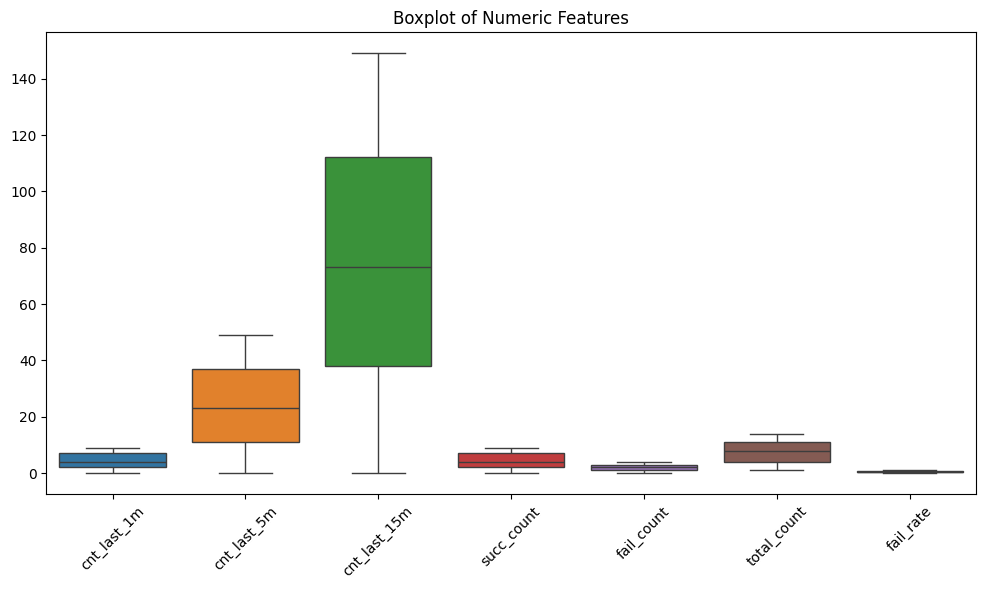

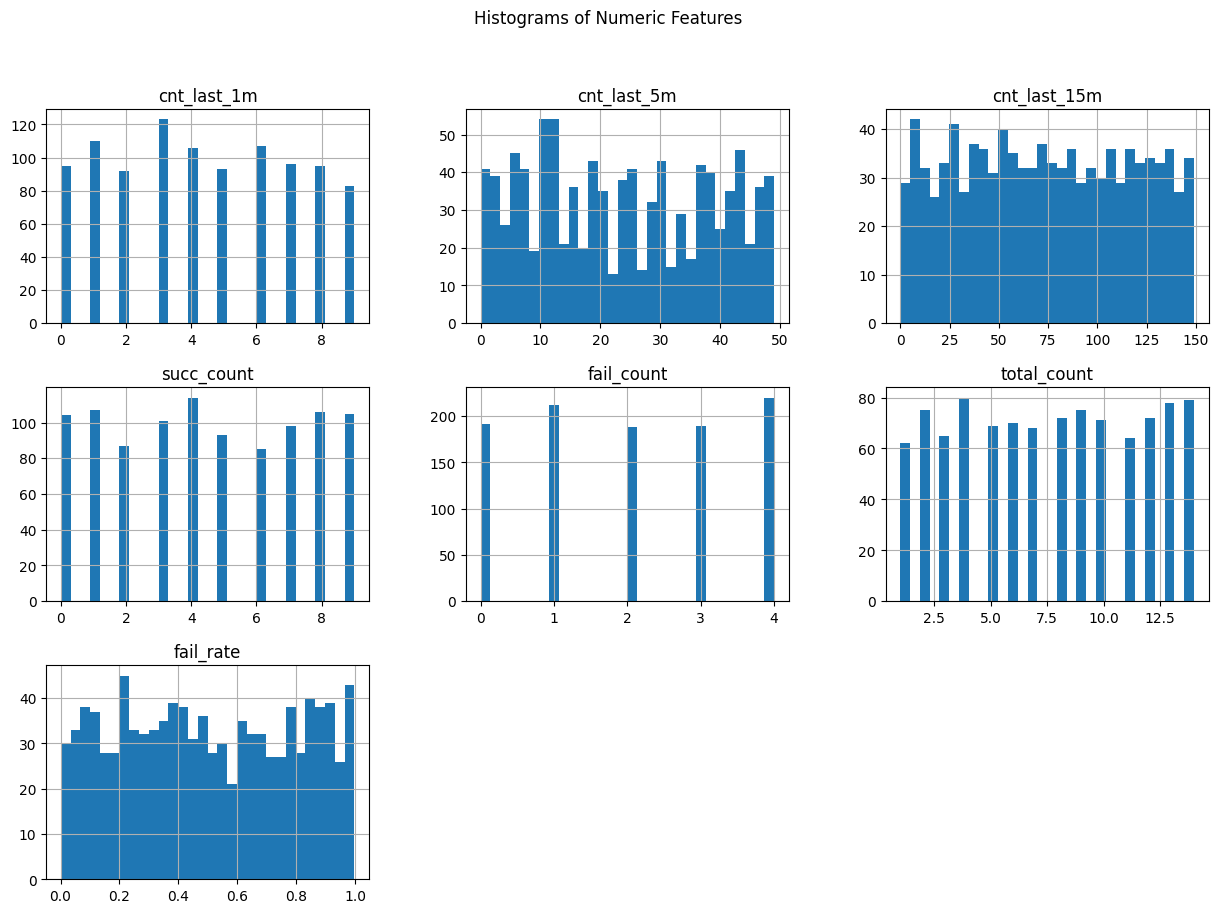

✅ Best hyperparameters: {'n_estimators': 50, 'max_depth': 5}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       247
           1       1.00      1.00      1.00       246

    accuracy                           1.00       493
   macro avg       1.00      1.00      1.00       493
weighted avg       1.00      1.00      1.00       493

ROC AUC: 1.0
PR AUC: 1.0


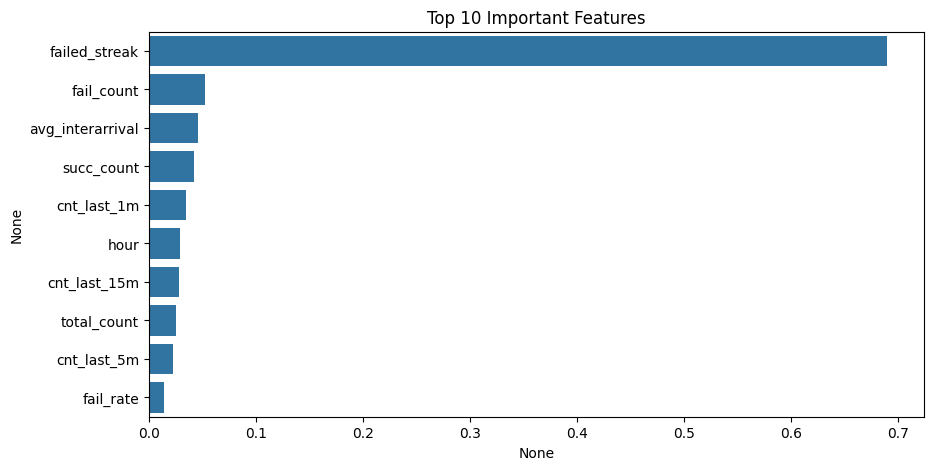

✅ Model and feature list saved.
✅ 1000 alerts generated. Check /home/bakri/projects/login-anomaly/data/alerts.csv
⚠️ Feedback file not found, skipping feedback matrix.

✅ Production metrics recorded in /home/bakri/projects/login-anomaly/data/alerts_metrics.csv


In [2]:
# ==============================
# Login Anomaly Detection Full Pipeline
# Steps 1️⃣ to 11️⃣ integrated
# ==============================

import os
import sys
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')
FEEDBACK_FILE = os.path.join(BASE_DIR, 'alerts_feedback.csv')
METRICS_FILE = os.path.join(BASE_DIR, 'alerts_metrics.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")

# ==============================
# 1️⃣ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2️⃣ Check Data Quality
# ==============================
print("\n----- Missing Values: auth_parsed_large.csv -----")
print(df.isnull().mean() * 100)
print("\n----- Missing Values: auth_features_large.csv -----")
print(feat.isnull().mean() * 100)
print("\n----- Result Distribution -----")
print(df['result'].value_counts())
print("\n----- Numeric Summary -----")
print(feat.describe())

# Optional plots
numeric_cols = feat.select_dtypes(include='number').columns
plt.figure(figsize=(12,6))
sns.boxplot(data=feat[numeric_cols])
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

feat[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

# ==============================
# 3️⃣ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 4️⃣ Feature Engineering
# ==============================
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 5️⃣ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 6️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 7️⃣ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 8️⃣ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 9️⃣ Train Model (RandomForest)
# ==============================
param_dist = {'n_estimators':[50,100,200],'max_depth':[5,10,20,None]}
rs = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
                        param_distributions=param_dist, n_iter=10, cv=3, scoring='recall')
rs.fit(X_train, y_train)
clf = rs.best_estimator_
print("✅ Best hyperparameters:", rs.best_params_)

# ==============================
# 🔹 Evaluate Model
# ==============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# Feature Importance
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save Model & Feature List
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("✅ Model and feature list saved.")

# ==============================
# 🔹 Predict on New Data & Generate Alerts
# ==============================
def predict_new_data(feature_file=FEATURE_FILE_NEW, threshold=0.5):
    if not os.path.exists(feature_file):
        print("⚠️ Feature file not found, skipping alerts.")
        return None
    
    df_new = pd.read_csv(feature_file, low_memory=False)
    
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= threshold).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    return df_alert

alerts = predict_new_data()
if alerts is not None and not alerts.empty:
    print(f"✅ {len(alerts)} alerts generated. Check {ALERT_FILE}")
else:
    print("⚠️ No alerts generated.")

# ==============================
# 🔹 Step 8: Feedback Loop
# ==============================
def update_feedback_matrix(alert_file=ALERT_FILE, feedback_file=FEEDBACK_FILE):
    if not os.path.exists(feedback_file):
        print("⚠️ Feedback file not found, skipping feedback matrix.")
        return None
    
    alerts_df = pd.read_csv(alert_file)
    feedback_df = pd.read_csv(feedback_file)
    
    merged = pd.merge(alerts_df, feedback_df, on=['timestamp','ip','user'], how='left')
    
    merged['tp'] = ((merged['alert']==1) & (merged['label']==1)).astype(int)
    merged['fp'] = ((merged['alert']==1) & (merged['label']==0)).astype(int)
    merged['fn'] = ((merged['alert']==0) & (merged['label']==1)).astype(int)
    
    metrics = {
        'TP': merged['tp'].sum(),
        'FP': merged['fp'].sum(),
        'FN': merged['fn'].sum(),
        'Precision': merged['tp'].sum() / max(merged['tp'].sum()+merged['fp'].sum(),1),
        'Recall': merged['tp'].sum() / max(merged['tp'].sum()+merged['fn'].sum(),1)
    }
    
    print("\n✅ Feedback Metrics:")
    for k,v in metrics.items():
        print(f"{k}: {v}")
    
    return metrics

feedback_metrics = update_feedback_matrix()

# ==============================
# 🔹 Step 9: Production Metrics
# ==============================
def record_production_metrics(alert_file=ALERT_FILE, metrics_file=METRICS_FILE):
    if not os.path.exists(alert_file):
        print("⚠️ No alerts to record metrics.")
        return None
    
    alerts_df = pd.read_csv(alert_file)
    total_alerts = len(alerts_df)
    total_failed_prob = alerts_df['failed_prob'].sum()
    
    metrics = {
        'total_alerts': total_alerts,
        'sum_failed_prob': total_failed_prob
    }
    
    metrics_df = pd.DataFrame([metrics])
    if os.path.exists(metrics_file):
        metrics_df.to_csv(metrics_file, mode='a', header=False, index=False)
    else:
        metrics_df.to_csv(metrics_file, index=False)
    
    print(f"\n✅ Production metrics recorded in {metrics_file}")
    return metrics_df

prod_metrics = record_production_metrics()


In [3]:
#!/usr/bin/env python3
# ==============================
# run_pipeline.py
# Full Login Anomaly Detection Pipeline
# Ready for cron automation
# ==============================

import os
import sys
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')
FEEDBACK_FILE = os.path.join(BASE_DIR, 'alerts_feedback.csv')
METRICS_FILE = os.path.join(BASE_DIR, 'alerts_metrics.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")

# ==============================
# Helper Functions
# ==============================

def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()

def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)

def geoip_lookup(ip, reader, geo_cache):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

# ==============================
# 1️⃣ Load Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2️⃣ Target & Feature Engineering
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# Time features
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Avg interarrival
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak
df['failed_flag'] = (df['result']=='failed').astype(int)
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip, reader, geo_cache) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 3️⃣ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 4️⃣ Scale & Handle Imbalance
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 5️⃣ Train/Test Split & Train Model
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

param_dist = {'n_estimators':[50,100,200],'max_depth':[5,10,20,None]}
rs = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
                        param_distributions=param_dist, n_iter=10, cv=3, scoring='recall')
rs.fit(X_train, y_train)
clf = rs.best_estimator_

# Save model & scaler
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)

# ==============================
# 6️⃣ Predict New Data & Generate Alerts
# ==============================
def predict_new_data(feature_file=FEATURE_FILE_NEW, threshold=0.5):
    if not os.path.exists(feature_file):
        print("⚠️ Feature file not found, skipping alerts.")
        return None
    df_new = pd.read_csv(feature_file)
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= threshold).astype(int)
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    return df_alert

alerts = predict_new_data()
if alerts is not None and not alerts.empty:
    print(f"✅ {len(alerts)} alerts generated. Check {ALERT_FILE}")
else:
    print("⚠️ No alerts generated.")

# ==============================
# 7️⃣ Feedback Loop
# ==============================
def update_feedback_matrix(alert_file=ALERT_FILE, feedback_file=FEEDBACK_FILE):
    if not os.path.exists(feedback_file):
        print("⚠️ Feedback file not found, skipping feedback matrix.")
        return None
    alerts_df = pd.read_csv(alert_file)
    feedback_df = pd.read_csv(feedback_file)
    merged = pd.merge(alerts_df, feedback_df, on=['timestamp','ip','user'], how='left')
    merged['tp'] = ((merged['alert']==1) & (merged['label']==1)).astype(int)
    merged['fp'] = ((merged['alert']==1) & (merged['label']==0)).astype(int)
    merged['fn'] = ((merged['alert']==0) & (merged['label']==1)).astype(int)
    metrics = {
        'TP': merged['tp'].sum(),
        'FP': merged['fp'].sum(),
        'FN': merged['fn'].sum(),
        'Precision': merged['tp'].sum() / max(merged['tp'].sum()+merged['fp'].sum(),1),
        'Recall': merged['tp'].sum() / max(merged['tp'].sum()+merged['fn'].sum(),1)
    }
    print("\n✅ Feedback Metrics:")
    for k,v in metrics.items():
        print(f"{k}: {v}")
    return metrics

feedback_metrics = update_feedback_matrix()

# ==============================
# 8️⃣ Production Metrics
# ==============================
def record_production_metrics(alert_file=ALERT_FILE, metrics_file=METRICS_FILE):
    if not os.path.exists(alert_file):
        print("⚠️ No alerts to record metrics.")
        return None
    alerts_df = pd.read_csv(alert_file)
    total_alerts = len(alerts_df)
    total_failed_prob = alerts_df['failed_prob'].sum()
    metrics = {'total_alerts': total_alerts, 'sum_failed_prob': total_failed_prob}
    metrics_df = pd.DataFrame([metrics])
    if os.path.exists(metrics_file):
        metrics_df.to_csv(metrics_file, mode='a', header=False, index=False)
    else:
        metrics_df.to_csv(metrics_file, index=False)
    print(f"\n✅ Production metrics recorded in {metrics_file}")
    return metrics_df

prod_metrics = record_production_metrics()


✅ 1000 alerts generated. Check /home/bakri/projects/login-anomaly/data/alerts.csv
⚠️ Feedback file not found, skipping feedback matrix.

✅ Production metrics recorded in /home/bakri/projects/login-anomaly/data/alerts_metrics.csv



----- Missing Values: auth_parsed_large.csv -----
timestamp    0.0
ip           0.0
user         0.0
result       0.0
dtype: float64

----- Missing Values: auth_features_large.csv -----
timestamp       0.0
ip              0.0
cnt_last_1m     0.0
cnt_last_5m     0.0
cnt_last_15m    0.0
succ_count      0.0
fail_count      0.0
total_count     0.0
fail_rate       0.0
event_user      0.0
event_result    0.0
dtype: float64

----- Result Distribution -----
result
success    821
failed     179
Name: count, dtype: int64

----- Numeric Summary -----
                           timestamp  cnt_last_1m  cnt_last_5m  cnt_last_15m  \
count                           1000  1000.000000  1000.000000   1000.000000   
mean   2025-10-01 08:19:29.999999744     4.373000    23.804000     73.995000   
min              2025-10-01 00:00:00     0.000000     0.000000      0.000000   
25%              2025-10-01 04:09:45     2.000000    11.000000     38.000000   
50%              2025-10-01 08:19:30     4.000000    

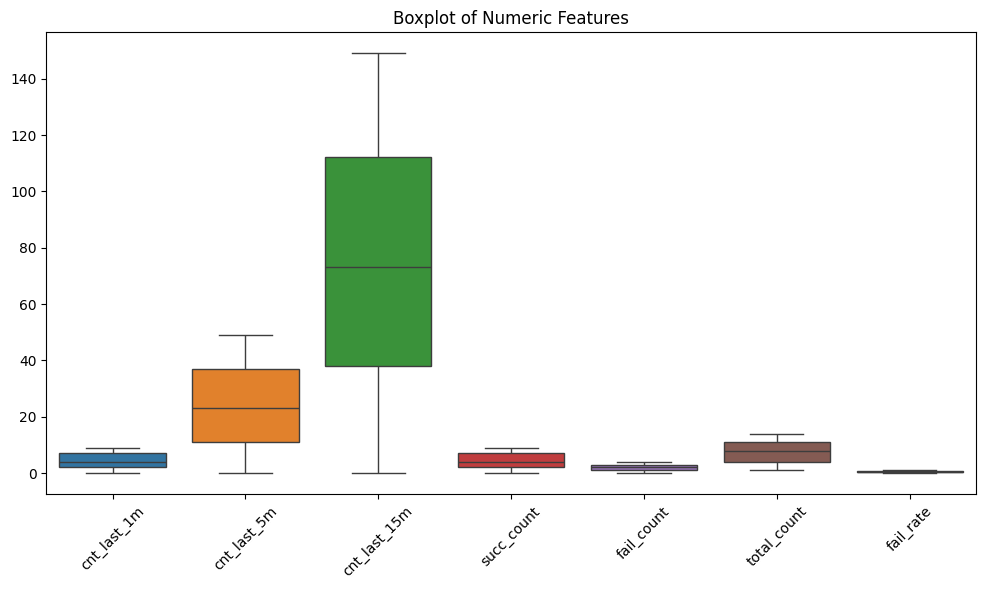

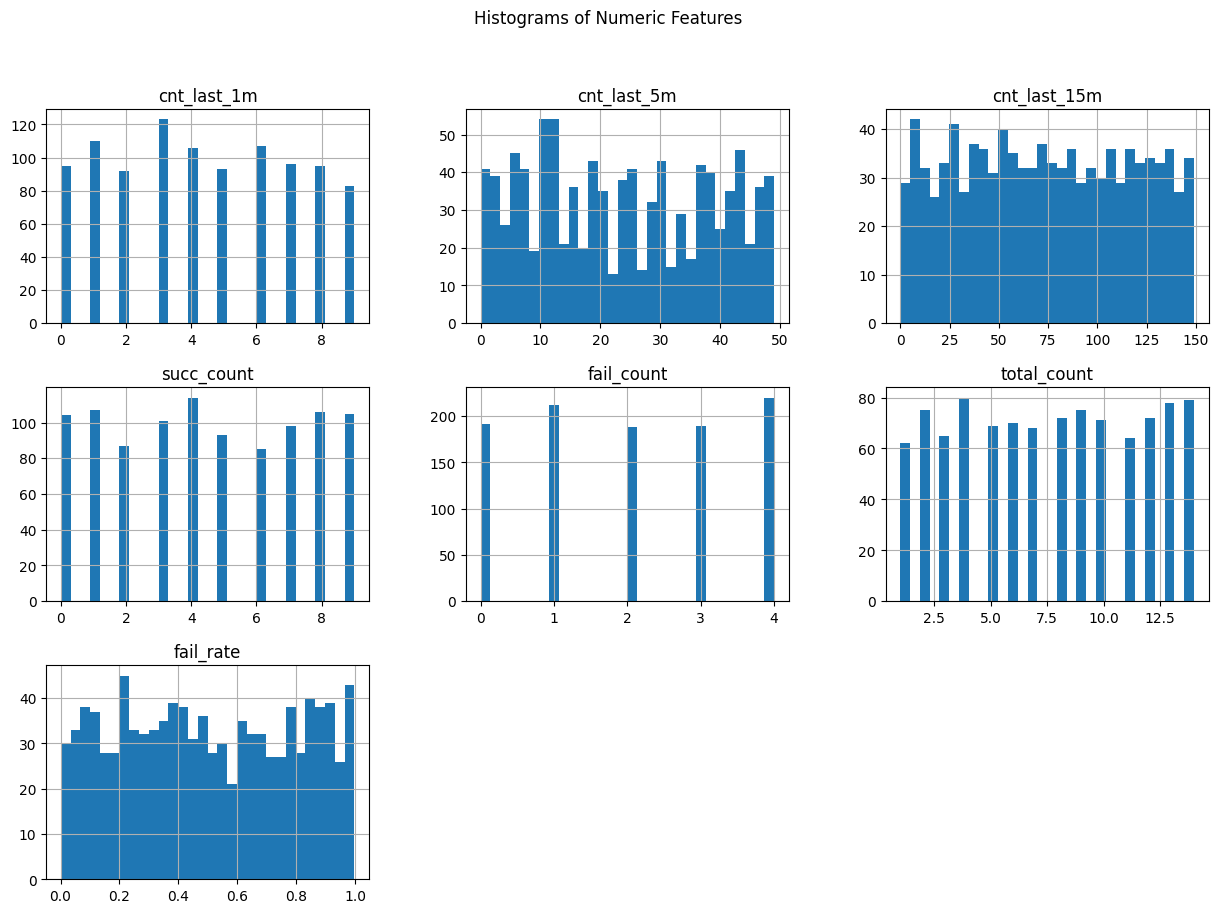

✅ Best hyperparameters: {'n_estimators': 200, 'max_depth': 10}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       247
           1       1.00      1.00      1.00       246

    accuracy                           1.00       493
   macro avg       1.00      1.00      1.00       493
weighted avg       1.00      1.00      1.00       493

ROC AUC: 1.0
PR AUC: 1.0


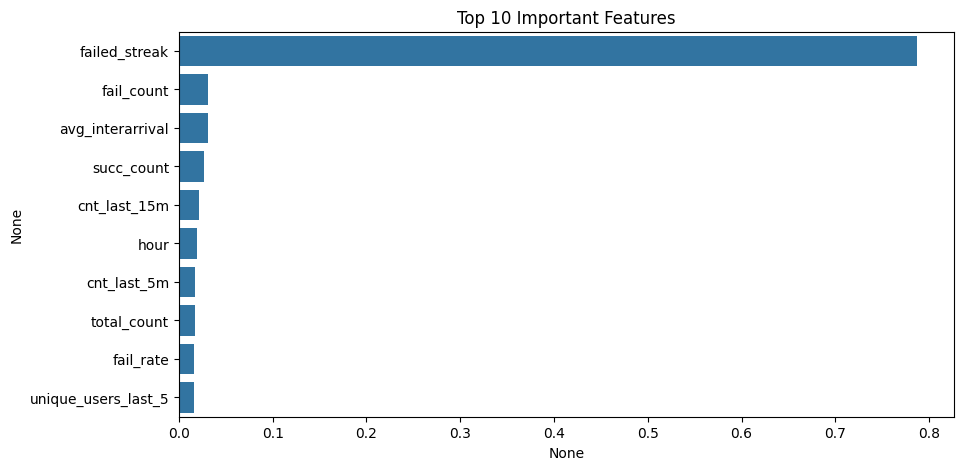

✅ Model and feature list saved.
✅ 1000 alerts generated. Check /home/bakri/projects/login-anomaly/data/alerts.csv
✅ Feedback file updated: /home/bakri/projects/login-anomaly/data/alerts_feedback.csv
✅ Production metrics recorded in /home/bakri/projects/login-anomaly/data/alerts_metrics.csv


In [4]:
# ==============================
# Login Anomaly Detection Full Pipeline (With Feedback Loop)
# ==============================

import os
import pandas as pd
import numpy as np
import geoip2.database
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore")

# ==============================
# 0️⃣ Paths Setup
# ==============================
BASE_DIR = '/home/bakri/projects/login-anomaly/data'
AUTH_PARSED_FILE = os.path.join(BASE_DIR, 'auth_parsed_large.csv')
AUTH_FEATURES_FILE = os.path.join(BASE_DIR, 'auth_features_large.csv')
FEATURE_FILE_NEW = os.path.join(BASE_DIR, 'auth_features_new.csv')
GEOIP_FILE = os.path.join(BASE_DIR, 'GeoLite2-City.mmdb')
MODEL_FILE = os.path.join(BASE_DIR, 'random_forest_model_final.joblib')
FEATURE_COLS_FILE = os.path.join(BASE_DIR, 'feature_columns.joblib')
ALERT_FILE = os.path.join(BASE_DIR, 'alerts.csv')
FEEDBACK_FILE = os.path.join(BASE_DIR, 'alerts_feedback.csv')

for f in [AUTH_PARSED_FILE, AUTH_FEATURES_FILE, GEOIP_FILE]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"❌ File not found: {f}")

# ==============================
# 1️⃣ Load Raw Data
# ==============================
df = pd.read_csv(AUTH_PARSED_FILE, parse_dates=['timestamp'], low_memory=False)
feat = pd.read_csv(AUTH_FEATURES_FILE, parse_dates=['timestamp'], low_memory=False)

# ==============================
# 2️⃣ Check Data Quality
# ==============================
print("\n----- Missing Values: auth_parsed_large.csv -----")
print(df.isnull().mean() * 100)
print("\n----- Missing Values: auth_features_large.csv -----")
print(feat.isnull().mean() * 100)
print("\n----- Result Distribution -----")
print(df['result'].value_counts())
print("\n----- Numeric Summary -----")
print(feat.describe())

# Optional plots
numeric_cols = feat.select_dtypes(include='number').columns
plt.figure(figsize=(12,6))
sns.boxplot(data=feat[numeric_cols])
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

feat[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

# ==============================
# 3️⃣ Prepare Target
# ==============================
df['result_bin'] = df['result'].apply(lambda x: 1 if x=='success' else 0)
y = df['result_bin'].astype(int)

# ==============================
# 4️⃣ Feature Engineering
# ==============================
# Hour & night
feat['hour'] = df['timestamp'].dt.hour
feat['is_night'] = feat['hour'].isin([0,1,2,3,4,5,23]).astype(int)

# Average interarrival per IP
df_sorted = df.sort_values(['ip','timestamp'])
df_sorted['time_diff'] = df_sorted.groupby('ip')['timestamp'].diff().dt.total_seconds()
feat['avg_interarrival'] = df_sorted.groupby('ip')['time_diff'].transform('mean').fillna(0)

# Failed streak
df['failed_flag'] = (df['result']=='failed').astype(int)
def compute_failed_streak(x):
    return x.groupby((x==0).cumsum()).cumsum()
df['failed_streak'] = df.groupby('user')['failed_flag'].transform(compute_failed_streak)
feat['failed_streak'] = df['failed_streak'].fillna(0).astype(int)

# Unique users last 5 attempts
def unique_users_last_5(series):
    arr = series.tolist()
    counts = []
    dq = deque(maxlen=5)
    for user in arr:
        dq.append(user)
        counts.append(len(set(dq)))
    return pd.Series(counts, index=series.index)
df['unique_users_last_5'] = df.groupby('ip')['user'].transform(unique_users_last_5)
feat['unique_users_last_5'] = df['unique_users_last_5'].fillna(0).astype(int)

# GeoIP Features
reader = geoip2.database.Reader(GEOIP_FILE)
geo_cache = {}
def geoip_lookup(ip):
    if ip in geo_cache:
        return geo_cache[ip]
    try:
        r = reader.city(ip)
        country = r.country.iso_code
        city = r.city.name
        lat = r.location.latitude
        lon = r.location.longitude
    except:
        country, city, lat, lon = 'NA','NA',0,0
    geo_cache[ip] = pd.Series([country, city, lat, lon])
    return geo_cache[ip]

unique_ips = df['ip'].unique()
geo_results = Parallel(n_jobs=-1)(delayed(geoip_lookup)(ip) for ip in unique_ips)
geo_df = pd.DataFrame(geo_results, index=unique_ips, columns=['geo_country','city','lat','lon'])
df = df.join(geo_df, on='ip')
feat['lat'] = df['lat'].fillna(0)
feat['lon'] = df['lon'].fillna(0)
feat['geo_country'] = df['geo_country']

# ==============================
# 5️⃣ Prepare Feature Matrix
# ==============================
numeric_cols = feat.select_dtypes(include=np.number).columns.tolist()
if 'timestamp' in numeric_cols: numeric_cols.remove('timestamp')
X = feat[numeric_cols].fillna(0)

# ==============================
# 6️⃣ Scale Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 7️⃣ Handle Imbalance
# ==============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# ==============================
# 8️⃣ Train/Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# ==============================
# 9️⃣ Train Model (RandomForest)
# ==============================
param_dist = {'n_estimators':[50,100,200],'max_depth':[5,10,20,None]}
rs = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
                        param_distributions=param_dist, n_iter=10, cv=3, scoring='recall')
rs.fit(X_train, y_train)
clf = rs.best_estimator_
print("✅ Best hyperparameters:", rs.best_params_)

# Evaluate
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
prec, rec, _ = precision_recall_curve(y_test, y_proba)
print("PR AUC:", auc(rec, prec))

# Feature Importance
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features")
plt.show()

# ==============================
# 🔹 Save Model & Feature List
# ==============================
joblib.dump({'model': clf, 'scaler': scaler}, MODEL_FILE)
joblib.dump(X.columns.tolist(), FEATURE_COLS_FILE)
print("✅ Model and feature list saved.")

# ==============================
# 🔹 Predict on New Data & Generate Alerts
# ==============================
def predict_new_data(feature_file, threshold=0.5):
    if not os.path.exists(feature_file):
        print("⚠️ Feature file not found, skipping alerts.")
        return None
    
    df_new = pd.read_csv(feature_file, low_memory=False)
    
    for c in X.columns:
        if c not in df_new.columns:
            df_new[c] = 0
    
    X_new_scaled = scaler.transform(df_new[X.columns])
    df_new['failed_prob'] = 1 - clf.predict_proba(X_new_scaled)[:,1]
    df_new['alert'] = (df_new['failed_prob'] >= threshold).astype(int)
    
    for col in ['timestamp','ip','user']:
        if col not in df_new.columns:
            df_new[col] = 'NA'
    
    df_alert = df_new[['timestamp','ip','user','failed_prob','alert']]
    
    if os.path.exists(ALERT_FILE):
        df_alert.to_csv(ALERT_FILE, mode='a', header=False, index=False)
    else:
        df_alert.to_csv(ALERT_FILE, index=False)
    
    return df_alert

alerts = predict_new_data(FEATURE_FILE_NEW)
if alerts is not None and not alerts.empty:
    print(f"✅ {len(alerts)} alerts generated. Check {ALERT_FILE}")
else:
    print("⚠️ No alerts generated.")

# ==============================
# 🔹 Update Feedback Loop
# ==============================
if alerts is not None and not alerts.empty:
    if os.path.exists(FEEDBACK_FILE):
        df_feedback = pd.read_csv(FEEDBACK_FILE, parse_dates=['timestamp'])
        df_to_append = alerts[~alerts.set_index(['timestamp','ip','user']).index.isin(
            df_feedback.set_index(['timestamp','ip','user']).index
        )]
        if not df_to_append.empty:
            df_to_append['feedback'] = 'NA'
            df_feedback = pd.concat([df_feedback, df_to_append], ignore_index=True)
        df_feedback.to_csv(FEEDBACK_FILE, index=False)
    else:
        alerts['feedback'] = 'NA'
        alerts.to_csv(FEEDBACK_FILE, index=False)
    print(f"✅ Feedback file updated: {FEEDBACK_FILE}")
else:
    print("⚠️ No alerts to update feedback.")

# ==============================
# 🔹 Optional: record production metrics
# ==============================
metrics_file = os.path.join(BASE_DIR, 'alerts_metrics.csv')
metrics = {
    'timestamp': pd.Timestamp.now(),
    'num_alerts': len(alerts) if alerts is not None else 0
}
df_metrics = pd.DataFrame([metrics])
if os.path.exists(metrics_file):
    df_metrics.to_csv(metrics_file, mode='a', header=False, index=False)
else:
    df_metrics.to_csv(metrics_file, index=False)
print(f"✅ Production metrics recorded in {metrics_file}")
